## Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import OrderedDict
import time
from sklearn.metrics import mean_squared_error,roc_auc_score,mean_absolute_error,log_loss
import sys
sys.path.append('benchmark/')
from gammli_test import gammli
from xgb_test import xgb
from svd_test import svd
from deepfm_fm_test import deepfm_fm
from rank_test import rtest
sys.path.append('../')
from gammli.GAMMLI import GAMMLI
from gammli.DataReader import data_initialize
from gammli.utils import local_visualize
from gammli.utils import global_visualize_density
from gammli.utils import feature_importance_visualize
from gammli.utils import plot_trajectory
from gammli.utils import plot_regularization

import tensorflow as tf
tf.compat.v1.enable_eager_execution()
random_state = 0
data= pd.read_csv('data/simulation/simulation_regression.csv')
task_type = "Regression"

meta_info = OrderedDict()

meta_info['user_feature_x_1']={'type': 'continues','source':'user'}
meta_info['user_feature_x_2']={'type': 'continues','source':'user'}
meta_info['user_feature_x_3']={'type': 'continues','source':'user'}
meta_info['user_feature_x_4']={'type': 'continues','source':'user'}
meta_info['user_feature_x_5']={'type': 'continues','source':'user'}
meta_info['item_feature_x_1']={'type': 'continues','source':'item'}
meta_info['item_feature_x_2']={'type': 'continues','source':'item'}
meta_info['item_feature_x_3']={'type': 'continues','source':'item'}
meta_info['item_feature_x_4']={'type': 'continues','source':'item'}
meta_info['item_feature_x_5']={'type': 'continues','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
#the best shrinkage is 0.917120
#the best combination is 0.600000
lx_params = {
        "rank":3,
        "main_effect_epochs":2000,
        "interaction_epochs" : 200 ,
        "tuning_epochs" : 50 , 
        "mf_training_iters": 500,
        "u_group_num":50,
        "i_group_num":50,
        "auto_tune":False,
        "best_shrinkage":0.93,
        "best_combination":0.4,
        "verbose":True
    }

deepfm_fm_params = {
        "epochs":1000,
        "loss_type" : 'mse' ,
        "eval_metric" : mean_absolute_error , 
        "greater_is_better": False,
        "verbose":True,
        "early_stopping":True
    }



In [4]:
#result_gammli = gammli('warm',data, meta_info,task_type , random_state=0, params=lx_params)
#result_svd = svd('warm',data, meta_info, task_type , random_state=0)
result_deepfm, result_fm = deepfm_fm('warm',data, meta_info,task_type , random_state=0, params=deepfm_fm_params)
#result_xgb = xgb('warm',data, meta_info, task_type , random_state=0)

#result_sim_std = pd.concat([result_gammli,result_svd,result_xgb,result_deepfm,result_fm],0)

#result_sim_std.to_csv('result/simulation_regression/simulation_regression_result.csv',index=None)

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


Memory usage of dataframe is 0.86 MB
Memory usage after optimization is: 0.26 MB
Decreased by 69.6%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.07 MB
Decreased by 69.6%
test cold start user: 0
test cold start item: 3
validation cold start user: 0
validation cold start item: 1


..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=6.8941, valid-result=7.0056 [0.3 s]
[2] train-result=6.7087, valid-result=6.8211 [0.1 s]
[3] train-result=6.4767, valid-result=6.5906 [0.1 s]
[4] train-result=6.1572, valid-result=6.2727 [0.1 s]
[5] train-result=5.7369, valid-result=5.8557 [0.1 s]
[6] train-result=5.1420, valid-result=5.2684 [0.1 s]
[7] train-result=4.4238, valid-result=4.5651 [0.1 s]
[8] train-result=3.7587, valid-result=3.9134 [0.1 s]
[9] train-result=3.3991, valid-result=3.5365 [0.1 s]
[10] train-result=3.2914, v

[143] train-result=1.9131, valid-result=2.3274 [0.1 s]
[144] train-result=1.8962, valid-result=2.3164 [0.1 s]
[145] train-result=1.9055, valid-result=2.3186 [0.1 s]
[146] train-result=1.9056, valid-result=2.3183 [0.1 s]
[147] train-result=1.9155, valid-result=2.3227 [0.1 s]
[148] train-result=1.9102, valid-result=2.3194 [0.1 s]
[149] train-result=1.8967, valid-result=2.3125 [0.1 s]
[150] train-result=1.8788, valid-result=2.3032 [0.1 s]
[151] train-result=1.8785, valid-result=2.3029 [0.1 s]
[152] train-result=1.8768, valid-result=2.3025 [0.1 s]
[153] train-result=1.8794, valid-result=2.3035 [0.1 s]
[154] train-result=1.8718, valid-result=2.2988 [0.1 s]
[155] train-result=1.8722, valid-result=2.2979 [0.1 s]
[156] train-result=1.8818, valid-result=2.3006 [0.1 s]
[157] train-result=1.8708, valid-result=2.2936 [0.1 s]
[158] train-result=1.8585, valid-result=2.2860 [0.1 s]
[159] train-result=1.8631, valid-result=2.2859 [0.1 s]
[160] train-result=1.8570, valid-result=2.2810 [0.1 s]
[161] trai

[292] train-result=1.3805, valid-result=1.8322 [0.1 s]
[293] train-result=1.3716, valid-result=1.8260 [0.1 s]
[294] train-result=1.3724, valid-result=1.8233 [0.1 s]
[295] train-result=1.3695, valid-result=1.8203 [0.1 s]
[296] train-result=1.3681, valid-result=1.8175 [0.1 s]
[297] train-result=1.3615, valid-result=1.8110 [0.1 s]
[298] train-result=1.3587, valid-result=1.8080 [0.1 s]
[299] train-result=1.3670, valid-result=1.8095 [0.1 s]
[300] train-result=1.3600, valid-result=1.8047 [0.1 s]
[301] train-result=1.3481, valid-result=1.7952 [0.1 s]
[302] train-result=1.3472, valid-result=1.7915 [0.1 s]
[303] train-result=1.3447, valid-result=1.7869 [0.1 s]
[304] train-result=1.3354, valid-result=1.7802 [0.1 s]
[305] train-result=1.3382, valid-result=1.7790 [0.1 s]
[306] train-result=1.3264, valid-result=1.7721 [0.1 s]
[307] train-result=1.3216, valid-result=1.7655 [0.1 s]
[308] train-result=1.3219, valid-result=1.7635 [0.1 s]
[309] train-result=1.3051, valid-result=1.7547 [0.1 s]
[310] trai

[441] train-result=0.9769, valid-result=1.4283 [0.1 s]
[442] train-result=0.9802, valid-result=1.4278 [0.1 s]
[443] train-result=0.9764, valid-result=1.4284 [0.1 s]
[444] train-result=0.9751, valid-result=1.4250 [0.1 s]
[445] train-result=0.9722, valid-result=1.4237 [0.1 s]
[446] train-result=0.9664, valid-result=1.4185 [0.1 s]
[447] train-result=0.9637, valid-result=1.4162 [0.1 s]
[448] train-result=0.9693, valid-result=1.4203 [0.1 s]
[449] train-result=0.9718, valid-result=1.4216 [0.1 s]
[450] train-result=0.9651, valid-result=1.4188 [0.1 s]
[451] train-result=0.9554, valid-result=1.4131 [0.1 s]
[452] train-result=0.9486, valid-result=1.4081 [0.1 s]
[453] train-result=0.9489, valid-result=1.4074 [0.1 s]
[454] train-result=0.9531, valid-result=1.4086 [0.1 s]
[455] train-result=0.9519, valid-result=1.4076 [0.1 s]
[456] train-result=0.9452, valid-result=1.4057 [0.1 s]
[457] train-result=0.9434, valid-result=1.3995 [0.1 s]
[458] train-result=0.9390, valid-result=1.3981 [0.1 s]
[459] trai

[590] train-result=0.7274, valid-result=1.2715 [0.1 s]
[591] train-result=0.7268, valid-result=1.2704 [0.1 s]
[592] train-result=0.7258, valid-result=1.2726 [0.1 s]
[593] train-result=0.7266, valid-result=1.2735 [0.1 s]
[594] train-result=0.7222, valid-result=1.2705 [0.1 s]
[595] train-result=0.7194, valid-result=1.2688 [0.1 s]
[596] train-result=0.7198, valid-result=1.2710 [0.1 s]
[597] train-result=0.7202, valid-result=1.2703 [0.1 s]
[598] train-result=0.7168, valid-result=1.2687 [0.1 s]
[599] train-result=0.7166, valid-result=1.2702 [0.1 s]
[600] train-result=0.7176, valid-result=1.2681 [0.1 s]
[601] train-result=0.7155, valid-result=1.2668 [0.1 s]
[602] train-result=0.7139, valid-result=1.2671 [0.1 s]
[603] train-result=0.7129, valid-result=1.2668 [0.1 s]
[604] train-result=0.7134, valid-result=1.2685 [0.1 s]
[605] train-result=0.7123, valid-result=1.2692 [0.1 s]
[606] train-result=0.7114, valid-result=1.2682 [0.1 s]
[607] train-result=0.7099, valid-result=1.2681 [0.1 s]
[608] trai

[739] train-result=0.6285, valid-result=1.2683 [0.1 s]
[740] train-result=0.6244, valid-result=1.2684 [0.1 s]
[741] train-result=0.6288, valid-result=1.2711 [0.1 s]
[742] train-result=0.6247, valid-result=1.2676 [0.1 s]
[743] train-result=0.6235, valid-result=1.2696 [0.1 s]
[744] train-result=0.6227, valid-result=1.2700 [0.1 s]
[745] train-result=0.6227, valid-result=1.2705 [0.1 s]
[746] train-result=0.6224, valid-result=1.2683 [0.1 s]
[747] train-result=0.6247, valid-result=1.2713 [0.1 s]
[748] train-result=0.6209, valid-result=1.2691 [0.1 s]
[749] train-result=0.6211, valid-result=1.2706 [0.1 s]
[750] train-result=0.6209, valid-result=1.2706 [0.1 s]
[751] train-result=0.6189, valid-result=1.2683 [0.1 s]
[752] train-result=0.6191, valid-result=1.2693 [0.1 s]
[753] train-result=0.6203, valid-result=1.2677 [0.1 s]
[754] train-result=0.6194, valid-result=1.2684 [0.1 s]
[755] train-result=0.6208, valid-result=1.2714 [0.1 s]
[756] train-result=0.6198, valid-result=1.2704 [0.1 s]
[757] trai

[889] train-result=0.5755, valid-result=1.2957 [0.1 s]
[890] train-result=0.5742, valid-result=1.2949 [0.1 s]
[891] train-result=0.5743, valid-result=1.2954 [0.1 s]
[892] train-result=0.5779, valid-result=1.2977 [0.1 s]
[893] train-result=0.5729, valid-result=1.2945 [0.1 s]
[894] train-result=0.5727, valid-result=1.2945 [0.1 s]
[895] train-result=0.5745, valid-result=1.2958 [0.1 s]
[896] train-result=0.5724, valid-result=1.2958 [0.1 s]
[897] train-result=0.5718, valid-result=1.2953 [0.1 s]
[898] train-result=0.5714, valid-result=1.2946 [0.1 s]
[899] train-result=0.5774, valid-result=1.2979 [0.1 s]
[900] train-result=0.5721, valid-result=1.2952 [0.1 s]
[901] train-result=0.5723, valid-result=1.2972 [0.1 s]
[902] train-result=0.5725, valid-result=1.2980 [0.1 s]
[903] train-result=0.5761, valid-result=1.2979 [0.1 s]
[904] train-result=0.5714, valid-result=1.2984 [0.1 s]
[905] train-result=0.5702, valid-result=1.2975 [0.1 s]
[906] train-result=0.5707, valid-result=1.2975 [0.1 s]
[907] trai

[108] train-result=1.9688, valid-result=2.2530 [0.1 s]
[109] train-result=1.9665, valid-result=2.2487 [0.1 s]
[110] train-result=1.9936, valid-result=2.2616 [0.1 s]
[111] train-result=1.9707, valid-result=2.2469 [0.1 s]
[112] train-result=1.9758, valid-result=2.2472 [0.1 s]
[113] train-result=1.9628, valid-result=2.2374 [0.1 s]
[114] train-result=1.9535, valid-result=2.2306 [0.1 s]
[115] train-result=1.9645, valid-result=2.2357 [0.1 s]
[116] train-result=1.9983, valid-result=2.2568 [0.1 s]
[117] train-result=1.9686, valid-result=2.2384 [0.1 s]
[118] train-result=1.9250, valid-result=2.2136 [0.1 s]
[119] train-result=1.9199, valid-result=2.2094 [0.1 s]
[120] train-result=1.9185, valid-result=2.2073 [0.1 s]
[121] train-result=1.9258, valid-result=2.2112 [0.1 s]
[122] train-result=1.9495, valid-result=2.2260 [0.1 s]
[123] train-result=1.9187, valid-result=2.2019 [0.1 s]
[124] train-result=1.9127, valid-result=2.1952 [0.1 s]
[125] train-result=1.9486, valid-result=2.2170 [0.1 s]
[126] trai

[258] train-result=1.5458, valid-result=1.9496 [0.1 s]
[259] train-result=1.5476, valid-result=1.9479 [0.1 s]
[260] train-result=1.5427, valid-result=1.9446 [0.1 s]
[261] train-result=1.5335, valid-result=1.9404 [0.1 s]
[262] train-result=1.5445, valid-result=1.9489 [0.1 s]
[263] train-result=1.5315, valid-result=1.9378 [0.1 s]
[264] train-result=1.5340, valid-result=1.9403 [0.1 s]
[265] train-result=1.5291, valid-result=1.9360 [0.1 s]
[266] train-result=1.5250, valid-result=1.9319 [0.1 s]
[267] train-result=1.5215, valid-result=1.9288 [0.1 s]
[268] train-result=1.5235, valid-result=1.9280 [0.1 s]
[269] train-result=1.5205, valid-result=1.9270 [0.1 s]
[270] train-result=1.5137, valid-result=1.9210 [0.1 s]
[271] train-result=1.5081, valid-result=1.9177 [0.1 s]
[272] train-result=1.4965, valid-result=1.9110 [0.1 s]
[273] train-result=1.4935, valid-result=1.9088 [0.1 s]
[274] train-result=1.4912, valid-result=1.9067 [0.1 s]
[275] train-result=1.4854, valid-result=1.9010 [0.1 s]
[276] trai

[408] train-result=1.1177, valid-result=1.6416 [0.1 s]
[409] train-result=1.1191, valid-result=1.6435 [0.1 s]
[410] train-result=1.1148, valid-result=1.6407 [0.1 s]
[411] train-result=1.1111, valid-result=1.6385 [0.1 s]
[412] train-result=1.1106, valid-result=1.6388 [0.1 s]
[413] train-result=1.1111, valid-result=1.6389 [0.1 s]
[414] train-result=1.1072, valid-result=1.6375 [0.1 s]
[415] train-result=1.1088, valid-result=1.6387 [0.1 s]
[416] train-result=1.1039, valid-result=1.6355 [0.1 s]
[417] train-result=1.1061, valid-result=1.6361 [0.1 s]
[418] train-result=1.1053, valid-result=1.6347 [0.1 s]
[419] train-result=1.1024, valid-result=1.6343 [0.1 s]
[420] train-result=1.0959, valid-result=1.6305 [0.1 s]
[421] train-result=1.0927, valid-result=1.6294 [0.1 s]
[422] train-result=1.0909, valid-result=1.6289 [0.1 s]
[423] train-result=1.0888, valid-result=1.6263 [0.1 s]
[424] train-result=1.0917, valid-result=1.6283 [0.1 s]
[425] train-result=1.0890, valid-result=1.6262 [0.1 s]
[426] trai

[559] train-result=0.8660, valid-result=1.4959 [0.1 s]
[560] train-result=0.8657, valid-result=1.4967 [0.1 s]
[561] train-result=0.8623, valid-result=1.4942 [0.1 s]
[562] train-result=0.8653, valid-result=1.4974 [0.1 s]
[563] train-result=0.8617, valid-result=1.4913 [0.1 s]
[564] train-result=0.8608, valid-result=1.4924 [0.1 s]
[565] train-result=0.8577, valid-result=1.4893 [0.1 s]
[566] train-result=0.8584, valid-result=1.4896 [0.1 s]
[567] train-result=0.8560, valid-result=1.4867 [0.1 s]
[568] train-result=0.8572, valid-result=1.4886 [0.1 s]
[569] train-result=0.8532, valid-result=1.4860 [0.1 s]
[570] train-result=0.8523, valid-result=1.4868 [0.1 s]
[571] train-result=0.8496, valid-result=1.4842 [0.1 s]
[572] train-result=0.8501, valid-result=1.4848 [0.1 s]
[573] train-result=0.8476, valid-result=1.4818 [0.1 s]
[574] train-result=0.8491, valid-result=1.4826 [0.1 s]
[575] train-result=0.8449, valid-result=1.4781 [0.1 s]
[576] train-result=0.8448, valid-result=1.4780 [0.1 s]
[577] trai

[708] train-result=0.7096, valid-result=1.3599 [0.1 s]
[709] train-result=0.7092, valid-result=1.3595 [0.1 s]
[710] train-result=0.7087, valid-result=1.3597 [0.1 s]
[711] train-result=0.7072, valid-result=1.3594 [0.1 s]
[712] train-result=0.7077, valid-result=1.3587 [0.1 s]
[713] train-result=0.7076, valid-result=1.3585 [0.1 s]
[714] train-result=0.7051, valid-result=1.3562 [0.1 s]
[715] train-result=0.7050, valid-result=1.3574 [0.1 s]
[716] train-result=0.7058, valid-result=1.3577 [0.1 s]
[717] train-result=0.7047, valid-result=1.3572 [0.1 s]
[718] train-result=0.7029, valid-result=1.3559 [0.1 s]
[719] train-result=0.7023, valid-result=1.3552 [0.1 s]
[720] train-result=0.7022, valid-result=1.3553 [0.1 s]
[721] train-result=0.7028, valid-result=1.3548 [0.1 s]
[722] train-result=0.6999, valid-result=1.3533 [0.1 s]
[723] train-result=0.6995, valid-result=1.3535 [0.1 s]
[724] train-result=0.6988, valid-result=1.3533 [0.1 s]
[725] train-result=0.6977, valid-result=1.3519 [0.1 s]
[726] trai

[857] train-result=0.6232, valid-result=1.3129 [0.1 s]
[858] train-result=0.6233, valid-result=1.3133 [0.1 s]
[859] train-result=0.6242, valid-result=1.3131 [0.2 s]
[860] train-result=0.6236, valid-result=1.3139 [0.1 s]
[861] train-result=0.6215, valid-result=1.3122 [0.1 s]
[862] train-result=0.6213, valid-result=1.3110 [0.1 s]
[863] train-result=0.6206, valid-result=1.3113 [0.1 s]
[864] train-result=0.6214, valid-result=1.3110 [0.1 s]
[865] train-result=0.6196, valid-result=1.3099 [0.1 s]
[866] train-result=0.6197, valid-result=1.3100 [0.1 s]
[867] train-result=0.6194, valid-result=1.3096 [0.1 s]
[868] train-result=0.6184, valid-result=1.3091 [0.1 s]
[869] train-result=0.6178, valid-result=1.3101 [0.1 s]
[870] train-result=0.6235, valid-result=1.3127 [0.1 s]
[871] train-result=0.6191, valid-result=1.3127 [0.1 s]
[872] train-result=0.6186, valid-result=1.3113 [0.1 s]
[873] train-result=0.6161, valid-result=1.3105 [0.1 s]
[874] train-result=0.6164, valid-result=1.3112 [0.1 s]
[875] trai

[17] train-result=3.1884, valid-result=3.2197 [0.1 s]
[18] train-result=3.1093, valid-result=3.1543 [0.1 s]
[19] train-result=3.0199, valid-result=3.0800 [0.1 s]
[20] train-result=2.9339, valid-result=3.0098 [0.1 s]
[21] train-result=2.8561, valid-result=2.9499 [0.1 s]
[22] train-result=2.7954, valid-result=2.9072 [0.1 s]
[23] train-result=2.7046, valid-result=2.8376 [0.1 s]
[24] train-result=2.6280, valid-result=2.7817 [0.1 s]
[25] train-result=2.5600, valid-result=2.7310 [0.1 s]
[26] train-result=2.5016, valid-result=2.6896 [0.1 s]
[27] train-result=2.4396, valid-result=2.6410 [0.1 s]
[28] train-result=2.3955, valid-result=2.6070 [0.1 s]
[29] train-result=2.3651, valid-result=2.5875 [0.1 s]
[30] train-result=2.3343, valid-result=2.5700 [0.1 s]
[31] train-result=2.3315, valid-result=2.5731 [0.1 s]
[32] train-result=2.3001, valid-result=2.5483 [0.1 s]
[33] train-result=2.2735, valid-result=2.5270 [0.1 s]
[34] train-result=2.2651, valid-result=2.5219 [0.1 s]
[35] train-result=2.2737, va

[168] train-result=1.9199, valid-result=2.2277 [0.1 s]
[169] train-result=1.9082, valid-result=2.2205 [0.1 s]
[170] train-result=1.9098, valid-result=2.2229 [0.1 s]
[171] train-result=1.9091, valid-result=2.2205 [0.1 s]
[172] train-result=1.9090, valid-result=2.2190 [0.1 s]
[173] train-result=1.9076, valid-result=2.2169 [0.1 s]
[174] train-result=1.9018, valid-result=2.2130 [0.1 s]
[175] train-result=1.9072, valid-result=2.2169 [0.1 s]
[176] train-result=1.9028, valid-result=2.2146 [0.1 s]
[177] train-result=1.8881, valid-result=2.2015 [0.1 s]
[178] train-result=1.9034, valid-result=2.2120 [0.1 s]
[179] train-result=1.9015, valid-result=2.2107 [0.1 s]
[180] train-result=1.8920, valid-result=2.2032 [0.1 s]
[181] train-result=1.8901, valid-result=2.2022 [0.1 s]
[182] train-result=1.8976, valid-result=2.2082 [0.1 s]
[183] train-result=1.9030, valid-result=2.2115 [0.1 s]
[184] train-result=1.8857, valid-result=2.1987 [0.1 s]
[185] train-result=1.8977, valid-result=2.2077 [0.1 s]
[186] trai

[318] train-result=1.6458, valid-result=1.9947 [0.1 s]
[319] train-result=1.6496, valid-result=1.9982 [0.1 s]
[320] train-result=1.6513, valid-result=2.0000 [0.1 s]
[321] train-result=1.6449, valid-result=1.9938 [0.1 s]
[322] train-result=1.6426, valid-result=1.9921 [0.1 s]
[323] train-result=1.6366, valid-result=1.9875 [0.1 s]
[324] train-result=1.6347, valid-result=1.9856 [0.1 s]
[325] train-result=1.6380, valid-result=1.9883 [0.1 s]
[326] train-result=1.6476, valid-result=1.9952 [0.1 s]
[327] train-result=1.6451, valid-result=1.9924 [0.1 s]
[328] train-result=1.6349, valid-result=1.9831 [0.1 s]
[329] train-result=1.6312, valid-result=1.9795 [0.1 s]
[330] train-result=1.6292, valid-result=1.9769 [0.1 s]
[331] train-result=1.6302, valid-result=1.9764 [0.1 s]
[332] train-result=1.6352, valid-result=1.9801 [0.1 s]
[333] train-result=1.6224, valid-result=1.9686 [0.1 s]
[334] train-result=1.6221, valid-result=1.9681 [0.1 s]
[335] train-result=1.6263, valid-result=1.9720 [0.1 s]
[336] trai

[467] train-result=1.1849, valid-result=1.5597 [0.1 s]
[468] train-result=1.1843, valid-result=1.5619 [0.1 s]
[469] train-result=1.1812, valid-result=1.5578 [0.1 s]
[470] train-result=1.1746, valid-result=1.5525 [0.1 s]
[471] train-result=1.1756, valid-result=1.5537 [0.1 s]
[472] train-result=1.1727, valid-result=1.5508 [0.1 s]
[473] train-result=1.1654, valid-result=1.5443 [0.1 s]
[474] train-result=1.1604, valid-result=1.5419 [0.1 s]
[475] train-result=1.1626, valid-result=1.5430 [0.1 s]
[476] train-result=1.1638, valid-result=1.5426 [0.1 s]
[477] train-result=1.1556, valid-result=1.5327 [0.1 s]
[478] train-result=1.1479, valid-result=1.5299 [0.1 s]
[479] train-result=1.1417, valid-result=1.5235 [0.1 s]
[480] train-result=1.1505, valid-result=1.5328 [0.1 s]
[481] train-result=1.1441, valid-result=1.5240 [0.1 s]
[482] train-result=1.1365, valid-result=1.5184 [0.1 s]
[483] train-result=1.1299, valid-result=1.5143 [0.1 s]
[484] train-result=1.1244, valid-result=1.5097 [0.1 s]
[485] trai

[617] train-result=0.8476, valid-result=1.3107 [0.1 s]
[618] train-result=0.8473, valid-result=1.3108 [0.1 s]
[619] train-result=0.8458, valid-result=1.3098 [0.1 s]
[620] train-result=0.8443, valid-result=1.3094 [0.1 s]
[621] train-result=0.8427, valid-result=1.3082 [0.1 s]
[622] train-result=0.8412, valid-result=1.3075 [0.1 s]
[623] train-result=0.8410, valid-result=1.3082 [0.1 s]
[624] train-result=0.8376, valid-result=1.3052 [0.1 s]
[625] train-result=0.8384, valid-result=1.3067 [0.1 s]
[626] train-result=0.8374, valid-result=1.3064 [0.1 s]
[627] train-result=0.8350, valid-result=1.3047 [0.1 s]
[628] train-result=0.8321, valid-result=1.3029 [0.1 s]
[629] train-result=0.8329, valid-result=1.3051 [0.1 s]
[630] train-result=0.8315, valid-result=1.3042 [0.1 s]
[631] train-result=0.8308, valid-result=1.3047 [0.1 s]
[632] train-result=0.8284, valid-result=1.3030 [0.1 s]
[633] train-result=0.8265, valid-result=1.3016 [0.1 s]
[634] train-result=0.8267, valid-result=1.3024 [0.1 s]
[635] trai

[767] train-result=0.6852, valid-result=1.2795 [0.1 s]
[768] train-result=0.6841, valid-result=1.2792 [0.1 s]
[769] train-result=0.6842, valid-result=1.2795 [0.1 s]
[770] train-result=0.6816, valid-result=1.2799 [0.1 s]
[771] train-result=0.6805, valid-result=1.2794 [0.1 s]
[772] train-result=0.6784, valid-result=1.2792 [0.1 s]
[773] train-result=0.6782, valid-result=1.2790 [0.1 s]
[774] train-result=0.6771, valid-result=1.2789 [0.1 s]
[775] train-result=0.6764, valid-result=1.2796 [0.1 s]
[776] train-result=0.6757, valid-result=1.2795 [0.1 s]
[777] train-result=0.6741, valid-result=1.2804 [0.1 s]
[778] train-result=0.6743, valid-result=1.2812 [0.1 s]
[779] train-result=0.6735, valid-result=1.2810 [0.1 s]
[780] train-result=0.6728, valid-result=1.2812 [0.1 s]
[781] train-result=0.6725, valid-result=1.2811 [0.1 s]
[782] train-result=0.6712, valid-result=1.2810 [0.1 s]
[783] train-result=0.6691, valid-result=1.2804 [0.1 s]
[784] train-result=0.6676, valid-result=1.2806 [0.1 s]
[785] trai

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=7.9140, valid-result=7.7933 [0.3 s]
[2] train-result=7.7340, valid-result=7.6149 [0.1 s]
[3] train-result=7.5598, valid-result=7.4424 [0.1 s]
[4] train-result=7.3594, valid-result=7.2438 [0.1 s]
[5] train-result=7.1073, valid-result=6.9938 [0.1 s]
[6] train-result=6.8042, valid-result=6.6939 [0.1 s]
[7] train-result=6.4377, valid-result=6.3306 [0.1 s]
[8] train-result=5.9404, valid-result=5.8435 [0.1 s]
[9] train-result=5.3071, valid-result=5.2276 [0.1 s]
[10] train-result=4.5807, v

[144] train-result=1.9888, valid-result=2.3742 [0.1 s]
[145] train-result=1.9965, valid-result=2.3786 [0.1 s]
[146] train-result=1.9972, valid-result=2.3784 [0.1 s]
[147] train-result=1.9782, valid-result=2.3663 [0.1 s]
[148] train-result=1.9624, valid-result=2.3564 [0.1 s]
[149] train-result=1.9749, valid-result=2.3625 [0.1 s]
[150] train-result=1.9704, valid-result=2.3576 [0.1 s]
[151] train-result=1.9620, valid-result=2.3501 [0.1 s]
[152] train-result=1.9473, valid-result=2.3402 [0.1 s]
[153] train-result=1.9815, valid-result=2.3613 [0.1 s]
[154] train-result=1.9724, valid-result=2.3548 [0.1 s]
[155] train-result=1.9639, valid-result=2.3485 [0.1 s]
[156] train-result=1.9459, valid-result=2.3370 [0.1 s]
[157] train-result=1.9484, valid-result=2.3385 [0.1 s]
[158] train-result=1.9524, valid-result=2.3401 [0.1 s]
[159] train-result=1.9488, valid-result=2.3370 [0.1 s]
[160] train-result=1.9370, valid-result=2.3291 [0.1 s]
[161] train-result=1.9424, valid-result=2.3327 [0.1 s]
[162] trai

[295] train-result=1.3682, valid-result=1.8172 [0.1 s]
[296] train-result=1.3674, valid-result=1.8156 [0.1 s]
[297] train-result=1.3679, valid-result=1.8126 [0.1 s]
[298] train-result=1.3664, valid-result=1.8098 [0.1 s]
[299] train-result=1.3504, valid-result=1.7997 [0.1 s]
[300] train-result=1.3470, valid-result=1.7991 [0.1 s]
[301] train-result=1.3402, valid-result=1.7942 [0.1 s]
[302] train-result=1.3311, valid-result=1.7868 [0.1 s]
[303] train-result=1.3253, valid-result=1.7824 [0.1 s]
[304] train-result=1.3213, valid-result=1.7788 [0.1 s]
[305] train-result=1.3151, valid-result=1.7725 [0.1 s]
[306] train-result=1.3156, valid-result=1.7699 [0.1 s]
[307] train-result=1.3221, valid-result=1.7721 [0.1 s]
[308] train-result=1.3160, valid-result=1.7661 [0.1 s]
[309] train-result=1.3122, valid-result=1.7636 [0.1 s]
[310] train-result=1.3027, valid-result=1.7559 [0.1 s]
[311] train-result=1.3024, valid-result=1.7554 [0.1 s]
[312] train-result=1.3019, valid-result=1.7526 [0.1 s]
[313] trai

[445] train-result=0.9976, valid-result=1.4939 [0.1 s]
[446] train-result=0.9999, valid-result=1.4948 [0.1 s]
[447] train-result=1.0018, valid-result=1.4936 [0.1 s]
[448] train-result=1.0055, valid-result=1.4950 [0.1 s]
[449] train-result=1.0043, valid-result=1.4959 [0.3 s]
[450] train-result=0.9985, valid-result=1.4914 [0.1 s]
[451] train-result=0.9972, valid-result=1.4928 [0.1 s]
[452] train-result=0.9906, valid-result=1.4884 [0.1 s]
[453] train-result=0.9936, valid-result=1.4915 [0.1 s]
[454] train-result=0.9936, valid-result=1.4887 [0.1 s]
[455] train-result=0.9979, valid-result=1.4934 [0.1 s]
[456] train-result=0.9953, valid-result=1.4923 [0.1 s]
[457] train-result=0.9863, valid-result=1.4852 [0.1 s]
[458] train-result=0.9852, valid-result=1.4867 [0.1 s]
[459] train-result=0.9831, valid-result=1.4835 [0.1 s]
[460] train-result=0.9886, valid-result=1.4880 [0.1 s]
[461] train-result=0.9819, valid-result=1.4837 [0.1 s]
[462] train-result=0.9801, valid-result=1.4841 [0.1 s]
[463] trai

[594] train-result=0.7345, valid-result=1.3083 [0.1 s]
[595] train-result=0.7325, valid-result=1.3066 [0.1 s]
[596] train-result=0.7323, valid-result=1.3082 [0.1 s]
[597] train-result=0.7307, valid-result=1.3070 [0.1 s]
[598] train-result=0.7290, valid-result=1.3079 [0.1 s]
[599] train-result=0.7266, valid-result=1.3052 [0.1 s]
[600] train-result=0.7249, valid-result=1.3037 [0.1 s]
[601] train-result=0.7262, valid-result=1.3030 [0.1 s]
[602] train-result=0.7235, valid-result=1.3023 [0.1 s]
[603] train-result=0.7217, valid-result=1.3021 [0.1 s]
[604] train-result=0.7196, valid-result=1.3013 [0.1 s]
[605] train-result=0.7199, valid-result=1.2995 [0.1 s]
[606] train-result=0.7186, valid-result=1.2998 [0.1 s]
[607] train-result=0.7197, valid-result=1.2995 [0.1 s]
[608] train-result=0.7171, valid-result=1.2999 [0.1 s]
[609] train-result=0.7189, valid-result=1.2992 [0.1 s]
[610] train-result=0.7150, valid-result=1.2975 [0.1 s]
[611] train-result=0.7125, valid-result=1.2951 [0.1 s]
[612] trai

[744] train-result=0.6129, valid-result=1.2784 [0.1 s]
[745] train-result=0.6090, valid-result=1.2767 [0.1 s]
[746] train-result=0.6091, valid-result=1.2768 [0.1 s]
[747] train-result=0.6098, valid-result=1.2773 [0.1 s]
[748] train-result=0.6074, valid-result=1.2757 [0.1 s]
[749] train-result=0.6092, valid-result=1.2768 [0.1 s]
[750] train-result=0.6088, valid-result=1.2767 [0.1 s]
[751] train-result=0.6071, valid-result=1.2790 [0.1 s]
[752] train-result=0.6077, valid-result=1.2774 [0.1 s]
[753] train-result=0.6055, valid-result=1.2757 [0.1 s]
[754] train-result=0.6048, valid-result=1.2773 [0.1 s]
[755] train-result=0.6061, valid-result=1.2774 [0.1 s]
[756] train-result=0.6039, valid-result=1.2769 [0.1 s]
[757] train-result=0.6026, valid-result=1.2772 [0.1 s]
[758] train-result=0.6041, valid-result=1.2789 [0.1 s]
[759] train-result=0.6015, valid-result=1.2784 [0.1 s]
[760] train-result=0.6027, valid-result=1.2787 [0.1 s]
[761] train-result=0.6019, valid-result=1.2769 [0.1 s]
[762] trai

[72] train-result=2.0951, valid-result=2.4435 [0.1 s]
[73] train-result=2.1179, valid-result=2.4580 [0.1 s]
[74] train-result=2.0835, valid-result=2.4335 [0.1 s]
[75] train-result=2.1017, valid-result=2.4426 [0.1 s]
[76] train-result=2.1086, valid-result=2.4462 [0.1 s]
[77] train-result=2.0754, valid-result=2.4257 [0.1 s]
[78] train-result=2.0991, valid-result=2.4406 [0.1 s]
[79] train-result=2.1071, valid-result=2.4467 [0.1 s]
[80] train-result=2.0841, valid-result=2.4322 [0.1 s]
[81] train-result=2.1003, valid-result=2.4440 [0.1 s]
[82] train-result=2.1093, valid-result=2.4501 [0.1 s]
[83] train-result=2.0871, valid-result=2.4361 [0.1 s]
[84] train-result=2.0559, valid-result=2.4173 [0.1 s]
[85] train-result=2.0953, valid-result=2.4422 [0.1 s]
[86] train-result=2.1010, valid-result=2.4433 [0.1 s]
[87] train-result=2.0848, valid-result=2.4334 [0.1 s]
[88] train-result=2.0938, valid-result=2.4391 [0.1 s]
[89] train-result=2.0816, valid-result=2.4299 [0.1 s]
[90] train-result=2.0898, va

[222] train-result=1.8155, valid-result=2.1803 [0.1 s]
[223] train-result=1.8169, valid-result=2.1807 [0.1 s]
[224] train-result=1.8187, valid-result=2.1816 [0.1 s]
[225] train-result=1.8183, valid-result=2.1818 [0.1 s]
[226] train-result=1.8086, valid-result=2.1756 [0.1 s]
[227] train-result=1.8041, valid-result=2.1725 [0.1 s]
[228] train-result=1.7896, valid-result=2.1634 [0.1 s]
[229] train-result=1.7855, valid-result=2.1609 [0.1 s]
[230] train-result=1.7865, valid-result=2.1610 [0.1 s]
[231] train-result=1.7960, valid-result=2.1672 [0.1 s]
[232] train-result=1.7918, valid-result=2.1637 [0.1 s]
[233] train-result=1.7911, valid-result=2.1619 [0.1 s]
[234] train-result=1.8022, valid-result=2.1690 [0.1 s]
[235] train-result=1.7992, valid-result=2.1682 [0.1 s]
[236] train-result=1.7969, valid-result=2.1670 [0.1 s]
[237] train-result=1.7833, valid-result=2.1599 [0.1 s]
[238] train-result=1.7809, valid-result=2.1598 [0.1 s]
[239] train-result=1.7828, valid-result=2.1607 [0.1 s]
[240] trai

[373] train-result=1.3198, valid-result=1.6895 [0.1 s]
[374] train-result=1.3121, valid-result=1.6826 [0.1 s]
[375] train-result=1.3070, valid-result=1.6775 [0.1 s]
[376] train-result=1.3051, valid-result=1.6753 [0.1 s]
[377] train-result=1.3007, valid-result=1.6717 [0.1 s]
[378] train-result=1.2936, valid-result=1.6662 [0.1 s]
[379] train-result=1.2860, valid-result=1.6598 [0.1 s]
[380] train-result=1.2810, valid-result=1.6552 [0.1 s]
[381] train-result=1.2759, valid-result=1.6505 [0.1 s]
[382] train-result=1.2673, valid-result=1.6429 [0.1 s]
[383] train-result=1.2657, valid-result=1.6395 [0.1 s]
[384] train-result=1.2529, valid-result=1.6301 [0.1 s]
[385] train-result=1.2511, valid-result=1.6268 [0.1 s]
[386] train-result=1.2498, valid-result=1.6235 [0.1 s]
[387] train-result=1.2495, valid-result=1.6209 [0.1 s]
[388] train-result=1.2444, valid-result=1.6165 [0.1 s]
[389] train-result=1.2380, valid-result=1.6118 [0.1 s]
[390] train-result=1.2387, valid-result=1.6106 [0.1 s]
[391] trai

[523] train-result=0.8830, valid-result=1.2935 [0.1 s]
[524] train-result=0.8777, valid-result=1.2908 [0.1 s]
[525] train-result=0.8745, valid-result=1.2885 [0.1 s]
[526] train-result=0.8737, valid-result=1.2882 [0.1 s]
[527] train-result=0.8727, valid-result=1.2868 [0.1 s]
[528] train-result=0.8704, valid-result=1.2853 [0.1 s]
[529] train-result=0.8681, valid-result=1.2836 [0.1 s]
[530] train-result=0.8657, valid-result=1.2827 [0.1 s]
[531] train-result=0.8660, valid-result=1.2813 [0.1 s]
[532] train-result=0.8656, valid-result=1.2814 [0.1 s]
[533] train-result=0.8640, valid-result=1.2810 [0.1 s]
[534] train-result=0.8615, valid-result=1.2793 [0.1 s]
[535] train-result=0.8606, valid-result=1.2785 [0.1 s]
[536] train-result=0.8601, valid-result=1.2785 [0.1 s]
[537] train-result=0.8608, valid-result=1.2775 [0.2 s]
[538] train-result=0.8571, valid-result=1.2767 [0.2 s]
[539] train-result=0.8550, valid-result=1.2751 [0.2 s]
[540] train-result=0.8513, valid-result=1.2737 [0.1 s]
[541] trai

[674] train-result=0.6997, valid-result=1.2215 [0.1 s]
[675] train-result=0.6991, valid-result=1.2217 [0.1 s]
[676] train-result=0.6992, valid-result=1.2205 [0.1 s]
[677] train-result=0.6976, valid-result=1.2224 [0.1 s]
[678] train-result=0.6972, valid-result=1.2221 [0.1 s]
[679] train-result=0.6966, valid-result=1.2213 [0.1 s]
[680] train-result=0.6954, valid-result=1.2214 [0.1 s]
[681] train-result=0.6945, valid-result=1.2221 [0.1 s]
[682] train-result=0.6946, valid-result=1.2217 [0.1 s]
[683] train-result=0.6926, valid-result=1.2227 [0.1 s]
[684] train-result=0.6917, valid-result=1.2219 [0.1 s]
[685] train-result=0.6913, valid-result=1.2221 [0.1 s]
[686] train-result=0.6899, valid-result=1.2217 [0.1 s]
[687] train-result=0.6895, valid-result=1.2207 [0.1 s]
[688] train-result=0.6881, valid-result=1.2208 [0.1 s]
[689] train-result=0.6869, valid-result=1.2202 [0.1 s]
[690] train-result=0.6867, valid-result=1.2195 [0.1 s]
[691] train-result=0.6860, valid-result=1.2213 [0.1 s]
[692] trai

[60] train-result=2.1027, valid-result=2.3781 [0.1 s]
[61] train-result=2.1158, valid-result=2.3903 [0.1 s]
[62] train-result=2.1020, valid-result=2.3780 [0.1 s]
[63] train-result=2.0902, valid-result=2.3690 [0.1 s]
[64] train-result=2.1059, valid-result=2.3848 [0.1 s]
[65] train-result=2.0924, valid-result=2.3757 [0.1 s]
[66] train-result=2.0661, valid-result=2.3515 [0.1 s]
[67] train-result=2.1011, valid-result=2.3802 [0.1 s]
[68] train-result=2.1015, valid-result=2.3779 [0.1 s]
[69] train-result=2.0805, valid-result=2.3590 [0.1 s]
[70] train-result=2.0910, valid-result=2.3667 [0.1 s]
[71] train-result=2.0668, valid-result=2.3425 [0.1 s]
[72] train-result=2.0568, valid-result=2.3350 [0.1 s]
[73] train-result=2.0962, valid-result=2.3693 [0.1 s]
[74] train-result=2.0600, valid-result=2.3366 [0.1 s]
[75] train-result=2.0461, valid-result=2.3262 [0.1 s]
[76] train-result=2.0490, valid-result=2.3322 [0.1 s]
[77] train-result=2.0462, valid-result=2.3306 [0.1 s]
[78] train-result=2.0445, va

[212] train-result=1.7237, valid-result=2.0786 [0.1 s]
[213] train-result=1.7235, valid-result=2.0778 [0.1 s]
[214] train-result=1.7188, valid-result=2.0750 [0.1 s]
[215] train-result=1.7166, valid-result=2.0747 [0.1 s]
[216] train-result=1.7036, valid-result=2.0646 [0.1 s]
[217] train-result=1.7079, valid-result=2.0684 [0.1 s]
[218] train-result=1.7209, valid-result=2.0786 [0.1 s]
[219] train-result=1.7222, valid-result=2.0789 [0.1 s]
[220] train-result=1.7193, valid-result=2.0766 [0.1 s]
[221] train-result=1.7123, valid-result=2.0709 [0.1 s]
[222] train-result=1.7024, valid-result=2.0647 [0.1 s]
[223] train-result=1.6996, valid-result=2.0621 [0.1 s]
[224] train-result=1.6880, valid-result=2.0539 [0.1 s]
[225] train-result=1.6877, valid-result=2.0556 [0.1 s]
[226] train-result=1.6906, valid-result=2.0570 [0.1 s]
[227] train-result=1.6876, valid-result=2.0528 [0.1 s]
[228] train-result=1.6938, valid-result=2.0570 [0.1 s]
[229] train-result=1.6867, valid-result=2.0526 [0.1 s]
[230] trai

[361] train-result=1.1627, valid-result=1.5974 [0.1 s]
[362] train-result=1.1635, valid-result=1.5975 [0.1 s]
[363] train-result=1.1607, valid-result=1.5958 [0.1 s]
[364] train-result=1.1591, valid-result=1.5950 [0.1 s]
[365] train-result=1.1528, valid-result=1.5895 [0.1 s]
[366] train-result=1.1499, valid-result=1.5880 [0.1 s]
[367] train-result=1.1507, valid-result=1.5879 [0.1 s]
[368] train-result=1.1434, valid-result=1.5823 [0.1 s]
[369] train-result=1.1289, valid-result=1.5718 [0.1 s]
[370] train-result=1.1334, valid-result=1.5761 [0.1 s]
[371] train-result=1.1318, valid-result=1.5732 [0.1 s]
[372] train-result=1.1237, valid-result=1.5670 [0.1 s]
[373] train-result=1.1132, valid-result=1.5604 [0.1 s]
[374] train-result=1.1089, valid-result=1.5570 [0.1 s]
[375] train-result=1.1104, valid-result=1.5577 [0.1 s]
[376] train-result=1.1070, valid-result=1.5547 [0.1 s]
[377] train-result=1.1143, valid-result=1.5584 [0.1 s]
[378] train-result=1.1094, valid-result=1.5537 [0.1 s]
[379] trai

[511] train-result=0.7861, valid-result=1.3009 [0.1 s]
[512] train-result=0.7852, valid-result=1.3023 [0.1 s]
[513] train-result=0.7856, valid-result=1.3005 [0.1 s]
[514] train-result=0.7800, valid-result=1.2984 [0.1 s]
[515] train-result=0.7810, valid-result=1.2974 [0.1 s]
[516] train-result=0.7772, valid-result=1.2963 [0.1 s]
[517] train-result=0.7759, valid-result=1.2941 [0.1 s]
[518] train-result=0.7762, valid-result=1.2963 [0.1 s]
[519] train-result=0.7789, valid-result=1.2968 [0.1 s]
[520] train-result=0.7753, valid-result=1.2969 [0.1 s]
[521] train-result=0.7728, valid-result=1.2943 [0.1 s]
[522] train-result=0.7731, valid-result=1.2958 [0.1 s]
[523] train-result=0.7719, valid-result=1.2943 [0.1 s]
[524] train-result=0.7674, valid-result=1.2922 [0.1 s]
[525] train-result=0.7664, valid-result=1.2922 [0.1 s]
[526] train-result=0.7685, valid-result=1.2901 [0.1 s]
[527] train-result=0.7687, valid-result=1.2931 [0.1 s]
[528] train-result=0.7696, valid-result=1.2917 [0.1 s]
[529] trai

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=7.0600, valid-result=7.2143 [0.2 s]
[2] train-result=6.8394, valid-result=6.9974 [0.1 s]
[3] train-result=6.6410, valid-result=6.8024 [0.1 s]
[4] train-result=6.4381, valid-result=6.6024 [0.1 s]
[5] train-result=6.2059, valid-result=6.3739 [0.1 s]
[6] train-result=5.9359, valid-result=6.1090 [0.1 s]
[7] train-result=5.5857, valid-result=5.7635 [0.1 s]
[8] train-result=5.1356, valid-result=5.3160 [0.1 s]
[9] train-result=4.5896, valid-result=4.7649 [0.1 s]
[10] train-result=4.0087, v

[144] train-result=1.8121, valid-result=2.2536 [0.2 s]
[145] train-result=1.8289, valid-result=2.2655 [0.1 s]
[146] train-result=1.8129, valid-result=2.2523 [0.1 s]
[147] train-result=1.8125, valid-result=2.2522 [0.1 s]
[148] train-result=1.8173, valid-result=2.2545 [0.1 s]
[149] train-result=1.8020, valid-result=2.2431 [0.1 s]
[150] train-result=1.7949, valid-result=2.2375 [0.1 s]
[151] train-result=1.8054, valid-result=2.2447 [0.1 s]
[152] train-result=1.7967, valid-result=2.2372 [0.1 s]
[153] train-result=1.7880, valid-result=2.2314 [0.1 s]
[154] train-result=1.8083, valid-result=2.2466 [0.1 s]
[155] train-result=1.7880, valid-result=2.2290 [0.1 s]
[156] train-result=1.7874, valid-result=2.2296 [0.1 s]
[157] train-result=1.7809, valid-result=2.2239 [0.1 s]
[158] train-result=1.7743, valid-result=2.2183 [0.1 s]
[159] train-result=1.7652, valid-result=2.2121 [0.1 s]
[160] train-result=1.7660, valid-result=2.2133 [0.1 s]
[161] train-result=1.7576, valid-result=2.2058 [0.1 s]
[162] trai

[294] train-result=1.4654, valid-result=1.9445 [0.1 s]
[295] train-result=1.4612, valid-result=1.9397 [0.1 s]
[296] train-result=1.4594, valid-result=1.9368 [0.1 s]
[297] train-result=1.4621, valid-result=1.9371 [0.1 s]
[298] train-result=1.4613, valid-result=1.9341 [0.1 s]
[299] train-result=1.4569, valid-result=1.9312 [0.1 s]
[300] train-result=1.4591, valid-result=1.9314 [0.1 s]
[301] train-result=1.4502, valid-result=1.9241 [0.1 s]
[302] train-result=1.4470, valid-result=1.9209 [0.1 s]
[303] train-result=1.4450, valid-result=1.9174 [0.1 s]
[304] train-result=1.4374, valid-result=1.9111 [0.1 s]
[305] train-result=1.4498, valid-result=1.9198 [0.1 s]
[306] train-result=1.4332, valid-result=1.9068 [0.1 s]
[307] train-result=1.4356, valid-result=1.9075 [0.1 s]
[308] train-result=1.4319, valid-result=1.9028 [0.1 s]
[309] train-result=1.4291, valid-result=1.8996 [0.1 s]
[310] train-result=1.4365, valid-result=1.9050 [0.1 s]
[311] train-result=1.4249, valid-result=1.8957 [0.1 s]
[312] trai

[444] train-result=1.0575, valid-result=1.4625 [0.1 s]
[445] train-result=1.0511, valid-result=1.4575 [0.1 s]
[446] train-result=1.0503, valid-result=1.4562 [0.1 s]
[447] train-result=1.0476, valid-result=1.4530 [0.1 s]
[448] train-result=1.0420, valid-result=1.4482 [0.1 s]
[449] train-result=1.0388, valid-result=1.4454 [0.1 s]
[450] train-result=1.0372, valid-result=1.4443 [0.1 s]
[451] train-result=1.0410, valid-result=1.4459 [0.1 s]
[452] train-result=1.0332, valid-result=1.4393 [0.1 s]
[453] train-result=1.0308, valid-result=1.4352 [0.1 s]
[454] train-result=1.0309, valid-result=1.4347 [0.1 s]
[455] train-result=1.0301, valid-result=1.4330 [0.1 s]
[456] train-result=1.0259, valid-result=1.4299 [0.1 s]
[457] train-result=1.0246, valid-result=1.4281 [0.1 s]
[458] train-result=1.0211, valid-result=1.4252 [0.1 s]
[459] train-result=1.0223, valid-result=1.4246 [0.1 s]
[460] train-result=1.0196, valid-result=1.4228 [0.1 s]
[461] train-result=1.0194, valid-result=1.4199 [0.1 s]
[462] trai

[594] train-result=0.8450, valid-result=1.2683 [0.1 s]
[595] train-result=0.8374, valid-result=1.2673 [0.1 s]
[596] train-result=0.8402, valid-result=1.2669 [0.1 s]
[597] train-result=0.8349, valid-result=1.2648 [0.1 s]
[598] train-result=0.8347, valid-result=1.2641 [0.1 s]
[599] train-result=0.8324, valid-result=1.2633 [0.1 s]
[600] train-result=0.8324, valid-result=1.2633 [0.1 s]
[601] train-result=0.8309, valid-result=1.2638 [0.1 s]
[602] train-result=0.8344, valid-result=1.2647 [0.1 s]
[603] train-result=0.8300, valid-result=1.2629 [0.1 s]
[604] train-result=0.8290, valid-result=1.2620 [0.1 s]
[605] train-result=0.8285, valid-result=1.2629 [0.1 s]
[606] train-result=0.8266, valid-result=1.2636 [0.1 s]
[607] train-result=0.8272, valid-result=1.2622 [0.1 s]
[608] train-result=0.8248, valid-result=1.2619 [0.1 s]
[609] train-result=0.8264, valid-result=1.2616 [0.1 s]
[610] train-result=0.8215, valid-result=1.2608 [0.1 s]
[611] train-result=0.8227, valid-result=1.2624 [0.1 s]
[612] trai

[42] train-result=2.1459, valid-result=2.4298 [0.1 s]
[43] train-result=2.1550, valid-result=2.4354 [0.1 s]
[44] train-result=2.1207, valid-result=2.4118 [0.1 s]
[45] train-result=2.1353, valid-result=2.4248 [0.1 s]
[46] train-result=2.1313, valid-result=2.4254 [0.1 s]
[47] train-result=2.0919, valid-result=2.4017 [0.1 s]
[48] train-result=2.1255, valid-result=2.4229 [0.1 s]
[49] train-result=2.1354, valid-result=2.4297 [0.1 s]
[50] train-result=2.0798, valid-result=2.3943 [0.1 s]
[51] train-result=2.1006, valid-result=2.4073 [0.1 s]
[52] train-result=2.1018, valid-result=2.4088 [0.1 s]
[53] train-result=2.0739, valid-result=2.3917 [0.1 s]
[54] train-result=2.0930, valid-result=2.4034 [0.1 s]
[55] train-result=2.1074, valid-result=2.4125 [0.1 s]
[56] train-result=2.1120, valid-result=2.4164 [0.1 s]
[57] train-result=2.1248, valid-result=2.4253 [0.1 s]
[58] train-result=2.0803, valid-result=2.3986 [0.1 s]
[59] train-result=2.0767, valid-result=2.3964 [0.1 s]
[60] train-result=2.1011, va

[193] train-result=1.7902, valid-result=2.1346 [0.1 s]
[194] train-result=1.7934, valid-result=2.1360 [0.1 s]
[195] train-result=1.7778, valid-result=2.1266 [0.1 s]
[196] train-result=1.7866, valid-result=2.1306 [0.1 s]
[197] train-result=1.7755, valid-result=2.1240 [0.1 s]
[198] train-result=1.7816, valid-result=2.1270 [0.1 s]
[199] train-result=1.7656, valid-result=2.1174 [0.1 s]
[200] train-result=1.7528, valid-result=2.1092 [0.1 s]
[201] train-result=1.7341, valid-result=2.0992 [0.1 s]
[202] train-result=1.7414, valid-result=2.1016 [0.1 s]
[203] train-result=1.7489, valid-result=2.1050 [0.1 s]
[204] train-result=1.7466, valid-result=2.1035 [0.1 s]
[205] train-result=1.7539, valid-result=2.1063 [0.1 s]
[206] train-result=1.7571, valid-result=2.1071 [0.1 s]
[207] train-result=1.7390, valid-result=2.0968 [0.1 s]
[208] train-result=1.7458, valid-result=2.1002 [0.1 s]
[209] train-result=1.7451, valid-result=2.0991 [0.1 s]
[210] train-result=1.7364, valid-result=2.0936 [0.1 s]
[211] trai

[343] train-result=1.1982, valid-result=1.6255 [0.1 s]
[344] train-result=1.1989, valid-result=1.6255 [0.1 s]
[345] train-result=1.1904, valid-result=1.6174 [0.1 s]
[346] train-result=1.1923, valid-result=1.6166 [0.1 s]
[347] train-result=1.1757, valid-result=1.6031 [0.1 s]
[348] train-result=1.1738, valid-result=1.6024 [0.1 s]
[349] train-result=1.1767, valid-result=1.6028 [0.1 s]
[350] train-result=1.1675, valid-result=1.5944 [0.1 s]
[351] train-result=1.1656, valid-result=1.5936 [0.1 s]
[352] train-result=1.1701, valid-result=1.5963 [0.1 s]
[353] train-result=1.1639, valid-result=1.5897 [0.1 s]
[354] train-result=1.1623, valid-result=1.5886 [0.1 s]
[355] train-result=1.1523, valid-result=1.5811 [0.1 s]
[356] train-result=1.1461, valid-result=1.5752 [0.1 s]
[357] train-result=1.1457, valid-result=1.5735 [0.1 s]
[358] train-result=1.1480, valid-result=1.5722 [0.1 s]
[359] train-result=1.1424, valid-result=1.5662 [0.1 s]
[360] train-result=1.1367, valid-result=1.5607 [0.1 s]
[361] trai

[494] train-result=0.7814, valid-result=1.2552 [0.1 s]
[495] train-result=0.7805, valid-result=1.2549 [0.1 s]
[496] train-result=0.7789, valid-result=1.2533 [0.1 s]
[497] train-result=0.7792, valid-result=1.2529 [0.1 s]
[498] train-result=0.7790, valid-result=1.2528 [0.1 s]
[499] train-result=0.7798, valid-result=1.2536 [0.1 s]
[500] train-result=0.7778, valid-result=1.2527 [0.1 s]
[501] train-result=0.7759, valid-result=1.2521 [0.1 s]
[502] train-result=0.7733, valid-result=1.2509 [0.1 s]
[503] train-result=0.7711, valid-result=1.2497 [0.1 s]
[504] train-result=0.7671, valid-result=1.2485 [0.1 s]
[505] train-result=0.7671, valid-result=1.2490 [0.1 s]
[506] train-result=0.7678, valid-result=1.2493 [0.1 s]
[507] train-result=0.7674, valid-result=1.2491 [0.1 s]
[508] train-result=0.7675, valid-result=1.2485 [0.1 s]
[509] train-result=0.7677, valid-result=1.2503 [0.1 s]
[510] train-result=0.7641, valid-result=1.2474 [0.1 s]
[511] train-result=0.7622, valid-result=1.2464 [0.1 s]
[512] trai

[86] train-result=2.0418, valid-result=2.2640 [0.1 s]
[87] train-result=2.0349, valid-result=2.2575 [0.1 s]
[88] train-result=2.0574, valid-result=2.2764 [0.1 s]
[89] train-result=2.0450, valid-result=2.2634 [0.1 s]
[90] train-result=2.0434, valid-result=2.2605 [0.1 s]
[91] train-result=2.0423, valid-result=2.2614 [0.1 s]
[92] train-result=2.0198, valid-result=2.2450 [0.1 s]
[93] train-result=2.0163, valid-result=2.2442 [0.1 s]
[94] train-result=2.0456, valid-result=2.2654 [0.1 s]
[95] train-result=2.0307, valid-result=2.2529 [0.1 s]
[96] train-result=2.0179, valid-result=2.2443 [0.1 s]
[97] train-result=2.0041, valid-result=2.2371 [0.1 s]
[98] train-result=1.9988, valid-result=2.2345 [0.1 s]
[99] train-result=2.0048, valid-result=2.2397 [0.1 s]
[100] train-result=1.9811, valid-result=2.2209 [0.1 s]
[101] train-result=1.9643, valid-result=2.2079 [0.1 s]
[102] train-result=1.9751, valid-result=2.2155 [0.1 s]
[103] train-result=2.0075, valid-result=2.2393 [0.1 s]
[104] train-result=1.993

[237] train-result=1.6332, valid-result=1.9694 [0.1 s]
[238] train-result=1.6295, valid-result=1.9704 [0.1 s]
[239] train-result=1.6225, valid-result=1.9663 [0.1 s]
[240] train-result=1.6124, valid-result=1.9595 [0.1 s]
[241] train-result=1.6138, valid-result=1.9601 [0.1 s]
[242] train-result=1.6124, valid-result=1.9600 [0.1 s]
[243] train-result=1.5999, valid-result=1.9500 [0.1 s]
[244] train-result=1.6095, valid-result=1.9575 [0.1 s]
[245] train-result=1.5986, valid-result=1.9473 [0.1 s]
[246] train-result=1.5884, valid-result=1.9419 [0.1 s]
[247] train-result=1.5853, valid-result=1.9408 [0.1 s]
[248] train-result=1.5823, valid-result=1.9359 [0.1 s]
[249] train-result=1.5832, valid-result=1.9352 [0.1 s]
[250] train-result=1.5863, valid-result=1.9374 [0.1 s]
[251] train-result=1.5826, valid-result=1.9317 [0.1 s]
[252] train-result=1.5737, valid-result=1.9247 [0.1 s]
[253] train-result=1.5730, valid-result=1.9261 [0.1 s]
[254] train-result=1.5618, valid-result=1.9190 [0.1 s]
[255] trai

[387] train-result=0.9615, valid-result=1.3820 [0.1 s]
[388] train-result=0.9594, valid-result=1.3807 [0.1 s]
[389] train-result=0.9584, valid-result=1.3803 [0.1 s]
[390] train-result=0.9549, valid-result=1.3786 [0.1 s]
[391] train-result=0.9503, valid-result=1.3760 [0.1 s]
[392] train-result=0.9484, valid-result=1.3745 [0.1 s]
[393] train-result=0.9442, valid-result=1.3726 [0.1 s]
[394] train-result=0.9435, valid-result=1.3722 [0.1 s]
[395] train-result=0.9396, valid-result=1.3693 [0.1 s]
[396] train-result=0.9373, valid-result=1.3679 [0.1 s]
[397] train-result=0.9333, valid-result=1.3659 [0.1 s]
[398] train-result=0.9314, valid-result=1.3646 [0.1 s]
[399] train-result=0.9277, valid-result=1.3610 [0.1 s]
[400] train-result=0.9259, valid-result=1.3586 [0.1 s]
[401] train-result=0.9230, valid-result=1.3569 [0.1 s]
[402] train-result=0.9205, valid-result=1.3559 [0.1 s]
[403] train-result=0.9192, valid-result=1.3550 [0.1 s]
[404] train-result=0.9169, valid-result=1.3541 [0.1 s]
[405] trai

[537] train-result=0.7032, valid-result=1.2777 [0.1 s]
[538] train-result=0.7013, valid-result=1.2772 [0.1 s]
[539] train-result=0.7002, valid-result=1.2775 [0.1 s]
[540] train-result=0.6995, valid-result=1.2777 [0.1 s]
[541] train-result=0.6984, valid-result=1.2779 [0.1 s]
[542] train-result=0.6974, valid-result=1.2771 [0.1 s]
[543] train-result=0.6966, valid-result=1.2777 [0.1 s]
[544] train-result=0.6956, valid-result=1.2775 [0.1 s]
[545] train-result=0.6943, valid-result=1.2767 [0.1 s]
[546] train-result=0.6932, valid-result=1.2764 [0.1 s]
[547] train-result=0.6920, valid-result=1.2760 [0.1 s]
[548] train-result=0.6909, valid-result=1.2762 [0.1 s]
[549] train-result=0.6900, valid-result=1.2764 [0.1 s]
[550] train-result=0.6887, valid-result=1.2759 [0.2 s]
[551] train-result=0.6877, valid-result=1.2758 [0.1 s]
[552] train-result=0.6869, valid-result=1.2763 [0.1 s]
[553] train-result=0.6858, valid-result=1.2758 [0.1 s]
[554] train-result=0.6849, valid-result=1.2760 [0.1 s]
[555] trai

benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=7.3140, valid-result=7.3236 [0.2 s]
[2] train-result=7.1046, valid-result=7.1157 [0.1 s]
[3] train-result=6.8702, valid-result=6.8821 [0.1 s]
[4] train-result=6.5923, valid-result=6.6047 [0.1 s]
[5] train-result=6.2413, valid-result=6.2577 [0.1 s]
[6] train-result=5.8012, valid-result=5.8275 [0.1 s]
[7] train-result=5.2566, valid-result=5.2933 [0.1 s]
[8] train-result=4.6006, valid-result=4.6489 [0.1 s]
[9] train-result=3.9521, valid-result=4.0058 [0.1 s]
[10] train-result=3.5474, v

[144] train-result=2.0683, valid-result=2.3497 [0.1 s]
[145] train-result=2.0396, valid-result=2.3281 [0.1 s]
[146] train-result=2.0310, valid-result=2.3216 [0.1 s]
[147] train-result=2.0416, valid-result=2.3281 [0.1 s]
[148] train-result=2.0210, valid-result=2.3136 [0.1 s]
[149] train-result=2.0025, valid-result=2.3011 [0.1 s]
[150] train-result=2.0159, valid-result=2.3106 [0.1 s]
[151] train-result=2.0138, valid-result=2.3101 [0.1 s]
[152] train-result=2.0017, valid-result=2.3018 [0.1 s]
[153] train-result=1.9886, valid-result=2.2918 [0.1 s]
[154] train-result=1.9987, valid-result=2.2979 [0.1 s]
[155] train-result=1.9906, valid-result=2.2913 [0.1 s]
[156] train-result=1.9763, valid-result=2.2786 [0.1 s]
[157] train-result=2.0050, valid-result=2.2959 [0.1 s]
[158] train-result=1.9978, valid-result=2.2901 [0.1 s]
[159] train-result=1.9948, valid-result=2.2863 [0.1 s]
[160] train-result=1.9948, valid-result=2.2846 [0.1 s]
[161] train-result=1.9905, valid-result=2.2792 [0.1 s]
[162] trai

[294] train-result=1.4236, valid-result=1.7393 [0.1 s]
[295] train-result=1.4149, valid-result=1.7335 [0.1 s]
[296] train-result=1.4148, valid-result=1.7315 [0.1 s]
[297] train-result=1.4025, valid-result=1.7234 [0.1 s]
[298] train-result=1.3948, valid-result=1.7163 [0.1 s]
[299] train-result=1.3876, valid-result=1.7097 [0.1 s]
[300] train-result=1.3874, valid-result=1.7064 [0.1 s]
[301] train-result=1.3881, valid-result=1.7058 [0.1 s]
[302] train-result=1.3853, valid-result=1.7033 [0.1 s]
[303] train-result=1.3884, valid-result=1.7025 [0.1 s]
[304] train-result=1.3800, valid-result=1.6954 [0.1 s]
[305] train-result=1.3693, valid-result=1.6872 [0.1 s]
[306] train-result=1.3695, valid-result=1.6847 [0.1 s]
[307] train-result=1.3687, valid-result=1.6840 [0.1 s]
[308] train-result=1.3643, valid-result=1.6801 [0.1 s]
[309] train-result=1.3680, valid-result=1.6819 [0.1 s]
[310] train-result=1.3703, valid-result=1.6825 [0.1 s]
[311] train-result=1.3660, valid-result=1.6799 [0.1 s]
[312] trai

[444] train-result=1.1168, valid-result=1.4811 [0.1 s]
[445] train-result=1.1123, valid-result=1.4777 [0.1 s]
[446] train-result=1.1160, valid-result=1.4801 [0.1 s]
[447] train-result=1.1157, valid-result=1.4790 [0.1 s]
[448] train-result=1.1085, valid-result=1.4737 [0.1 s]
[449] train-result=1.1079, valid-result=1.4724 [0.1 s]
[450] train-result=1.0999, valid-result=1.4662 [0.1 s]
[451] train-result=1.1036, valid-result=1.4702 [0.1 s]
[452] train-result=1.1083, valid-result=1.4729 [0.1 s]
[453] train-result=1.1045, valid-result=1.4712 [0.1 s]
[454] train-result=1.1000, valid-result=1.4676 [0.1 s]
[455] train-result=1.1016, valid-result=1.4687 [0.1 s]
[456] train-result=1.0934, valid-result=1.4614 [0.1 s]
[457] train-result=1.0989, valid-result=1.4660 [0.1 s]
[458] train-result=1.0974, valid-result=1.4664 [0.1 s]
[459] train-result=1.1040, valid-result=1.4708 [0.1 s]
[460] train-result=1.0978, valid-result=1.4670 [0.1 s]
[461] train-result=1.0961, valid-result=1.4663 [0.1 s]
[462] trai

[593] train-result=0.9246, valid-result=1.3762 [0.1 s]
[594] train-result=0.9200, valid-result=1.3731 [0.1 s]
[595] train-result=0.9090, valid-result=1.3653 [0.1 s]
[596] train-result=0.9074, valid-result=1.3653 [0.1 s]
[597] train-result=0.9130, valid-result=1.3695 [0.1 s]
[598] train-result=0.9072, valid-result=1.3660 [0.1 s]
[599] train-result=0.9100, valid-result=1.3649 [0.1 s]
[600] train-result=0.9058, valid-result=1.3615 [0.1 s]
[601] train-result=0.9035, valid-result=1.3599 [0.1 s]
[602] train-result=0.9072, valid-result=1.3623 [0.1 s]
[603] train-result=0.9071, valid-result=1.3639 [0.1 s]
[604] train-result=0.8979, valid-result=1.3576 [0.1 s]
[605] train-result=0.8997, valid-result=1.3594 [0.1 s]
[606] train-result=0.8951, valid-result=1.3565 [0.1 s]
[607] train-result=0.9016, valid-result=1.3596 [0.1 s]
[608] train-result=0.9024, valid-result=1.3615 [0.1 s]
[609] train-result=0.9001, valid-result=1.3609 [0.1 s]
[610] train-result=0.8977, valid-result=1.3608 [0.1 s]
[611] trai

[36] train-result=2.2084, valid-result=2.4349 [0.1 s]
[37] train-result=2.2088, valid-result=2.4343 [0.1 s]
[38] train-result=2.1854, valid-result=2.4159 [0.1 s]
[39] train-result=2.1670, valid-result=2.4028 [0.1 s]
[40] train-result=2.1796, valid-result=2.4127 [0.1 s]
[41] train-result=2.1645, valid-result=2.4041 [0.1 s]
[42] train-result=2.1786, valid-result=2.4163 [0.1 s]
[43] train-result=2.1989, valid-result=2.4327 [0.1 s]
[44] train-result=2.1819, valid-result=2.4201 [0.1 s]
[45] train-result=2.1557, valid-result=2.4024 [0.1 s]
[46] train-result=2.1549, valid-result=2.4021 [0.1 s]
[47] train-result=2.1563, valid-result=2.4009 [0.1 s]
[48] train-result=2.1390, valid-result=2.3870 [0.1 s]
[49] train-result=2.1594, valid-result=2.4016 [0.1 s]
[50] train-result=2.1625, valid-result=2.4038 [0.1 s]
[51] train-result=2.1594, valid-result=2.4014 [0.1 s]
[52] train-result=2.1450, valid-result=2.3924 [0.1 s]
[53] train-result=2.1257, valid-result=2.3790 [0.1 s]
[54] train-result=2.1419, va

[189] train-result=1.7989, valid-result=2.0896 [0.1 s]
[190] train-result=1.7875, valid-result=2.0812 [0.1 s]
[191] train-result=1.7818, valid-result=2.0753 [0.1 s]
[192] train-result=1.7880, valid-result=2.0797 [0.1 s]
[193] train-result=1.7762, valid-result=2.0710 [0.1 s]
[194] train-result=1.7674, valid-result=2.0658 [0.1 s]
[195] train-result=1.7708, valid-result=2.0663 [0.1 s]
[196] train-result=1.7766, valid-result=2.0681 [0.1 s]
[197] train-result=1.7665, valid-result=2.0614 [0.1 s]
[198] train-result=1.7768, valid-result=2.0666 [0.1 s]
[199] train-result=1.7775, valid-result=2.0659 [0.1 s]
[200] train-result=1.7566, valid-result=2.0514 [0.1 s]
[201] train-result=1.7428, valid-result=2.0416 [0.1 s]
[202] train-result=1.7324, valid-result=2.0343 [0.1 s]
[203] train-result=1.7409, valid-result=2.0403 [0.1 s]
[204] train-result=1.7444, valid-result=2.0415 [0.1 s]
[205] train-result=1.7420, valid-result=2.0373 [0.1 s]
[206] train-result=1.7379, valid-result=2.0332 [0.1 s]
[207] trai

[339] train-result=1.1425, valid-result=1.5285 [0.1 s]
[340] train-result=1.1367, valid-result=1.5244 [0.1 s]
[341] train-result=1.1348, valid-result=1.5219 [0.1 s]
[342] train-result=1.1324, valid-result=1.5190 [0.1 s]
[343] train-result=1.1273, valid-result=1.5157 [0.2 s]
[344] train-result=1.1257, valid-result=1.5140 [0.2 s]
[345] train-result=1.1295, valid-result=1.5158 [0.2 s]
[346] train-result=1.1229, valid-result=1.5123 [0.2 s]
[347] train-result=1.1156, valid-result=1.5067 [0.2 s]
[348] train-result=1.1083, valid-result=1.5017 [0.2 s]
[349] train-result=1.1073, valid-result=1.4995 [0.1 s]
[350] train-result=1.1035, valid-result=1.4960 [0.1 s]
[351] train-result=1.1030, valid-result=1.4939 [0.1 s]
[352] train-result=1.0999, valid-result=1.4913 [0.1 s]
[353] train-result=1.0981, valid-result=1.4900 [0.1 s]
[354] train-result=1.0895, valid-result=1.4853 [0.1 s]
[355] train-result=1.0889, valid-result=1.4844 [0.1 s]
[356] train-result=1.0857, valid-result=1.4817 [0.1 s]
[357] trai

[489] train-result=0.7932, valid-result=1.3065 [0.1 s]
[490] train-result=0.7901, valid-result=1.3076 [0.1 s]
[491] train-result=0.7901, valid-result=1.3062 [0.1 s]
[492] train-result=0.7934, valid-result=1.3072 [0.1 s]
[493] train-result=0.7906, valid-result=1.3064 [0.1 s]
[494] train-result=0.7880, valid-result=1.3053 [0.1 s]
[495] train-result=0.7876, valid-result=1.3036 [0.1 s]
[496] train-result=0.7852, valid-result=1.3044 [0.1 s]
[497] train-result=0.7888, valid-result=1.3038 [0.1 s]
[498] train-result=0.7856, valid-result=1.3033 [0.1 s]
[499] train-result=0.7848, valid-result=1.3041 [0.1 s]
[500] train-result=0.7866, valid-result=1.3022 [0.1 s]
[501] train-result=0.7826, valid-result=1.3026 [0.1 s]
[502] train-result=0.7791, valid-result=1.3017 [0.1 s]
[503] train-result=0.7768, valid-result=1.2992 [0.1 s]
[504] train-result=0.7749, valid-result=1.2988 [0.1 s]
[505] train-result=0.7749, valid-result=1.2982 [0.1 s]
[506] train-result=0.7735, valid-result=1.2982 [0.1 s]
[507] trai

[640] train-result=0.6441, valid-result=1.2709 [0.1 s]
[641] train-result=0.6452, valid-result=1.2672 [0.1 s]
[642] train-result=0.6416, valid-result=1.2689 [0.1 s]
[643] train-result=0.6412, valid-result=1.2691 [0.1 s]
[644] train-result=0.6425, valid-result=1.2678 [0.1 s]
[645] train-result=0.6410, valid-result=1.2716 [0.1 s]
[646] train-result=0.6435, valid-result=1.2684 [0.1 s]
[647] train-result=0.6393, valid-result=1.2695 [0.1 s]
[648] train-result=0.6431, valid-result=1.2751 [0.1 s]
[649] train-result=0.6384, valid-result=1.2692 [0.1 s]
[650] train-result=0.6373, valid-result=1.2703 [0.1 s]
[651] train-result=0.6397, valid-result=1.2676 [0.1 s]
[652] train-result=0.6358, valid-result=1.2725 [0.1 s]
[653] train-result=0.6353, valid-result=1.2684 [0.1 s]
[654] train-result=0.6338, valid-result=1.2685 [0.1 s]
[655] train-result=0.6333, valid-result=1.2707 [0.1 s]
[656] train-result=0.6327, valid-result=1.2703 [0.1 s]
[657] train-result=0.6314, valid-result=1.2691 [0.1 s]
[658] trai

[5] train-result=6.0462, valid-result=6.1600 [0.1 s]
[6] train-result=5.6050, valid-result=5.7151 [0.1 s]
[7] train-result=5.0436, valid-result=5.1471 [0.1 s]
[8] train-result=4.4131, valid-result=4.5051 [0.1 s]
[9] train-result=3.8065, valid-result=3.8734 [0.1 s]
[10] train-result=3.4501, valid-result=3.4906 [0.1 s]
[11] train-result=3.3472, valid-result=3.3790 [0.1 s]
[12] train-result=3.2999, valid-result=3.3421 [0.1 s]
[13] train-result=3.2698, valid-result=3.3230 [0.1 s]
[14] train-result=3.1981, valid-result=3.2587 [0.1 s]
[15] train-result=3.1002, valid-result=3.1693 [0.1 s]
[16] train-result=2.9822, valid-result=3.0592 [0.1 s]
[17] train-result=2.8898, valid-result=2.9807 [0.1 s]
[18] train-result=2.8117, valid-result=2.9200 [0.1 s]
[19] train-result=2.7272, valid-result=2.8514 [0.2 s]
[20] train-result=2.6395, valid-result=2.7800 [0.1 s]
[21] train-result=2.5638, valid-result=2.7241 [0.1 s]
[22] train-result=2.4909, valid-result=2.6712 [0.1 s]
[23] train-result=2.4228, valid-r

[157] train-result=1.8453, valid-result=2.2814 [0.1 s]
[158] train-result=1.8425, valid-result=2.2795 [0.1 s]
[159] train-result=1.8378, valid-result=2.2747 [0.1 s]
[160] train-result=1.8443, valid-result=2.2794 [0.1 s]
[161] train-result=1.8318, valid-result=2.2707 [0.1 s]
[162] train-result=1.8387, valid-result=2.2762 [0.1 s]
[163] train-result=1.8313, valid-result=2.2700 [0.1 s]
[164] train-result=1.8264, valid-result=2.2665 [0.1 s]
[165] train-result=1.8273, valid-result=2.2691 [0.1 s]
[166] train-result=1.8365, valid-result=2.2763 [0.1 s]
[167] train-result=1.8271, valid-result=2.2686 [0.1 s]
[168] train-result=1.8214, valid-result=2.2652 [0.1 s]
[169] train-result=1.8194, valid-result=2.2649 [0.1 s]
[170] train-result=1.8213, valid-result=2.2662 [0.1 s]
[171] train-result=1.8217, valid-result=2.2670 [0.1 s]
[172] train-result=1.8191, valid-result=2.2651 [0.1 s]
[173] train-result=1.8149, valid-result=2.2617 [0.1 s]
[174] train-result=1.8096, valid-result=2.2589 [0.1 s]
[175] trai

[308] train-result=1.6282, valid-result=2.1286 [0.1 s]
[309] train-result=1.6357, valid-result=2.1348 [0.1 s]
[310] train-result=1.6256, valid-result=2.1267 [0.1 s]
[311] train-result=1.6253, valid-result=2.1270 [0.1 s]
[312] train-result=1.6145, valid-result=2.1182 [0.1 s]
[313] train-result=1.6171, valid-result=2.1200 [0.1 s]
[314] train-result=1.6135, valid-result=2.1166 [0.1 s]
[315] train-result=1.6104, valid-result=2.1137 [0.1 s]
[316] train-result=1.6084, valid-result=2.1117 [0.1 s]
[317] train-result=1.6051, valid-result=2.1085 [0.1 s]
[318] train-result=1.6015, valid-result=2.1057 [0.1 s]
[319] train-result=1.6052, valid-result=2.1083 [0.1 s]
[320] train-result=1.5995, valid-result=2.1018 [0.1 s]
[321] train-result=1.6015, valid-result=2.1032 [0.1 s]
[322] train-result=1.5966, valid-result=2.0979 [0.1 s]
[323] train-result=1.5957, valid-result=2.0967 [0.1 s]
[324] train-result=1.5994, valid-result=2.0985 [0.1 s]
[325] train-result=1.5928, valid-result=2.0935 [0.1 s]
[326] trai

[457] train-result=1.2274, valid-result=1.6966 [0.1 s]
[458] train-result=1.2201, valid-result=1.6927 [0.2 s]
[459] train-result=1.2269, valid-result=1.6975 [0.3 s]
[460] train-result=1.2250, valid-result=1.6949 [0.2 s]
[461] train-result=1.2291, valid-result=1.6980 [0.2 s]
[462] train-result=1.2152, valid-result=1.6871 [0.2 s]
[463] train-result=1.2077, valid-result=1.6813 [0.2 s]
[464] train-result=1.2114, valid-result=1.6829 [0.2 s]
[465] train-result=1.2144, valid-result=1.6833 [0.2 s]
[466] train-result=1.2176, valid-result=1.6845 [0.1 s]
[467] train-result=1.2186, valid-result=1.6849 [0.2 s]
[468] train-result=1.2186, valid-result=1.6847 [0.2 s]
[469] train-result=1.2096, valid-result=1.6792 [0.2 s]
[470] train-result=1.2068, valid-result=1.6779 [0.2 s]
[471] train-result=1.2039, valid-result=1.6730 [0.1 s]
[472] train-result=1.2080, valid-result=1.6749 [0.1 s]
[473] train-result=1.2047, valid-result=1.6714 [0.1 s]
[474] train-result=1.2062, valid-result=1.6721 [0.1 s]
[475] trai

[607] train-result=1.0349, valid-result=1.5543 [0.1 s]
[608] train-result=1.0396, valid-result=1.5578 [0.1 s]
[609] train-result=1.0333, valid-result=1.5536 [0.1 s]
[610] train-result=1.0443, valid-result=1.5606 [0.2 s]
[611] train-result=1.0392, valid-result=1.5579 [0.2 s]
[612] train-result=1.0367, valid-result=1.5572 [0.2 s]
[613] train-result=1.0354, valid-result=1.5569 [0.2 s]
[614] train-result=1.0326, valid-result=1.5563 [0.1 s]
[615] train-result=1.0327, valid-result=1.5558 [0.1 s]
[616] train-result=1.0287, valid-result=1.5535 [0.1 s]
[617] train-result=1.0271, valid-result=1.5525 [0.1 s]
[618] train-result=1.0262, valid-result=1.5523 [0.1 s]
[619] train-result=1.0233, valid-result=1.5494 [0.1 s]
[620] train-result=1.0238, valid-result=1.5506 [0.1 s]
[621] train-result=1.0339, valid-result=1.5586 [0.1 s]
[622] train-result=1.0372, valid-result=1.5618 [0.1 s]
[623] train-result=1.0309, valid-result=1.5578 [0.1 s]
[624] train-result=1.0253, valid-result=1.5558 [0.1 s]
[625] trai

[757] train-result=0.9097, valid-result=1.5223 [0.1 s]
[758] train-result=0.9083, valid-result=1.5214 [0.1 s]
[759] train-result=0.9051, valid-result=1.5205 [0.1 s]
[760] train-result=0.9008, valid-result=1.5191 [0.1 s]
[761] train-result=0.9049, valid-result=1.5211 [0.1 s]
[762] train-result=0.9049, valid-result=1.5216 [0.1 s]
[763] train-result=0.9059, valid-result=1.5216 [0.1 s]
[764] train-result=0.8981, valid-result=1.5182 [0.1 s]
[765] train-result=0.9029, valid-result=1.5222 [0.1 s]
[766] train-result=0.9020, valid-result=1.5236 [0.1 s]
[767] train-result=0.9027, valid-result=1.5253 [0.1 s]
[768] train-result=0.8964, valid-result=1.5211 [0.1 s]
[769] train-result=0.8925, valid-result=1.5195 [0.1 s]
[770] train-result=0.8912, valid-result=1.5204 [0.1 s]
[771] train-result=0.8983, valid-result=1.5250 [0.1 s]
[772] train-result=0.8928, valid-result=1.5230 [0.1 s]
[773] train-result=0.8940, valid-result=1.5237 [0.1 s]
[774] train-result=0.8926, valid-result=1.5228 [0.1 s]
[775] trai

[907] train-result=0.7361, valid-result=1.4908 [0.1 s]
[908] train-result=0.7330, valid-result=1.4884 [0.1 s]
[909] train-result=0.7294, valid-result=1.4866 [0.1 s]
[910] train-result=0.7290, valid-result=1.4875 [0.1 s]
[911] train-result=0.7258, valid-result=1.4868 [0.1 s]
[912] train-result=0.7261, valid-result=1.4868 [0.1 s]
[913] train-result=0.7267, valid-result=1.4871 [0.1 s]
[914] train-result=0.7275, valid-result=1.4893 [0.1 s]
[915] train-result=0.7252, valid-result=1.4884 [0.1 s]
[916] train-result=0.7240, valid-result=1.4888 [0.1 s]
[917] train-result=0.7260, valid-result=1.4891 [0.1 s]
[918] train-result=0.7194, valid-result=1.4870 [0.1 s]
[919] train-result=0.7172, valid-result=1.4859 [0.1 s]
[920] train-result=0.7197, valid-result=1.4870 [0.1 s]
[921] train-result=0.7169, valid-result=1.4844 [0.1 s]
[922] train-result=0.7176, valid-result=1.4866 [0.1 s]
[923] train-result=0.7150, valid-result=1.4864 [0.1 s]
[924] train-result=0.7140, valid-result=1.4853 [0.1 s]
[925] trai

benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=7.5322, valid-result=7.3406 [0.2 s]
[2] train-result=7.2879, valid-result=7.0958 [0.1 s]
[3] train-result=6.9847, valid-result=6.7937 [0.1 s]
[4] train-result=6.5932, valid-result=6.4076 [0.1 s]
[5] train-result=6.1036, valid-result=5.9232 [0.1 s]
[6] train-result=5.4900, valid-result=5.3233 [0.1 s]
[7] train-result=4.7835, valid-result=4.6402 [0.1 s]
[8] train-result=4.0983, valid-result=3.9965 [0.1 s]
[9] train-result=3.5963, valid-result=3.5602 [0.1 s]
[10] train-result=3.4114, v

[144] train-result=1.9748, valid-result=2.2606 [0.1 s]
[145] train-result=1.9573, valid-result=2.2508 [0.1 s]
[146] train-result=1.9511, valid-result=2.2473 [0.1 s]
[147] train-result=1.9710, valid-result=2.2571 [0.1 s]
[148] train-result=1.9658, valid-result=2.2521 [0.1 s]
[149] train-result=1.9696, valid-result=2.2533 [0.1 s]
[150] train-result=1.9513, valid-result=2.2413 [0.1 s]
[151] train-result=1.9442, valid-result=2.2357 [0.1 s]
[152] train-result=1.9637, valid-result=2.2443 [0.1 s]
[153] train-result=1.9311, valid-result=2.2227 [0.1 s]
[154] train-result=1.9290, valid-result=2.2192 [0.1 s]
[155] train-result=1.9452, valid-result=2.2263 [0.1 s]
[156] train-result=1.9396, valid-result=2.2211 [0.1 s]
[157] train-result=1.9160, valid-result=2.2050 [0.1 s]
[158] train-result=1.9176, valid-result=2.2053 [0.1 s]
[159] train-result=1.8981, valid-result=2.1936 [0.1 s]
[160] train-result=1.9311, valid-result=2.2129 [0.1 s]
[161] train-result=1.9228, valid-result=2.2062 [0.1 s]
[162] trai

[293] train-result=1.3244, valid-result=1.6663 [0.1 s]
[294] train-result=1.3131, valid-result=1.6590 [0.1 s]
[295] train-result=1.3092, valid-result=1.6553 [0.1 s]
[296] train-result=1.3022, valid-result=1.6499 [0.1 s]
[297] train-result=1.3069, valid-result=1.6522 [0.1 s]
[298] train-result=1.3084, valid-result=1.6510 [0.1 s]
[299] train-result=1.3181, valid-result=1.6560 [0.1 s]
[300] train-result=1.3149, valid-result=1.6538 [0.1 s]
[301] train-result=1.3077, valid-result=1.6500 [0.1 s]
[302] train-result=1.3002, valid-result=1.6450 [0.1 s]
[303] train-result=1.2947, valid-result=1.6410 [0.1 s]
[304] train-result=1.2910, valid-result=1.6372 [0.1 s]
[305] train-result=1.2872, valid-result=1.6337 [0.1 s]
[306] train-result=1.2812, valid-result=1.6288 [0.1 s]
[307] train-result=1.2703, valid-result=1.6212 [0.1 s]
[308] train-result=1.2653, valid-result=1.6174 [0.1 s]
[309] train-result=1.2578, valid-result=1.6107 [0.1 s]
[310] train-result=1.2606, valid-result=1.6101 [0.1 s]
[311] trai

[442] train-result=1.0809, valid-result=1.5040 [0.1 s]
[443] train-result=1.0664, valid-result=1.4960 [0.1 s]
[444] train-result=1.0619, valid-result=1.4941 [0.1 s]
[445] train-result=1.0657, valid-result=1.4973 [0.1 s]
[446] train-result=1.0815, valid-result=1.5061 [0.1 s]
[447] train-result=1.0793, valid-result=1.5055 [0.1 s]
[448] train-result=1.0656, valid-result=1.4978 [0.1 s]
[449] train-result=1.0609, valid-result=1.4954 [0.1 s]
[450] train-result=1.0603, valid-result=1.4953 [0.1 s]
[451] train-result=1.0667, valid-result=1.4996 [0.1 s]
[452] train-result=1.0619, valid-result=1.4973 [0.1 s]
[453] train-result=1.0595, valid-result=1.4963 [0.1 s]
[454] train-result=1.0658, valid-result=1.5009 [0.1 s]
[455] train-result=1.0595, valid-result=1.4985 [0.1 s]
[456] train-result=1.0536, valid-result=1.4945 [0.1 s]
[457] train-result=1.0458, valid-result=1.4903 [0.1 s]
[458] train-result=1.0529, valid-result=1.4946 [0.1 s]
[459] train-result=1.0514, valid-result=1.4938 [0.1 s]
[460] trai

[118] train-result=1.9401, valid-result=2.3326 [0.1 s]
[119] train-result=1.9370, valid-result=2.3271 [0.1 s]
[120] train-result=1.9299, valid-result=2.3205 [0.1 s]
[121] train-result=1.9375, valid-result=2.3273 [0.1 s]
[122] train-result=1.9174, valid-result=2.3075 [0.1 s]
[123] train-result=1.9114, valid-result=2.3027 [0.1 s]
[124] train-result=1.8995, valid-result=2.2917 [0.1 s]
[125] train-result=1.9268, valid-result=2.3165 [0.1 s]
[126] train-result=1.9160, valid-result=2.3012 [0.1 s]
[127] train-result=1.9104, valid-result=2.2958 [0.1 s]
[128] train-result=1.9128, valid-result=2.2986 [0.1 s]
[129] train-result=1.9089, valid-result=2.2951 [0.1 s]
[130] train-result=1.8932, valid-result=2.2795 [0.1 s]
[131] train-result=1.9002, valid-result=2.2875 [0.1 s]
[132] train-result=1.9016, valid-result=2.2874 [0.1 s]
[133] train-result=1.8893, valid-result=2.2745 [0.1 s]
[134] train-result=1.8930, valid-result=2.2780 [0.1 s]
[135] train-result=1.8996, valid-result=2.2855 [0.1 s]
[136] trai

[267] train-result=1.6631, valid-result=2.0873 [0.1 s]
[268] train-result=1.6510, valid-result=2.0757 [0.1 s]
[269] train-result=1.6505, valid-result=2.0771 [0.1 s]
[270] train-result=1.6482, valid-result=2.0763 [0.2 s]
[271] train-result=1.6411, valid-result=2.0691 [0.2 s]
[272] train-result=1.6431, valid-result=2.0710 [0.1 s]
[273] train-result=1.6300, valid-result=2.0591 [0.1 s]
[274] train-result=1.6398, valid-result=2.0693 [0.1 s]
[275] train-result=1.6262, valid-result=2.0550 [0.1 s]
[276] train-result=1.6344, valid-result=2.0631 [0.1 s]
[277] train-result=1.6401, valid-result=2.0679 [0.1 s]
[278] train-result=1.6336, valid-result=2.0592 [0.1 s]
[279] train-result=1.6256, valid-result=2.0526 [0.1 s]
[280] train-result=1.6193, valid-result=2.0485 [0.1 s]
[281] train-result=1.6301, valid-result=2.0598 [0.1 s]
[282] train-result=1.6189, valid-result=2.0467 [0.1 s]
[283] train-result=1.6233, valid-result=2.0526 [0.1 s]
[284] train-result=1.6297, valid-result=2.0583 [0.1 s]
[285] trai

[417] train-result=1.2782, valid-result=1.7070 [0.1 s]
[418] train-result=1.2743, valid-result=1.7033 [0.1 s]
[419] train-result=1.2620, valid-result=1.6927 [0.1 s]
[420] train-result=1.2541, valid-result=1.6858 [0.1 s]
[421] train-result=1.2591, valid-result=1.6894 [0.1 s]
[422] train-result=1.2549, valid-result=1.6866 [0.1 s]
[423] train-result=1.2501, valid-result=1.6821 [0.1 s]
[424] train-result=1.2447, valid-result=1.6778 [0.1 s]
[425] train-result=1.2392, valid-result=1.6731 [0.1 s]
[426] train-result=1.2466, valid-result=1.6778 [0.1 s]
[427] train-result=1.2469, valid-result=1.6767 [0.1 s]
[428] train-result=1.2304, valid-result=1.6622 [0.1 s]
[429] train-result=1.2318, valid-result=1.6625 [0.1 s]
[430] train-result=1.2282, valid-result=1.6596 [0.1 s]
[431] train-result=1.2325, valid-result=1.6623 [0.1 s]
[432] train-result=1.2248, valid-result=1.6555 [0.1 s]
[433] train-result=1.2161, valid-result=1.6482 [0.1 s]
[434] train-result=1.2140, valid-result=1.6453 [0.1 s]
[435] trai

[566] train-result=0.8359, valid-result=1.3233 [0.1 s]
[567] train-result=0.8360, valid-result=1.3238 [0.1 s]
[568] train-result=0.8312, valid-result=1.3207 [0.1 s]
[569] train-result=0.8310, valid-result=1.3203 [0.1 s]
[570] train-result=0.8309, valid-result=1.3197 [0.1 s]
[571] train-result=0.8309, valid-result=1.3197 [0.1 s]
[572] train-result=0.8252, valid-result=1.3149 [0.1 s]
[573] train-result=0.8221, valid-result=1.3123 [0.1 s]
[574] train-result=0.8173, valid-result=1.3076 [0.1 s]
[575] train-result=0.8137, valid-result=1.3053 [0.1 s]
[576] train-result=0.8104, valid-result=1.3030 [0.1 s]
[577] train-result=0.8078, valid-result=1.3011 [0.1 s]
[578] train-result=0.8078, valid-result=1.3018 [0.1 s]
[579] train-result=0.8061, valid-result=1.3004 [0.1 s]
[580] train-result=0.8040, valid-result=1.2989 [0.1 s]
[581] train-result=0.8030, valid-result=1.2995 [0.1 s]
[582] train-result=0.8010, valid-result=1.2978 [0.1 s]
[583] train-result=0.8003, valid-result=1.2972 [0.1 s]
[584] trai

[715] train-result=0.6441, valid-result=1.2466 [0.1 s]
[716] train-result=0.6432, valid-result=1.2480 [0.1 s]
[717] train-result=0.6425, valid-result=1.2480 [0.1 s]
[718] train-result=0.6415, valid-result=1.2469 [0.1 s]
[719] train-result=0.6409, valid-result=1.2482 [0.1 s]
[720] train-result=0.6407, valid-result=1.2484 [0.1 s]
[721] train-result=0.6393, valid-result=1.2474 [0.1 s]
[722] train-result=0.6385, valid-result=1.2477 [0.1 s]
[723] train-result=0.6374, valid-result=1.2477 [0.1 s]
[724] train-result=0.6364, valid-result=1.2481 [0.1 s]
[725] train-result=0.6352, valid-result=1.2469 [0.1 s]
[726] train-result=0.6348, valid-result=1.2484 [0.1 s]
[727] train-result=0.6337, valid-result=1.2486 [0.1 s]
[728] train-result=0.6327, valid-result=1.2481 [0.1 s]
[729] train-result=0.6324, valid-result=1.2486 [0.1 s]
[730] train-result=0.6313, valid-result=1.2489 [0.1 s]
[731] train-result=0.6312, valid-result=1.2494 [0.1 s]
[732] train-result=0.6302, valid-result=1.2479 [0.1 s]
[733] trai

[864] train-result=0.5548, valid-result=1.2662 [0.1 s]
[865] train-result=0.5539, valid-result=1.2666 [0.1 s]
[866] train-result=0.5538, valid-result=1.2671 [0.1 s]
[867] train-result=0.5533, valid-result=1.2676 [0.1 s]
[868] train-result=0.5529, valid-result=1.2673 [0.1 s]
[869] train-result=0.5526, valid-result=1.2686 [0.1 s]
[870] train-result=0.5522, valid-result=1.2684 [0.1 s]
[871] train-result=0.5528, valid-result=1.2690 [0.1 s]
[872] train-result=0.5531, valid-result=1.2704 [0.1 s]
[873] train-result=0.5547, valid-result=1.2698 [0.1 s]
[874] train-result=0.5524, valid-result=1.2699 [0.1 s]
[875] train-result=0.5519, valid-result=1.2692 [0.1 s]
[876] train-result=0.5511, valid-result=1.2710 [0.1 s]
[877] train-result=0.5495, valid-result=1.2701 [0.1 s]
[878] train-result=0.5497, valid-result=1.2703 [0.1 s]
[879] train-result=0.5492, valid-result=1.2712 [0.1 s]
[880] train-result=0.5484, valid-result=1.2714 [0.1 s]
[881] train-result=0.5487, valid-result=1.2706 [0.1 s]
[882] trai

[97] train-result=2.0041, valid-result=2.3053 [0.1 s]
[98] train-result=1.9902, valid-result=2.2977 [0.1 s]
[99] train-result=1.9654, valid-result=2.2838 [0.1 s]
[100] train-result=1.9723, valid-result=2.2879 [0.1 s]
[101] train-result=1.9843, valid-result=2.2930 [0.1 s]
[102] train-result=1.9717, valid-result=2.2833 [0.1 s]
[103] train-result=1.9737, valid-result=2.2841 [0.1 s]
[104] train-result=1.9783, valid-result=2.2836 [0.1 s]
[105] train-result=1.9726, valid-result=2.2789 [0.1 s]
[106] train-result=1.9700, valid-result=2.2765 [0.1 s]
[107] train-result=1.9946, valid-result=2.2904 [0.1 s]
[108] train-result=1.9674, valid-result=2.2733 [0.1 s]
[109] train-result=1.9416, valid-result=2.2578 [0.1 s]
[110] train-result=1.9825, valid-result=2.2803 [0.1 s]
[111] train-result=1.9706, valid-result=2.2726 [0.1 s]
[112] train-result=1.9510, valid-result=2.2610 [0.1 s]
[113] train-result=1.9452, valid-result=2.2567 [0.1 s]
[114] train-result=1.9508, valid-result=2.2576 [0.1 s]
[115] train-r

[248] train-result=1.6753, valid-result=2.0328 [0.1 s]
[249] train-result=1.6571, valid-result=2.0241 [0.1 s]
[250] train-result=1.6558, valid-result=2.0246 [0.1 s]
[251] train-result=1.6503, valid-result=2.0195 [0.1 s]
[252] train-result=1.6544, valid-result=2.0205 [0.1 s]
[253] train-result=1.6456, valid-result=2.0136 [0.1 s]
[254] train-result=1.6483, valid-result=2.0127 [0.1 s]
[255] train-result=1.6705, valid-result=2.0228 [0.1 s]
[256] train-result=1.6498, valid-result=2.0092 [0.1 s]
[257] train-result=1.6340, valid-result=2.0016 [0.1 s]
[258] train-result=1.6314, valid-result=2.0015 [0.1 s]
[259] train-result=1.6444, valid-result=2.0087 [0.1 s]
[260] train-result=1.6359, valid-result=2.0024 [0.1 s]
[261] train-result=1.6302, valid-result=1.9986 [0.1 s]
[262] train-result=1.6361, valid-result=2.0035 [0.1 s]
[263] train-result=1.6263, valid-result=1.9989 [0.1 s]
[264] train-result=1.6161, valid-result=1.9936 [0.1 s]
[265] train-result=1.6247, valid-result=1.9966 [0.1 s]
[266] trai

[399] train-result=1.1744, valid-result=1.5745 [0.1 s]
[400] train-result=1.1766, valid-result=1.5756 [0.1 s]
[401] train-result=1.1725, valid-result=1.5731 [0.1 s]
[402] train-result=1.1657, valid-result=1.5678 [0.1 s]
[403] train-result=1.1683, valid-result=1.5693 [0.1 s]
[404] train-result=1.1629, valid-result=1.5647 [0.1 s]
[405] train-result=1.1646, valid-result=1.5650 [0.1 s]
[406] train-result=1.1630, valid-result=1.5642 [0.1 s]
[407] train-result=1.1634, valid-result=1.5614 [0.1 s]
[408] train-result=1.1576, valid-result=1.5584 [0.1 s]
[409] train-result=1.1584, valid-result=1.5581 [0.1 s]
[410] train-result=1.1571, valid-result=1.5572 [0.1 s]
[411] train-result=1.1537, valid-result=1.5540 [0.1 s]
[412] train-result=1.1475, valid-result=1.5515 [0.1 s]
[413] train-result=1.1570, valid-result=1.5565 [0.1 s]
[414] train-result=1.1556, valid-result=1.5535 [0.1 s]
[415] train-result=1.1461, valid-result=1.5476 [0.1 s]
[416] train-result=1.1459, valid-result=1.5495 [0.1 s]
[417] trai

[549] train-result=1.0058, valid-result=1.4621 [0.1 s]
[550] train-result=1.0076, valid-result=1.4635 [0.1 s]
[551] train-result=0.9924, valid-result=1.4561 [0.1 s]
[552] train-result=0.9876, valid-result=1.4543 [0.1 s]
[553] train-result=1.0046, valid-result=1.4612 [0.1 s]
[554] train-result=1.0045, valid-result=1.4612 [0.1 s]
[555] train-result=0.9929, valid-result=1.4563 [0.1 s]
[556] train-result=0.9828, valid-result=1.4503 [0.1 s]
[557] train-result=0.9914, valid-result=1.4546 [0.1 s]
[558] train-result=0.9795, valid-result=1.4461 [0.1 s]
[559] train-result=0.9849, valid-result=1.4509 [0.1 s]
[560] train-result=0.9861, valid-result=1.4507 [0.1 s]
[561] train-result=0.9808, valid-result=1.4475 [0.1 s]
[562] train-result=0.9871, valid-result=1.4525 [0.1 s]
[563] train-result=0.9875, valid-result=1.4519 [0.1 s]
[564] train-result=0.9917, valid-result=1.4553 [0.1 s]
[565] train-result=0.9866, valid-result=1.4526 [0.1 s]
[566] train-result=0.9837, valid-result=1.4508 [0.1 s]
[567] trai

[698] train-result=0.8435, valid-result=1.3581 [0.1 s]
[699] train-result=0.8384, valid-result=1.3560 [0.1 s]
[700] train-result=0.8409, valid-result=1.3581 [0.1 s]
[701] train-result=0.8466, valid-result=1.3600 [0.1 s]
[702] train-result=0.8502, valid-result=1.3618 [0.1 s]
[703] train-result=0.8476, valid-result=1.3610 [0.1 s]
[704] train-result=0.8392, valid-result=1.3563 [0.1 s]
[705] train-result=0.8316, valid-result=1.3520 [0.1 s]
[706] train-result=0.8289, valid-result=1.3502 [0.1 s]
[707] train-result=0.8363, valid-result=1.3527 [0.1 s]
[708] train-result=0.8342, valid-result=1.3507 [0.1 s]
[709] train-result=0.8354, valid-result=1.3517 [0.1 s]
[710] train-result=0.8343, valid-result=1.3504 [0.1 s]
[711] train-result=0.8309, valid-result=1.3471 [0.1 s]
[712] train-result=0.8304, valid-result=1.3453 [0.1 s]
[713] train-result=0.8362, valid-result=1.3484 [0.1 s]
[714] train-result=0.8355, valid-result=1.3479 [0.1 s]
[715] train-result=0.8354, valid-result=1.3489 [0.1 s]
[716] trai

benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=7.0888, valid-result=7.0791 [0.3 s]
[2] train-result=6.9245, valid-result=6.9120 [0.1 s]
[3] train-result=6.7179, valid-result=6.7011 [0.1 s]
[4] train-result=6.4804, valid-result=6.4588 [0.1 s]
[5] train-result=6.1920, valid-result=6.1645 [0.1 s]
[6] train-result=5.8451, valid-result=5.8133 [0.1 s]
[7] train-result=5.4065, valid-result=5.3694 [0.1 s]
[8] train-result=4.8371, valid-result=4.8029 [0.1 s]
[9] train-result=4.2299, valid-result=4.1970 [0.1 s]
[10] train-result=3.7378, v

[144] train-result=1.8884, valid-result=2.2176 [0.1 s]
[145] train-result=1.8706, valid-result=2.2054 [0.1 s]
[146] train-result=1.8523, valid-result=2.1921 [0.1 s]
[147] train-result=1.8661, valid-result=2.2020 [0.1 s]
[148] train-result=1.8538, valid-result=2.1931 [0.1 s]
[149] train-result=1.8561, valid-result=2.1940 [0.1 s]
[150] train-result=1.8517, valid-result=2.1907 [0.1 s]
[151] train-result=1.8468, valid-result=2.1879 [0.1 s]
[152] train-result=1.8452, valid-result=2.1876 [0.1 s]
[153] train-result=1.8492, valid-result=2.1890 [0.1 s]
[154] train-result=1.8335, valid-result=2.1781 [0.1 s]
[155] train-result=1.8161, valid-result=2.1682 [0.1 s]
[156] train-result=1.8291, valid-result=2.1778 [0.1 s]
[157] train-result=1.8383, valid-result=2.1825 [0.1 s]
[158] train-result=1.8304, valid-result=2.1757 [0.1 s]
[159] train-result=1.8365, valid-result=2.1798 [0.1 s]
[160] train-result=1.8252, valid-result=2.1729 [0.1 s]
[161] train-result=1.8141, valid-result=2.1648 [0.1 s]
[162] trai

[294] train-result=1.1969, valid-result=1.6118 [0.1 s]
[295] train-result=1.1935, valid-result=1.6092 [0.1 s]
[296] train-result=1.1946, valid-result=1.6095 [0.1 s]
[297] train-result=1.1880, valid-result=1.6041 [0.1 s]
[298] train-result=1.1830, valid-result=1.5993 [0.1 s]
[299] train-result=1.1836, valid-result=1.5985 [0.1 s]
[300] train-result=1.1787, valid-result=1.5938 [0.1 s]
[301] train-result=1.1737, valid-result=1.5896 [0.1 s]
[302] train-result=1.1676, valid-result=1.5844 [0.1 s]
[303] train-result=1.1603, valid-result=1.5779 [0.1 s]
[304] train-result=1.1531, valid-result=1.5715 [0.1 s]
[305] train-result=1.1544, valid-result=1.5724 [0.1 s]
[306] train-result=1.1456, valid-result=1.5644 [0.1 s]
[307] train-result=1.1411, valid-result=1.5613 [0.1 s]
[308] train-result=1.1399, valid-result=1.5600 [0.1 s]
[309] train-result=1.1396, valid-result=1.5593 [0.1 s]
[310] train-result=1.1393, valid-result=1.5578 [0.1 s]
[311] train-result=1.1343, valid-result=1.5538 [0.1 s]
[312] trai

[444] train-result=0.8010, valid-result=1.3235 [0.1 s]
[445] train-result=0.7990, valid-result=1.3253 [0.1 s]
[446] train-result=0.7979, valid-result=1.3214 [0.1 s]
[447] train-result=0.7962, valid-result=1.3228 [0.1 s]
[448] train-result=0.7922, valid-result=1.3200 [0.1 s]
[449] train-result=0.7911, valid-result=1.3183 [0.1 s]
[450] train-result=0.7908, valid-result=1.3193 [0.1 s]
[451] train-result=0.7890, valid-result=1.3183 [0.1 s]
[452] train-result=0.7898, valid-result=1.3206 [0.1 s]
[453] train-result=0.7871, valid-result=1.3180 [0.1 s]
[454] train-result=0.7863, valid-result=1.3188 [0.1 s]
[455] train-result=0.7839, valid-result=1.3170 [0.1 s]
[456] train-result=0.7823, valid-result=1.3165 [0.1 s]
[457] train-result=0.7799, valid-result=1.3164 [0.1 s]
[458] train-result=0.7772, valid-result=1.3146 [0.1 s]
[459] train-result=0.7777, valid-result=1.3163 [0.1 s]
[460] train-result=0.7760, valid-result=1.3141 [0.1 s]
[461] train-result=0.7742, valid-result=1.3151 [0.1 s]
[462] trai

[594] train-result=0.6182, valid-result=1.3026 [0.1 s]
[595] train-result=0.6159, valid-result=1.3024 [0.1 s]
[596] train-result=0.6154, valid-result=1.3022 [0.1 s]
[597] train-result=0.6156, valid-result=1.3041 [0.1 s]
[598] train-result=0.6157, valid-result=1.3034 [0.1 s]
[599] train-result=0.6134, valid-result=1.3034 [0.1 s]
[600] train-result=0.6128, valid-result=1.3023 [0.1 s]
[601] train-result=0.6122, valid-result=1.3029 [0.1 s]
[602] train-result=0.6123, valid-result=1.3041 [0.1 s]
[603] train-result=0.6095, valid-result=1.3035 [0.1 s]
[604] train-result=0.6093, valid-result=1.3033 [0.1 s]
[605] train-result=0.6087, valid-result=1.3035 [0.1 s]
[606] train-result=0.6085, valid-result=1.3034 [0.1 s]
[607] train-result=0.6079, valid-result=1.3032 [0.1 s]
[608] train-result=0.6076, valid-result=1.3040 [0.1 s]
[609] train-result=0.6083, valid-result=1.3052 [0.1 s]
[610] train-result=0.6063, valid-result=1.3053 [0.1 s]
[611] train-result=0.6059, valid-result=1.3055 [0.1 s]
[612] trai

[133] train-result=1.8023, valid-result=2.1897 [0.1 s]
[134] train-result=1.8068, valid-result=2.1949 [0.1 s]
[135] train-result=1.7879, valid-result=2.1797 [0.1 s]
[136] train-result=1.7832, valid-result=2.1753 [0.1 s]
[137] train-result=1.7718, valid-result=2.1696 [0.1 s]
[138] train-result=1.7700, valid-result=2.1690 [0.1 s]
[139] train-result=1.7991, valid-result=2.1913 [0.1 s]
[140] train-result=1.7834, valid-result=2.1757 [0.1 s]
[141] train-result=1.7769, valid-result=2.1725 [0.1 s]
[142] train-result=1.7633, valid-result=2.1622 [0.1 s]
[143] train-result=1.7598, valid-result=2.1592 [0.1 s]
[144] train-result=1.7572, valid-result=2.1578 [0.1 s]
[145] train-result=1.7502, valid-result=2.1532 [0.1 s]
[146] train-result=1.7368, valid-result=2.1432 [0.1 s]
[147] train-result=1.7632, valid-result=2.1619 [0.1 s]
[148] train-result=1.7384, valid-result=2.1435 [0.1 s]
[149] train-result=1.7431, valid-result=2.1477 [0.1 s]
[150] train-result=1.7297, valid-result=2.1387 [0.1 s]
[151] trai

[283] train-result=1.2637, valid-result=1.6907 [0.1 s]
[284] train-result=1.2600, valid-result=1.6865 [0.1 s]
[285] train-result=1.2574, valid-result=1.6823 [0.1 s]
[286] train-result=1.2546, valid-result=1.6786 [0.1 s]
[287] train-result=1.2479, valid-result=1.6717 [0.1 s]
[288] train-result=1.2514, valid-result=1.6750 [0.1 s]
[289] train-result=1.2465, valid-result=1.6710 [0.1 s]
[290] train-result=1.2450, valid-result=1.6695 [0.1 s]
[291] train-result=1.2343, valid-result=1.6596 [0.1 s]
[292] train-result=1.2382, valid-result=1.6623 [0.1 s]
[293] train-result=1.2318, valid-result=1.6555 [0.1 s]
[294] train-result=1.2337, valid-result=1.6553 [0.1 s]
[295] train-result=1.2278, valid-result=1.6496 [0.1 s]
[296] train-result=1.2274, valid-result=1.6479 [0.1 s]
[297] train-result=1.2182, valid-result=1.6391 [0.1 s]
[298] train-result=1.2193, valid-result=1.6388 [0.1 s]
[299] train-result=1.2159, valid-result=1.6352 [0.1 s]
[300] train-result=1.2176, valid-result=1.6367 [0.1 s]
[301] trai

[433] train-result=1.0057, valid-result=1.4378 [0.1 s]
[434] train-result=1.0065, valid-result=1.4380 [0.1 s]
[435] train-result=1.0055, valid-result=1.4371 [0.1 s]
[436] train-result=1.0040, valid-result=1.4357 [0.1 s]
[437] train-result=1.0005, valid-result=1.4328 [0.1 s]
[438] train-result=0.9985, valid-result=1.4324 [0.1 s]
[439] train-result=0.9981, valid-result=1.4309 [0.1 s]
[440] train-result=0.9962, valid-result=1.4277 [0.1 s]
[441] train-result=0.9952, valid-result=1.4263 [0.1 s]
[442] train-result=0.9969, valid-result=1.4285 [0.1 s]
[443] train-result=0.9961, valid-result=1.4283 [0.1 s]
[444] train-result=0.9960, valid-result=1.4284 [0.1 s]
[445] train-result=0.9938, valid-result=1.4260 [0.1 s]
[446] train-result=0.9892, valid-result=1.4221 [0.1 s]
[447] train-result=0.9833, valid-result=1.4178 [0.1 s]
[448] train-result=0.9820, valid-result=1.4172 [0.1 s]
[449] train-result=0.9830, valid-result=1.4169 [0.1 s]
[450] train-result=0.9852, valid-result=1.4182 [0.1 s]
[451] trai

[584] train-result=0.8119, valid-result=1.2907 [0.1 s]
[585] train-result=0.8121, valid-result=1.2914 [0.1 s]
[586] train-result=0.8135, valid-result=1.2927 [0.1 s]
[587] train-result=0.8108, valid-result=1.2913 [0.1 s]
[588] train-result=0.8083, valid-result=1.2890 [0.1 s]
[589] train-result=0.8075, valid-result=1.2886 [0.1 s]
[590] train-result=0.8064, valid-result=1.2885 [0.1 s]
[591] train-result=0.8044, valid-result=1.2863 [0.1 s]
[592] train-result=0.8030, valid-result=1.2869 [0.1 s]
[593] train-result=0.8005, valid-result=1.2855 [0.1 s]
[594] train-result=0.7974, valid-result=1.2834 [0.1 s]
[595] train-result=0.7982, valid-result=1.2845 [0.1 s]
[596] train-result=0.7961, valid-result=1.2823 [0.1 s]
[597] train-result=0.7952, valid-result=1.2808 [0.1 s]
[598] train-result=0.7945, valid-result=1.2800 [0.1 s]
[599] train-result=0.7950, valid-result=1.2804 [0.1 s]
[600] train-result=0.7955, valid-result=1.2816 [0.1 s]
[601] train-result=0.7973, valid-result=1.2836 [0.1 s]
[602] trai

[735] train-result=0.6736, valid-result=1.2640 [0.1 s]
[736] train-result=0.6722, valid-result=1.2631 [0.1 s]
[737] train-result=0.6715, valid-result=1.2628 [0.1 s]
[738] train-result=0.6719, valid-result=1.2629 [0.1 s]
[739] train-result=0.6728, valid-result=1.2636 [0.1 s]
[740] train-result=0.6707, valid-result=1.2626 [0.1 s]
[741] train-result=0.6698, valid-result=1.2635 [0.1 s]
[742] train-result=0.6682, valid-result=1.2631 [0.1 s]
[743] train-result=0.6677, valid-result=1.2635 [0.1 s]
[744] train-result=0.6670, valid-result=1.2634 [0.1 s]
[745] train-result=0.6662, valid-result=1.2626 [0.1 s]
[746] train-result=0.6649, valid-result=1.2637 [0.1 s]
[747] train-result=0.6642, valid-result=1.2639 [0.1 s]
[748] train-result=0.6633, valid-result=1.2640 [0.1 s]
[749] train-result=0.6626, valid-result=1.2652 [0.1 s]
[750] train-result=0.6618, valid-result=1.2631 [0.1 s]
[751] train-result=0.6610, valid-result=1.2622 [0.1 s]
[752] train-result=0.6602, valid-result=1.2626 [0.1 s]
[753] trai

[73] train-result=2.0843, valid-result=2.3519 [0.1 s]
[74] train-result=2.0712, valid-result=2.3437 [0.1 s]
[75] train-result=2.0555, valid-result=2.3334 [0.1 s]
[76] train-result=2.0635, valid-result=2.3390 [0.1 s]
[77] train-result=2.0417, valid-result=2.3281 [0.1 s]
[78] train-result=2.0489, valid-result=2.3328 [0.1 s]
[79] train-result=2.0658, valid-result=2.3390 [0.1 s]
[80] train-result=2.0747, valid-result=2.3400 [0.1 s]
[81] train-result=2.0587, valid-result=2.3305 [0.1 s]
[82] train-result=2.0633, valid-result=2.3355 [0.1 s]
[83] train-result=2.0425, valid-result=2.3252 [0.1 s]
[84] train-result=2.0266, valid-result=2.3165 [0.1 s]
[85] train-result=2.0390, valid-result=2.3219 [0.1 s]
[86] train-result=2.0509, valid-result=2.3251 [0.1 s]
[87] train-result=2.0426, valid-result=2.3225 [0.1 s]
[88] train-result=2.0315, valid-result=2.3161 [0.1 s]
[89] train-result=2.0251, valid-result=2.3111 [0.1 s]
[90] train-result=2.0284, valid-result=2.3124 [0.1 s]
[91] train-result=2.0251, va

[223] train-result=1.7657, valid-result=2.1540 [0.1 s]
[224] train-result=1.7577, valid-result=2.1510 [0.1 s]
[225] train-result=1.7611, valid-result=2.1525 [0.1 s]
[226] train-result=1.7536, valid-result=2.1462 [0.1 s]
[227] train-result=1.7571, valid-result=2.1461 [0.1 s]
[228] train-result=1.7630, valid-result=2.1479 [0.1 s]
[229] train-result=1.7596, valid-result=2.1456 [0.1 s]
[230] train-result=1.7542, valid-result=2.1417 [0.1 s]
[231] train-result=1.7444, valid-result=2.1361 [0.1 s]
[232] train-result=1.7431, valid-result=2.1350 [0.1 s]
[233] train-result=1.7359, valid-result=2.1313 [0.1 s]
[234] train-result=1.7288, valid-result=2.1271 [0.1 s]
[235] train-result=1.7341, valid-result=2.1286 [0.1 s]
[236] train-result=1.7373, valid-result=2.1285 [0.1 s]
[237] train-result=1.7297, valid-result=2.1237 [0.1 s]
[238] train-result=1.7246, valid-result=2.1189 [0.1 s]
[239] train-result=1.7246, valid-result=2.1162 [0.1 s]
[240] train-result=1.7187, valid-result=2.1113 [0.1 s]
[241] trai

[373] train-result=1.1863, valid-result=1.5596 [0.1 s]
[374] train-result=1.1842, valid-result=1.5553 [0.1 s]
[375] train-result=1.1774, valid-result=1.5488 [0.1 s]
[376] train-result=1.1776, valid-result=1.5465 [0.1 s]
[377] train-result=1.1662, valid-result=1.5390 [0.1 s]
[378] train-result=1.1685, valid-result=1.5373 [0.1 s]
[379] train-result=1.1581, valid-result=1.5302 [0.1 s]
[380] train-result=1.1555, valid-result=1.5259 [0.1 s]
[381] train-result=1.1477, valid-result=1.5203 [0.1 s]
[382] train-result=1.1440, valid-result=1.5158 [0.1 s]
[383] train-result=1.1423, valid-result=1.5111 [0.1 s]
[384] train-result=1.1355, valid-result=1.5054 [0.1 s]
[385] train-result=1.1354, valid-result=1.5042 [0.1 s]
[386] train-result=1.1230, valid-result=1.4968 [0.1 s]
[387] train-result=1.1199, valid-result=1.4921 [0.1 s]
[388] train-result=1.1158, valid-result=1.4885 [0.1 s]
[389] train-result=1.1093, valid-result=1.4837 [0.1 s]
[390] train-result=1.1034, valid-result=1.4794 [0.1 s]
[391] trai

[522] train-result=0.7420, valid-result=1.2357 [0.1 s]
[523] train-result=0.7407, valid-result=1.2354 [0.1 s]
[524] train-result=0.7391, valid-result=1.2358 [0.1 s]
[525] train-result=0.7381, valid-result=1.2343 [0.1 s]
[526] train-result=0.7377, valid-result=1.2334 [0.1 s]
[527] train-result=0.7347, valid-result=1.2335 [0.1 s]
[528] train-result=0.7334, valid-result=1.2329 [0.1 s]
[529] train-result=0.7316, valid-result=1.2330 [0.1 s]
[530] train-result=0.7300, valid-result=1.2326 [0.1 s]
[531] train-result=0.7282, valid-result=1.2321 [0.1 s]
[532] train-result=0.7270, valid-result=1.2311 [0.1 s]
[533] train-result=0.7259, valid-result=1.2309 [0.1 s]
[534] train-result=0.7241, valid-result=1.2310 [0.1 s]
[535] train-result=0.7223, valid-result=1.2298 [0.1 s]
[536] train-result=0.7213, valid-result=1.2287 [0.1 s]
[537] train-result=0.7201, valid-result=1.2287 [0.2 s]
[538] train-result=0.7188, valid-result=1.2282 [0.1 s]
[539] train-result=0.7174, valid-result=1.2286 [0.1 s]
[540] trai

[671] train-result=0.5911, valid-result=1.2204 [0.1 s]
[672] train-result=0.5908, valid-result=1.2199 [0.1 s]
[673] train-result=0.5903, valid-result=1.2197 [0.1 s]
[674] train-result=0.5898, valid-result=1.2202 [0.1 s]
[675] train-result=0.5896, valid-result=1.2192 [0.1 s]
[676] train-result=0.5885, valid-result=1.2210 [0.1 s]
[677] train-result=0.5877, valid-result=1.2210 [0.1 s]
[678] train-result=0.5871, valid-result=1.2210 [0.1 s]
[679] train-result=0.5886, valid-result=1.2199 [0.1 s]
[680] train-result=0.5875, valid-result=1.2217 [0.1 s]
[681] train-result=0.5864, valid-result=1.2203 [0.1 s]
[682] train-result=0.5848, valid-result=1.2216 [0.1 s]
[683] train-result=0.5842, valid-result=1.2215 [0.1 s]
[684] train-result=0.5836, valid-result=1.2219 [0.1 s]
[685] train-result=0.5834, valid-result=1.2234 [0.1 s]
[686] train-result=0.5830, valid-result=1.2215 [0.1 s]
[687] train-result=0.5818, valid-result=1.2225 [0.1 s]
[688] train-result=0.5812, valid-result=1.2228 [0.1 s]
[689] trai

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=6.9683, valid-result=7.0307 [0.3 s]
[2] train-result=6.7852, valid-result=6.8472 [0.1 s]
[3] train-result=6.5423, valid-result=6.6036 [0.1 s]
[4] train-result=6.2163, valid-result=6.2792 [0.1 s]
[5] train-result=5.7706, valid-result=5.8351 [0.1 s]
[6] train-result=5.1696, valid-result=5.2386 [0.1 s]
[7] train-result=4.4192, valid-result=4.4964 [0.1 s]
[8] train-result=3.7251, valid-result=3.8097 [0.1 s]
[9] train-result=3.3918, valid-result=3.4889 [0.1 s]
[10] train-result=3.3125, v

[145] train-result=1.9804, valid-result=2.4039 [0.1 s]
[146] train-result=1.9753, valid-result=2.4008 [0.1 s]
[147] train-result=1.9800, valid-result=2.4015 [0.1 s]
[148] train-result=1.9749, valid-result=2.3989 [0.1 s]
[149] train-result=1.9779, valid-result=2.3988 [0.1 s]
[150] train-result=1.9637, valid-result=2.3914 [0.1 s]
[151] train-result=1.9652, valid-result=2.3921 [0.1 s]
[152] train-result=1.9847, valid-result=2.3998 [0.1 s]
[153] train-result=1.9785, valid-result=2.3962 [0.1 s]
[154] train-result=1.9649, valid-result=2.3900 [0.1 s]
[155] train-result=1.9613, valid-result=2.3871 [0.1 s]
[156] train-result=1.9580, valid-result=2.3841 [0.1 s]
[157] train-result=1.9591, valid-result=2.3836 [0.1 s]
[158] train-result=1.9464, valid-result=2.3771 [0.1 s]
[159] train-result=1.9603, valid-result=2.3817 [0.1 s]
[160] train-result=1.9685, valid-result=2.3832 [0.1 s]
[161] train-result=1.9709, valid-result=2.3812 [0.1 s]
[162] train-result=1.9669, valid-result=2.3760 [0.1 s]
[163] trai

[294] train-result=1.5946, valid-result=2.0339 [0.1 s]
[295] train-result=1.5890, valid-result=2.0294 [0.1 s]
[296] train-result=1.5889, valid-result=2.0274 [0.1 s]
[297] train-result=1.5949, valid-result=2.0301 [0.1 s]
[298] train-result=1.5830, valid-result=2.0220 [0.1 s]
[299] train-result=1.5843, valid-result=2.0222 [0.1 s]
[300] train-result=1.5697, valid-result=2.0137 [0.1 s]
[301] train-result=1.5669, valid-result=2.0105 [0.1 s]
[302] train-result=1.5587, valid-result=2.0041 [0.1 s]
[303] train-result=1.5650, valid-result=2.0055 [0.1 s]
[304] train-result=1.5547, valid-result=1.9979 [0.1 s]
[305] train-result=1.5628, valid-result=2.0022 [0.1 s]
[306] train-result=1.5556, valid-result=1.9974 [0.1 s]
[307] train-result=1.5493, valid-result=1.9927 [0.1 s]
[308] train-result=1.5483, valid-result=1.9897 [0.1 s]
[309] train-result=1.5421, valid-result=1.9848 [0.1 s]
[310] train-result=1.5390, valid-result=1.9823 [0.1 s]
[311] train-result=1.5298, valid-result=1.9747 [0.1 s]
[312] trai

[444] train-result=0.9491, valid-result=1.4017 [0.1 s]
[445] train-result=0.9471, valid-result=1.3997 [0.1 s]
[446] train-result=0.9443, valid-result=1.3967 [0.1 s]
[447] train-result=0.9378, valid-result=1.3928 [0.1 s]
[448] train-result=0.9338, valid-result=1.3899 [0.1 s]
[449] train-result=0.9281, valid-result=1.3862 [0.1 s]
[450] train-result=0.9303, valid-result=1.3871 [0.1 s]
[451] train-result=0.9292, valid-result=1.3858 [0.1 s]
[452] train-result=0.9261, valid-result=1.3838 [0.1 s]
[453] train-result=0.9257, valid-result=1.3822 [0.1 s]
[454] train-result=0.9264, valid-result=1.3823 [0.1 s]
[455] train-result=0.9283, valid-result=1.3833 [0.1 s]
[456] train-result=0.9261, valid-result=1.3817 [0.1 s]
[457] train-result=0.9201, valid-result=1.3778 [0.1 s]
[458] train-result=0.9158, valid-result=1.3755 [0.1 s]
[459] train-result=0.9142, valid-result=1.3742 [0.1 s]
[460] train-result=0.9125, valid-result=1.3728 [0.1 s]
[461] train-result=0.9088, valid-result=1.3697 [0.1 s]
[462] trai

[593] train-result=0.7006, valid-result=1.2836 [0.1 s]
[594] train-result=0.7003, valid-result=1.2823 [0.1 s]
[595] train-result=0.7018, valid-result=1.2842 [0.1 s]
[596] train-result=0.6999, valid-result=1.2818 [0.1 s]
[597] train-result=0.6982, valid-result=1.2819 [0.1 s]
[598] train-result=0.6967, valid-result=1.2836 [0.1 s]
[599] train-result=0.6953, valid-result=1.2818 [0.1 s]
[600] train-result=0.6935, valid-result=1.2819 [0.1 s]
[601] train-result=0.6928, valid-result=1.2824 [0.1 s]
[602] train-result=0.6916, valid-result=1.2823 [0.1 s]
[603] train-result=0.6902, valid-result=1.2811 [0.1 s]
[604] train-result=0.6883, valid-result=1.2817 [0.1 s]
[605] train-result=0.6871, valid-result=1.2801 [0.1 s]
[606] train-result=0.6856, valid-result=1.2809 [0.1 s]
[607] train-result=0.6858, valid-result=1.2808 [0.1 s]
[608] train-result=0.6854, valid-result=1.2804 [0.1 s]
[609] train-result=0.6861, valid-result=1.2797 [0.1 s]
[610] train-result=0.6827, valid-result=1.2813 [0.1 s]
[611] trai

[742] train-result=0.6004, valid-result=1.2970 [0.1 s]
[743] train-result=0.5999, valid-result=1.2935 [0.1 s]
[744] train-result=0.5975, valid-result=1.2945 [0.1 s]
[745] train-result=0.5956, valid-result=1.2955 [0.1 s]
[746] train-result=0.5953, valid-result=1.2952 [0.1 s]
[747] train-result=0.5952, valid-result=1.2964 [0.1 s]
[748] train-result=0.5964, valid-result=1.2950 [0.1 s]
[749] train-result=0.5942, valid-result=1.2953 [0.1 s]
[750] train-result=0.5946, valid-result=1.2949 [0.1 s]
[751] train-result=0.5939, valid-result=1.2962 [0.1 s]
[752] train-result=0.5930, valid-result=1.2951 [0.1 s]
[753] train-result=0.5926, valid-result=1.2971 [0.1 s]
[754] train-result=0.5919, valid-result=1.2957 [0.1 s]
[755] train-result=0.5943, valid-result=1.2944 [0.1 s]
[756] train-result=0.5909, valid-result=1.2958 [0.1 s]
[757] train-result=0.5973, valid-result=1.3026 [0.1 s]
[758] train-result=0.6002, valid-result=1.2969 [0.1 s]
[759] train-result=0.5910, valid-result=1.2970 [0.1 s]
[760] trai

[891] train-result=0.5528, valid-result=1.3242 [0.1 s]
[892] train-result=0.5563, valid-result=1.3267 [0.1 s]
[893] train-result=0.5540, valid-result=1.3271 [0.1 s]
[894] train-result=0.5574, valid-result=1.3254 [0.1 s]
[895] train-result=0.5530, valid-result=1.3260 [0.1 s]
[896] train-result=0.5539, valid-result=1.3259 [0.1 s]
[897] train-result=0.5537, valid-result=1.3249 [0.1 s]
[898] train-result=0.5511, valid-result=1.3253 [0.1 s]
[899] train-result=0.5516, valid-result=1.3268 [0.1 s]
[900] train-result=0.5558, valid-result=1.3295 [0.1 s]
[901] train-result=0.5507, valid-result=1.3270 [0.1 s]
[902] train-result=0.5506, valid-result=1.3266 [0.1 s]
[903] train-result=0.5502, valid-result=1.3265 [0.1 s]
[904] train-result=0.5514, valid-result=1.3260 [0.1 s]
[905] train-result=0.5505, valid-result=1.3276 [0.1 s]
[906] train-result=0.5498, valid-result=1.3283 [0.1 s]
[907] train-result=0.5493, valid-result=1.3273 [0.1 s]
[908] train-result=0.5492, valid-result=1.3275 [0.1 s]
[909] trai

[43] train-result=2.1728, valid-result=2.4726 [0.1 s]
[44] train-result=2.1583, valid-result=2.4637 [0.1 s]
[45] train-result=2.1426, valid-result=2.4524 [0.1 s]
[46] train-result=2.1553, valid-result=2.4622 [0.1 s]
[47] train-result=2.1377, valid-result=2.4507 [0.1 s]
[48] train-result=2.1513, valid-result=2.4634 [0.1 s]
[49] train-result=2.1542, valid-result=2.4679 [0.1 s]
[50] train-result=2.1088, valid-result=2.4374 [0.1 s]
[51] train-result=2.1281, valid-result=2.4518 [0.1 s]
[52] train-result=2.1514, valid-result=2.4692 [0.1 s]
[53] train-result=2.0943, valid-result=2.4297 [0.1 s]
[54] train-result=2.1074, valid-result=2.4396 [0.1 s]
[55] train-result=2.1256, valid-result=2.4532 [0.1 s]
[56] train-result=2.1577, valid-result=2.4763 [0.1 s]
[57] train-result=2.1411, valid-result=2.4652 [0.1 s]
[58] train-result=2.0920, valid-result=2.4346 [0.1 s]
[59] train-result=2.0997, valid-result=2.4392 [0.1 s]
[60] train-result=2.1167, valid-result=2.4501 [0.1 s]
[61] train-result=2.1040, va

[194] train-result=1.8930, valid-result=2.2540 [0.1 s]
[195] train-result=1.8745, valid-result=2.2429 [0.2 s]
[196] train-result=1.8664, valid-result=2.2383 [0.1 s]
[197] train-result=1.8620, valid-result=2.2367 [0.1 s]
[198] train-result=1.8664, valid-result=2.2400 [0.1 s]
[199] train-result=1.8605, valid-result=2.2367 [0.1 s]
[200] train-result=1.8637, valid-result=2.2399 [0.2 s]
[201] train-result=1.8459, valid-result=2.2299 [0.1 s]
[202] train-result=1.8403, valid-result=2.2278 [0.1 s]
[203] train-result=1.8460, valid-result=2.2317 [0.1 s]
[204] train-result=1.8583, valid-result=2.2392 [0.1 s]
[205] train-result=1.8517, valid-result=2.2345 [0.2 s]
[206] train-result=1.8367, valid-result=2.2252 [0.1 s]
[207] train-result=1.8395, valid-result=2.2258 [0.1 s]
[208] train-result=1.8548, valid-result=2.2350 [0.1 s]
[209] train-result=1.8416, valid-result=2.2248 [0.1 s]
[210] train-result=1.8328, valid-result=2.2187 [0.1 s]
[211] train-result=1.8296, valid-result=2.2165 [0.1 s]
[212] trai

[19] train-result=2.7471, valid-result=2.8089 [0.1 s]
[20] train-result=2.6449, valid-result=2.7273 [0.1 s]
[21] train-result=2.5709, valid-result=2.6743 [0.1 s]
[22] train-result=2.4815, valid-result=2.6043 [0.1 s]
[23] train-result=2.4203, valid-result=2.5614 [0.1 s]
[24] train-result=2.3770, valid-result=2.5351 [0.1 s]
[25] train-result=2.3370, valid-result=2.5112 [0.1 s]
[26] train-result=2.2902, valid-result=2.4811 [0.1 s]
[27] train-result=2.2465, valid-result=2.4518 [0.1 s]
[28] train-result=2.2463, valid-result=2.4579 [0.1 s]
[29] train-result=2.2321, valid-result=2.4483 [0.1 s]
[30] train-result=2.2067, valid-result=2.4277 [0.1 s]
[31] train-result=2.1982, valid-result=2.4238 [0.1 s]
[32] train-result=2.1896, valid-result=2.4209 [0.1 s]
[33] train-result=2.1881, valid-result=2.4235 [0.1 s]
[34] train-result=2.1606, valid-result=2.4021 [0.1 s]
[35] train-result=2.1657, valid-result=2.4130 [0.1 s]
[36] train-result=2.1659, valid-result=2.4150 [0.1 s]
[37] train-result=2.1482, va

[171] train-result=1.8606, valid-result=2.1502 [0.1 s]
[172] train-result=1.8514, valid-result=2.1418 [0.1 s]
[173] train-result=1.8449, valid-result=2.1356 [0.1 s]
[174] train-result=1.8558, valid-result=2.1439 [0.1 s]
[175] train-result=1.8308, valid-result=2.1258 [0.1 s]
[176] train-result=1.8214, valid-result=2.1204 [0.1 s]
[177] train-result=1.8229, valid-result=2.1231 [0.1 s]
[178] train-result=1.8382, valid-result=2.1319 [0.1 s]
[179] train-result=1.8388, valid-result=2.1300 [0.1 s]
[180] train-result=1.8213, valid-result=2.1179 [0.1 s]
[181] train-result=1.8163, valid-result=2.1148 [0.2 s]
[182] train-result=1.8140, valid-result=2.1137 [0.1 s]
[183] train-result=1.8097, valid-result=2.1079 [0.1 s]
[184] train-result=1.7966, valid-result=2.0962 [0.1 s]
[185] train-result=1.8240, valid-result=2.1196 [0.1 s]
[186] train-result=1.8085, valid-result=2.1084 [0.1 s]
[187] train-result=1.8022, valid-result=2.1012 [0.1 s]
[188] train-result=1.8022, valid-result=2.1014 [0.1 s]
[189] trai

[321] train-result=1.1966, valid-result=1.6239 [0.1 s]
[322] train-result=1.1863, valid-result=1.6158 [0.1 s]
[323] train-result=1.1767, valid-result=1.6117 [0.1 s]
[324] train-result=1.1685, valid-result=1.6048 [0.1 s]
[325] train-result=1.1691, valid-result=1.6037 [0.1 s]
[326] train-result=1.1663, valid-result=1.5997 [0.1 s]
[327] train-result=1.1632, valid-result=1.5969 [0.1 s]
[328] train-result=1.1558, valid-result=1.5932 [0.1 s]
[329] train-result=1.1497, valid-result=1.5875 [0.1 s]
[330] train-result=1.1543, valid-result=1.5900 [0.1 s]
[331] train-result=1.1508, valid-result=1.5848 [0.1 s]
[332] train-result=1.1579, valid-result=1.5872 [0.1 s]
[333] train-result=1.1510, valid-result=1.5821 [0.1 s]
[334] train-result=1.1450, valid-result=1.5784 [0.1 s]
[335] train-result=1.1393, valid-result=1.5735 [0.1 s]
[336] train-result=1.1285, valid-result=1.5668 [0.1 s]
[337] train-result=1.1204, valid-result=1.5629 [0.1 s]
[338] train-result=1.1099, valid-result=1.5559 [0.1 s]
[339] trai

[472] train-result=0.7847, valid-result=1.3793 [0.1 s]
[473] train-result=0.7852, valid-result=1.3797 [0.1 s]
[474] train-result=0.7802, valid-result=1.3768 [0.1 s]
[475] train-result=0.7798, valid-result=1.3764 [0.1 s]
[476] train-result=0.7821, valid-result=1.3779 [0.1 s]
[477] train-result=0.7795, valid-result=1.3761 [0.1 s]
[478] train-result=0.7782, valid-result=1.3762 [0.1 s]
[479] train-result=0.7739, valid-result=1.3739 [0.1 s]
[480] train-result=0.7721, valid-result=1.3741 [0.1 s]
[481] train-result=0.7698, valid-result=1.3721 [0.1 s]
[482] train-result=0.7673, valid-result=1.3716 [0.1 s]
[483] train-result=0.7657, valid-result=1.3720 [0.1 s]
[484] train-result=0.7644, valid-result=1.3711 [0.1 s]
[485] train-result=0.7640, valid-result=1.3711 [0.1 s]
[486] train-result=0.7637, valid-result=1.3711 [0.1 s]
[487] train-result=0.7643, valid-result=1.3714 [0.1 s]
[488] train-result=0.7652, valid-result=1.3706 [0.1 s]
[489] train-result=0.7621, valid-result=1.3700 [0.1 s]
[490] trai

[621] train-result=0.6160, valid-result=1.3438 [0.1 s]
[622] train-result=0.6150, valid-result=1.3432 [0.1 s]
[623] train-result=0.6141, valid-result=1.3449 [0.1 s]
[624] train-result=0.6141, valid-result=1.3449 [0.1 s]
[625] train-result=0.6132, valid-result=1.3453 [0.1 s]
[626] train-result=0.6124, valid-result=1.3456 [0.1 s]
[627] train-result=0.6136, valid-result=1.3449 [0.1 s]
[628] train-result=0.6121, valid-result=1.3463 [0.1 s]
[629] train-result=0.6100, valid-result=1.3445 [0.1 s]
[630] train-result=0.6096, valid-result=1.3459 [0.1 s]
[631] train-result=0.6102, valid-result=1.3429 [0.1 s]
[632] train-result=0.6091, valid-result=1.3441 [0.1 s]
[633] train-result=0.6090, valid-result=1.3453 [0.1 s]
[634] train-result=0.6093, valid-result=1.3448 [0.1 s]
[635] train-result=0.6089, valid-result=1.3470 [0.1 s]
[636] train-result=0.6073, valid-result=1.3445 [0.1 s]
[637] train-result=0.6063, valid-result=1.3453 [0.1 s]
[638] train-result=0.6066, valid-result=1.3458 [0.1 s]
[639] trai

benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=7.4785, valid-result=7.4366 [0.3 s]
[2] train-result=7.2205, valid-result=7.1799 [0.1 s]
[3] train-result=6.9223, valid-result=6.8823 [0.1 s]
[4] train-result=6.5569, valid-result=6.5203 [0.1 s]
[5] train-result=6.0853, valid-result=6.0558 [0.1 s]
[6] train-result=5.4777, valid-result=5.4666 [0.1 s]
[7] train-result=4.7489, valid-result=4.7596 [0.1 s]
[8] train-result=4.0153, valid-result=4.0529 [0.1 s]
[9] train-result=3.5333, valid-result=3.6005 [0.1 s]
[10] train-result=3.3839, v

[145] train-result=1.9611, valid-result=2.3438 [0.1 s]
[146] train-result=1.9351, valid-result=2.3282 [0.1 s]
[147] train-result=1.9302, valid-result=2.3242 [0.1 s]
[148] train-result=1.9346, valid-result=2.3245 [0.1 s]
[149] train-result=1.9446, valid-result=2.3289 [0.1 s]
[150] train-result=1.9330, valid-result=2.3202 [0.1 s]
[151] train-result=1.9169, valid-result=2.3095 [0.1 s]
[152] train-result=1.9354, valid-result=2.3191 [0.1 s]
[153] train-result=1.9389, valid-result=2.3199 [0.1 s]
[154] train-result=1.9178, valid-result=2.3061 [0.1 s]
[155] train-result=1.9109, valid-result=2.3014 [0.1 s]
[156] train-result=1.9088, valid-result=2.2995 [0.1 s]
[157] train-result=1.9055, valid-result=2.2970 [0.1 s]
[158] train-result=1.9022, valid-result=2.2942 [0.1 s]
[159] train-result=1.9016, valid-result=2.2939 [0.1 s]
[160] train-result=1.8999, valid-result=2.2924 [0.1 s]
[161] train-result=1.9110, valid-result=2.2978 [0.1 s]
[162] train-result=1.9062, valid-result=2.2943 [0.1 s]
[163] trai

[294] train-result=1.4303, valid-result=1.8593 [0.1 s]
[295] train-result=1.4228, valid-result=1.8518 [0.1 s]
[296] train-result=1.4269, valid-result=1.8517 [0.1 s]
[297] train-result=1.4229, valid-result=1.8482 [0.1 s]
[298] train-result=1.4205, valid-result=1.8453 [0.1 s]
[299] train-result=1.4116, valid-result=1.8384 [0.1 s]
[300] train-result=1.3983, valid-result=1.8291 [0.1 s]
[301] train-result=1.4015, valid-result=1.8275 [0.1 s]
[302] train-result=1.3867, valid-result=1.8181 [0.1 s]
[303] train-result=1.3800, valid-result=1.8127 [0.1 s]
[304] train-result=1.3690, valid-result=1.8046 [0.1 s]
[305] train-result=1.3767, valid-result=1.8064 [0.1 s]
[306] train-result=1.3732, valid-result=1.8029 [0.1 s]
[307] train-result=1.3535, valid-result=1.7921 [0.1 s]
[308] train-result=1.3574, valid-result=1.7899 [0.1 s]
[309] train-result=1.3512, valid-result=1.7846 [0.1 s]
[310] train-result=1.3477, valid-result=1.7814 [0.1 s]
[311] train-result=1.3486, valid-result=1.7804 [0.1 s]
[312] trai

[445] train-result=0.9215, valid-result=1.4028 [0.1 s]
[446] train-result=0.9204, valid-result=1.4027 [0.1 s]
[447] train-result=0.9142, valid-result=1.3985 [0.1 s]
[448] train-result=0.9130, valid-result=1.3974 [0.1 s]
[449] train-result=0.9084, valid-result=1.3939 [0.1 s]
[450] train-result=0.9071, valid-result=1.3923 [0.1 s]
[451] train-result=0.9039, valid-result=1.3904 [0.1 s]
[452] train-result=0.8978, valid-result=1.3861 [0.1 s]
[453] train-result=0.8996, valid-result=1.3857 [0.1 s]
[454] train-result=0.8968, valid-result=1.3850 [0.1 s]
[455] train-result=0.8976, valid-result=1.3836 [0.1 s]
[456] train-result=0.8933, valid-result=1.3820 [0.1 s]
[457] train-result=0.8910, valid-result=1.3790 [0.1 s]
[458] train-result=0.8911, valid-result=1.3773 [0.1 s]
[459] train-result=0.8836, valid-result=1.3746 [0.1 s]
[460] train-result=0.8844, valid-result=1.3735 [0.1 s]
[461] train-result=0.8825, valid-result=1.3730 [0.1 s]
[462] train-result=0.8838, valid-result=1.3725 [0.1 s]
[463] trai

[594] train-result=0.6807, valid-result=1.2629 [0.1 s]
[595] train-result=0.6788, valid-result=1.2645 [0.1 s]
[596] train-result=0.6778, valid-result=1.2640 [0.1 s]
[597] train-result=0.6783, valid-result=1.2656 [0.1 s]
[598] train-result=0.6764, valid-result=1.2641 [0.1 s]
[599] train-result=0.6759, valid-result=1.2632 [0.1 s]
[600] train-result=0.6752, valid-result=1.2626 [0.1 s]
[601] train-result=0.6729, valid-result=1.2633 [0.1 s]
[602] train-result=0.6719, valid-result=1.2640 [0.1 s]
[603] train-result=0.6714, valid-result=1.2625 [0.1 s]
[604] train-result=0.6707, valid-result=1.2637 [0.1 s]
[605] train-result=0.6691, valid-result=1.2628 [0.1 s]
[606] train-result=0.6680, valid-result=1.2621 [0.1 s]
[607] train-result=0.6685, valid-result=1.2634 [0.1 s]
[608] train-result=0.6675, valid-result=1.2623 [0.1 s]
[609] train-result=0.6659, valid-result=1.2624 [0.1 s]
[610] train-result=0.6664, valid-result=1.2648 [0.1 s]
[611] train-result=0.6634, valid-result=1.2614 [0.1 s]
[612] trai

[40] train-result=2.1469, valid-result=2.4085 [0.1 s]
[41] train-result=2.1692, valid-result=2.4291 [0.1 s]
[42] train-result=2.1566, valid-result=2.4173 [0.1 s]
[43] train-result=2.1495, valid-result=2.4103 [0.1 s]
[44] train-result=2.1406, valid-result=2.4007 [0.1 s]
[45] train-result=2.1708, valid-result=2.4249 [0.1 s]
[46] train-result=2.1649, valid-result=2.4193 [0.1 s]
[47] train-result=2.1256, valid-result=2.3878 [0.1 s]
[48] train-result=2.1222, valid-result=2.3876 [0.1 s]
[49] train-result=2.1625, valid-result=2.4214 [0.1 s]
[50] train-result=2.1373, valid-result=2.3998 [0.1 s]
[51] train-result=2.1200, valid-result=2.3841 [0.1 s]
[52] train-result=2.1209, valid-result=2.3832 [0.1 s]
[53] train-result=2.1325, valid-result=2.3910 [0.1 s]
[54] train-result=2.1278, valid-result=2.3874 [0.1 s]
[55] train-result=2.1066, valid-result=2.3720 [0.1 s]
[56] train-result=2.1314, valid-result=2.3911 [0.1 s]
[57] train-result=2.1291, valid-result=2.3884 [0.1 s]
[58] train-result=2.1068, va

[191] train-result=1.7779, valid-result=2.1240 [0.1 s]
[192] train-result=1.7863, valid-result=2.1290 [0.1 s]
[193] train-result=1.7981, valid-result=2.1375 [0.1 s]
[194] train-result=1.7923, valid-result=2.1313 [0.1 s]
[195] train-result=1.7813, valid-result=2.1232 [0.1 s]
[196] train-result=1.7752, valid-result=2.1203 [0.1 s]
[197] train-result=1.7724, valid-result=2.1183 [0.1 s]
[198] train-result=1.7732, valid-result=2.1189 [0.1 s]
[199] train-result=1.7733, valid-result=2.1195 [0.1 s]
[200] train-result=1.7595, valid-result=2.1104 [0.1 s]
[201] train-result=1.7667, valid-result=2.1156 [0.1 s]
[202] train-result=1.7656, valid-result=2.1138 [0.1 s]
[203] train-result=1.7588, valid-result=2.1091 [0.1 s]
[204] train-result=1.7685, valid-result=2.1172 [0.1 s]
[205] train-result=1.7544, valid-result=2.1059 [0.1 s]
[206] train-result=1.7455, valid-result=2.1011 [0.1 s]
[207] train-result=1.7499, valid-result=2.1060 [0.1 s]
[208] train-result=1.7385, valid-result=2.0949 [0.1 s]
[209] trai

[342] train-result=1.2952, valid-result=1.7159 [0.1 s]
[343] train-result=1.2865, valid-result=1.7082 [0.1 s]
[344] train-result=1.2854, valid-result=1.7077 [0.1 s]
[345] train-result=1.2732, valid-result=1.6985 [0.1 s]
[346] train-result=1.2658, valid-result=1.6933 [0.1 s]
[347] train-result=1.2597, valid-result=1.6885 [0.1 s]
[348] train-result=1.2616, valid-result=1.6889 [0.1 s]
[349] train-result=1.2526, valid-result=1.6804 [0.1 s]
[350] train-result=1.2534, valid-result=1.6800 [0.1 s]
[351] train-result=1.2455, valid-result=1.6736 [0.1 s]
[352] train-result=1.2487, valid-result=1.6756 [0.1 s]
[353] train-result=1.2358, valid-result=1.6659 [0.1 s]
[354] train-result=1.2330, valid-result=1.6638 [0.1 s]
[355] train-result=1.2297, valid-result=1.6592 [0.1 s]
[356] train-result=1.2263, valid-result=1.6578 [0.1 s]
[357] train-result=1.2149, valid-result=1.6498 [0.1 s]
[358] train-result=1.2186, valid-result=1.6523 [0.1 s]
[359] train-result=1.2065, valid-result=1.6432 [0.1 s]
[360] trai

[493] train-result=0.8124, valid-result=1.3318 [0.1 s]
[494] train-result=0.8096, valid-result=1.3308 [0.1 s]
[495] train-result=0.8081, valid-result=1.3301 [0.1 s]
[496] train-result=0.8077, valid-result=1.3300 [0.1 s]
[497] train-result=0.8049, valid-result=1.3280 [0.1 s]
[498] train-result=0.8046, valid-result=1.3277 [0.1 s]
[499] train-result=0.8037, valid-result=1.3276 [0.1 s]
[500] train-result=0.8024, valid-result=1.3275 [0.1 s]
[501] train-result=0.8010, valid-result=1.3262 [0.1 s]
[502] train-result=0.7974, valid-result=1.3238 [0.1 s]
[503] train-result=0.7972, valid-result=1.3228 [0.1 s]
[504] train-result=0.7939, valid-result=1.3211 [0.1 s]
[505] train-result=0.7938, valid-result=1.3219 [0.1 s]
[506] train-result=0.7900, valid-result=1.3200 [0.1 s]
[507] train-result=0.7885, valid-result=1.3186 [0.1 s]
[508] train-result=0.7885, valid-result=1.3180 [0.1 s]
[509] train-result=0.7859, valid-result=1.3161 [0.1 s]
[510] train-result=0.7850, valid-result=1.3149 [0.1 s]
[511] trai

[642] train-result=0.6414, valid-result=1.2487 [0.1 s]
[643] train-result=0.6405, valid-result=1.2485 [0.1 s]
[644] train-result=0.6398, valid-result=1.2477 [0.1 s]
[645] train-result=0.6404, valid-result=1.2493 [0.1 s]
[646] train-result=0.6388, valid-result=1.2464 [0.1 s]
[647] train-result=0.6382, valid-result=1.2474 [0.1 s]
[648] train-result=0.6387, valid-result=1.2454 [0.1 s]
[649] train-result=0.6371, valid-result=1.2463 [0.1 s]
[650] train-result=0.6367, valid-result=1.2462 [0.1 s]
[651] train-result=0.6354, valid-result=1.2461 [0.1 s]
[652] train-result=0.6345, valid-result=1.2445 [0.1 s]
[653] train-result=0.6337, valid-result=1.2463 [0.1 s]
[654] train-result=0.6338, valid-result=1.2456 [0.1 s]
[655] train-result=0.6325, valid-result=1.2455 [0.1 s]
[656] train-result=0.6322, valid-result=1.2446 [0.1 s]
[657] train-result=0.6309, valid-result=1.2463 [0.1 s]
[658] train-result=0.6302, valid-result=1.2461 [0.1 s]
[659] train-result=0.6297, valid-result=1.2449 [0.1 s]
[660] trai

[792] train-result=0.5658, valid-result=1.2292 [0.1 s]
[793] train-result=0.5652, valid-result=1.2289 [0.1 s]
[794] train-result=0.5649, valid-result=1.2292 [0.1 s]
[795] train-result=0.5643, valid-result=1.2286 [0.1 s]
[796] train-result=0.5640, valid-result=1.2285 [0.1 s]
[797] train-result=0.5640, valid-result=1.2296 [0.1 s]
[798] train-result=0.5651, valid-result=1.2292 [0.1 s]
[799] train-result=0.5629, valid-result=1.2295 [0.1 s]
[800] train-result=0.5625, valid-result=1.2283 [0.1 s]
[801] train-result=0.5627, valid-result=1.2280 [0.1 s]
[802] train-result=0.5612, valid-result=1.2285 [0.1 s]
[803] train-result=0.5615, valid-result=1.2295 [0.1 s]
[804] train-result=0.5611, valid-result=1.2299 [0.1 s]
[805] train-result=0.5606, valid-result=1.2302 [0.1 s]
[806] train-result=0.5602, valid-result=1.2303 [0.1 s]
#params: 6728
[1] train-result=7.1396, valid-result=7.1618 [0.3 s]
[2] train-result=6.9502, valid-result=6.9742 [0.1 s]
[3] train-result=6.7365, valid-result=6.7620 [0.1 s]
[4

[137] train-result=1.9027, valid-result=2.2155 [0.1 s]
[138] train-result=1.8980, valid-result=2.2122 [0.1 s]
[139] train-result=1.8939, valid-result=2.2108 [0.1 s]
[140] train-result=1.8699, valid-result=2.1945 [0.1 s]
[141] train-result=1.8791, valid-result=2.1995 [0.1 s]
[142] train-result=1.8873, valid-result=2.2039 [0.1 s]
[143] train-result=1.8826, valid-result=2.1989 [0.1 s]
[144] train-result=1.8826, valid-result=2.1999 [0.1 s]
[145] train-result=1.8772, valid-result=2.1973 [0.1 s]
[146] train-result=1.8726, valid-result=2.1942 [0.1 s]
[147] train-result=1.8683, valid-result=2.1904 [0.1 s]
[148] train-result=1.8692, valid-result=2.1887 [0.1 s]
[149] train-result=1.8694, valid-result=2.1858 [0.1 s]
[150] train-result=1.8737, valid-result=2.1910 [0.1 s]
[151] train-result=1.8618, valid-result=2.1824 [0.1 s]
[152] train-result=1.8840, valid-result=2.1979 [0.1 s]
[153] train-result=1.8765, valid-result=2.1918 [0.1 s]
[154] train-result=1.8727, valid-result=2.1880 [0.1 s]
[155] trai

[286] train-result=1.5140, valid-result=1.9043 [0.1 s]
[287] train-result=1.5209, valid-result=1.9083 [0.1 s]
[288] train-result=1.5214, valid-result=1.9079 [0.1 s]
[289] train-result=1.5124, valid-result=1.9023 [0.1 s]
[290] train-result=1.5172, valid-result=1.9060 [0.1 s]
[291] train-result=1.5057, valid-result=1.8978 [0.1 s]
[292] train-result=1.5107, valid-result=1.9001 [0.1 s]
[293] train-result=1.5009, valid-result=1.8946 [0.1 s]
[294] train-result=1.5036, valid-result=1.8966 [0.1 s]
[295] train-result=1.5105, valid-result=1.9008 [0.1 s]
[296] train-result=1.4915, valid-result=1.8885 [0.1 s]
[297] train-result=1.4868, valid-result=1.8856 [0.1 s]
[298] train-result=1.4875, valid-result=1.8867 [0.1 s]
[299] train-result=1.4871, valid-result=1.8878 [0.1 s]
[300] train-result=1.4817, valid-result=1.8847 [0.1 s]
[301] train-result=1.4839, valid-result=1.8857 [0.1 s]
[302] train-result=1.4732, valid-result=1.8775 [0.1 s]
[303] train-result=1.4703, valid-result=1.8754 [0.1 s]
[304] trai

[436] train-result=1.1627, valid-result=1.7053 [0.1 s]
[437] train-result=1.1603, valid-result=1.7035 [0.1 s]
[438] train-result=1.1619, valid-result=1.7037 [0.1 s]
[439] train-result=1.1565, valid-result=1.7002 [0.1 s]
[440] train-result=1.1541, valid-result=1.6985 [0.1 s]
[441] train-result=1.1496, valid-result=1.6954 [0.1 s]
[442] train-result=1.1474, valid-result=1.6944 [0.1 s]
[443] train-result=1.1484, valid-result=1.6943 [0.1 s]
[444] train-result=1.1467, valid-result=1.6926 [0.1 s]
[445] train-result=1.1418, valid-result=1.6893 [0.1 s]
[446] train-result=1.1456, valid-result=1.6913 [0.1 s]
[447] train-result=1.1371, valid-result=1.6870 [0.1 s]
[448] train-result=1.1376, valid-result=1.6871 [0.1 s]
[449] train-result=1.1341, valid-result=1.6850 [0.1 s]
[450] train-result=1.1283, valid-result=1.6805 [0.1 s]
[451] train-result=1.1316, valid-result=1.6816 [0.1 s]
[452] train-result=1.1230, valid-result=1.6759 [0.1 s]
[453] train-result=1.1222, valid-result=1.6749 [0.1 s]
[454] trai

[586] train-result=0.8171, valid-result=1.4192 [0.1 s]
[587] train-result=0.8148, valid-result=1.4171 [0.1 s]
[588] train-result=0.8136, valid-result=1.4166 [0.1 s]
[589] train-result=0.8109, valid-result=1.4135 [0.1 s]
[590] train-result=0.8099, valid-result=1.4125 [0.1 s]
[591] train-result=0.8077, valid-result=1.4105 [0.1 s]
[592] train-result=0.8064, valid-result=1.4101 [0.1 s]
[593] train-result=0.8037, valid-result=1.4079 [0.1 s]
[594] train-result=0.8030, valid-result=1.4077 [0.1 s]
[595] train-result=0.8003, valid-result=1.4058 [0.1 s]
[596] train-result=0.7985, valid-result=1.4056 [0.1 s]
[597] train-result=0.7965, valid-result=1.4035 [0.1 s]
[598] train-result=0.7941, valid-result=1.4018 [0.2 s]
[599] train-result=0.7928, valid-result=1.4016 [0.1 s]
[600] train-result=0.7906, valid-result=1.4006 [0.1 s]
[601] train-result=0.7889, valid-result=1.4003 [0.1 s]
[602] train-result=0.7892, valid-result=1.4005 [0.1 s]
[603] train-result=0.7866, valid-result=1.3983 [0.1 s]
[604] trai

[737] train-result=0.6113, valid-result=1.3329 [0.1 s]
[738] train-result=0.6099, valid-result=1.3315 [0.1 s]
[739] train-result=0.6095, valid-result=1.3324 [0.1 s]
[740] train-result=0.6087, valid-result=1.3325 [0.1 s]
[741] train-result=0.6079, valid-result=1.3318 [0.1 s]
[742] train-result=0.6072, valid-result=1.3329 [0.1 s]
[743] train-result=0.6060, valid-result=1.3318 [0.1 s]
[744] train-result=0.6058, valid-result=1.3338 [0.1 s]
[745] train-result=0.6044, valid-result=1.3330 [0.1 s]
[746] train-result=0.6038, valid-result=1.3325 [0.1 s]
[747] train-result=0.6030, valid-result=1.3329 [0.1 s]
[748] train-result=0.6039, valid-result=1.3333 [0.1 s]
[749] train-result=0.6012, valid-result=1.3318 [0.1 s]
[750] train-result=0.6015, valid-result=1.3322 [0.1 s]
[751] train-result=0.5999, valid-result=1.3322 [0.1 s]
[752] train-result=0.6004, valid-result=1.3324 [0.1 s]
[753] train-result=0.5991, valid-result=1.3309 [0.1 s]
[754] train-result=0.5998, valid-result=1.3336 [0.1 s]
[755] trai

[886] train-result=0.5377, valid-result=1.3432 [0.1 s]
[887] train-result=0.5366, valid-result=1.3446 [0.1 s]
[888] train-result=0.5360, valid-result=1.3442 [0.1 s]
[889] train-result=0.5368, valid-result=1.3436 [0.1 s]
[890] train-result=0.5365, valid-result=1.3448 [0.1 s]
[891] train-result=0.5354, valid-result=1.3447 [0.1 s]
[892] train-result=0.5351, valid-result=1.3453 [0.1 s]
[893] train-result=0.5354, valid-result=1.3457 [0.1 s]
[894] train-result=0.5347, valid-result=1.3456 [0.1 s]
[895] train-result=0.5346, valid-result=1.3454 [0.1 s]
[896] train-result=0.5348, valid-result=1.3463 [0.1 s]
[897] train-result=0.5339, valid-result=1.3453 [0.1 s]
[898] train-result=0.5337, valid-result=1.3462 [0.1 s]
[899] train-result=0.5331, valid-result=1.3451 [0.1 s]
[900] train-result=0.5332, valid-result=1.3461 [0.1 s]
[901] train-result=0.5322, valid-result=1.3464 [0.1 s]
[902] train-result=0.5322, valid-result=1.3457 [0.1 s]
[903] train-result=0.5355, valid-result=1.3472 [0.1 s]
[904] trai

benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=7.3506, valid-result=7.3142 [0.3 s]
[2] train-result=7.2374, valid-result=7.2029 [0.1 s]
[3] train-result=7.1159, valid-result=7.0833 [0.1 s]
[4] train-result=6.9637, valid-result=6.9336 [0.1 s]
[5] train-result=6.7439, valid-result=6.7166 [0.1 s]
[6] train-result=6.4503, valid-result=6.4273 [0.1 s]
[7] train-result=6.0506, valid-result=6.0343 [0.1 s]
[8] train-result=5.4942, valid-result=5.4863 [0.1 s]
[9] train-result=4.7779, valid-result=4.7884 [0.1 s]
[10] train-result=4.0507, v

[143] train-result=1.9690, valid-result=2.2840 [0.1 s]
[144] train-result=1.9796, valid-result=2.2895 [0.1 s]
[145] train-result=1.9446, valid-result=2.2657 [0.1 s]
[146] train-result=1.9285, valid-result=2.2564 [0.1 s]
[147] train-result=1.9314, valid-result=2.2601 [0.1 s]
[148] train-result=1.9174, valid-result=2.2474 [0.1 s]
[149] train-result=1.9044, valid-result=2.2377 [0.1 s]
[150] train-result=1.9096, valid-result=2.2401 [0.1 s]
[151] train-result=1.9131, valid-result=2.2419 [0.1 s]
[152] train-result=1.9182, valid-result=2.2437 [0.1 s]
[153] train-result=1.9042, valid-result=2.2333 [0.1 s]
[154] train-result=1.8940, valid-result=2.2283 [0.1 s]
[155] train-result=1.8878, valid-result=2.2224 [0.1 s]
[156] train-result=1.8937, valid-result=2.2244 [0.1 s]
[157] train-result=1.8966, valid-result=2.2243 [0.1 s]
[158] train-result=1.9040, valid-result=2.2266 [0.1 s]
[159] train-result=1.8845, valid-result=2.2105 [0.1 s]
[160] train-result=1.8947, valid-result=2.2161 [0.1 s]
[161] trai

[294] train-result=1.5684, valid-result=1.9901 [0.1 s]
[295] train-result=1.5646, valid-result=1.9874 [0.1 s]
[296] train-result=1.5661, valid-result=1.9862 [0.1 s]
[297] train-result=1.5603, valid-result=1.9808 [0.1 s]
[298] train-result=1.5539, valid-result=1.9778 [0.1 s]
[299] train-result=1.5620, valid-result=1.9835 [0.1 s]
[300] train-result=1.5511, valid-result=1.9758 [0.1 s]
[301] train-result=1.5466, valid-result=1.9744 [0.1 s]
[302] train-result=1.5522, valid-result=1.9784 [0.1 s]
[303] train-result=1.5450, valid-result=1.9703 [0.1 s]
[304] train-result=1.5382, valid-result=1.9681 [0.1 s]
[305] train-result=1.5318, valid-result=1.9621 [0.1 s]
[306] train-result=1.5359, valid-result=1.9654 [0.1 s]
[307] train-result=1.5291, valid-result=1.9614 [0.1 s]
[308] train-result=1.5358, valid-result=1.9678 [0.1 s]
[309] train-result=1.5311, valid-result=1.9623 [0.1 s]
[310] train-result=1.5343, valid-result=1.9648 [0.1 s]
[311] train-result=1.5356, valid-result=1.9653 [0.1 s]
[312] trai

[444] train-result=1.0619, valid-result=1.5451 [0.1 s]
[445] train-result=1.0611, valid-result=1.5436 [0.1 s]
[446] train-result=1.0567, valid-result=1.5418 [0.1 s]
[447] train-result=1.0514, valid-result=1.5383 [0.1 s]
[448] train-result=1.0507, valid-result=1.5356 [0.1 s]
[449] train-result=1.0493, valid-result=1.5335 [0.1 s]
[450] train-result=1.0426, valid-result=1.5304 [0.1 s]
[451] train-result=1.0357, valid-result=1.5270 [0.1 s]
[452] train-result=1.0354, valid-result=1.5278 [0.1 s]
[453] train-result=1.0320, valid-result=1.5252 [0.1 s]
[454] train-result=1.0346, valid-result=1.5243 [0.1 s]
[455] train-result=1.0347, valid-result=1.5216 [0.1 s]
[456] train-result=1.0327, valid-result=1.5213 [0.1 s]
[457] train-result=1.0333, valid-result=1.5202 [0.1 s]
[458] train-result=1.0310, valid-result=1.5188 [0.1 s]
[459] train-result=1.0290, valid-result=1.5171 [0.1 s]
[460] train-result=1.0210, valid-result=1.5127 [0.1 s]
[461] train-result=1.0185, valid-result=1.5106 [0.1 s]
[462] trai

[595] train-result=0.7496, valid-result=1.3529 [0.1 s]
[596] train-result=0.7485, valid-result=1.3536 [0.1 s]
[597] train-result=0.7477, valid-result=1.3528 [0.1 s]
[598] train-result=0.7463, valid-result=1.3530 [0.1 s]
[599] train-result=0.7451, valid-result=1.3526 [0.1 s]
[600] train-result=0.7435, valid-result=1.3506 [0.1 s]
[601] train-result=0.7430, valid-result=1.3511 [0.1 s]
[602] train-result=0.7419, valid-result=1.3497 [0.1 s]
[603] train-result=0.7408, valid-result=1.3499 [0.1 s]
[604] train-result=0.7408, valid-result=1.3511 [0.1 s]
[605] train-result=0.7390, valid-result=1.3484 [0.1 s]
[606] train-result=0.7374, valid-result=1.3497 [0.1 s]
[607] train-result=0.7355, valid-result=1.3495 [0.1 s]
[608] train-result=0.7345, valid-result=1.3478 [0.1 s]
[609] train-result=0.7333, valid-result=1.3478 [0.1 s]
[610] train-result=0.7319, valid-result=1.3484 [0.1 s]
[611] train-result=0.7306, valid-result=1.3468 [0.1 s]
[612] train-result=0.7305, valid-result=1.3454 [0.1 s]
[613] trai

[745] train-result=0.6216, valid-result=1.3253 [0.1 s]
[746] train-result=0.6213, valid-result=1.3238 [0.1 s]
[747] train-result=0.6217, valid-result=1.3266 [0.1 s]
[748] train-result=0.6205, valid-result=1.3232 [0.3 s]
[749] train-result=0.6209, valid-result=1.3264 [0.1 s]
[750] train-result=0.6193, valid-result=1.3235 [0.1 s]
[751] train-result=0.6187, valid-result=1.3258 [0.1 s]
[752] train-result=0.6177, valid-result=1.3261 [0.1 s]
[753] train-result=0.6188, valid-result=1.3283 [0.1 s]
[754] train-result=0.6181, valid-result=1.3240 [0.1 s]
[755] train-result=0.6173, valid-result=1.3273 [0.1 s]
[756] train-result=0.6161, valid-result=1.3242 [0.1 s]
[757] train-result=0.6160, valid-result=1.3239 [0.1 s]
[758] train-result=0.6170, valid-result=1.3282 [0.1 s]
[759] train-result=0.6145, valid-result=1.3259 [0.1 s]
[760] train-result=0.6147, valid-result=1.3233 [0.1 s]
[761] train-result=0.6130, valid-result=1.3241 [0.1 s]
[762] train-result=0.6137, valid-result=1.3233 [0.1 s]
[763] trai

[895] train-result=0.5630, valid-result=1.3257 [0.1 s]
[896] train-result=0.5627, valid-result=1.3244 [0.1 s]
[897] train-result=0.5623, valid-result=1.3255 [0.1 s]
[898] train-result=0.5626, valid-result=1.3237 [0.1 s]
[899] train-result=0.5623, valid-result=1.3261 [0.1 s]
[900] train-result=0.5652, valid-result=1.3234 [0.1 s]
[901] train-result=0.5611, valid-result=1.3250 [0.1 s]
[902] train-result=0.5622, valid-result=1.3274 [0.1 s]
[903] train-result=0.5608, valid-result=1.3267 [0.1 s]
[904] train-result=0.5610, valid-result=1.3243 [0.1 s]
[905] train-result=0.5598, valid-result=1.3247 [0.1 s]
[906] train-result=0.5607, valid-result=1.3271 [0.1 s]
[907] train-result=0.5598, valid-result=1.3262 [0.1 s]
[908] train-result=0.5651, valid-result=1.3249 [0.1 s]
[909] train-result=0.5614, valid-result=1.3289 [0.1 s]
[910] train-result=0.5590, valid-result=1.3257 [0.1 s]
[911] train-result=0.5597, valid-result=1.3244 [0.1 s]
[912] train-result=0.5587, valid-result=1.3271 [0.1 s]
[913] trai

[46] train-result=2.1169, valid-result=2.4119 [0.1 s]
[47] train-result=2.1105, valid-result=2.4069 [0.1 s]
[48] train-result=2.0787, valid-result=2.3835 [0.1 s]
[49] train-result=2.0865, valid-result=2.3894 [0.1 s]
[50] train-result=2.0646, valid-result=2.3724 [0.1 s]
[51] train-result=2.0884, valid-result=2.3894 [0.1 s]
[52] train-result=2.1009, valid-result=2.3980 [0.1 s]
[53] train-result=2.0713, valid-result=2.3789 [0.1 s]
[54] train-result=2.0748, valid-result=2.3812 [0.1 s]
[55] train-result=2.0742, valid-result=2.3817 [0.1 s]
[56] train-result=2.0538, valid-result=2.3683 [0.1 s]
[57] train-result=2.0701, valid-result=2.3797 [0.1 s]
[58] train-result=2.0615, valid-result=2.3707 [0.1 s]
[59] train-result=2.0614, valid-result=2.3682 [0.1 s]
[60] train-result=2.0447, valid-result=2.3574 [0.1 s]
[61] train-result=2.0585, valid-result=2.3677 [0.1 s]
[62] train-result=2.0729, valid-result=2.3785 [0.1 s]
[63] train-result=2.0425, valid-result=2.3580 [0.1 s]
[64] train-result=2.0414, va

[197] train-result=1.7528, valid-result=2.1307 [0.1 s]
[198] train-result=1.7516, valid-result=2.1295 [0.1 s]
[199] train-result=1.7558, valid-result=2.1322 [0.1 s]
[200] train-result=1.7572, valid-result=2.1319 [0.1 s]
[201] train-result=1.7520, valid-result=2.1282 [0.1 s]
[202] train-result=1.7579, valid-result=2.1303 [0.1 s]
[203] train-result=1.7614, valid-result=2.1320 [0.1 s]
[204] train-result=1.7551, valid-result=2.1283 [0.1 s]
[205] train-result=1.7503, valid-result=2.1262 [0.1 s]
[206] train-result=1.7542, valid-result=2.1298 [0.1 s]
[207] train-result=1.7547, valid-result=2.1321 [0.1 s]
[208] train-result=1.7443, valid-result=2.1280 [0.1 s]
[209] train-result=1.7325, valid-result=2.1213 [0.1 s]
[210] train-result=1.7323, valid-result=2.1201 [0.1 s]
[211] train-result=1.7351, valid-result=2.1197 [0.1 s]
[212] train-result=1.7361, valid-result=2.1177 [0.1 s]
[213] train-result=1.7341, valid-result=2.1149 [0.1 s]
[214] train-result=1.7211, valid-result=2.1070 [0.1 s]
[215] trai

[346] train-result=1.3597, valid-result=1.8067 [0.1 s]
[347] train-result=1.3546, valid-result=1.8013 [0.1 s]
[348] train-result=1.3506, valid-result=1.7981 [0.1 s]
[349] train-result=1.3455, valid-result=1.7934 [0.1 s]
[350] train-result=1.3384, valid-result=1.7892 [0.1 s]
[351] train-result=1.3372, valid-result=1.7851 [0.1 s]
[352] train-result=1.3314, valid-result=1.7792 [0.1 s]
[353] train-result=1.3166, valid-result=1.7703 [0.1 s]
[354] train-result=1.3193, valid-result=1.7680 [0.1 s]
[355] train-result=1.3116, valid-result=1.7620 [0.1 s]
[356] train-result=1.3071, valid-result=1.7580 [0.1 s]
[357] train-result=1.3127, valid-result=1.7595 [0.1 s]
[358] train-result=1.3092, valid-result=1.7570 [0.1 s]
[359] train-result=1.3057, valid-result=1.7531 [0.1 s]
[360] train-result=1.3019, valid-result=1.7485 [0.1 s]
[361] train-result=1.2957, valid-result=1.7443 [0.1 s]
[362] train-result=1.2893, valid-result=1.7377 [0.1 s]
[363] train-result=1.2827, valid-result=1.7314 [0.1 s]
[364] trai

[495] train-result=0.8118, valid-result=1.3168 [0.1 s]
[496] train-result=0.8097, valid-result=1.3156 [0.1 s]
[497] train-result=0.8072, valid-result=1.3145 [0.1 s]
[498] train-result=0.8049, valid-result=1.3134 [0.1 s]
[499] train-result=0.8030, valid-result=1.3114 [0.1 s]
[500] train-result=0.8013, valid-result=1.3102 [0.1 s]
[501] train-result=0.7993, valid-result=1.3101 [0.1 s]
[502] train-result=0.7972, valid-result=1.3095 [0.1 s]
[503] train-result=0.7956, valid-result=1.3089 [0.1 s]
[504] train-result=0.7936, valid-result=1.3079 [0.1 s]
[505] train-result=0.7911, valid-result=1.3071 [0.1 s]
[506] train-result=0.7901, valid-result=1.3053 [0.1 s]
[507] train-result=0.7878, valid-result=1.3045 [0.1 s]
[508] train-result=0.7861, valid-result=1.3041 [0.1 s]
[509] train-result=0.7848, valid-result=1.3028 [0.1 s]
[510] train-result=0.7823, valid-result=1.3027 [0.1 s]
[511] train-result=0.7808, valid-result=1.3012 [0.1 s]
[512] train-result=0.7787, valid-result=1.3009 [0.1 s]
[513] trai

[644] train-result=0.6218, valid-result=1.2658 [0.1 s]
[645] train-result=0.6204, valid-result=1.2661 [0.1 s]
[646] train-result=0.6198, valid-result=1.2667 [0.1 s]
[647] train-result=0.6193, valid-result=1.2666 [0.1 s]
[648] train-result=0.6185, valid-result=1.2665 [0.1 s]
[649] train-result=0.6179, valid-result=1.2669 [0.1 s]
[650] train-result=0.6173, valid-result=1.2670 [0.1 s]
[651] train-result=0.6162, valid-result=1.2677 [0.1 s]
[652] train-result=0.6156, valid-result=1.2669 [0.1 s]
[653] train-result=0.6147, valid-result=1.2675 [0.1 s]
[654] train-result=0.6138, valid-result=1.2668 [0.1 s]
[655] train-result=0.6145, valid-result=1.2658 [0.1 s]
[656] train-result=0.6139, valid-result=1.2686 [0.1 s]
[657] train-result=0.6128, valid-result=1.2663 [0.1 s]
[658] train-result=0.6116, valid-result=1.2671 [0.1 s]
[659] train-result=0.6110, valid-result=1.2670 [0.1 s]
[660] train-result=0.6104, valid-result=1.2673 [0.1 s]
[661] train-result=0.6097, valid-result=1.2671 [0.1 s]
[662] trai

[794] train-result=0.5523, valid-result=1.2790 [0.1 s]
[795] train-result=0.5505, valid-result=1.2794 [0.1 s]
[796] train-result=0.5495, valid-result=1.2786 [0.1 s]
[797] train-result=0.5502, valid-result=1.2787 [0.1 s]
[798] train-result=0.5494, valid-result=1.2795 [0.1 s]
[799] train-result=0.5492, valid-result=1.2791 [0.1 s]
[800] train-result=0.5488, valid-result=1.2786 [0.1 s]
[801] train-result=0.5487, valid-result=1.2793 [0.1 s]
[802] train-result=0.5480, valid-result=1.2794 [0.1 s]
[803] train-result=0.5489, valid-result=1.2795 [0.1 s]
[804] train-result=0.5479, valid-result=1.2801 [0.1 s]
[805] train-result=0.5481, valid-result=1.2800 [0.1 s]
[806] train-result=0.5473, valid-result=1.2812 [0.1 s]
[807] train-result=0.5474, valid-result=1.2806 [0.1 s]
[808] train-result=0.5465, valid-result=1.2815 [0.1 s]
[809] train-result=0.5462, valid-result=1.2808 [0.1 s]
[810] train-result=0.5454, valid-result=1.2802 [0.1 s]
[811] train-result=0.5453, valid-result=1.2806 [0.1 s]
[812] trai

[10] train-result=4.7257, valid-result=4.7209 [0.1 s]
[11] train-result=3.8504, valid-result=3.8578 [0.1 s]
[12] train-result=3.4269, valid-result=3.4529 [0.1 s]
[13] train-result=3.3561, valid-result=3.3902 [0.1 s]
[14] train-result=3.3476, valid-result=3.3841 [0.1 s]
[15] train-result=3.3071, valid-result=3.3496 [0.1 s]
[16] train-result=3.2058, valid-result=3.2587 [0.1 s]
[17] train-result=3.0877, valid-result=3.1541 [0.1 s]
[18] train-result=3.0064, valid-result=3.0835 [0.1 s]
[19] train-result=2.9084, valid-result=3.0001 [0.1 s]
[20] train-result=2.7966, valid-result=2.9086 [0.1 s]
[21] train-result=2.6965, valid-result=2.8278 [0.1 s]
[22] train-result=2.6185, valid-result=2.7668 [0.1 s]
[23] train-result=2.5299, valid-result=2.6946 [0.1 s]
[24] train-result=2.4604, valid-result=2.6382 [0.1 s]
[25] train-result=2.4064, valid-result=2.5966 [0.1 s]
[26] train-result=2.3533, valid-result=2.5562 [0.1 s]
[27] train-result=2.3176, valid-result=2.5301 [0.1 s]
[28] train-result=2.2946, va

[162] train-result=1.7863, valid-result=2.0884 [0.1 s]
[163] train-result=1.7786, valid-result=2.0833 [0.1 s]
[164] train-result=1.7708, valid-result=2.0785 [0.1 s]
[165] train-result=1.7724, valid-result=2.0802 [0.1 s]
[166] train-result=1.7658, valid-result=2.0754 [0.1 s]
[167] train-result=1.7584, valid-result=2.0702 [0.1 s]
[168] train-result=1.7648, valid-result=2.0720 [0.1 s]
[169] train-result=1.7582, valid-result=2.0673 [0.1 s]
[170] train-result=1.7525, valid-result=2.0634 [0.1 s]
[171] train-result=1.7629, valid-result=2.0669 [0.1 s]
[172] train-result=1.7696, valid-result=2.0720 [0.1 s]
[173] train-result=1.7616, valid-result=2.0701 [0.1 s]
[174] train-result=1.7498, valid-result=2.0640 [0.1 s]
[175] train-result=1.7486, valid-result=2.0615 [0.1 s]
[176] train-result=1.7491, valid-result=2.0601 [0.1 s]
[177] train-result=1.7504, valid-result=2.0588 [0.1 s]
[178] train-result=1.7510, valid-result=2.0577 [0.1 s]
[179] train-result=1.7323, valid-result=2.0481 [0.1 s]
[180] trai

[311] train-result=1.2496, valid-result=1.6707 [0.1 s]
[312] train-result=1.2501, valid-result=1.6707 [0.1 s]
[313] train-result=1.2476, valid-result=1.6686 [0.1 s]
[314] train-result=1.2472, valid-result=1.6676 [0.1 s]
[315] train-result=1.2426, valid-result=1.6659 [0.1 s]
[316] train-result=1.2429, valid-result=1.6664 [0.1 s]
[317] train-result=1.2353, valid-result=1.6616 [0.1 s]
[318] train-result=1.2316, valid-result=1.6582 [0.1 s]
[319] train-result=1.2298, valid-result=1.6556 [0.1 s]
[320] train-result=1.2312, valid-result=1.6555 [0.1 s]
[321] train-result=1.2312, valid-result=1.6550 [0.1 s]
[322] train-result=1.2288, valid-result=1.6528 [0.1 s]
[323] train-result=1.2275, valid-result=1.6515 [0.1 s]
[324] train-result=1.2256, valid-result=1.6509 [0.1 s]
[325] train-result=1.2306, valid-result=1.6539 [0.1 s]
[326] train-result=1.2242, valid-result=1.6492 [0.1 s]
[327] train-result=1.2225, valid-result=1.6483 [0.1 s]
[328] train-result=1.2214, valid-result=1.6485 [0.1 s]
[329] trai

[460] train-result=0.9568, valid-result=1.4487 [0.1 s]
[461] train-result=0.9525, valid-result=1.4458 [0.1 s]
[462] train-result=0.9498, valid-result=1.4440 [0.1 s]
[463] train-result=0.9467, valid-result=1.4410 [0.1 s]
[464] train-result=0.9438, valid-result=1.4393 [0.1 s]
[465] train-result=0.9424, valid-result=1.4362 [0.1 s]
[466] train-result=0.9396, valid-result=1.4346 [0.1 s]
[467] train-result=0.9382, valid-result=1.4329 [0.1 s]
[468] train-result=0.9347, valid-result=1.4313 [0.1 s]
[469] train-result=0.9311, valid-result=1.4286 [0.1 s]
[470] train-result=0.9267, valid-result=1.4250 [0.1 s]
[471] train-result=0.9235, valid-result=1.4217 [0.1 s]
[472] train-result=0.9210, valid-result=1.4198 [0.1 s]
[473] train-result=0.9179, valid-result=1.4178 [0.1 s]
[474] train-result=0.9153, valid-result=1.4157 [0.1 s]
[475] train-result=0.9142, valid-result=1.4141 [0.1 s]
[476] train-result=0.9101, valid-result=1.4120 [0.1 s]
[477] train-result=0.9060, valid-result=1.4093 [0.1 s]
[478] trai

[609] train-result=0.6710, valid-result=1.2670 [0.1 s]
[610] train-result=0.6696, valid-result=1.2665 [0.1 s]
[611] train-result=0.6683, valid-result=1.2658 [0.1 s]
[612] train-result=0.6676, valid-result=1.2664 [0.1 s]
[613] train-result=0.6661, valid-result=1.2647 [0.1 s]
[614] train-result=0.6655, valid-result=1.2647 [0.1 s]
[615] train-result=0.6641, valid-result=1.2642 [0.1 s]
[616] train-result=0.6631, valid-result=1.2643 [0.1 s]
[617] train-result=0.6620, valid-result=1.2642 [0.1 s]
[618] train-result=0.6608, valid-result=1.2635 [0.1 s]
[619] train-result=0.6595, valid-result=1.2630 [0.1 s]
[620] train-result=0.6586, valid-result=1.2618 [0.1 s]
[621] train-result=0.6579, valid-result=1.2623 [0.1 s]
[622] train-result=0.6569, valid-result=1.2621 [0.1 s]
[623] train-result=0.6560, valid-result=1.2612 [0.1 s]
[624] train-result=0.6542, valid-result=1.2609 [0.1 s]
[625] train-result=0.6532, valid-result=1.2593 [0.1 s]
[626] train-result=0.6519, valid-result=1.2598 [0.1 s]
[627] trai

[759] train-result=0.5423, valid-result=1.2365 [0.1 s]
[760] train-result=0.5416, valid-result=1.2369 [0.1 s]
[761] train-result=0.5407, valid-result=1.2371 [0.1 s]
[762] train-result=0.5410, valid-result=1.2372 [0.1 s]
[763] train-result=0.5396, valid-result=1.2368 [0.1 s]
[764] train-result=0.5386, valid-result=1.2367 [0.1 s]
[765] train-result=0.5381, valid-result=1.2367 [0.1 s]
[766] train-result=0.5373, valid-result=1.2365 [0.1 s]
[767] train-result=0.5373, valid-result=1.2371 [0.1 s]
[768] train-result=0.5366, valid-result=1.2362 [0.1 s]
[769] train-result=0.5352, valid-result=1.2360 [0.1 s]
[770] train-result=0.5350, valid-result=1.2361 [0.1 s]
[771] train-result=0.5338, valid-result=1.2365 [0.1 s]
[772] train-result=0.5333, valid-result=1.2364 [0.1 s]
[773] train-result=0.5323, valid-result=1.2368 [0.1 s]
[774] train-result=0.5321, valid-result=1.2373 [0.1 s]
[775] train-result=0.5310, valid-result=1.2367 [0.1 s]
[776] train-result=0.5306, valid-result=1.2368 [0.1 s]
[777] trai

[909] train-result=0.4546, valid-result=1.2390 [0.1 s]
[910] train-result=0.4539, valid-result=1.2389 [0.1 s]
[911] train-result=0.4537, valid-result=1.2388 [0.1 s]
[912] train-result=0.4529, valid-result=1.2384 [0.1 s]
[913] train-result=0.4529, valid-result=1.2392 [0.1 s]
[914] train-result=0.4536, valid-result=1.2394 [0.1 s]
[915] train-result=0.4524, valid-result=1.2396 [0.1 s]
[916] train-result=0.4510, valid-result=1.2392 [0.1 s]
[917] train-result=0.4504, valid-result=1.2387 [0.1 s]
[918] train-result=0.4505, valid-result=1.2388 [0.1 s]
[919] train-result=0.4494, valid-result=1.2389 [0.1 s]
[920] train-result=0.4491, valid-result=1.2392 [0.1 s]
[921] train-result=0.4498, valid-result=1.2397 [0.1 s]
[922] train-result=0.4483, valid-result=1.2394 [0.1 s]
[923] train-result=0.4489, valid-result=1.2398 [0.1 s]
[924] train-result=0.4482, valid-result=1.2398 [0.1 s]
[925] train-result=0.4471, valid-result=1.2397 [0.1 s]
[926] train-result=0.4473, valid-result=1.2398 [0.1 s]
[927] trai

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': True, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6728
[1] train-result=6.6172, valid-result=6.4420 [0.2 s]
[2] train-result=6.3914, valid-result=6.2214 [0.1 s]
[3] train-result=6.1008, valid-result=5.9370 [0.1 s]
[4] train-result=5.7359, valid-result=5.5829 [0.1 s]
[5] train-result=5.2732, valid-result=5.1356 [0.1 s]
[6] train-result=4.7342, valid-result=4.6139 [0.1 s]
[7] train-result=4.1772, valid-result=4.0718 [0.1 s]
[8] train-result=3.7197, valid-result=3.6115 [0.1 s]
[9] train-result=3.4700, valid-result=3.3653 [0.1 s]
[10] train-result=3.3729, v

[143] train-result=1.9242, valid-result=2.2532 [0.1 s]
[144] train-result=1.9244, valid-result=2.2519 [0.1 s]
[145] train-result=1.9144, valid-result=2.2448 [0.1 s]
[146] train-result=1.9112, valid-result=2.2424 [0.1 s]
[147] train-result=1.9117, valid-result=2.2443 [0.1 s]
[148] train-result=1.9022, valid-result=2.2385 [0.1 s]
[149] train-result=1.9201, valid-result=2.2475 [0.1 s]
[150] train-result=1.9101, valid-result=2.2409 [0.1 s]
[151] train-result=1.8945, valid-result=2.2310 [0.1 s]
[152] train-result=1.9114, valid-result=2.2385 [0.1 s]
[153] train-result=1.9100, valid-result=2.2383 [0.1 s]
[154] train-result=1.9082, valid-result=2.2364 [0.1 s]
[155] train-result=1.9102, valid-result=2.2365 [0.1 s]
[156] train-result=1.9002, valid-result=2.2302 [0.1 s]
[157] train-result=1.9055, valid-result=2.2325 [0.1 s]
[158] train-result=1.8973, valid-result=2.2267 [0.1 s]
[159] train-result=1.9113, valid-result=2.2322 [0.1 s]
[160] train-result=1.8935, valid-result=2.2230 [0.1 s]
[161] trai

[293] train-result=1.7426, valid-result=2.1558 [0.1 s]
[294] train-result=1.7493, valid-result=2.1581 [0.1 s]
[295] train-result=1.7385, valid-result=2.1528 [0.1 s]
[296] train-result=1.7215, valid-result=2.1454 [0.1 s]
[297] train-result=1.7265, valid-result=2.1467 [0.1 s]
[298] train-result=1.7424, valid-result=2.1535 [0.1 s]
[299] train-result=1.7467, valid-result=2.1557 [0.1 s]
[300] train-result=1.7263, valid-result=2.1473 [0.1 s]
[301] train-result=1.7255, valid-result=2.1455 [0.1 s]
[302] train-result=1.7343, valid-result=2.1487 [0.1 s]
[303] train-result=1.7333, valid-result=2.1484 [0.1 s]
[304] train-result=1.7310, valid-result=2.1478 [0.1 s]
[305] train-result=1.7286, valid-result=2.1474 [0.1 s]
[306] train-result=1.7263, valid-result=2.1461 [0.1 s]
[307] train-result=1.7185, valid-result=2.1424 [0.1 s]
[308] train-result=1.7178, valid-result=2.1421 [0.1 s]
[309] train-result=1.7272, valid-result=2.1460 [0.1 s]
[310] train-result=1.7267, valid-result=2.1453 [0.1 s]
[311] trai

[444] train-result=1.4149, valid-result=1.8770 [0.1 s]
[445] train-result=1.4040, valid-result=1.8707 [0.1 s]
[446] train-result=1.4072, valid-result=1.8701 [0.1 s]
[447] train-result=1.3987, valid-result=1.8637 [0.1 s]
[448] train-result=1.3973, valid-result=1.8608 [0.1 s]
[449] train-result=1.3887, valid-result=1.8560 [0.1 s]
[450] train-result=1.3997, valid-result=1.8598 [0.1 s]
[451] train-result=1.3952, valid-result=1.8553 [0.1 s]
[452] train-result=1.3888, valid-result=1.8516 [0.1 s]
[453] train-result=1.3837, valid-result=1.8490 [0.1 s]
[454] train-result=1.3807, valid-result=1.8473 [0.1 s]
[455] train-result=1.3906, valid-result=1.8501 [0.1 s]
[456] train-result=1.3808, valid-result=1.8442 [0.1 s]
[457] train-result=1.3720, valid-result=1.8388 [0.1 s]
[458] train-result=1.3670, valid-result=1.8344 [0.1 s]
[459] train-result=1.3691, valid-result=1.8330 [0.1 s]
[460] train-result=1.3608, valid-result=1.8268 [0.1 s]
[461] train-result=1.3627, valid-result=1.8261 [0.1 s]
[462] trai

[594] train-result=0.8860, valid-result=1.3723 [0.1 s]
[595] train-result=0.8854, valid-result=1.3709 [0.1 s]
[596] train-result=0.8834, valid-result=1.3688 [0.1 s]
[597] train-result=0.8796, valid-result=1.3667 [0.1 s]
[598] train-result=0.8781, valid-result=1.3641 [0.1 s]
[599] train-result=0.8726, valid-result=1.3627 [0.1 s]
[600] train-result=0.8728, valid-result=1.3613 [0.1 s]
[601] train-result=0.8701, valid-result=1.3596 [0.1 s]
[602] train-result=0.8714, valid-result=1.3591 [0.1 s]
[603] train-result=0.8683, valid-result=1.3569 [0.1 s]
[604] train-result=0.8672, valid-result=1.3552 [0.1 s]
[605] train-result=0.8630, valid-result=1.3542 [0.1 s]
[606] train-result=0.8592, valid-result=1.3518 [0.1 s]
[607] train-result=0.8572, valid-result=1.3497 [0.1 s]
[608] train-result=0.8569, valid-result=1.3497 [0.1 s]
[609] train-result=0.8568, valid-result=1.3489 [0.1 s]
[610] train-result=0.8526, valid-result=1.3476 [0.1 s]
[611] train-result=0.8509, valid-result=1.3452 [0.1 s]
[612] trai

[743] train-result=0.6671, valid-result=1.2714 [0.1 s]
[744] train-result=0.6661, valid-result=1.2700 [0.1 s]
[745] train-result=0.6655, valid-result=1.2706 [0.1 s]
[746] train-result=0.6659, valid-result=1.2721 [0.1 s]
[747] train-result=0.6641, valid-result=1.2700 [0.1 s]
[748] train-result=0.6625, valid-result=1.2693 [0.1 s]
[749] train-result=0.6614, valid-result=1.2698 [0.1 s]
[750] train-result=0.6601, valid-result=1.2683 [0.1 s]
[751] train-result=0.6599, valid-result=1.2689 [0.1 s]
[752] train-result=0.6597, valid-result=1.2688 [0.1 s]
[753] train-result=0.6588, valid-result=1.2688 [0.1 s]
[754] train-result=0.6589, valid-result=1.2683 [0.1 s]
[755] train-result=0.6578, valid-result=1.2702 [0.1 s]
[756] train-result=0.6565, valid-result=1.2704 [0.1 s]
[757] train-result=0.6550, valid-result=1.2684 [0.1 s]
[758] train-result=0.6540, valid-result=1.2680 [0.1 s]
[759] train-result=0.6538, valid-result=1.2692 [0.1 s]
[760] train-result=0.6533, valid-result=1.2691 [0.1 s]
[761] trai

[892] train-result=0.5613, valid-result=1.2659 [0.1 s]
[893] train-result=0.5614, valid-result=1.2660 [0.1 s]
[894] train-result=0.5613, valid-result=1.2643 [0.1 s]
[895] train-result=0.5603, valid-result=1.2662 [0.1 s]
[896] train-result=0.5598, valid-result=1.2662 [0.1 s]
[897] train-result=0.5592, valid-result=1.2649 [0.1 s]
[898] train-result=0.5588, valid-result=1.2666 [0.1 s]
[899] train-result=0.5597, valid-result=1.2642 [0.1 s]
[900] train-result=0.5575, valid-result=1.2649 [0.1 s]
[901] train-result=0.5570, valid-result=1.2658 [0.1 s]
[902] train-result=0.5566, valid-result=1.2667 [0.1 s]
[903] train-result=0.5559, valid-result=1.2665 [0.1 s]
[904] train-result=0.5558, valid-result=1.2653 [0.1 s]
[905] train-result=0.5545, valid-result=1.2649 [0.1 s]
[906] train-result=0.5540, valid-result=1.2662 [0.1 s]
[907] train-result=0.5555, valid-result=1.2645 [0.1 s]
[908] train-result=0.5539, valid-result=1.2676 [0.1 s]
[909] train-result=0.5527, valid-result=1.2658 [0.1 s]
[910] trai

[80] train-result=2.0609, valid-result=2.4776 [0.1 s]
[81] train-result=2.1058, valid-result=2.5112 [0.1 s]
[82] train-result=2.0868, valid-result=2.4998 [0.1 s]
[83] train-result=2.0791, valid-result=2.4953 [0.1 s]
[84] train-result=2.0703, valid-result=2.4889 [0.1 s]
[85] train-result=2.0725, valid-result=2.4909 [0.1 s]
[86] train-result=2.0793, valid-result=2.4953 [0.1 s]
[87] train-result=2.0730, valid-result=2.4913 [0.1 s]
[88] train-result=2.0980, valid-result=2.5079 [0.1 s]
[89] train-result=2.0796, valid-result=2.4928 [0.1 s]
[90] train-result=2.0690, valid-result=2.4819 [0.1 s]
[91] train-result=2.0637, valid-result=2.4774 [0.1 s]
[92] train-result=2.0839, valid-result=2.4919 [0.1 s]
[93] train-result=2.0813, valid-result=2.4879 [0.1 s]
[94] train-result=2.1002, valid-result=2.4982 [0.1 s]
[95] train-result=2.1087, valid-result=2.5012 [0.1 s]
[96] train-result=2.0769, valid-result=2.4744 [0.1 s]
[97] train-result=2.0686, valid-result=2.4653 [0.1 s]
[98] train-result=2.0856, va

[231] train-result=1.6086, valid-result=2.0145 [0.1 s]
[232] train-result=1.5936, valid-result=2.0047 [0.1 s]
[233] train-result=1.5882, valid-result=2.0019 [0.1 s]
[234] train-result=1.5874, valid-result=2.0006 [0.1 s]
[235] train-result=1.5926, valid-result=2.0035 [0.1 s]
[236] train-result=1.5756, valid-result=1.9915 [0.1 s]
[237] train-result=1.5724, valid-result=1.9864 [0.1 s]
[238] train-result=1.5567, valid-result=1.9757 [0.1 s]
[239] train-result=1.5596, valid-result=1.9781 [0.1 s]
[240] train-result=1.5594, valid-result=1.9763 [0.1 s]
[241] train-result=1.5525, valid-result=1.9690 [0.1 s]
[242] train-result=1.5492, valid-result=1.9651 [0.1 s]
[243] train-result=1.5409, valid-result=1.9593 [0.1 s]
[244] train-result=1.5235, valid-result=1.9487 [0.1 s]
[245] train-result=1.5210, valid-result=1.9448 [0.1 s]
[246] train-result=1.5182, valid-result=1.9393 [0.1 s]
[247] train-result=1.5197, valid-result=1.9395 [0.1 s]
[248] train-result=1.5038, valid-result=1.9267 [0.1 s]
[249] trai

[380] train-result=1.0071, valid-result=1.5055 [0.1 s]
[381] train-result=1.0090, valid-result=1.5066 [0.1 s]
[382] train-result=1.0105, valid-result=1.5085 [0.2 s]
[383] train-result=1.0119, valid-result=1.5114 [0.1 s]
[384] train-result=1.0147, valid-result=1.5155 [0.1 s]
[385] train-result=1.0169, valid-result=1.5182 [0.1 s]
#params: 6728
[1] train-result=7.6337, valid-result=7.6894 [0.3 s]
[2] train-result=7.4282, valid-result=7.4841 [0.1 s]
[3] train-result=7.1888, valid-result=7.2456 [0.1 s]
[4] train-result=6.8923, valid-result=6.9515 [0.1 s]
[5] train-result=6.5022, valid-result=6.5626 [0.1 s]
[6] train-result=5.9971, valid-result=6.0595 [0.1 s]
[7] train-result=5.3726, valid-result=5.4394 [0.1 s]
[8] train-result=4.6410, valid-result=4.7114 [0.1 s]
[9] train-result=3.9417, valid-result=4.0079 [0.1 s]
[10] train-result=3.5163, valid-result=3.5644 [0.1 s]
[11] train-result=3.3844, valid-result=3.4126 [0.1 s]
[12] train-result=3.3358, valid-result=3.3693 [0.1 s]
[13] train-result

[146] train-result=1.9164, valid-result=2.2990 [0.1 s]
[147] train-result=1.9195, valid-result=2.2912 [0.1 s]
[148] train-result=1.9005, valid-result=2.2813 [0.1 s]
[149] train-result=1.8871, valid-result=2.2755 [0.1 s]
[150] train-result=1.8919, valid-result=2.2809 [0.1 s]
[151] train-result=1.8958, valid-result=2.2820 [0.1 s]
[152] train-result=1.8977, valid-result=2.2792 [0.1 s]
[153] train-result=1.8820, valid-result=2.2712 [0.1 s]
[154] train-result=1.8975, valid-result=2.2830 [0.1 s]
[155] train-result=1.8734, valid-result=2.2641 [0.1 s]
[156] train-result=1.8767, valid-result=2.2680 [0.1 s]
[157] train-result=1.8898, valid-result=2.2746 [0.1 s]
[158] train-result=1.9040, valid-result=2.2843 [0.1 s]
[159] train-result=1.8984, valid-result=2.2791 [0.1 s]
[160] train-result=1.8935, valid-result=2.2753 [0.1 s]
[161] train-result=1.8713, valid-result=2.2578 [0.1 s]
[162] train-result=1.8746, valid-result=2.2574 [0.1 s]
[163] train-result=1.8928, valid-result=2.2713 [0.1 s]
[164] trai

[297] train-result=1.6225, valid-result=2.0969 [0.1 s]
[298] train-result=1.6194, valid-result=2.0931 [0.1 s]
[299] train-result=1.6266, valid-result=2.1001 [0.1 s]
[300] train-result=1.6165, valid-result=2.0915 [0.1 s]
[301] train-result=1.6134, valid-result=2.0898 [0.1 s]
[302] train-result=1.6068, valid-result=2.0861 [0.1 s]
[303] train-result=1.6066, valid-result=2.0860 [0.1 s]
[304] train-result=1.6219, valid-result=2.0966 [0.1 s]
[305] train-result=1.6171, valid-result=2.0916 [0.1 s]
[306] train-result=1.6094, valid-result=2.0858 [0.1 s]
[307] train-result=1.6215, valid-result=2.0933 [0.1 s]
[308] train-result=1.6235, valid-result=2.0924 [0.1 s]
[309] train-result=1.6115, valid-result=2.0844 [0.1 s]
[310] train-result=1.5993, valid-result=2.0765 [0.1 s]
[311] train-result=1.6138, valid-result=2.0885 [0.1 s]
[312] train-result=1.6208, valid-result=2.0928 [0.1 s]
[313] train-result=1.6062, valid-result=2.0832 [0.1 s]
[314] train-result=1.6004, valid-result=2.0798 [0.1 s]
[315] trai

[446] train-result=1.3398, valid-result=1.7940 [0.1 s]
[447] train-result=1.3402, valid-result=1.7932 [0.1 s]
[448] train-result=1.3229, valid-result=1.7803 [0.1 s]
[449] train-result=1.3249, valid-result=1.7813 [0.1 s]
[450] train-result=1.3293, valid-result=1.7802 [0.1 s]
[451] train-result=1.3299, valid-result=1.7790 [0.1 s]
[452] train-result=1.3108, valid-result=1.7640 [0.1 s]
[453] train-result=1.3178, valid-result=1.7676 [0.1 s]
[454] train-result=1.3178, valid-result=1.7661 [0.1 s]
[455] train-result=1.3126, valid-result=1.7607 [0.1 s]
[456] train-result=1.3023, valid-result=1.7513 [0.1 s]
[457] train-result=1.3012, valid-result=1.7496 [0.1 s]
[458] train-result=1.3086, valid-result=1.7544 [0.1 s]
[459] train-result=1.3060, valid-result=1.7516 [0.1 s]
[460] train-result=1.2999, valid-result=1.7467 [0.1 s]
[461] train-result=1.3011, valid-result=1.7452 [0.1 s]
[462] train-result=1.2987, valid-result=1.7412 [0.1 s]
[463] train-result=1.3015, valid-result=1.7438 [0.1 s]
[464] trai

[595] train-result=1.0438, valid-result=1.4863 [0.1 s]
[596] train-result=1.0445, valid-result=1.4864 [0.1 s]
[597] train-result=1.0571, valid-result=1.4931 [0.1 s]
[598] train-result=1.0710, valid-result=1.5030 [0.1 s]
[599] train-result=1.0517, valid-result=1.4908 [0.1 s]
[600] train-result=1.0357, valid-result=1.4810 [0.1 s]
[601] train-result=1.0449, valid-result=1.4861 [0.1 s]
[602] train-result=1.0487, valid-result=1.4873 [0.1 s]
[603] train-result=1.0517, valid-result=1.4902 [0.1 s]
[604] train-result=1.0525, valid-result=1.4917 [0.1 s]
[605] train-result=1.0413, valid-result=1.4853 [0.1 s]
[606] train-result=1.0456, valid-result=1.4865 [0.1 s]
[607] train-result=1.0498, valid-result=1.4891 [0.1 s]
[608] train-result=1.0546, valid-result=1.4926 [0.1 s]
[609] train-result=1.0530, valid-result=1.4929 [0.1 s]
[610] train-result=1.0519, valid-result=1.4920 [0.1 s]
[611] train-result=1.0556, valid-result=1.4937 [0.1 s]
[612] train-result=1.0508, valid-result=1.4911 [0.1 s]
[613] trai

[745] train-result=0.8677, valid-result=1.4317 [0.1 s]
[746] train-result=0.8741, valid-result=1.4375 [0.1 s]
[747] train-result=0.8682, valid-result=1.4299 [0.1 s]
[748] train-result=0.8660, valid-result=1.4301 [0.1 s]
[749] train-result=0.8618, valid-result=1.4286 [0.1 s]
[750] train-result=0.8701, valid-result=1.4341 [0.1 s]
[751] train-result=0.8634, valid-result=1.4294 [0.1 s]
[752] train-result=0.8676, valid-result=1.4347 [0.1 s]
[753] train-result=0.8632, valid-result=1.4349 [0.1 s]
[754] train-result=0.8533, valid-result=1.4278 [0.1 s]
[755] train-result=0.8457, valid-result=1.4241 [0.1 s]
[756] train-result=0.8702, valid-result=1.4456 [0.1 s]
[757] train-result=0.8653, valid-result=1.4366 [0.1 s]
[758] train-result=0.8602, valid-result=1.4358 [0.1 s]
[759] train-result=0.8480, valid-result=1.4305 [0.1 s]
[760] train-result=0.8499, valid-result=1.4303 [0.1 s]
[761] train-result=0.8555, valid-result=1.4355 [0.1 s]
[762] train-result=0.8593, valid-result=1.4369 [0.1 s]
[763] trai

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=6.9788, valid-result=7.0894 [0.1 s]
[2] train-result=6.9299, valid-result=7.0410 [0.1 s]
[3] train-result=6.8776, valid-result=6.9893 [0.1 s]
[4] train-result=6.8203, valid-result=6.9327 [0.1 s]
[5] train-result=6.7566, valid-result=6.8699 [0.1 s]
[6] train-result=6.6853, valid-result=6.7995 [0.1 s]
[7] train-result=6.6043, valid-result=6.7198 [0.1 s]
[8] train-result=6.5125, valid-result=6.6295 [0.1 s]
[9] train-result=6.4091, valid-result=6.5277 [0.1 s]
[10] train-result=6.2928, 

[145] train-result=1.7341, valid-result=2.3284 [0.1 s]
[146] train-result=1.7323, valid-result=2.3248 [0.1 s]
[147] train-result=1.7293, valid-result=2.3240 [0.1 s]
[148] train-result=1.7267, valid-result=2.3205 [0.1 s]
[149] train-result=1.7244, valid-result=2.3193 [0.1 s]
[150] train-result=1.7222, valid-result=2.3166 [0.1 s]
[151] train-result=1.7197, valid-result=2.3147 [0.1 s]
[152] train-result=1.7179, valid-result=2.3120 [0.1 s]
[153] train-result=1.7150, valid-result=2.3104 [0.1 s]
[154] train-result=1.7122, valid-result=2.3092 [0.1 s]
[155] train-result=1.7102, valid-result=2.3051 [0.1 s]
[156] train-result=1.7071, valid-result=2.3034 [0.1 s]
[157] train-result=1.7046, valid-result=2.3019 [0.1 s]
[158] train-result=1.7025, valid-result=2.2984 [0.1 s]
[159] train-result=1.7001, valid-result=2.2966 [0.1 s]
[160] train-result=1.6977, valid-result=2.2938 [0.1 s]
[161] train-result=1.6958, valid-result=2.2910 [0.1 s]
[162] train-result=1.6930, valid-result=2.2898 [0.1 s]
[163] trai

[296] train-result=1.2364, valid-result=1.7890 [0.1 s]
[297] train-result=1.2338, valid-result=1.7878 [0.1 s]
[298] train-result=1.2313, valid-result=1.7820 [0.1 s]
[299] train-result=1.2282, valid-result=1.7802 [0.1 s]
[300] train-result=1.2252, valid-result=1.7765 [0.1 s]
[301] train-result=1.2224, valid-result=1.7750 [0.1 s]
[302] train-result=1.2198, valid-result=1.7715 [0.1 s]
[303] train-result=1.2175, valid-result=1.7701 [0.1 s]
[304] train-result=1.2152, valid-result=1.7648 [0.1 s]
[305] train-result=1.2122, valid-result=1.7642 [0.1 s]
[306] train-result=1.2099, valid-result=1.7630 [0.1 s]
[307] train-result=1.2074, valid-result=1.7596 [0.1 s]
[308] train-result=1.2053, valid-result=1.7554 [0.1 s]
[309] train-result=1.2027, valid-result=1.7553 [0.1 s]
[310] train-result=1.2005, valid-result=1.7533 [0.1 s]
[311] train-result=1.1982, valid-result=1.7506 [0.1 s]
[312] train-result=1.1962, valid-result=1.7480 [0.1 s]
[313] train-result=1.1938, valid-result=1.7467 [0.1 s]
[314] trai

[447] train-result=1.0007, valid-result=1.6112 [0.1 s]
[448] train-result=0.9994, valid-result=1.6104 [0.1 s]
[449] train-result=0.9978, valid-result=1.6087 [0.1 s]
[450] train-result=0.9962, valid-result=1.6076 [0.1 s]
[451] train-result=0.9950, valid-result=1.6073 [0.1 s]
[452] train-result=0.9933, valid-result=1.6062 [0.1 s]
[453] train-result=0.9917, valid-result=1.6043 [0.1 s]
[454] train-result=0.9907, valid-result=1.6046 [0.1 s]
[455] train-result=0.9892, valid-result=1.6033 [0.1 s]
[456] train-result=0.9879, valid-result=1.6027 [0.1 s]
[457] train-result=0.9864, valid-result=1.6008 [0.1 s]
[458] train-result=0.9849, valid-result=1.5998 [0.1 s]
[459] train-result=0.9837, valid-result=1.5996 [0.1 s]
[460] train-result=0.9820, valid-result=1.5978 [0.1 s]
[461] train-result=0.9811, valid-result=1.5978 [0.1 s]
[462] train-result=0.9789, valid-result=1.5953 [0.1 s]
[463] train-result=0.9776, valid-result=1.5946 [0.1 s]
[464] train-result=0.9759, valid-result=1.5932 [0.1 s]
[465] trai

[596] train-result=0.7443, valid-result=1.3940 [0.1 s]
[597] train-result=0.7426, valid-result=1.3908 [0.1 s]
[598] train-result=0.7411, valid-result=1.3896 [0.1 s]
[599] train-result=0.7399, valid-result=1.3907 [0.1 s]
[600] train-result=0.7379, valid-result=1.3869 [0.1 s]
[601] train-result=0.7365, valid-result=1.3860 [0.1 s]
[602] train-result=0.7348, valid-result=1.3842 [0.1 s]
[603] train-result=0.7328, valid-result=1.3818 [0.1 s]
[604] train-result=0.7315, valid-result=1.3792 [0.1 s]
[605] train-result=0.7302, valid-result=1.3804 [0.1 s]
[606] train-result=0.7286, valid-result=1.3789 [0.1 s]
[607] train-result=0.7266, valid-result=1.3760 [0.1 s]
[608] train-result=0.7254, valid-result=1.3756 [0.1 s]
[609] train-result=0.7238, valid-result=1.3743 [0.1 s]
[610] train-result=0.7225, valid-result=1.3736 [0.1 s]
[611] train-result=0.7207, valid-result=1.3711 [0.1 s]
[612] train-result=0.7193, valid-result=1.3712 [0.1 s]
[613] train-result=0.7178, valid-result=1.3680 [0.1 s]
[614] trai

[748] train-result=0.5989, valid-result=1.2912 [0.1 s]
[749] train-result=0.5985, valid-result=1.2909 [0.1 s]
[750] train-result=0.5979, valid-result=1.2906 [0.1 s]
[751] train-result=0.5974, valid-result=1.2906 [0.1 s]
[752] train-result=0.5968, valid-result=1.2899 [0.1 s]
[753] train-result=0.5964, valid-result=1.2895 [0.1 s]
[754] train-result=0.5958, valid-result=1.2897 [0.1 s]
[755] train-result=0.5953, valid-result=1.2893 [0.1 s]
[756] train-result=0.5951, valid-result=1.2896 [0.1 s]
[757] train-result=0.5950, valid-result=1.2882 [0.1 s]
[758] train-result=0.5938, valid-result=1.2891 [0.1 s]
[759] train-result=0.5934, valid-result=1.2880 [0.1 s]
[760] train-result=0.5927, valid-result=1.2891 [0.1 s]
[761] train-result=0.5925, valid-result=1.2879 [0.1 s]
[762] train-result=0.5915, valid-result=1.2887 [0.1 s]
[763] train-result=0.5913, valid-result=1.2880 [0.1 s]
[764] train-result=0.5904, valid-result=1.2882 [0.1 s]
[765] train-result=0.5900, valid-result=1.2878 [0.1 s]
[766] trai

[898] train-result=0.5343, valid-result=1.2782 [0.1 s]
[899] train-result=0.5336, valid-result=1.2782 [0.1 s]
[900] train-result=0.5336, valid-result=1.2787 [0.1 s]
[901] train-result=0.5328, valid-result=1.2783 [0.1 s]
[902] train-result=0.5321, valid-result=1.2784 [0.1 s]
[903] train-result=0.5324, valid-result=1.2786 [0.1 s]
[904] train-result=0.5317, valid-result=1.2788 [0.1 s]
[905] train-result=0.5312, valid-result=1.2786 [0.1 s]
[906] train-result=0.5305, valid-result=1.2785 [0.1 s]
[907] train-result=0.5303, valid-result=1.2789 [0.1 s]
[908] train-result=0.5300, valid-result=1.2781 [0.1 s]
[909] train-result=0.5298, valid-result=1.2778 [0.1 s]
[910] train-result=0.5298, valid-result=1.2784 [0.1 s]
[911] train-result=0.5292, valid-result=1.2786 [0.1 s]
[912] train-result=0.5290, valid-result=1.2781 [0.1 s]
[913] train-result=0.5282, valid-result=1.2779 [0.1 s]
[914] train-result=0.5277, valid-result=1.2779 [0.1 s]
[915] train-result=0.5276, valid-result=1.2788 [0.1 s]
[916] trai

[50] train-result=2.7063, valid-result=2.7751 [0.1 s]
[51] train-result=2.6606, valid-result=2.7403 [0.1 s]
[52] train-result=2.6161, valid-result=2.7071 [0.1 s]
[53] train-result=2.5731, valid-result=2.6754 [0.1 s]
[54] train-result=2.5317, valid-result=2.6456 [0.1 s]
[55] train-result=2.4928, valid-result=2.6176 [0.1 s]
[56] train-result=2.4557, valid-result=2.5907 [0.0 s]
[57] train-result=2.4207, valid-result=2.5659 [0.1 s]
[58] train-result=2.3877, valid-result=2.5429 [0.1 s]
[59] train-result=2.3567, valid-result=2.5218 [0.1 s]
[60] train-result=2.3275, valid-result=2.5026 [0.1 s]
[61] train-result=2.2999, valid-result=2.4847 [0.0 s]
[62] train-result=2.2739, valid-result=2.4681 [0.1 s]
[63] train-result=2.2499, valid-result=2.4528 [0.1 s]
[64] train-result=2.2279, valid-result=2.4387 [0.1 s]
[65] train-result=2.2063, valid-result=2.4260 [0.1 s]
[66] train-result=2.1863, valid-result=2.4138 [0.1 s]
[67] train-result=2.1669, valid-result=2.4023 [0.1 s]
[68] train-result=2.1496, va

[200] train-result=1.2572, valid-result=1.7840 [0.1 s]
[201] train-result=1.2540, valid-result=1.7805 [0.1 s]
[202] train-result=1.2513, valid-result=1.7781 [0.1 s]
[203] train-result=1.2485, valid-result=1.7775 [0.1 s]
[204] train-result=1.2462, valid-result=1.7750 [0.1 s]
[205] train-result=1.2435, valid-result=1.7733 [0.1 s]
[206] train-result=1.2408, valid-result=1.7719 [0.1 s]
[207] train-result=1.2378, valid-result=1.7692 [0.1 s]
[208] train-result=1.2355, valid-result=1.7669 [0.1 s]
[209] train-result=1.2326, valid-result=1.7670 [0.1 s]
[210] train-result=1.2299, valid-result=1.7630 [0.1 s]
[211] train-result=1.2271, valid-result=1.7612 [0.1 s]
[212] train-result=1.2244, valid-result=1.7602 [0.1 s]
[213] train-result=1.2220, valid-result=1.7597 [0.1 s]
[214] train-result=1.2191, valid-result=1.7555 [0.1 s]
[215] train-result=1.2158, valid-result=1.7549 [0.1 s]
[216] train-result=1.2133, valid-result=1.7532 [0.1 s]
[217] train-result=1.2110, valid-result=1.7513 [0.1 s]
[218] trai

[350] train-result=0.9350, valid-result=1.5168 [0.1 s]
[351] train-result=0.9330, valid-result=1.5151 [0.1 s]
[352] train-result=0.9314, valid-result=1.5129 [0.1 s]
[353] train-result=0.9295, valid-result=1.5106 [0.1 s]
[354] train-result=0.9283, valid-result=1.5090 [0.1 s]
[355] train-result=0.9256, valid-result=1.5070 [0.1 s]
[356] train-result=0.9236, valid-result=1.5050 [0.1 s]
[357] train-result=0.9219, valid-result=1.5029 [0.1 s]
[358] train-result=0.9203, valid-result=1.5015 [0.1 s]
[359] train-result=0.9181, valid-result=1.4994 [0.1 s]
[360] train-result=0.9159, valid-result=1.4975 [0.1 s]
[361] train-result=0.9153, valid-result=1.4957 [0.1 s]
[362] train-result=0.9122, valid-result=1.4935 [0.1 s]
[363] train-result=0.9105, valid-result=1.4918 [0.1 s]
[364] train-result=0.9089, valid-result=1.4898 [0.1 s]
[365] train-result=0.9066, valid-result=1.4877 [0.1 s]
[366] train-result=0.9049, valid-result=1.4863 [0.1 s]
[367] train-result=0.9034, valid-result=1.4850 [0.1 s]
[368] trai

[502] train-result=0.7328, valid-result=1.3397 [0.1 s]
[503] train-result=0.7324, valid-result=1.3397 [0.1 s]
[504] train-result=0.7309, valid-result=1.3384 [0.1 s]
[505] train-result=0.7302, valid-result=1.3379 [0.1 s]
[506] train-result=0.7294, valid-result=1.3378 [0.1 s]
[507] train-result=0.7285, valid-result=1.3372 [0.1 s]
[508] train-result=0.7276, valid-result=1.3362 [0.1 s]
[509] train-result=0.7268, valid-result=1.3361 [0.1 s]
[510] train-result=0.7260, valid-result=1.3351 [0.1 s]
[511] train-result=0.7254, valid-result=1.3344 [0.1 s]
[512] train-result=0.7250, valid-result=1.3346 [0.1 s]
[513] train-result=0.7239, valid-result=1.3341 [0.1 s]
[514] train-result=0.7232, valid-result=1.3331 [0.1 s]
[515] train-result=0.7222, valid-result=1.3324 [0.1 s]
[516] train-result=0.7216, valid-result=1.3320 [0.1 s]
[517] train-result=0.7206, valid-result=1.3308 [0.1 s]
[518] train-result=0.7205, valid-result=1.3307 [0.1 s]
[519] train-result=0.7199, valid-result=1.3305 [0.1 s]
[520] trai

[652] train-result=0.6376, valid-result=1.2920 [0.1 s]
[653] train-result=0.6371, valid-result=1.2927 [0.1 s]
[654] train-result=0.6368, valid-result=1.2927 [0.1 s]
[655] train-result=0.6367, valid-result=1.2928 [0.1 s]
[656] train-result=0.6357, valid-result=1.2924 [0.1 s]
[657] train-result=0.6352, valid-result=1.2933 [0.1 s]
[658] train-result=0.6346, valid-result=1.2926 [0.1 s]
[659] train-result=0.6341, valid-result=1.2926 [0.1 s]
[660] train-result=0.6335, valid-result=1.2916 [0.1 s]
[661] train-result=0.6328, valid-result=1.2922 [0.1 s]
[662] train-result=0.6325, valid-result=1.2928 [0.1 s]
[663] train-result=0.6320, valid-result=1.2924 [0.1 s]
[664] train-result=0.6316, valid-result=1.2919 [0.1 s]
[665] train-result=0.6311, valid-result=1.2914 [0.1 s]
[666] train-result=0.6311, valid-result=1.2917 [0.1 s]
[667] train-result=0.6304, valid-result=1.2911 [0.1 s]
[668] train-result=0.6297, valid-result=1.2920 [0.1 s]
[669] train-result=0.6289, valid-result=1.2918 [0.1 s]
[670] trai

[804] train-result=0.5710, valid-result=1.2887 [0.1 s]
[805] train-result=0.5701, valid-result=1.2880 [0.1 s]
[806] train-result=0.5696, valid-result=1.2881 [0.1 s]
[807] train-result=0.5693, valid-result=1.2885 [0.1 s]
[808] train-result=0.5693, valid-result=1.2893 [0.1 s]
[809] train-result=0.5689, valid-result=1.2876 [0.1 s]
[810] train-result=0.5682, valid-result=1.2889 [0.1 s]
[811] train-result=0.5677, valid-result=1.2885 [0.1 s]
[812] train-result=0.5675, valid-result=1.2877 [0.1 s]
[813] train-result=0.5671, valid-result=1.2883 [0.1 s]
[814] train-result=0.5669, valid-result=1.2883 [0.1 s]
[815] train-result=0.5672, valid-result=1.2894 [0.1 s]
[816] train-result=0.5658, valid-result=1.2887 [0.1 s]
[817] train-result=0.5656, valid-result=1.2890 [0.1 s]
[818] train-result=0.5652, valid-result=1.2881 [0.1 s]
[819] train-result=0.5647, valid-result=1.2883 [0.1 s]
[820] train-result=0.5644, valid-result=1.2883 [0.1 s]
[821] train-result=0.5640, valid-result=1.2886 [0.1 s]
[822] trai

[59] train-result=2.5010, valid-result=2.7204 [0.1 s]
[60] train-result=2.4697, valid-result=2.6935 [0.1 s]
[61] train-result=2.4392, valid-result=2.6673 [0.1 s]
[62] train-result=2.4096, valid-result=2.6413 [0.1 s]
[63] train-result=2.3808, valid-result=2.6156 [0.1 s]
[64] train-result=2.3530, valid-result=2.5906 [0.1 s]
[65] train-result=2.3265, valid-result=2.5669 [0.1 s]
[66] train-result=2.3013, valid-result=2.5444 [0.1 s]
[67] train-result=2.2767, valid-result=2.5217 [0.1 s]
[68] train-result=2.2533, valid-result=2.5004 [0.1 s]
[69] train-result=2.2307, valid-result=2.4806 [0.1 s]
[70] train-result=2.2087, valid-result=2.4600 [0.1 s]
[71] train-result=2.1879, valid-result=2.4412 [0.1 s]
[72] train-result=2.1684, valid-result=2.4239 [0.1 s]
[73] train-result=2.1501, valid-result=2.4087 [0.1 s]
[74] train-result=2.1325, valid-result=2.3944 [0.1 s]
[75] train-result=2.1156, valid-result=2.3793 [0.1 s]
[76] train-result=2.0995, valid-result=2.3652 [0.1 s]
[77] train-result=2.0842, va

[212] train-result=1.3013, valid-result=1.6819 [0.1 s]
[213] train-result=1.2977, valid-result=1.6772 [0.1 s]
[214] train-result=1.2943, valid-result=1.6749 [0.1 s]
[215] train-result=1.2913, valid-result=1.6712 [0.1 s]
[216] train-result=1.2886, valid-result=1.6701 [0.1 s]
[217] train-result=1.2858, valid-result=1.6671 [0.1 s]
[218] train-result=1.2830, valid-result=1.6651 [0.1 s]
[219] train-result=1.2800, valid-result=1.6612 [0.1 s]
[220] train-result=1.2772, valid-result=1.6588 [0.1 s]
[221] train-result=1.2745, valid-result=1.6575 [0.1 s]
[222] train-result=1.2716, valid-result=1.6552 [0.1 s]
[223] train-result=1.2691, valid-result=1.6528 [0.1 s]
[224] train-result=1.2664, valid-result=1.6508 [0.1 s]
[225] train-result=1.2636, valid-result=1.6482 [0.1 s]
[226] train-result=1.2616, valid-result=1.6467 [0.1 s]
[227] train-result=1.2592, valid-result=1.6446 [0.1 s]
[228] train-result=1.2569, valid-result=1.6436 [0.1 s]
[229] train-result=1.2544, valid-result=1.6415 [0.1 s]
[230] trai

[361] train-result=1.0358, valid-result=1.5029 [0.1 s]
[362] train-result=1.0334, valid-result=1.5004 [0.1 s]
[363] train-result=1.0308, valid-result=1.4984 [0.1 s]
[364] train-result=1.0283, valid-result=1.4961 [0.1 s]
[365] train-result=1.0263, valid-result=1.4944 [0.1 s]
[366] train-result=1.0238, valid-result=1.4934 [0.1 s]
[367] train-result=1.0218, valid-result=1.4918 [0.1 s]
[368] train-result=1.0192, valid-result=1.4897 [0.1 s]
[369] train-result=1.0164, valid-result=1.4872 [0.1 s]
[370] train-result=1.0142, valid-result=1.4842 [0.1 s]
[371] train-result=1.0115, valid-result=1.4834 [0.1 s]
[372] train-result=1.0091, valid-result=1.4814 [0.1 s]
[373] train-result=1.0059, valid-result=1.4790 [0.1 s]
[374] train-result=1.0034, valid-result=1.4760 [0.1 s]
[375] train-result=1.0005, valid-result=1.4742 [0.1 s]
[376] train-result=0.9977, valid-result=1.4706 [0.1 s]
[377] train-result=0.9946, valid-result=1.4682 [0.1 s]
[378] train-result=0.9919, valid-result=1.4668 [0.1 s]
[379] trai

[513] train-result=0.6787, valid-result=1.2647 [0.1 s]
[514] train-result=0.6776, valid-result=1.2650 [0.1 s]
[515] train-result=0.6766, valid-result=1.2643 [0.1 s]
[516] train-result=0.6753, valid-result=1.2632 [0.1 s]
[517] train-result=0.6744, valid-result=1.2633 [0.1 s]
[518] train-result=0.6730, valid-result=1.2632 [0.1 s]
[519] train-result=0.6717, valid-result=1.2622 [0.1 s]
[520] train-result=0.6704, valid-result=1.2620 [0.1 s]
[521] train-result=0.6693, valid-result=1.2616 [0.1 s]
[522] train-result=0.6683, valid-result=1.2613 [0.1 s]
[523] train-result=0.6671, valid-result=1.2608 [0.1 s]
[524] train-result=0.6661, valid-result=1.2607 [0.1 s]
[525] train-result=0.6651, valid-result=1.2608 [0.1 s]
[526] train-result=0.6641, valid-result=1.2601 [0.1 s]
[527] train-result=0.6630, valid-result=1.2607 [0.1 s]
[528] train-result=0.6618, valid-result=1.2597 [0.1 s]
[529] train-result=0.6609, valid-result=1.2597 [0.1 s]
[530] train-result=0.6599, valid-result=1.2597 [0.1 s]
[531] trai

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=7.0964, valid-result=6.9874 [0.2 s]
[2] train-result=7.0465, valid-result=6.9380 [0.1 s]
[3] train-result=6.9944, valid-result=6.8864 [0.1 s]
[4] train-result=6.9390, valid-result=6.8316 [0.1 s]
[5] train-result=6.8794, valid-result=6.7726 [0.1 s]
[6] train-result=6.8144, valid-result=6.7083 [0.1 s]
[7] train-result=6.7432, valid-result=6.6382 [0.1 s]
[8] train-result=6.6655, valid-result=6.5615 [0.1 s]
[9] train-result=6.5804, valid-result=6.4775 [0.1 s]
[10] train-result=6.4870, 

[143] train-result=1.7265, valid-result=2.2557 [0.1 s]
[144] train-result=1.7231, valid-result=2.2526 [0.1 s]
[145] train-result=1.7199, valid-result=2.2500 [0.1 s]
[146] train-result=1.7164, valid-result=2.2468 [0.1 s]
[147] train-result=1.7129, valid-result=2.2437 [0.1 s]
[148] train-result=1.7093, valid-result=2.2410 [0.1 s]
[149] train-result=1.7062, valid-result=2.2380 [0.1 s]
[150] train-result=1.7027, valid-result=2.2356 [0.1 s]
[151] train-result=1.6993, valid-result=2.2333 [0.1 s]
[152] train-result=1.6959, valid-result=2.2299 [0.1 s]
[153] train-result=1.6927, valid-result=2.2278 [0.1 s]
[154] train-result=1.6892, valid-result=2.2238 [0.1 s]
[155] train-result=1.6852, valid-result=2.2205 [0.1 s]
[156] train-result=1.6816, valid-result=2.2178 [0.1 s]
[157] train-result=1.6779, valid-result=2.2140 [0.1 s]
[158] train-result=1.6745, valid-result=2.2114 [0.1 s]
[159] train-result=1.6710, valid-result=2.2077 [0.1 s]
[160] train-result=1.6672, valid-result=2.2047 [0.1 s]
[161] trai

[295] train-result=1.1694, valid-result=1.7424 [0.1 s]
[296] train-result=1.1678, valid-result=1.7415 [0.1 s]
[297] train-result=1.1662, valid-result=1.7410 [0.1 s]
[298] train-result=1.1643, valid-result=1.7392 [0.1 s]
[299] train-result=1.1625, valid-result=1.7387 [0.1 s]
[300] train-result=1.1606, valid-result=1.7375 [0.1 s]
[301] train-result=1.1587, valid-result=1.7365 [0.1 s]
[302] train-result=1.1569, valid-result=1.7348 [0.1 s]
[303] train-result=1.1553, valid-result=1.7331 [0.1 s]
[304] train-result=1.1534, valid-result=1.7322 [0.1 s]
[305] train-result=1.1519, valid-result=1.7312 [0.1 s]
[306] train-result=1.1503, valid-result=1.7301 [0.1 s]
[307] train-result=1.1487, valid-result=1.7294 [0.1 s]
[308] train-result=1.1473, valid-result=1.7296 [0.1 s]
[309] train-result=1.1456, valid-result=1.7283 [0.1 s]
[310] train-result=1.1438, valid-result=1.7258 [0.1 s]
[311] train-result=1.1422, valid-result=1.7266 [0.1 s]
[312] train-result=1.1408, valid-result=1.7257 [0.1 s]
[313] trai

[447] train-result=0.9519, valid-result=1.6249 [0.1 s]
[448] train-result=0.9506, valid-result=1.6236 [0.1 s]
[449] train-result=0.9489, valid-result=1.6231 [0.1 s]
[450] train-result=0.9477, valid-result=1.6209 [0.1 s]
[451] train-result=0.9458, valid-result=1.6209 [0.1 s]
[452] train-result=0.9451, valid-result=1.6185 [0.1 s]
[453] train-result=0.9428, valid-result=1.6180 [0.1 s]
[454] train-result=0.9412, valid-result=1.6179 [0.1 s]
[455] train-result=0.9396, valid-result=1.6164 [0.1 s]
[456] train-result=0.9393, valid-result=1.6156 [0.1 s]
[457] train-result=0.9368, valid-result=1.6157 [0.1 s]
[458] train-result=0.9355, valid-result=1.6134 [0.1 s]
[459] train-result=0.9333, valid-result=1.6128 [0.1 s]
[460] train-result=0.9321, valid-result=1.6112 [0.1 s]
[461] train-result=0.9306, valid-result=1.6106 [0.1 s]
[462] train-result=0.9292, valid-result=1.6095 [0.1 s]
[463] train-result=0.9277, valid-result=1.6093 [0.1 s]
[464] train-result=0.9259, valid-result=1.6086 [0.1 s]
[465] trai

[597] train-result=0.7342, valid-result=1.4742 [0.1 s]
[598] train-result=0.7334, valid-result=1.4743 [0.1 s]
[599] train-result=0.7317, valid-result=1.4740 [0.1 s]
[600] train-result=0.7305, valid-result=1.4726 [0.1 s]
[601] train-result=0.7295, valid-result=1.4706 [0.1 s]
[602] train-result=0.7285, valid-result=1.4700 [0.1 s]
[603] train-result=0.7270, valid-result=1.4684 [0.1 s]
[604] train-result=0.7260, valid-result=1.4678 [0.1 s]
[605] train-result=0.7250, valid-result=1.4674 [0.1 s]
[606] train-result=0.7238, valid-result=1.4677 [0.1 s]
[607] train-result=0.7224, valid-result=1.4664 [0.1 s]
[608] train-result=0.7211, valid-result=1.4654 [0.1 s]
[609] train-result=0.7201, valid-result=1.4648 [0.1 s]
[610] train-result=0.7191, valid-result=1.4647 [0.1 s]
[611] train-result=0.7182, valid-result=1.4631 [0.1 s]
[612] train-result=0.7165, valid-result=1.4620 [0.1 s]
[613] train-result=0.7153, valid-result=1.4615 [0.1 s]
[614] train-result=0.7137, valid-result=1.4606 [0.1 s]
[615] trai

[749] train-result=0.5957, valid-result=1.4045 [0.0 s]
[750] train-result=0.5946, valid-result=1.4038 [0.1 s]
[751] train-result=0.5939, valid-result=1.4035 [0.0 s]
[752] train-result=0.5932, valid-result=1.4038 [0.1 s]
[753] train-result=0.5929, valid-result=1.4035 [0.1 s]
[754] train-result=0.5920, valid-result=1.4030 [0.1 s]
[755] train-result=0.5911, valid-result=1.4030 [0.1 s]
[756] train-result=0.5907, valid-result=1.4030 [0.1 s]
[757] train-result=0.5905, valid-result=1.4032 [0.1 s]
[758] train-result=0.5895, valid-result=1.4033 [0.1 s]
[759] train-result=0.5889, valid-result=1.4026 [0.1 s]
[760] train-result=0.5882, valid-result=1.4018 [0.1 s]
[761] train-result=0.5876, valid-result=1.4019 [0.1 s]
[762] train-result=0.5871, valid-result=1.4030 [0.1 s]
[763] train-result=0.5868, valid-result=1.4024 [0.1 s]
[764] train-result=0.5862, valid-result=1.4022 [0.1 s]
[765] train-result=0.5852, valid-result=1.4015 [0.1 s]
[766] train-result=0.5844, valid-result=1.4018 [0.1 s]
[767] trai

[21] train-result=6.2342, valid-result=6.1694 [0.1 s]
[22] train-result=6.1293, valid-result=6.0664 [0.1 s]
[23] train-result=6.0206, valid-result=5.9603 [0.1 s]
[24] train-result=5.9089, valid-result=5.8515 [0.1 s]
[25] train-result=5.7939, valid-result=5.7392 [0.1 s]
[26] train-result=5.6768, valid-result=5.6248 [0.1 s]
[27] train-result=5.5563, valid-result=5.5073 [0.1 s]
[28] train-result=5.4343, valid-result=5.3882 [0.1 s]
[29] train-result=5.3108, valid-result=5.2672 [0.1 s]
[30] train-result=5.1866, valid-result=5.1453 [0.1 s]
[31] train-result=5.0629, valid-result=5.0243 [0.1 s]
[32] train-result=4.9391, valid-result=4.9035 [0.1 s]
[33] train-result=4.8168, valid-result=4.7847 [0.1 s]
[34] train-result=4.6965, valid-result=4.6672 [0.1 s]
[35] train-result=4.5783, valid-result=4.5534 [0.1 s]
[36] train-result=4.4632, valid-result=4.4432 [0.1 s]
[37] train-result=4.3519, valid-result=4.3354 [0.1 s]
[38] train-result=4.2435, valid-result=4.2312 [0.1 s]
[39] train-result=4.1394, va

[174] train-result=1.7327, valid-result=2.2940 [0.1 s]
[175] train-result=1.7289, valid-result=2.2920 [0.1 s]
[176] train-result=1.7249, valid-result=2.2896 [0.1 s]
[177] train-result=1.7212, valid-result=2.2879 [0.1 s]
[178] train-result=1.7176, valid-result=2.2865 [0.1 s]
[179] train-result=1.7138, valid-result=2.2843 [0.1 s]
[180] train-result=1.7101, valid-result=2.2829 [0.1 s]
[181] train-result=1.7066, valid-result=2.2818 [0.1 s]
[182] train-result=1.7034, valid-result=2.2806 [0.1 s]
[183] train-result=1.6999, valid-result=2.2794 [0.1 s]
[184] train-result=1.6962, valid-result=2.2776 [0.1 s]
[185] train-result=1.6929, valid-result=2.2758 [0.1 s]
[186] train-result=1.6891, valid-result=2.2741 [0.1 s]
[187] train-result=1.6855, valid-result=2.2730 [0.1 s]
[188] train-result=1.6819, valid-result=2.2711 [0.1 s]
[189] train-result=1.6784, valid-result=2.2695 [0.1 s]
[190] train-result=1.6750, valid-result=2.2683 [0.1 s]
[191] train-result=1.6714, valid-result=2.2672 [0.1 s]
[192] trai

[325] train-result=1.2824, valid-result=2.0753 [0.1 s]
[326] train-result=1.2804, valid-result=2.0743 [0.1 s]
[327] train-result=1.2781, valid-result=2.0731 [0.1 s]
[328] train-result=1.2758, valid-result=2.0724 [0.1 s]
[329] train-result=1.2737, valid-result=2.0717 [0.1 s]
[330] train-result=1.2719, valid-result=2.0711 [0.1 s]
[331] train-result=1.2703, valid-result=2.0711 [0.1 s]
[332] train-result=1.2674, valid-result=2.0686 [0.1 s]
[333] train-result=1.2651, valid-result=2.0669 [0.1 s]
[334] train-result=1.2628, valid-result=2.0659 [0.1 s]
[335] train-result=1.2604, valid-result=2.0647 [0.1 s]
[336] train-result=1.2582, valid-result=2.0641 [0.1 s]
[337] train-result=1.2558, valid-result=2.0627 [0.1 s]
[338] train-result=1.2535, valid-result=2.0627 [0.1 s]
[339] train-result=1.2512, valid-result=2.0618 [0.1 s]
[340] train-result=1.2490, valid-result=2.0603 [0.1 s]
[341] train-result=1.2469, valid-result=2.0595 [0.1 s]
[342] train-result=1.2449, valid-result=2.0591 [0.1 s]
[343] trai

[476] train-result=1.0098, valid-result=1.9845 [0.1 s]
[477] train-result=1.0077, valid-result=1.9834 [0.1 s]
[478] train-result=1.0063, valid-result=1.9833 [0.1 s]
[479] train-result=1.0042, valid-result=1.9826 [0.1 s]
[480] train-result=1.0032, valid-result=1.9827 [0.1 s]
[481] train-result=1.0014, valid-result=1.9815 [0.1 s]
[482] train-result=1.0006, valid-result=1.9811 [0.1 s]
[483] train-result=1.0000, valid-result=1.9811 [0.1 s]
[484] train-result=0.9975, valid-result=1.9805 [0.1 s]
[485] train-result=0.9961, valid-result=1.9805 [0.1 s]
[486] train-result=0.9946, valid-result=1.9799 [0.1 s]
[487] train-result=0.9926, valid-result=1.9789 [0.1 s]
[488] train-result=0.9918, valid-result=1.9785 [0.1 s]
[489] train-result=0.9907, valid-result=1.9781 [0.1 s]
[490] train-result=0.9892, valid-result=1.9778 [0.1 s]
[491] train-result=0.9873, valid-result=1.9776 [0.1 s]
[492] train-result=0.9863, valid-result=1.9780 [0.1 s]
[493] train-result=0.9850, valid-result=1.9776 [0.1 s]
[494] trai

[627] train-result=0.8300, valid-result=1.9258 [0.1 s]
[628] train-result=0.8295, valid-result=1.9266 [0.1 s]
[629] train-result=0.8290, valid-result=1.9263 [0.1 s]
[630] train-result=0.8273, valid-result=1.9254 [0.1 s]
[631] train-result=0.8261, valid-result=1.9252 [0.1 s]
[632] train-result=0.8255, valid-result=1.9258 [0.1 s]
[633] train-result=0.8242, valid-result=1.9247 [0.1 s]
[634] train-result=0.8231, valid-result=1.9242 [0.1 s]
[635] train-result=0.8224, valid-result=1.9238 [0.1 s]
[636] train-result=0.8215, valid-result=1.9234 [0.1 s]
[637] train-result=0.8204, valid-result=1.9235 [0.1 s]
[638] train-result=0.8200, valid-result=1.9238 [0.1 s]
[639] train-result=0.8188, valid-result=1.9221 [0.1 s]
[640] train-result=0.8190, valid-result=1.9225 [0.1 s]
[641] train-result=0.8168, valid-result=1.9211 [0.1 s]
[642] train-result=0.8157, valid-result=1.9216 [0.1 s]
[643] train-result=0.8153, valid-result=1.9221 [0.1 s]
[644] train-result=0.8136, valid-result=1.9207 [0.1 s]
[645] trai

[776] train-result=0.7096, valid-result=1.9029 [0.1 s]
[777] train-result=0.7080, valid-result=1.9026 [0.1 s]
[778] train-result=0.7076, valid-result=1.9027 [0.1 s]
[779] train-result=0.7068, valid-result=1.9029 [0.1 s]
[780] train-result=0.7065, valid-result=1.9035 [0.1 s]
[781] train-result=0.7051, valid-result=1.9026 [0.1 s]
[782] train-result=0.7048, valid-result=1.9027 [0.1 s]
[783] train-result=0.7045, valid-result=1.9040 [0.1 s]
[784] train-result=0.7034, valid-result=1.9035 [0.1 s]
[785] train-result=0.7035, valid-result=1.9042 [0.1 s]
[786] train-result=0.7019, valid-result=1.9031 [0.1 s]
[787] train-result=0.7012, valid-result=1.9035 [0.1 s]
[788] train-result=0.7011, valid-result=1.9037 [0.1 s]
[789] train-result=0.7001, valid-result=1.9027 [0.1 s]
[790] train-result=0.6998, valid-result=1.9038 [0.1 s]
[791] train-result=0.6992, valid-result=1.9026 [0.1 s]
[792] train-result=0.6986, valid-result=1.9032 [0.1 s]
[793] train-result=0.6976, valid-result=1.9021 [0.1 s]
[794] trai

[925] train-result=0.6228, valid-result=1.9189 [0.1 s]
[926] train-result=0.6208, valid-result=1.9175 [0.1 s]
[927] train-result=0.6213, valid-result=1.9196 [0.1 s]
[928] train-result=0.6196, valid-result=1.9178 [0.1 s]
[929] train-result=0.6181, valid-result=1.9183 [0.1 s]
[930] train-result=0.6176, valid-result=1.9188 [0.1 s]
[931] train-result=0.6179, valid-result=1.9191 [0.1 s]
[932] train-result=0.6168, valid-result=1.9184 [0.1 s]
[933] train-result=0.6169, valid-result=1.9192 [0.1 s]
[934] train-result=0.6165, valid-result=1.9186 [0.1 s]
[935] train-result=0.6170, valid-result=1.9204 [0.1 s]
[936] train-result=0.6155, valid-result=1.9197 [0.1 s]
[937] train-result=0.6146, valid-result=1.9207 [0.1 s]
[938] train-result=0.6146, valid-result=1.9203 [0.1 s]
[939] train-result=0.6136, valid-result=1.9209 [0.1 s]
[940] train-result=0.6129, valid-result=1.9201 [0.1 s]
[941] train-result=0.6126, valid-result=1.9211 [0.1 s]
[942] train-result=0.6121, valid-result=1.9218 [0.1 s]
[943] trai

[119] train-result=1.7883, valid-result=2.1881 [0.1 s]
[120] train-result=1.7837, valid-result=2.1843 [0.1 s]
[121] train-result=1.7782, valid-result=2.1824 [0.1 s]
[122] train-result=1.7732, valid-result=2.1792 [0.1 s]
[123] train-result=1.7680, valid-result=2.1764 [0.1 s]
[124] train-result=1.7634, valid-result=2.1721 [0.1 s]
[125] train-result=1.7579, valid-result=2.1699 [0.1 s]
[126] train-result=1.7529, valid-result=2.1663 [0.1 s]
[127] train-result=1.7480, valid-result=2.1637 [0.1 s]
[128] train-result=1.7425, valid-result=2.1615 [0.1 s]
[129] train-result=1.7366, valid-result=2.1565 [0.1 s]
[130] train-result=1.7310, valid-result=2.1521 [0.1 s]
[131] train-result=1.7260, valid-result=2.1480 [0.1 s]
[132] train-result=1.7210, valid-result=2.1443 [0.1 s]
[133] train-result=1.7155, valid-result=2.1408 [0.1 s]
[134] train-result=1.7102, valid-result=2.1373 [0.1 s]
[135] train-result=1.7048, valid-result=2.1331 [0.1 s]
[136] train-result=1.6996, valid-result=2.1300 [0.1 s]
[137] trai

[269] train-result=1.1208, valid-result=1.7264 [0.1 s]
[270] train-result=1.1180, valid-result=1.7250 [0.1 s]
[271] train-result=1.1152, valid-result=1.7239 [0.1 s]
[272] train-result=1.1126, valid-result=1.7233 [0.1 s]
[273] train-result=1.1098, valid-result=1.7212 [0.1 s]
[274] train-result=1.1073, valid-result=1.7206 [0.1 s]
[275] train-result=1.1045, valid-result=1.7189 [0.1 s]
[276] train-result=1.1024, valid-result=1.7173 [0.1 s]
[277] train-result=1.1001, valid-result=1.7161 [0.1 s]
[278] train-result=1.0980, valid-result=1.7155 [0.1 s]
[279] train-result=1.0960, valid-result=1.7145 [0.1 s]
[280] train-result=1.0936, valid-result=1.7134 [0.1 s]
[281] train-result=1.0909, valid-result=1.7118 [0.1 s]
[282] train-result=1.0883, valid-result=1.7102 [0.1 s]
[283] train-result=1.0859, valid-result=1.7090 [0.1 s]
[284] train-result=1.0833, valid-result=1.7071 [0.1 s]
[285] train-result=1.0807, valid-result=1.7061 [0.1 s]
[286] train-result=1.0780, valid-result=1.7042 [0.1 s]
[287] trai

[419] train-result=0.8013, valid-result=1.5098 [0.1 s]
[420] train-result=0.8001, valid-result=1.5099 [0.1 s]
[421] train-result=0.7990, valid-result=1.5064 [0.1 s]
[422] train-result=0.7967, valid-result=1.5076 [0.1 s]
[423] train-result=0.7952, valid-result=1.5064 [0.1 s]
[424] train-result=0.7936, valid-result=1.5045 [0.1 s]
[425] train-result=0.7919, valid-result=1.5036 [0.1 s]
[426] train-result=0.7908, valid-result=1.5018 [0.1 s]
[427] train-result=0.7894, valid-result=1.5006 [0.1 s]
[428] train-result=0.7879, valid-result=1.4994 [0.1 s]
[429] train-result=0.7864, valid-result=1.4986 [0.1 s]
[430] train-result=0.7849, valid-result=1.4977 [0.1 s]
[431] train-result=0.7832, valid-result=1.4960 [0.1 s]
[432] train-result=0.7821, valid-result=1.4947 [0.1 s]
[433] train-result=0.7805, valid-result=1.4929 [0.1 s]
[434] train-result=0.7793, valid-result=1.4914 [0.1 s]
[435] train-result=0.7780, valid-result=1.4918 [0.1 s]
[436] train-result=0.7766, valid-result=1.4898 [0.1 s]
[437] trai

[570] train-result=0.6427, valid-result=1.3944 [0.1 s]
[571] train-result=0.6417, valid-result=1.3934 [0.1 s]
[572] train-result=0.6411, valid-result=1.3936 [0.1 s]
[573] train-result=0.6409, valid-result=1.3938 [0.1 s]
[574] train-result=0.6402, valid-result=1.3931 [0.1 s]
[575] train-result=0.6390, valid-result=1.3931 [0.1 s]
[576] train-result=0.6387, valid-result=1.3914 [0.1 s]
[577] train-result=0.6374, valid-result=1.3914 [0.1 s]
[578] train-result=0.6367, valid-result=1.3913 [0.1 s]
[579] train-result=0.6360, valid-result=1.3900 [0.1 s]
[580] train-result=0.6352, valid-result=1.3900 [0.1 s]
[581] train-result=0.6346, valid-result=1.3890 [0.1 s]
[582] train-result=0.6339, valid-result=1.3889 [0.1 s]
[583] train-result=0.6332, valid-result=1.3883 [0.1 s]
[584] train-result=0.6324, valid-result=1.3895 [0.1 s]
[585] train-result=0.6319, valid-result=1.3878 [0.1 s]
[586] train-result=0.6315, valid-result=1.3878 [0.1 s]
[587] train-result=0.6313, valid-result=1.3866 [0.1 s]
[588] trai

[720] train-result=0.5571, valid-result=1.3574 [0.1 s]
[721] train-result=0.5569, valid-result=1.3571 [0.1 s]
[722] train-result=0.5564, valid-result=1.3574 [0.1 s]
[723] train-result=0.5561, valid-result=1.3579 [0.1 s]
[724] train-result=0.5558, valid-result=1.3569 [0.1 s]
[725] train-result=0.5553, valid-result=1.3569 [0.1 s]
[726] train-result=0.5546, valid-result=1.3568 [0.1 s]
[727] train-result=0.5543, valid-result=1.3577 [0.1 s]
[728] train-result=0.5541, valid-result=1.3562 [0.1 s]
[729] train-result=0.5534, valid-result=1.3565 [0.1 s]
[730] train-result=0.5535, valid-result=1.3576 [0.1 s]
[731] train-result=0.5525, valid-result=1.3567 [0.1 s]
[732] train-result=0.5523, valid-result=1.3570 [0.1 s]
[733] train-result=0.5515, valid-result=1.3568 [0.1 s]
[734] train-result=0.5519, valid-result=1.3569 [0.1 s]
[735] train-result=0.5509, valid-result=1.3562 [0.1 s]
[736] train-result=0.5510, valid-result=1.3564 [0.1 s]
[737] train-result=0.5501, valid-result=1.3559 [0.1 s]
[738] trai

[870] train-result=0.5022, valid-result=1.3424 [0.1 s]
[871] train-result=0.5025, valid-result=1.3419 [0.1 s]
[872] train-result=0.5013, valid-result=1.3420 [0.1 s]
[873] train-result=0.5012, valid-result=1.3416 [0.1 s]
[874] train-result=0.5006, valid-result=1.3413 [0.1 s]
[875] train-result=0.5003, valid-result=1.3418 [0.1 s]
[876] train-result=0.5001, valid-result=1.3415 [0.1 s]
[877] train-result=0.4997, valid-result=1.3412 [0.1 s]
[878] train-result=0.4992, valid-result=1.3412 [0.1 s]
[879] train-result=0.4998, valid-result=1.3416 [0.1 s]
[880] train-result=0.4994, valid-result=1.3416 [0.1 s]
[881] train-result=0.4985, valid-result=1.3407 [0.1 s]
[882] train-result=0.4985, valid-result=1.3405 [0.1 s]
[883] train-result=0.4979, valid-result=1.3413 [0.1 s]
[884] train-result=0.4975, valid-result=1.3415 [0.1 s]
[885] train-result=0.4970, valid-result=1.3416 [0.1 s]
[886] train-result=0.4966, valid-result=1.3409 [0.1 s]
[887] train-result=0.4965, valid-result=1.3405 [0.1 s]
[888] trai

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=6.7987, valid-result=6.9504 [0.1 s]
[2] train-result=6.7473, valid-result=6.8997 [0.1 s]
[3] train-result=6.6950, valid-result=6.8480 [0.1 s]
[4] train-result=6.6412, valid-result=6.7947 [0.1 s]
[5] train-result=6.5859, valid-result=6.7398 [0.1 s]
[6] train-result=6.5286, valid-result=6.6831 [0.1 s]
[7] train-result=6.4695, valid-result=6.6246 [0.1 s]
[8] train-result=6.4079, valid-result=6.5640 [0.1 s]
[9] train-result=6.3436, valid-result=6.5009 [0.1 s]
[10] train-result=6.2768, 

[146] train-result=1.4823, valid-result=2.0538 [0.1 s]
[147] train-result=1.4768, valid-result=2.0502 [0.1 s]
[148] train-result=1.4716, valid-result=2.0463 [0.1 s]
[149] train-result=1.4660, valid-result=2.0421 [0.1 s]
[150] train-result=1.4607, valid-result=2.0385 [0.1 s]
[151] train-result=1.4553, valid-result=2.0339 [0.1 s]
[152] train-result=1.4500, valid-result=2.0299 [0.1 s]
[153] train-result=1.4444, valid-result=2.0259 [0.1 s]
[154] train-result=1.4400, valid-result=2.0223 [0.1 s]
[155] train-result=1.4357, valid-result=2.0190 [0.1 s]
[156] train-result=1.4302, valid-result=2.0155 [0.1 s]
[157] train-result=1.4251, valid-result=2.0119 [0.1 s]
[158] train-result=1.4207, valid-result=2.0087 [0.1 s]
[159] train-result=1.4161, valid-result=2.0054 [0.1 s]
[160] train-result=1.4113, valid-result=2.0020 [0.1 s]
[161] train-result=1.4066, valid-result=1.9988 [0.1 s]
[162] train-result=1.4022, valid-result=1.9957 [0.1 s]
[163] train-result=1.3977, valid-result=1.9927 [0.1 s]
[164] trai

[297] train-result=0.9827, valid-result=1.7485 [0.1 s]
[298] train-result=0.9803, valid-result=1.7467 [0.1 s]
[299] train-result=0.9776, valid-result=1.7450 [0.1 s]
[300] train-result=0.9756, valid-result=1.7438 [0.1 s]
[301] train-result=0.9735, valid-result=1.7425 [0.1 s]
[302] train-result=0.9716, valid-result=1.7413 [0.1 s]
[303] train-result=0.9697, valid-result=1.7390 [0.1 s]
[304] train-result=0.9666, valid-result=1.7373 [0.1 s]
[305] train-result=0.9645, valid-result=1.7363 [0.1 s]
[306] train-result=0.9621, valid-result=1.7345 [0.1 s]
[307] train-result=0.9596, valid-result=1.7317 [0.1 s]
[308] train-result=0.9577, valid-result=1.7305 [0.1 s]
[309] train-result=0.9554, valid-result=1.7294 [0.1 s]
[310] train-result=0.9530, valid-result=1.7276 [0.1 s]
[311] train-result=0.9508, valid-result=1.7263 [0.1 s]
[312] train-result=0.9485, valid-result=1.7246 [0.1 s]
[313] train-result=0.9464, valid-result=1.7225 [0.1 s]
[314] train-result=0.9441, valid-result=1.7215 [0.1 s]
[315] trai

[448] train-result=0.7409, valid-result=1.5808 [0.1 s]
[449] train-result=0.7416, valid-result=1.5805 [0.1 s]
[450] train-result=0.7387, valid-result=1.5801 [0.1 s]
[451] train-result=0.7377, valid-result=1.5798 [0.1 s]
[452] train-result=0.7371, valid-result=1.5792 [0.1 s]
[453] train-result=0.7361, valid-result=1.5779 [0.1 s]
[454] train-result=0.7353, valid-result=1.5767 [0.1 s]
[455] train-result=0.7341, valid-result=1.5759 [0.1 s]
[456] train-result=0.7331, valid-result=1.5761 [0.1 s]
[457] train-result=0.7332, valid-result=1.5759 [0.1 s]
[458] train-result=0.7308, valid-result=1.5748 [0.1 s]
[459] train-result=0.7311, valid-result=1.5746 [0.1 s]
[460] train-result=0.7298, valid-result=1.5726 [0.1 s]
[461] train-result=0.7285, valid-result=1.5721 [0.1 s]
[462] train-result=0.7276, valid-result=1.5727 [0.1 s]
[463] train-result=0.7273, valid-result=1.5722 [0.1 s]
[464] train-result=0.7255, valid-result=1.5713 [0.1 s]
[465] train-result=0.7259, valid-result=1.5712 [0.1 s]
[466] trai

[598] train-result=0.6346, valid-result=1.5179 [0.1 s]
[599] train-result=0.6342, valid-result=1.5175 [0.1 s]
[600] train-result=0.6339, valid-result=1.5167 [0.1 s]
[601] train-result=0.6330, valid-result=1.5168 [0.1 s]
[602] train-result=0.6329, valid-result=1.5164 [0.1 s]
[603] train-result=0.6322, valid-result=1.5172 [0.1 s]
[604] train-result=0.6315, valid-result=1.5166 [0.1 s]
[605] train-result=0.6317, valid-result=1.5157 [0.1 s]
[606] train-result=0.6305, valid-result=1.5159 [0.1 s]
[607] train-result=0.6308, valid-result=1.5165 [0.1 s]
[608] train-result=0.6298, valid-result=1.5160 [0.1 s]
[609] train-result=0.6295, valid-result=1.5134 [0.1 s]
[610] train-result=0.6288, valid-result=1.5140 [0.1 s]
[611] train-result=0.6295, valid-result=1.5157 [0.1 s]
[612] train-result=0.6281, valid-result=1.5138 [0.1 s]
[613] train-result=0.6278, valid-result=1.5134 [0.1 s]
[614] train-result=0.6268, valid-result=1.5137 [0.1 s]
[615] train-result=0.6274, valid-result=1.5147 [0.1 s]
[616] trai

[748] train-result=0.5808, valid-result=1.5033 [0.1 s]
[749] train-result=0.5808, valid-result=1.5041 [0.1 s]
[750] train-result=0.5802, valid-result=1.5037 [0.1 s]
[751] train-result=0.5800, valid-result=1.5041 [0.1 s]
[752] train-result=0.5796, valid-result=1.5043 [0.1 s]
[753] train-result=0.5793, valid-result=1.5035 [0.1 s]
[754] train-result=0.5798, valid-result=1.5052 [0.1 s]
[755] train-result=0.5794, valid-result=1.5043 [0.1 s]
[756] train-result=0.5786, valid-result=1.5045 [0.1 s]
[757] train-result=0.5784, valid-result=1.5041 [0.1 s]
[758] train-result=0.5785, valid-result=1.5039 [0.1 s]
[759] train-result=0.5781, valid-result=1.5046 [0.1 s]
[760] train-result=0.5795, valid-result=1.5064 [0.1 s]
[761] train-result=0.5777, valid-result=1.5049 [0.1 s]
[762] train-result=0.5776, valid-result=1.5051 [0.1 s]
[763] train-result=0.5775, valid-result=1.5031 [0.1 s]
[764] train-result=0.5770, valid-result=1.5042 [0.1 s]
[765] train-result=0.5769, valid-result=1.5039 [0.1 s]
[766] trai

[898] train-result=0.5513, valid-result=1.5159 [0.1 s]
[899] train-result=0.5511, valid-result=1.5155 [0.1 s]
[900] train-result=0.5522, valid-result=1.5158 [0.1 s]
[901] train-result=0.5512, valid-result=1.5147 [0.1 s]
[902] train-result=0.5506, valid-result=1.5161 [0.1 s]
[903] train-result=0.5504, valid-result=1.5158 [0.1 s]
[904] train-result=0.5510, valid-result=1.5159 [0.1 s]
[905] train-result=0.5504, valid-result=1.5170 [0.1 s]
[906] train-result=0.5501, valid-result=1.5162 [0.1 s]
[907] train-result=0.5498, valid-result=1.5157 [0.1 s]
[908] train-result=0.5508, valid-result=1.5168 [0.1 s]
[909] train-result=0.5501, valid-result=1.5162 [0.1 s]
[910] train-result=0.5497, valid-result=1.5158 [0.1 s]
[911] train-result=0.5492, valid-result=1.5168 [0.1 s]
[912] train-result=0.5489, valid-result=1.5174 [0.1 s]
[913] train-result=0.5490, valid-result=1.5172 [0.1 s]
[914] train-result=0.5491, valid-result=1.5179 [0.1 s]
[915] train-result=0.5489, valid-result=1.5171 [0.1 s]
[916] trai

[50] train-result=2.7454, valid-result=2.9388 [0.1 s]
[51] train-result=2.6989, valid-result=2.9010 [0.1 s]
[52] train-result=2.6546, valid-result=2.8652 [0.1 s]
[53] train-result=2.6120, valid-result=2.8306 [0.1 s]
[54] train-result=2.5718, valid-result=2.7979 [0.1 s]
[55] train-result=2.5335, valid-result=2.7661 [0.1 s]
[56] train-result=2.4966, valid-result=2.7363 [0.1 s]
[57] train-result=2.4617, valid-result=2.7082 [0.1 s]
[58] train-result=2.4286, valid-result=2.6815 [0.1 s]
[59] train-result=2.3973, valid-result=2.6564 [0.1 s]
[60] train-result=2.3675, valid-result=2.6325 [0.1 s]
[61] train-result=2.3394, valid-result=2.6102 [0.1 s]
[62] train-result=2.3127, valid-result=2.5889 [0.1 s]
[63] train-result=2.2875, valid-result=2.5689 [0.1 s]
[64] train-result=2.2635, valid-result=2.5501 [0.1 s]
[65] train-result=2.2410, valid-result=2.5327 [0.1 s]
[66] train-result=2.2194, valid-result=2.5156 [0.1 s]
[67] train-result=2.1989, valid-result=2.4994 [0.1 s]
[68] train-result=2.1795, va

[201] train-result=1.2235, valid-result=1.8250 [0.1 s]
[202] train-result=1.2210, valid-result=1.8234 [0.1 s]
[203] train-result=1.2187, valid-result=1.8234 [0.1 s]
[204] train-result=1.2167, valid-result=1.8226 [0.1 s]
[205] train-result=1.2147, valid-result=1.8219 [0.1 s]
[206] train-result=1.2118, valid-result=1.8199 [0.1 s]
[207] train-result=1.2096, valid-result=1.8182 [0.1 s]
[208] train-result=1.2071, valid-result=1.8174 [0.1 s]
[209] train-result=1.2049, valid-result=1.8172 [0.1 s]
[210] train-result=1.2021, valid-result=1.8141 [0.1 s]
[211] train-result=1.1995, valid-result=1.8138 [0.1 s]
[212] train-result=1.1976, valid-result=1.8134 [0.1 s]
[213] train-result=1.1955, valid-result=1.8120 [0.1 s]
[214] train-result=1.1937, valid-result=1.8127 [0.1 s]
[215] train-result=1.1914, valid-result=1.8109 [0.1 s]
[216] train-result=1.1898, valid-result=1.8098 [0.1 s]
[217] train-result=1.1881, valid-result=1.8107 [0.1 s]
[218] train-result=1.1857, valid-result=1.8093 [0.1 s]
[219] trai

[352] train-result=0.9662, valid-result=1.6765 [0.1 s]
[353] train-result=0.9644, valid-result=1.6750 [0.1 s]
[354] train-result=0.9626, valid-result=1.6740 [0.1 s]
[355] train-result=0.9611, valid-result=1.6719 [0.1 s]
[356] train-result=0.9596, valid-result=1.6708 [0.1 s]
[357] train-result=0.9578, valid-result=1.6686 [0.1 s]
[358] train-result=0.9563, valid-result=1.6666 [0.1 s]
[359] train-result=0.9545, valid-result=1.6660 [0.1 s]
[360] train-result=0.9527, valid-result=1.6650 [0.1 s]
[361] train-result=0.9507, valid-result=1.6620 [0.1 s]
[362] train-result=0.9491, valid-result=1.6605 [0.1 s]
[363] train-result=0.9475, valid-result=1.6591 [0.0 s]
[364] train-result=0.9457, valid-result=1.6576 [0.1 s]
[365] train-result=0.9438, valid-result=1.6555 [0.1 s]
[366] train-result=0.9422, valid-result=1.6545 [0.1 s]
[367] train-result=0.9407, valid-result=1.6533 [0.1 s]
[368] train-result=0.9392, valid-result=1.6510 [0.1 s]
[369] train-result=0.9366, valid-result=1.6486 [0.1 s]
[370] trai

[503] train-result=0.7467, valid-result=1.4680 [0.1 s]
[504] train-result=0.7454, valid-result=1.4668 [0.1 s]
[505] train-result=0.7444, valid-result=1.4666 [0.1 s]
[506] train-result=0.7439, valid-result=1.4658 [0.1 s]
[507] train-result=0.7428, valid-result=1.4650 [0.1 s]
[508] train-result=0.7419, valid-result=1.4633 [0.1 s]
[509] train-result=0.7415, valid-result=1.4631 [0.1 s]
[510] train-result=0.7404, valid-result=1.4625 [0.1 s]
[511] train-result=0.7394, valid-result=1.4616 [0.1 s]
[512] train-result=0.7384, valid-result=1.4614 [0.1 s]
[513] train-result=0.7375, valid-result=1.4595 [0.1 s]
[514] train-result=0.7366, valid-result=1.4593 [0.1 s]
[515] train-result=0.7360, valid-result=1.4592 [0.1 s]
[516] train-result=0.7353, valid-result=1.4583 [0.1 s]
[517] train-result=0.7338, valid-result=1.4568 [0.1 s]
[518] train-result=0.7330, valid-result=1.4560 [0.1 s]
[519] train-result=0.7323, valid-result=1.4553 [0.1 s]
[520] train-result=0.7312, valid-result=1.4549 [0.1 s]
[521] trai

[654] train-result=0.6358, valid-result=1.3893 [0.1 s]
[655] train-result=0.6353, valid-result=1.3884 [0.1 s]
[656] train-result=0.6348, valid-result=1.3885 [0.1 s]
[657] train-result=0.6349, valid-result=1.3885 [0.1 s]
[658] train-result=0.6335, valid-result=1.3878 [0.1 s]
[659] train-result=0.6332, valid-result=1.3874 [0.1 s]
[660] train-result=0.6320, valid-result=1.3872 [0.1 s]
[661] train-result=0.6322, valid-result=1.3872 [0.1 s]
[662] train-result=0.6311, valid-result=1.3868 [0.1 s]
[663] train-result=0.6308, valid-result=1.3863 [0.1 s]
[664] train-result=0.6300, valid-result=1.3868 [0.1 s]
[665] train-result=0.6295, valid-result=1.3865 [0.1 s]
[666] train-result=0.6285, valid-result=1.3857 [0.1 s]
[667] train-result=0.6279, valid-result=1.3854 [0.1 s]
[668] train-result=0.6275, valid-result=1.3853 [0.1 s]
[669] train-result=0.6269, valid-result=1.3854 [0.1 s]
[670] train-result=0.6266, valid-result=1.3839 [0.1 s]
[671] train-result=0.6259, valid-result=1.3837 [0.1 s]
[672] trai

[17] train-result=5.1553, valid-result=5.1146 [0.1 s]
[18] train-result=4.9840, valid-result=4.9436 [0.1 s]
[19] train-result=4.8110, valid-result=4.7709 [0.1 s]
[20] train-result=4.6412, valid-result=4.6020 [0.1 s]
[21] train-result=4.4749, valid-result=4.4376 [0.1 s]
[22] train-result=4.3146, valid-result=4.2791 [0.1 s]
[23] train-result=4.1622, valid-result=4.1293 [0.1 s]
[24] train-result=4.0189, valid-result=3.9899 [0.1 s]
[25] train-result=3.8871, valid-result=3.8604 [0.1 s]
[26] train-result=3.7705, valid-result=3.7411 [0.1 s]
[27] train-result=3.6672, valid-result=3.6362 [0.1 s]
[28] train-result=3.5764, valid-result=3.5442 [0.1 s]
[29] train-result=3.4970, valid-result=3.4645 [0.1 s]
[30] train-result=3.4273, valid-result=3.3952 [0.1 s]
[31] train-result=3.3636, valid-result=3.3349 [0.1 s]
[32] train-result=3.3060, valid-result=3.2816 [0.1 s]
[33] train-result=3.2520, valid-result=3.2322 [0.1 s]
[34] train-result=3.2015, valid-result=3.1865 [0.1 s]
[35] train-result=3.1527, va

[171] train-result=1.3041, valid-result=1.7733 [0.1 s]
[172] train-result=1.3004, valid-result=1.7711 [0.1 s]
[173] train-result=1.2967, valid-result=1.7693 [0.1 s]
[174] train-result=1.2932, valid-result=1.7649 [0.1 s]
[175] train-result=1.2897, valid-result=1.7636 [0.1 s]
[176] train-result=1.2862, valid-result=1.7607 [0.1 s]
[177] train-result=1.2832, valid-result=1.7588 [0.1 s]
[178] train-result=1.2800, valid-result=1.7569 [0.1 s]
[179] train-result=1.2771, valid-result=1.7537 [0.1 s]
[180] train-result=1.2736, valid-result=1.7521 [0.1 s]
[181] train-result=1.2703, valid-result=1.7500 [0.1 s]
[182] train-result=1.2675, valid-result=1.7473 [0.1 s]
[183] train-result=1.2647, valid-result=1.7468 [0.1 s]
[184] train-result=1.2619, valid-result=1.7449 [0.1 s]
[185] train-result=1.2585, valid-result=1.7419 [0.1 s]
[186] train-result=1.2563, valid-result=1.7405 [0.1 s]
[187] train-result=1.2529, valid-result=1.7372 [0.1 s]
[188] train-result=1.2501, valid-result=1.7352 [0.1 s]
[189] trai

[320] train-result=0.9868, valid-result=1.5486 [0.1 s]
[321] train-result=0.9848, valid-result=1.5469 [0.1 s]
[322] train-result=0.9823, valid-result=1.5447 [0.1 s]
[323] train-result=0.9800, valid-result=1.5427 [0.1 s]
[324] train-result=0.9781, valid-result=1.5416 [0.1 s]
[325] train-result=0.9762, valid-result=1.5402 [0.1 s]
[326] train-result=0.9745, valid-result=1.5387 [0.1 s]
[327] train-result=0.9730, valid-result=1.5372 [0.1 s]
[328] train-result=0.9702, valid-result=1.5345 [0.1 s]
[329] train-result=0.9682, valid-result=1.5335 [0.1 s]
[330] train-result=0.9658, valid-result=1.5314 [0.1 s]
[331] train-result=0.9637, valid-result=1.5298 [0.1 s]
[332] train-result=0.9612, valid-result=1.5275 [0.1 s]
[333] train-result=0.9591, valid-result=1.5256 [0.1 s]
[334] train-result=0.9572, valid-result=1.5238 [0.1 s]
[335] train-result=0.9552, valid-result=1.5223 [0.1 s]
[336] train-result=0.9535, valid-result=1.5214 [0.1 s]
[337] train-result=0.9515, valid-result=1.5196 [0.1 s]
[338] trai

[470] train-result=0.7436, valid-result=1.3546 [0.1 s]
[471] train-result=0.7425, valid-result=1.3544 [0.1 s]
[472] train-result=0.7416, valid-result=1.3536 [0.1 s]
[473] train-result=0.7409, valid-result=1.3537 [0.1 s]
[474] train-result=0.7405, valid-result=1.3529 [0.1 s]
[475] train-result=0.7390, valid-result=1.3527 [0.1 s]
[476] train-result=0.7387, valid-result=1.3526 [0.1 s]
[477] train-result=0.7372, valid-result=1.3528 [0.1 s]
[478] train-result=0.7365, valid-result=1.3523 [0.1 s]
[479] train-result=0.7364, valid-result=1.3514 [0.1 s]
[480] train-result=0.7349, valid-result=1.3510 [0.1 s]
[481] train-result=0.7339, valid-result=1.3504 [0.1 s]
[482] train-result=0.7330, valid-result=1.3499 [0.1 s]
[483] train-result=0.7320, valid-result=1.3497 [0.1 s]
[484] train-result=0.7310, valid-result=1.3490 [0.1 s]
[485] train-result=0.7303, valid-result=1.3485 [0.1 s]
[486] train-result=0.7294, valid-result=1.3486 [0.1 s]
[487] train-result=0.7286, valid-result=1.3477 [0.1 s]
[488] trai

[620] train-result=0.6396, valid-result=1.3174 [0.1 s]
[621] train-result=0.6393, valid-result=1.3170 [0.1 s]
[622] train-result=0.6386, valid-result=1.3172 [0.1 s]
[623] train-result=0.6380, valid-result=1.3174 [0.1 s]
[624] train-result=0.6379, valid-result=1.3170 [0.1 s]
[625] train-result=0.6368, valid-result=1.3173 [0.1 s]
[626] train-result=0.6368, valid-result=1.3169 [0.1 s]
[627] train-result=0.6360, valid-result=1.3179 [0.1 s]
[628] train-result=0.6354, valid-result=1.3171 [0.1 s]
[629] train-result=0.6347, valid-result=1.3175 [0.1 s]
[630] train-result=0.6339, valid-result=1.3175 [0.1 s]
[631] train-result=0.6335, valid-result=1.3179 [0.1 s]
[632] train-result=0.6336, valid-result=1.3169 [0.1 s]
[633] train-result=0.6324, valid-result=1.3174 [0.1 s]
[634] train-result=0.6321, valid-result=1.3170 [0.1 s]
[635] train-result=0.6313, valid-result=1.3174 [0.1 s]
[636] train-result=0.6313, valid-result=1.3166 [0.1 s]
[637] train-result=0.6310, valid-result=1.3181 [0.1 s]
[638] trai

benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=7.3680, valid-result=7.3765 [0.2 s]
[2] train-result=7.3161, valid-result=7.3249 [0.1 s]
[3] train-result=7.2599, valid-result=7.2692 [0.1 s]
[4] train-result=7.1983, valid-result=7.2083 [0.1 s]
[5] train-result=7.1294, valid-result=7.1404 [0.1 s]
[6] train-result=7.0518, valid-result=7.0640 [0.1 s]
[7] train-result=6.9645, valid-result=6.9779 [0.1 s]
[8] train-result=6.8659, valid-result=6.8806 [0.1 s]
[9] train-result=6.7547, valid-result=6.7709 [0.1 s]
[10] train-result=6.6301, 

[146] train-result=1.7277, valid-result=2.1783 [0.1 s]
[147] train-result=1.7247, valid-result=2.1752 [0.1 s]
[148] train-result=1.7215, valid-result=2.1716 [0.1 s]
[149] train-result=1.7185, valid-result=2.1694 [0.1 s]
[150] train-result=1.7154, valid-result=2.1656 [0.1 s]
[151] train-result=1.7122, valid-result=2.1618 [0.1 s]
[152] train-result=1.7095, valid-result=2.1613 [0.1 s]
[153] train-result=1.7062, valid-result=2.1573 [0.1 s]
[154] train-result=1.7025, valid-result=2.1544 [0.1 s]
[155] train-result=1.6995, valid-result=2.1518 [0.0 s]
[156] train-result=1.6962, valid-result=2.1473 [0.1 s]
[157] train-result=1.6927, valid-result=2.1446 [0.0 s]
[158] train-result=1.6895, valid-result=2.1412 [0.1 s]
[159] train-result=1.6861, valid-result=2.1371 [0.1 s]
[160] train-result=1.6829, valid-result=2.1345 [0.1 s]
[161] train-result=1.6793, valid-result=2.1311 [0.1 s]
[162] train-result=1.6760, valid-result=2.1282 [0.1 s]
[163] train-result=1.6725, valid-result=2.1241 [0.1 s]
[164] trai

[295] train-result=1.2235, valid-result=1.6676 [0.1 s]
[296] train-result=1.2221, valid-result=1.6665 [0.1 s]
[297] train-result=1.2206, valid-result=1.6651 [0.1 s]
[298] train-result=1.2189, valid-result=1.6647 [0.1 s]
[299] train-result=1.2175, valid-result=1.6641 [0.1 s]
[300] train-result=1.2168, valid-result=1.6634 [0.1 s]
[301] train-result=1.2148, valid-result=1.6625 [0.1 s]
[302] train-result=1.2132, valid-result=1.6616 [0.1 s]
[303] train-result=1.2119, valid-result=1.6605 [0.1 s]
[304] train-result=1.2106, valid-result=1.6600 [0.1 s]
[305] train-result=1.2090, valid-result=1.6592 [0.1 s]
[306] train-result=1.2073, valid-result=1.6576 [0.1 s]
[307] train-result=1.2057, valid-result=1.6565 [0.1 s]
[308] train-result=1.2047, valid-result=1.6563 [0.1 s]
[309] train-result=1.2034, valid-result=1.6563 [0.1 s]
[310] train-result=1.2020, valid-result=1.6557 [0.1 s]
[311] train-result=1.2008, valid-result=1.6549 [0.1 s]
[312] train-result=1.1993, valid-result=1.6540 [0.1 s]
[313] trai

[445] train-result=0.9981, valid-result=1.5519 [0.1 s]
[446] train-result=0.9954, valid-result=1.5495 [0.1 s]
[447] train-result=0.9926, valid-result=1.5470 [0.1 s]
[448] train-result=0.9902, valid-result=1.5454 [0.1 s]
[449] train-result=0.9876, valid-result=1.5437 [0.1 s]
[450] train-result=0.9850, valid-result=1.5410 [0.1 s]
[451] train-result=0.9823, valid-result=1.5392 [0.1 s]
[452] train-result=0.9807, valid-result=1.5378 [0.1 s]
[453] train-result=0.9770, valid-result=1.5348 [0.1 s]
[454] train-result=0.9750, valid-result=1.5321 [0.1 s]
[455] train-result=0.9714, valid-result=1.5297 [0.1 s]
[456] train-result=0.9686, valid-result=1.5269 [0.1 s]
[457] train-result=0.9664, valid-result=1.5252 [0.1 s]
[458] train-result=0.9629, valid-result=1.5226 [0.1 s]
[459] train-result=0.9603, valid-result=1.5202 [0.1 s]
[460] train-result=0.9578, valid-result=1.5180 [0.1 s]
[461] train-result=0.9549, valid-result=1.5156 [0.2 s]
[462] train-result=0.9519, valid-result=1.5130 [0.1 s]
[463] trai

[596] train-result=0.6742, valid-result=1.2845 [0.1 s]
[597] train-result=0.6734, valid-result=1.2852 [0.1 s]
[598] train-result=0.6723, valid-result=1.2846 [0.1 s]
[599] train-result=0.6708, valid-result=1.2831 [0.1 s]
[600] train-result=0.6705, valid-result=1.2836 [0.1 s]
[601] train-result=0.6691, valid-result=1.2830 [0.1 s]
[602] train-result=0.6680, valid-result=1.2827 [0.1 s]
[603] train-result=0.6672, valid-result=1.2825 [0.1 s]
[604] train-result=0.6658, valid-result=1.2811 [0.1 s]
[605] train-result=0.6651, valid-result=1.2816 [0.1 s]
[606] train-result=0.6639, valid-result=1.2810 [0.1 s]
[607] train-result=0.6626, valid-result=1.2810 [0.1 s]
[608] train-result=0.6617, valid-result=1.2816 [0.1 s]
[609] train-result=0.6606, valid-result=1.2806 [0.1 s]
[610] train-result=0.6605, valid-result=1.2817 [0.1 s]
[611] train-result=0.6590, valid-result=1.2797 [0.1 s]
[612] train-result=0.6582, valid-result=1.2806 [0.1 s]
[613] train-result=0.6570, valid-result=1.2800 [0.1 s]
[614] trai

[746] train-result=0.5776, valid-result=1.2788 [0.1 s]
[747] train-result=0.5769, valid-result=1.2786 [0.1 s]
[748] train-result=0.5770, valid-result=1.2791 [0.1 s]
[749] train-result=0.5763, valid-result=1.2792 [0.1 s]
[750] train-result=0.5758, valid-result=1.2792 [0.1 s]
[751] train-result=0.5753, valid-result=1.2793 [0.1 s]
[752] train-result=0.5752, valid-result=1.2791 [0.1 s]
[753] train-result=0.5747, valid-result=1.2796 [0.1 s]
[754] train-result=0.5742, valid-result=1.2797 [0.1 s]
[755] train-result=0.5740, valid-result=1.2791 [0.1 s]
[756] train-result=0.5739, valid-result=1.2799 [0.1 s]
[757] train-result=0.5732, valid-result=1.2788 [0.1 s]
[758] train-result=0.5728, valid-result=1.2789 [0.1 s]
[759] train-result=0.5725, valid-result=1.2800 [0.1 s]
[760] train-result=0.5721, valid-result=1.2797 [0.1 s]
[761] train-result=0.5717, valid-result=1.2802 [0.1 s]
[762] train-result=0.5714, valid-result=1.2799 [0.1 s]
[763] train-result=0.5713, valid-result=1.2810 [0.1 s]
[764] trai

[81] train-result=1.9739, valid-result=2.2990 [0.1 s]
[82] train-result=1.9660, valid-result=2.2932 [0.1 s]
[83] train-result=1.9584, valid-result=2.2880 [0.1 s]
[84] train-result=1.9516, valid-result=2.2822 [0.1 s]
[85] train-result=1.9444, valid-result=2.2775 [0.1 s]
[86] train-result=1.9374, valid-result=2.2720 [0.1 s]
[87] train-result=1.9305, valid-result=2.2673 [0.1 s]
[88] train-result=1.9238, valid-result=2.2633 [0.1 s]
[89] train-result=1.9180, valid-result=2.2586 [0.1 s]
[90] train-result=1.9113, valid-result=2.2545 [0.1 s]
[91] train-result=1.9052, valid-result=2.2502 [0.1 s]
[92] train-result=1.8985, valid-result=2.2460 [0.1 s]
[93] train-result=1.8929, valid-result=2.2411 [0.1 s]
[94] train-result=1.8873, valid-result=2.2370 [0.1 s]
[95] train-result=1.8812, valid-result=2.2329 [0.1 s]
[96] train-result=1.8749, valid-result=2.2290 [0.1 s]
[97] train-result=1.8700, valid-result=2.2245 [0.1 s]
[98] train-result=1.8640, valid-result=2.2207 [0.1 s]
[99] train-result=1.8584, va

[234] train-result=1.1263, valid-result=1.6541 [0.1 s]
[235] train-result=1.1227, valid-result=1.6517 [0.1 s]
[236] train-result=1.1199, valid-result=1.6481 [0.1 s]
[237] train-result=1.1154, valid-result=1.6474 [0.1 s]
[238] train-result=1.1121, valid-result=1.6443 [0.1 s]
[239] train-result=1.1094, valid-result=1.6406 [0.1 s]
[240] train-result=1.1053, valid-result=1.6402 [0.1 s]
[241] train-result=1.1013, valid-result=1.6363 [0.1 s]
[242] train-result=1.0980, valid-result=1.6346 [0.1 s]
[243] train-result=1.0944, valid-result=1.6319 [0.1 s]
[244] train-result=1.0914, valid-result=1.6284 [0.1 s]
[245] train-result=1.0878, valid-result=1.6270 [0.1 s]
[246] train-result=1.0845, valid-result=1.6251 [0.1 s]
[247] train-result=1.0821, valid-result=1.6230 [0.1 s]
[248] train-result=1.0785, valid-result=1.6216 [0.1 s]
[249] train-result=1.0757, valid-result=1.6184 [0.1 s]
[250] train-result=1.0719, valid-result=1.6167 [0.1 s]
[251] train-result=1.0688, valid-result=1.6142 [0.1 s]
[252] trai

[385] train-result=0.7952, valid-result=1.4213 [0.1 s]
[386] train-result=0.7942, valid-result=1.4210 [0.1 s]
[387] train-result=0.7926, valid-result=1.4193 [0.1 s]
[388] train-result=0.7913, valid-result=1.4184 [0.1 s]
[389] train-result=0.7902, valid-result=1.4178 [0.1 s]
[390] train-result=0.7890, valid-result=1.4179 [0.1 s]
[391] train-result=0.7877, valid-result=1.4167 [0.1 s]
[392] train-result=0.7867, valid-result=1.4163 [0.1 s]
[393] train-result=0.7856, valid-result=1.4152 [0.1 s]
[394] train-result=0.7839, valid-result=1.4144 [0.1 s]
[395] train-result=0.7834, valid-result=1.4145 [0.1 s]
[396] train-result=0.7818, valid-result=1.4133 [0.1 s]
[397] train-result=0.7816, valid-result=1.4128 [0.1 s]
[398] train-result=0.7794, valid-result=1.4117 [0.1 s]
[399] train-result=0.7781, valid-result=1.4104 [0.1 s]
[400] train-result=0.7767, valid-result=1.4098 [0.1 s]
[401] train-result=0.7757, valid-result=1.4090 [0.1 s]
[402] train-result=0.7741, valid-result=1.4080 [0.1 s]
[403] trai

[534] train-result=0.6534, valid-result=1.3550 [0.1 s]
[535] train-result=0.6523, valid-result=1.3543 [0.1 s]
[536] train-result=0.6518, valid-result=1.3538 [0.1 s]
[537] train-result=0.6512, valid-result=1.3535 [0.1 s]
[538] train-result=0.6504, valid-result=1.3534 [0.1 s]
[539] train-result=0.6497, valid-result=1.3535 [0.1 s]
[540] train-result=0.6489, valid-result=1.3536 [0.1 s]
[541] train-result=0.6484, valid-result=1.3532 [0.1 s]
[542] train-result=0.6477, valid-result=1.3526 [0.1 s]
[543] train-result=0.6469, valid-result=1.3523 [0.1 s]
[544] train-result=0.6461, valid-result=1.3523 [0.1 s]
[545] train-result=0.6455, valid-result=1.3526 [0.1 s]
[546] train-result=0.6448, valid-result=1.3531 [0.1 s]
[547] train-result=0.6439, valid-result=1.3526 [0.1 s]
[548] train-result=0.6436, valid-result=1.3521 [0.1 s]
[549] train-result=0.6434, valid-result=1.3518 [0.1 s]
[550] train-result=0.6427, valid-result=1.3520 [0.1 s]
[551] train-result=0.6425, valid-result=1.3511 [0.1 s]
[552] trai

[683] train-result=0.5739, valid-result=1.3442 [0.1 s]
[684] train-result=0.5737, valid-result=1.3456 [0.1 s]
[685] train-result=0.5730, valid-result=1.3450 [0.1 s]
[686] train-result=0.5745, valid-result=1.3465 [0.1 s]
[687] train-result=0.5722, valid-result=1.3436 [0.1 s]
[688] train-result=0.5723, valid-result=1.3447 [0.1 s]
[689] train-result=0.5718, valid-result=1.3440 [0.1 s]
[690] train-result=0.5715, valid-result=1.3452 [0.1 s]
[691] train-result=0.5707, valid-result=1.3442 [0.1 s]
[692] train-result=0.5706, valid-result=1.3440 [0.1 s]
[693] train-result=0.5702, valid-result=1.3433 [0.1 s]
[694] train-result=0.5705, valid-result=1.3445 [0.1 s]
[695] train-result=0.5695, valid-result=1.3436 [0.1 s]
[696] train-result=0.5692, valid-result=1.3444 [0.1 s]
[697] train-result=0.5685, valid-result=1.3442 [0.1 s]
[698] train-result=0.5682, valid-result=1.3454 [0.1 s]
[699] train-result=0.5674, valid-result=1.3447 [0.1 s]
[700] train-result=0.5672, valid-result=1.3447 [0.1 s]
[701] trai

[833] train-result=0.5244, valid-result=1.3489 [0.1 s]
[834] train-result=0.5239, valid-result=1.3483 [0.1 s]
[835] train-result=0.5236, valid-result=1.3474 [0.1 s]
[836] train-result=0.5232, valid-result=1.3479 [0.1 s]
[837] train-result=0.5231, valid-result=1.3477 [0.1 s]
[838] train-result=0.5229, valid-result=1.3477 [0.1 s]
[839] train-result=0.5222, valid-result=1.3478 [0.1 s]
[840] train-result=0.5219, valid-result=1.3478 [0.1 s]
[841] train-result=0.5217, valid-result=1.3473 [0.1 s]
[842] train-result=0.5214, valid-result=1.3477 [0.1 s]
[843] train-result=0.5215, valid-result=1.3489 [0.1 s]
[844] train-result=0.5208, valid-result=1.3482 [0.1 s]
[845] train-result=0.5208, valid-result=1.3495 [0.1 s]
[846] train-result=0.5213, valid-result=1.3478 [0.1 s]
[847] train-result=0.5209, valid-result=1.3496 [0.1 s]
[848] train-result=0.5197, valid-result=1.3485 [0.1 s]
[849] train-result=0.5194, valid-result=1.3490 [0.1 s]
[850] train-result=0.5190, valid-result=1.3485 [0.1 s]
[851] trai

[982] train-result=0.4837, valid-result=1.3487 [0.1 s]
[983] train-result=0.4851, valid-result=1.3501 [0.1 s]
[984] train-result=0.4827, valid-result=1.3481 [0.1 s]
[985] train-result=0.4822, valid-result=1.3467 [0.1 s]
[986] train-result=0.4825, valid-result=1.3476 [0.1 s]
[987] train-result=0.4819, valid-result=1.3472 [0.1 s]
[988] train-result=0.4816, valid-result=1.3465 [0.1 s]
[989] train-result=0.4814, valid-result=1.3470 [0.1 s]
[990] train-result=0.4813, valid-result=1.3475 [0.1 s]
[991] train-result=0.4810, valid-result=1.3467 [0.1 s]
[992] train-result=0.4811, valid-result=1.3470 [0.1 s]
[993] train-result=0.4818, valid-result=1.3477 [0.1 s]
[994] train-result=0.4802, valid-result=1.3465 [0.1 s]
[995] train-result=0.4802, valid-result=1.3470 [0.1 s]
[996] train-result=0.4795, valid-result=1.3470 [0.1 s]
[997] train-result=0.4794, valid-result=1.3471 [0.1 s]
[998] train-result=0.4801, valid-result=1.3468 [0.1 s]
[999] train-result=0.4800, valid-result=1.3486 [0.1 s]
[1000] tra

[133] train-result=1.7193, valid-result=2.2237 [0.1 s]
[134] train-result=1.7158, valid-result=2.2199 [0.1 s]
[135] train-result=1.7120, valid-result=2.2180 [0.1 s]
[136] train-result=1.7080, valid-result=2.2136 [0.1 s]
[137] train-result=1.7041, valid-result=2.2093 [0.1 s]
[138] train-result=1.7003, valid-result=2.2065 [0.1 s]
[139] train-result=1.6961, valid-result=2.2030 [0.1 s]
[140] train-result=1.6924, valid-result=2.2005 [0.1 s]
[141] train-result=1.6880, valid-result=2.1959 [0.1 s]
[142] train-result=1.6842, valid-result=2.1928 [0.1 s]
[143] train-result=1.6804, valid-result=2.1895 [0.1 s]
[144] train-result=1.6763, valid-result=2.1864 [0.1 s]
[145] train-result=1.6722, valid-result=2.1819 [0.1 s]
[146] train-result=1.6689, valid-result=2.1799 [0.1 s]
[147] train-result=1.6645, valid-result=2.1757 [0.1 s]
[148] train-result=1.6605, valid-result=2.1717 [0.1 s]
[149] train-result=1.6563, valid-result=2.1680 [0.1 s]
[150] train-result=1.6525, valid-result=2.1653 [0.1 s]
[151] trai

[284] train-result=1.0708, valid-result=1.6301 [0.1 s]
[285] train-result=1.0679, valid-result=1.6280 [0.1 s]
[286] train-result=1.0650, valid-result=1.6259 [0.1 s]
[287] train-result=1.0617, valid-result=1.6234 [0.1 s]
[288] train-result=1.0593, valid-result=1.6211 [0.1 s]
[289] train-result=1.0561, valid-result=1.6197 [0.1 s]
[290] train-result=1.0534, valid-result=1.6169 [0.1 s]
[291] train-result=1.0503, valid-result=1.6157 [0.1 s]
[292] train-result=1.0474, valid-result=1.6128 [0.1 s]
[293] train-result=1.0445, valid-result=1.6105 [0.1 s]
[294] train-result=1.0421, valid-result=1.6088 [0.1 s]
[295] train-result=1.0389, valid-result=1.6073 [0.1 s]
[296] train-result=1.0364, valid-result=1.6056 [0.1 s]
[297] train-result=1.0342, valid-result=1.6031 [0.1 s]
[298] train-result=1.0308, valid-result=1.6011 [0.1 s]
[299] train-result=1.0281, valid-result=1.5986 [0.1 s]
[300] train-result=1.0257, valid-result=1.5957 [0.1 s]
[301] train-result=1.0225, valid-result=1.5945 [0.1 s]
[302] trai

[435] train-result=0.7738, valid-result=1.4187 [0.1 s]
[436] train-result=0.7717, valid-result=1.4181 [0.1 s]
[437] train-result=0.7710, valid-result=1.4178 [0.1 s]
[438] train-result=0.7693, valid-result=1.4173 [0.1 s]
[439] train-result=0.7680, valid-result=1.4172 [0.1 s]
[440] train-result=0.7667, valid-result=1.4165 [0.1 s]
[441] train-result=0.7661, valid-result=1.4155 [0.1 s]
[442] train-result=0.7642, valid-result=1.4146 [0.1 s]
[443] train-result=0.7631, valid-result=1.4143 [0.1 s]
[444] train-result=0.7618, valid-result=1.4137 [0.1 s]
[445] train-result=0.7604, valid-result=1.4132 [0.1 s]
[446] train-result=0.7595, valid-result=1.4121 [0.1 s]
[447] train-result=0.7582, valid-result=1.4130 [0.1 s]
[448] train-result=0.7571, valid-result=1.4117 [0.1 s]
[449] train-result=0.7562, valid-result=1.4123 [0.1 s]
[450] train-result=0.7558, valid-result=1.4102 [0.1 s]
[451] train-result=0.7532, valid-result=1.4100 [0.1 s]
[452] train-result=0.7523, valid-result=1.4093 [0.1 s]
[453] trai

[586] train-result=0.6339, valid-result=1.3709 [0.0 s]
[587] train-result=0.6327, valid-result=1.3712 [0.1 s]
[588] train-result=0.6322, valid-result=1.3713 [0.0 s]
[589] train-result=0.6315, valid-result=1.3707 [0.1 s]
[590] train-result=0.6306, valid-result=1.3706 [0.1 s]
[591] train-result=0.6301, valid-result=1.3704 [0.0 s]
[592] train-result=0.6298, valid-result=1.3698 [0.1 s]
[593] train-result=0.6290, valid-result=1.3705 [0.0 s]
[594] train-result=0.6284, valid-result=1.3697 [0.1 s]
[595] train-result=0.6275, valid-result=1.3708 [0.1 s]
[596] train-result=0.6269, valid-result=1.3695 [0.1 s]
[597] train-result=0.6262, valid-result=1.3693 [0.1 s]
[598] train-result=0.6257, valid-result=1.3686 [0.1 s]
[599] train-result=0.6254, valid-result=1.3682 [0.1 s]
[600] train-result=0.6245, valid-result=1.3687 [0.1 s]
[601] train-result=0.6237, valid-result=1.3683 [0.1 s]
[602] train-result=0.6232, valid-result=1.3679 [0.1 s]
[603] train-result=0.6225, valid-result=1.3676 [0.1 s]
[604] trai

[737] train-result=0.5537, valid-result=1.3486 [0.1 s]
[738] train-result=0.5532, valid-result=1.3486 [0.1 s]
[739] train-result=0.5528, valid-result=1.3489 [0.1 s]
[740] train-result=0.5524, valid-result=1.3503 [0.1 s]
[741] train-result=0.5525, valid-result=1.3483 [0.1 s]
[742] train-result=0.5515, valid-result=1.3491 [0.1 s]
[743] train-result=0.5516, valid-result=1.3473 [0.1 s]
[744] train-result=0.5518, valid-result=1.3498 [0.1 s]
[745] train-result=0.5518, valid-result=1.3485 [0.1 s]
[746] train-result=0.5510, valid-result=1.3501 [0.1 s]
[747] train-result=0.5504, valid-result=1.3475 [0.1 s]
[748] train-result=0.5491, valid-result=1.3484 [0.1 s]
[749] train-result=0.5486, valid-result=1.3485 [0.1 s]
[750] train-result=0.5489, valid-result=1.3485 [0.1 s]
[751] train-result=0.5482, valid-result=1.3482 [0.1 s]
[752] train-result=0.5478, valid-result=1.3475 [0.1 s]
[753] train-result=0.5472, valid-result=1.3474 [0.1 s]
[754] train-result=0.5467, valid-result=1.3465 [0.1 s]
[755] trai

[886] train-result=0.5022, valid-result=1.3390 [0.1 s]
[887] train-result=0.5028, valid-result=1.3398 [0.1 s]
[888] train-result=0.5040, valid-result=1.3379 [0.1 s]
[889] train-result=0.5016, valid-result=1.3398 [0.1 s]
[890] train-result=0.5010, valid-result=1.3388 [0.1 s]
[891] train-result=0.5011, valid-result=1.3392 [0.1 s]
[892] train-result=0.5001, valid-result=1.3395 [0.1 s]
[893] train-result=0.5002, valid-result=1.3394 [0.1 s]
[894] train-result=0.4997, valid-result=1.3388 [0.1 s]
[895] train-result=0.4989, valid-result=1.3391 [0.1 s]
[896] train-result=0.4991, valid-result=1.3391 [0.1 s]
[897] train-result=0.4992, valid-result=1.3379 [0.1 s]
[898] train-result=0.4987, valid-result=1.3393 [0.1 s]
[899] train-result=0.4981, valid-result=1.3386 [0.1 s]
[900] train-result=0.4974, valid-result=1.3387 [0.1 s]
[901] train-result=0.4971, valid-result=1.3387 [0.1 s]
[902] train-result=0.4965, valid-result=1.3386 [0.1 s]
[903] train-result=0.4971, valid-result=1.3390 [0.1 s]
[904] trai

benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=7.7499, valid-result=7.5555 [0.2 s]
[2] train-result=7.6990, valid-result=7.5045 [0.1 s]
[3] train-result=7.6470, valid-result=7.4525 [0.1 s]
[4] train-result=7.5930, valid-result=7.3984 [0.1 s]
[5] train-result=7.5363, valid-result=7.3418 [0.1 s]
[6] train-result=7.4758, valid-result=7.2813 [0.1 s]
[7] train-result=7.4103, valid-result=7.2160 [0.1 s]
[8] train-result=7.3393, valid-result=7.1454 [0.1 s]
[9] train-result=7.2618, valid-result=7.0685 [0.1 s]
[10] train-result=7.1764, 

[145] train-result=1.6692, valid-result=2.1622 [0.1 s]
[146] train-result=1.6646, valid-result=2.1579 [0.1 s]
[147] train-result=1.6589, valid-result=2.1543 [0.1 s]
[148] train-result=1.6538, valid-result=2.1498 [0.1 s]
[149] train-result=1.6487, valid-result=2.1460 [0.1 s]
[150] train-result=1.6435, valid-result=2.1416 [0.1 s]
[151] train-result=1.6384, valid-result=2.1384 [0.1 s]
[152] train-result=1.6331, valid-result=2.1336 [0.1 s]
[153] train-result=1.6276, valid-result=2.1293 [0.1 s]
[154] train-result=1.6227, valid-result=2.1249 [0.1 s]
[155] train-result=1.6174, valid-result=2.1213 [0.1 s]
[156] train-result=1.6118, valid-result=2.1170 [0.1 s]
[157] train-result=1.6066, valid-result=2.1129 [0.1 s]
[158] train-result=1.6009, valid-result=2.1087 [0.1 s]
[159] train-result=1.5955, valid-result=2.1048 [0.1 s]
[160] train-result=1.5901, valid-result=2.0999 [0.1 s]
[161] train-result=1.5847, valid-result=2.0951 [0.1 s]
[162] train-result=1.5788, valid-result=2.0907 [0.1 s]
[163] trai

[294] train-result=1.0520, valid-result=1.6892 [0.1 s]
[295] train-result=1.0496, valid-result=1.6874 [0.1 s]
[296] train-result=1.0470, valid-result=1.6859 [0.1 s]
[297] train-result=1.0441, valid-result=1.6843 [0.1 s]
[298] train-result=1.0421, valid-result=1.6832 [0.1 s]
[299] train-result=1.0395, valid-result=1.6818 [0.1 s]
[300] train-result=1.0370, valid-result=1.6802 [0.1 s]
[301] train-result=1.0346, valid-result=1.6789 [0.1 s]
[302] train-result=1.0325, valid-result=1.6779 [0.1 s]
[303] train-result=1.0300, valid-result=1.6760 [0.1 s]
[304] train-result=1.0277, valid-result=1.6747 [0.1 s]
[305] train-result=1.0255, valid-result=1.6732 [0.1 s]
[306] train-result=1.0230, valid-result=1.6714 [0.1 s]
[307] train-result=1.0208, valid-result=1.6699 [0.1 s]
[308] train-result=1.0183, valid-result=1.6685 [0.1 s]
[309] train-result=1.0158, valid-result=1.6669 [0.1 s]
[310] train-result=1.0140, valid-result=1.6663 [0.1 s]
[311] train-result=1.0113, valid-result=1.6641 [0.1 s]
[312] trai

[445] train-result=0.7873, valid-result=1.5306 [0.1 s]
[446] train-result=0.7862, valid-result=1.5304 [0.1 s]
[447] train-result=0.7849, valid-result=1.5292 [0.0 s]
[448] train-result=0.7839, valid-result=1.5280 [0.1 s]
[449] train-result=0.7830, valid-result=1.5280 [0.1 s]
[450] train-result=0.7819, valid-result=1.5274 [0.1 s]
[451] train-result=0.7809, valid-result=1.5264 [0.1 s]
[452] train-result=0.7795, valid-result=1.5254 [0.1 s]
[453] train-result=0.7787, valid-result=1.5255 [0.1 s]
[454] train-result=0.7775, valid-result=1.5245 [0.1 s]
[455] train-result=0.7765, valid-result=1.5241 [0.1 s]
[456] train-result=0.7753, valid-result=1.5238 [0.1 s]
[457] train-result=0.7743, valid-result=1.5226 [0.1 s]
[458] train-result=0.7738, valid-result=1.5218 [0.1 s]
[459] train-result=0.7725, valid-result=1.5220 [0.1 s]
[460] train-result=0.7719, valid-result=1.5218 [0.1 s]
[461] train-result=0.7705, valid-result=1.5206 [0.1 s]
[462] train-result=0.7693, valid-result=1.5196 [0.1 s]
[463] trai

[597] train-result=0.6639, valid-result=1.4667 [0.1 s]
[598] train-result=0.6631, valid-result=1.4661 [0.1 s]
[599] train-result=0.6628, valid-result=1.4656 [0.1 s]
[600] train-result=0.6624, valid-result=1.4659 [0.1 s]
[601] train-result=0.6618, valid-result=1.4648 [0.1 s]
[602] train-result=0.6613, valid-result=1.4649 [0.1 s]
[603] train-result=0.6602, valid-result=1.4644 [0.1 s]
[604] train-result=0.6597, valid-result=1.4647 [0.1 s]
[605] train-result=0.6594, valid-result=1.4644 [0.1 s]
[606] train-result=0.6587, valid-result=1.4638 [0.1 s]
[607] train-result=0.6581, valid-result=1.4633 [0.1 s]
[608] train-result=0.6575, valid-result=1.4632 [0.1 s]
[609] train-result=0.6571, valid-result=1.4630 [0.1 s]
[610] train-result=0.6569, valid-result=1.4629 [0.1 s]
[611] train-result=0.6560, valid-result=1.4626 [0.1 s]
[612] train-result=0.6555, valid-result=1.4627 [0.1 s]
[613] train-result=0.6549, valid-result=1.4614 [0.1 s]
[614] train-result=0.6544, valid-result=1.4615 [0.1 s]
[615] trai

[747] train-result=0.5861, valid-result=1.4329 [0.1 s]
[748] train-result=0.5856, valid-result=1.4325 [0.1 s]
[749] train-result=0.5851, valid-result=1.4323 [0.1 s]
[750] train-result=0.5847, valid-result=1.4315 [0.1 s]
[751] train-result=0.5841, valid-result=1.4317 [0.1 s]
[752] train-result=0.5835, valid-result=1.4319 [0.1 s]
[753] train-result=0.5833, valid-result=1.4317 [0.1 s]
[754] train-result=0.5830, valid-result=1.4309 [0.1 s]
[755] train-result=0.5821, valid-result=1.4312 [0.1 s]
[756] train-result=0.5818, valid-result=1.4316 [0.1 s]
[757] train-result=0.5814, valid-result=1.4313 [0.1 s]
[758] train-result=0.5810, valid-result=1.4304 [0.1 s]
[759] train-result=0.5806, valid-result=1.4299 [0.1 s]
[760] train-result=0.5801, valid-result=1.4295 [0.1 s]
[761] train-result=0.5794, valid-result=1.4300 [0.1 s]
[762] train-result=0.5791, valid-result=1.4293 [0.1 s]
[763] train-result=0.5787, valid-result=1.4289 [0.1 s]
[764] train-result=0.5779, valid-result=1.4289 [0.1 s]
[765] trai

[897] train-result=0.5185, valid-result=1.4027 [0.1 s]
[898] train-result=0.5180, valid-result=1.4024 [0.1 s]
[899] train-result=0.5175, valid-result=1.4017 [0.1 s]
[900] train-result=0.5170, valid-result=1.4016 [0.1 s]
[901] train-result=0.5166, valid-result=1.4018 [0.1 s]
[902] train-result=0.5164, valid-result=1.3999 [0.1 s]
[903] train-result=0.5160, valid-result=1.4012 [0.1 s]
[904] train-result=0.5163, valid-result=1.4009 [0.1 s]
[905] train-result=0.5153, valid-result=1.4001 [0.1 s]
[906] train-result=0.5146, valid-result=1.3996 [0.1 s]
[907] train-result=0.5144, valid-result=1.4005 [0.1 s]
[908] train-result=0.5142, valid-result=1.3995 [0.1 s]
[909] train-result=0.5134, valid-result=1.3994 [0.1 s]
[910] train-result=0.5128, valid-result=1.3991 [0.1 s]
[911] train-result=0.5122, valid-result=1.3996 [0.1 s]
[912] train-result=0.5120, valid-result=1.4001 [0.1 s]
[913] train-result=0.5120, valid-result=1.3980 [0.1 s]
[914] train-result=0.5116, valid-result=1.3988 [0.1 s]
[915] trai

[47] train-result=2.5347, valid-result=2.8388 [0.1 s]
[48] train-result=2.4937, valid-result=2.8030 [0.1 s]
[49] train-result=2.4546, valid-result=2.7694 [0.1 s]
[50] train-result=2.4176, valid-result=2.7383 [0.1 s]
[51] train-result=2.3828, valid-result=2.7091 [0.1 s]
[52] train-result=2.3505, valid-result=2.6821 [0.1 s]
[53] train-result=2.3202, valid-result=2.6580 [0.1 s]
[54] train-result=2.2916, valid-result=2.6341 [0.1 s]
[55] train-result=2.2656, valid-result=2.6127 [0.1 s]
[56] train-result=2.2417, valid-result=2.5932 [0.1 s]
[57] train-result=2.2195, valid-result=2.5738 [0.1 s]
[58] train-result=2.1993, valid-result=2.5569 [0.1 s]
[59] train-result=2.1806, valid-result=2.5409 [0.1 s]
[60] train-result=2.1636, valid-result=2.5255 [0.1 s]
[61] train-result=2.1476, valid-result=2.5111 [0.1 s]
[62] train-result=2.1326, valid-result=2.4978 [0.1 s]
[63] train-result=2.1190, valid-result=2.4839 [0.1 s]
[64] train-result=2.1056, valid-result=2.4726 [0.1 s]
[65] train-result=2.0933, va

[197] train-result=1.5906, valid-result=2.0089 [0.1 s]
[198] train-result=1.5871, valid-result=2.0060 [0.1 s]
[199] train-result=1.5831, valid-result=2.0007 [0.1 s]
[200] train-result=1.5791, valid-result=1.9961 [0.1 s]
[201] train-result=1.5753, valid-result=1.9920 [0.1 s]
[202] train-result=1.5714, valid-result=1.9887 [0.1 s]
[203] train-result=1.5676, valid-result=1.9832 [0.1 s]
[204] train-result=1.5640, valid-result=1.9802 [0.1 s]
[205] train-result=1.5597, valid-result=1.9757 [0.1 s]
[206] train-result=1.5557, valid-result=1.9730 [0.1 s]
[207] train-result=1.5511, valid-result=1.9664 [0.1 s]
[208] train-result=1.5470, valid-result=1.9633 [0.1 s]
[209] train-result=1.5429, valid-result=1.9576 [0.1 s]
[210] train-result=1.5386, valid-result=1.9546 [0.1 s]
[211] train-result=1.5341, valid-result=1.9496 [0.1 s]
[212] train-result=1.5301, valid-result=1.9460 [0.1 s]
[213] train-result=1.5258, valid-result=1.9403 [0.1 s]
[214] train-result=1.5217, valid-result=1.9365 [0.1 s]
[215] trai

[346] train-result=1.1973, valid-result=1.6294 [0.1 s]
[347] train-result=1.1959, valid-result=1.6274 [0.1 s]
[348] train-result=1.1951, valid-result=1.6266 [0.1 s]
[349] train-result=1.1939, valid-result=1.6266 [0.1 s]
[350] train-result=1.1933, valid-result=1.6283 [0.1 s]
[351] train-result=1.1921, valid-result=1.6250 [0.1 s]
[352] train-result=1.1906, valid-result=1.6250 [0.1 s]
[353] train-result=1.1890, valid-result=1.6248 [0.1 s]
[354] train-result=1.1880, valid-result=1.6227 [0.1 s]
[355] train-result=1.1866, valid-result=1.6236 [0.1 s]
[356] train-result=1.1856, valid-result=1.6238 [0.1 s]
[357] train-result=1.1844, valid-result=1.6225 [0.1 s]
[358] train-result=1.1831, valid-result=1.6222 [0.1 s]
[359] train-result=1.1816, valid-result=1.6206 [0.1 s]
[360] train-result=1.1802, valid-result=1.6201 [0.1 s]
[361] train-result=1.1787, valid-result=1.6199 [0.1 s]
[362] train-result=1.1779, valid-result=1.6181 [0.1 s]
[363] train-result=1.1765, valid-result=1.6187 [0.1 s]
[364] trai

[498] train-result=0.8454, valid-result=1.3601 [0.1 s]
[499] train-result=0.8430, valid-result=1.3576 [0.1 s]
[500] train-result=0.8403, valid-result=1.3557 [0.1 s]
[501] train-result=0.8375, valid-result=1.3534 [0.1 s]
[502] train-result=0.8348, valid-result=1.3509 [0.1 s]
[503] train-result=0.8320, valid-result=1.3488 [0.1 s]
[504] train-result=0.8295, valid-result=1.3465 [0.1 s]
[505] train-result=0.8267, valid-result=1.3442 [0.1 s]
[506] train-result=0.8245, valid-result=1.3427 [0.1 s]
[507] train-result=0.8215, valid-result=1.3396 [0.1 s]
[508] train-result=0.8191, valid-result=1.3375 [0.1 s]
[509] train-result=0.8172, valid-result=1.3355 [0.1 s]
[510] train-result=0.8146, valid-result=1.3337 [0.1 s]
[511] train-result=0.8120, valid-result=1.3319 [0.1 s]
[512] train-result=0.8098, valid-result=1.3297 [0.1 s]
[513] train-result=0.8076, valid-result=1.3281 [0.1 s]
[514] train-result=0.8052, valid-result=1.3260 [0.1 s]
[515] train-result=0.8030, valid-result=1.3244 [0.1 s]
[516] trai

[649] train-result=0.6313, valid-result=1.2317 [0.1 s]
[650] train-result=0.6300, valid-result=1.2318 [0.1 s]
[651] train-result=0.6293, valid-result=1.2316 [0.1 s]
[652] train-result=0.6285, valid-result=1.2312 [0.1 s]
[653] train-result=0.6282, valid-result=1.2313 [0.1 s]
[654] train-result=0.6269, valid-result=1.2313 [0.1 s]
[655] train-result=0.6264, valid-result=1.2313 [0.1 s]
[656] train-result=0.6259, valid-result=1.2317 [0.1 s]
[657] train-result=0.6251, valid-result=1.2311 [0.1 s]
[658] train-result=0.6247, valid-result=1.2308 [0.1 s]
[659] train-result=0.6237, valid-result=1.2310 [0.1 s]
[660] train-result=0.6232, valid-result=1.2310 [0.1 s]
[661] train-result=0.6229, valid-result=1.2308 [0.1 s]
[662] train-result=0.6219, valid-result=1.2309 [0.1 s]
[663] train-result=0.6212, valid-result=1.2312 [0.1 s]
[664] train-result=0.6210, valid-result=1.2307 [0.1 s]
[665] train-result=0.6199, valid-result=1.2307 [0.1 s]
[666] train-result=0.6193, valid-result=1.2303 [0.1 s]
[667] trai

[81] train-result=2.2145, valid-result=2.5079 [0.1 s]
[82] train-result=2.1982, valid-result=2.4967 [0.1 s]
[83] train-result=2.1815, valid-result=2.4856 [0.1 s]
[84] train-result=2.1649, valid-result=2.4744 [0.1 s]
[85] train-result=2.1488, valid-result=2.4633 [0.1 s]
[86] train-result=2.1319, valid-result=2.4515 [0.1 s]
[87] train-result=2.1149, valid-result=2.4402 [0.1 s]
[88] train-result=2.0979, valid-result=2.4287 [0.1 s]
[89] train-result=2.0810, valid-result=2.4171 [0.1 s]
[90] train-result=2.0637, valid-result=2.4049 [0.1 s]
[91] train-result=2.0465, valid-result=2.3926 [0.1 s]
[92] train-result=2.0294, valid-result=2.3802 [0.1 s]
[93] train-result=2.0123, valid-result=2.3681 [0.1 s]
[94] train-result=1.9955, valid-result=2.3560 [0.1 s]
[95] train-result=1.9784, valid-result=2.3437 [0.1 s]
[96] train-result=1.9619, valid-result=2.3317 [0.1 s]
[97] train-result=1.9455, valid-result=2.3198 [0.1 s]
[98] train-result=1.9292, valid-result=2.3076 [0.1 s]
[99] train-result=1.9130, va

[233] train-result=1.1749, valid-result=1.7402 [0.1 s]
[234] train-result=1.1731, valid-result=1.7388 [0.1 s]
[235] train-result=1.1716, valid-result=1.7388 [0.1 s]
[236] train-result=1.1700, valid-result=1.7391 [0.1 s]
[237] train-result=1.1688, valid-result=1.7381 [0.1 s]
[238] train-result=1.1677, valid-result=1.7376 [0.1 s]
[239] train-result=1.1659, valid-result=1.7370 [0.1 s]
[240] train-result=1.1647, valid-result=1.7379 [0.1 s]
[241] train-result=1.1630, valid-result=1.7372 [0.1 s]
[242] train-result=1.1619, valid-result=1.7359 [0.1 s]
[243] train-result=1.1605, valid-result=1.7364 [0.1 s]
[244] train-result=1.1593, valid-result=1.7361 [0.1 s]
[245] train-result=1.1579, valid-result=1.7356 [0.1 s]
[246] train-result=1.1566, valid-result=1.7353 [0.1 s]
[247] train-result=1.1551, valid-result=1.7349 [0.1 s]
[248] train-result=1.1537, valid-result=1.7340 [0.1 s]
[249] train-result=1.1524, valid-result=1.7332 [0.1 s]
[250] train-result=1.1511, valid-result=1.7329 [0.1 s]
[251] trai

[384] train-result=1.0142, valid-result=1.7066 [0.1 s]
[385] train-result=1.0129, valid-result=1.7069 [0.1 s]
[386] train-result=1.0118, valid-result=1.7063 [0.1 s]
[387] train-result=1.0108, valid-result=1.7068 [0.1 s]
[388] train-result=1.0097, valid-result=1.7052 [0.1 s]
[389] train-result=1.0086, valid-result=1.7027 [0.1 s]
[390] train-result=1.0072, valid-result=1.7028 [0.1 s]
[391] train-result=1.0060, valid-result=1.7036 [0.1 s]
[392] train-result=1.0043, valid-result=1.7019 [0.1 s]
[393] train-result=1.0032, valid-result=1.7011 [0.1 s]
[394] train-result=1.0020, valid-result=1.7000 [0.1 s]
[395] train-result=1.0008, valid-result=1.6976 [0.1 s]
[396] train-result=0.9995, valid-result=1.6976 [0.1 s]
[397] train-result=0.9980, valid-result=1.6986 [0.1 s]
[398] train-result=0.9967, valid-result=1.6978 [0.1 s]
[399] train-result=0.9955, valid-result=1.6963 [0.1 s]
[400] train-result=0.9941, valid-result=1.6947 [0.1 s]
[401] train-result=0.9926, valid-result=1.6943 [0.1 s]
[402] trai

[535] train-result=0.7242, valid-result=1.4390 [0.1 s]
[536] train-result=0.7227, valid-result=1.4373 [0.1 s]
[537] train-result=0.7210, valid-result=1.4353 [0.1 s]
[538] train-result=0.7195, valid-result=1.4335 [0.1 s]
[539] train-result=0.7179, valid-result=1.4326 [0.1 s]
[540] train-result=0.7160, valid-result=1.4302 [0.1 s]
[541] train-result=0.7145, valid-result=1.4294 [0.1 s]
[542] train-result=0.7135, valid-result=1.4290 [0.1 s]
[543] train-result=0.7118, valid-result=1.4268 [0.1 s]
[544] train-result=0.7104, valid-result=1.4264 [0.1 s]
[545] train-result=0.7087, valid-result=1.4247 [0.1 s]
[546] train-result=0.7071, valid-result=1.4233 [0.1 s]
[547] train-result=0.7058, valid-result=1.4207 [0.1 s]
[548] train-result=0.7047, valid-result=1.4207 [0.1 s]
[549] train-result=0.7028, valid-result=1.4196 [0.1 s]
[550] train-result=0.7016, valid-result=1.4179 [0.1 s]
[551] train-result=0.7005, valid-result=1.4175 [0.1 s]
[552] train-result=0.6991, valid-result=1.4169 [0.1 s]
[553] trai

[685] train-result=0.5878, valid-result=1.3493 [0.1 s]
[686] train-result=0.5873, valid-result=1.3481 [0.1 s]
[687] train-result=0.5865, valid-result=1.3479 [0.1 s]
[688] train-result=0.5861, valid-result=1.3490 [0.1 s]
[689] train-result=0.5857, valid-result=1.3487 [0.1 s]
[690] train-result=0.5853, valid-result=1.3484 [0.1 s]
[691] train-result=0.5853, valid-result=1.3486 [0.1 s]
[692] train-result=0.5842, valid-result=1.3470 [0.1 s]
[693] train-result=0.5843, valid-result=1.3486 [0.1 s]
[694] train-result=0.5840, valid-result=1.3477 [0.1 s]
[695] train-result=0.5830, valid-result=1.3473 [0.1 s]
[696] train-result=0.5825, valid-result=1.3467 [0.1 s]
[697] train-result=0.5822, valid-result=1.3476 [0.1 s]
[698] train-result=0.5816, valid-result=1.3471 [0.1 s]
[699] train-result=0.5817, valid-result=1.3481 [0.1 s]
[700] train-result=0.5817, valid-result=1.3478 [0.1 s]
[701] train-result=0.5805, valid-result=1.3458 [0.1 s]
[702] train-result=0.5800, valid-result=1.3466 [0.1 s]
[703] trai

[835] train-result=0.5412, valid-result=1.3486 [0.1 s]
[836] train-result=0.5406, valid-result=1.3487 [0.1 s]
[837] train-result=0.5404, valid-result=1.3489 [0.1 s]
[838] train-result=0.5408, valid-result=1.3496 [0.1 s]
[839] train-result=0.5400, valid-result=1.3489 [0.1 s]
[840] train-result=0.5398, valid-result=1.3483 [0.1 s]
[841] train-result=0.5399, valid-result=1.3497 [0.1 s]
[842] train-result=0.5399, valid-result=1.3490 [0.1 s]
[843] train-result=0.5391, valid-result=1.3499 [0.1 s]
[844] train-result=0.5389, valid-result=1.3495 [0.1 s]
[845] train-result=0.5387, valid-result=1.3504 [0.1 s]
[846] train-result=0.5388, valid-result=1.3491 [0.1 s]
[847] train-result=0.5386, valid-result=1.3503 [0.1 s]
[848] train-result=0.5382, valid-result=1.3499 [0.1 s]
[849] train-result=0.5382, valid-result=1.3496 [0.1 s]
[850] train-result=0.5378, valid-result=1.3508 [0.1 s]
[851] train-result=0.5374, valid-result=1.3504 [0.1 s]
[852] train-result=0.5375, valid-result=1.3508 [0.1 s]
[853] trai

[987] train-result=0.5125, valid-result=1.3653 [0.1 s]
[988] train-result=0.5125, valid-result=1.3664 [0.1 s]
[989] train-result=0.5124, valid-result=1.3665 [0.1 s]
[990] train-result=0.5120, valid-result=1.3662 [0.1 s]
[991] train-result=0.5125, valid-result=1.3676 [0.1 s]
[992] train-result=0.5121, valid-result=1.3664 [0.1 s]
[993] train-result=0.5117, valid-result=1.3676 [0.1 s]
[994] train-result=0.5116, valid-result=1.3660 [0.1 s]
[995] train-result=0.5117, valid-result=1.3665 [0.1 s]
[996] train-result=0.5118, valid-result=1.3677 [0.1 s]
[997] train-result=0.5114, valid-result=1.3668 [0.1 s]
[998] train-result=0.5108, valid-result=1.3668 [0.1 s]
[999] train-result=0.5108, valid-result=1.3663 [0.1 s]
[1000] train-result=0.5110, valid-result=1.3671 [0.1 s]


benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=7.3785, valid-result=7.3661 [0.1 s]
[2] train-result=7.3239, valid-result=7.3110 [0.1 s]
[3] train-result=7.2668, valid-result=7.2530 [0.1 s]
[4] train-result=7.2054, valid-result=7.1907 [0.1 s]
[5] train-result=7.1385, valid-result=7.1229 [0.1 s]
[6] train-result=7.0651, valid-result=7.0482 [0.1 s]
[7] train-result=6.9838, valid-result=6.9652 [0.1 s]
[8] train-result=6.8926, valid-result=6.8719 [0.1 s]
[9] train-result=6.7907, valid-result=6.7680 [0.1 s]
[10] train-result=6.6769, 

[144] train-result=1.7858, valid-result=2.3049 [0.1 s]
[145] train-result=1.7832, valid-result=2.3025 [0.1 s]
[146] train-result=1.7809, valid-result=2.3026 [0.1 s]
[147] train-result=1.7780, valid-result=2.3000 [0.1 s]
[148] train-result=1.7749, valid-result=2.2958 [0.1 s]
[149] train-result=1.7722, valid-result=2.2943 [0.1 s]
[150] train-result=1.7696, valid-result=2.2928 [0.1 s]
[151] train-result=1.7664, valid-result=2.2897 [0.1 s]
[152] train-result=1.7636, valid-result=2.2873 [0.1 s]
[153] train-result=1.7606, valid-result=2.2850 [0.1 s]
[154] train-result=1.7574, valid-result=2.2813 [0.1 s]
[155] train-result=1.7547, valid-result=2.2793 [0.1 s]
[156] train-result=1.7513, valid-result=2.2746 [0.1 s]
[157] train-result=1.7486, valid-result=2.2727 [0.1 s]
[158] train-result=1.7458, valid-result=2.2714 [0.1 s]
[159] train-result=1.7431, valid-result=2.2691 [0.1 s]
[160] train-result=1.7396, valid-result=2.2651 [0.1 s]
[161] train-result=1.7365, valid-result=2.2628 [0.1 s]
[162] trai

[294] train-result=1.2183, valid-result=1.7537 [0.1 s]
[295] train-result=1.2159, valid-result=1.7512 [0.1 s]
[296] train-result=1.2137, valid-result=1.7480 [0.1 s]
[297] train-result=1.2116, valid-result=1.7464 [0.1 s]
[298] train-result=1.2091, valid-result=1.7455 [0.1 s]
[299] train-result=1.2068, valid-result=1.7424 [0.1 s]
[300] train-result=1.2045, valid-result=1.7401 [0.1 s]
[301] train-result=1.2021, valid-result=1.7384 [0.1 s]
[302] train-result=1.1999, valid-result=1.7369 [0.1 s]
[303] train-result=1.1978, valid-result=1.7352 [0.1 s]
[304] train-result=1.1958, valid-result=1.7339 [0.1 s]
[305] train-result=1.1939, valid-result=1.7325 [0.1 s]
[306] train-result=1.1918, valid-result=1.7301 [0.2 s]
[307] train-result=1.1900, valid-result=1.7288 [0.1 s]
[308] train-result=1.1874, valid-result=1.7282 [0.1 s]
[309] train-result=1.1861, valid-result=1.7259 [0.1 s]
[310] train-result=1.1838, valid-result=1.7252 [0.1 s]
[311] train-result=1.1818, valid-result=1.7241 [0.1 s]
[312] trai

[443] train-result=1.0073, valid-result=1.6274 [0.1 s]
[444] train-result=1.0060, valid-result=1.6268 [0.1 s]
[445] train-result=1.0051, valid-result=1.6255 [0.1 s]
[446] train-result=1.0035, valid-result=1.6251 [0.1 s]
[447] train-result=1.0029, valid-result=1.6244 [0.1 s]
[448] train-result=1.0011, valid-result=1.6245 [0.1 s]
[449] train-result=1.0014, valid-result=1.6236 [0.1 s]
[450] train-result=0.9988, valid-result=1.6232 [0.1 s]
[451] train-result=0.9971, valid-result=1.6223 [0.1 s]
[452] train-result=0.9962, valid-result=1.6212 [0.1 s]
[453] train-result=0.9950, valid-result=1.6205 [0.1 s]
[454] train-result=0.9936, valid-result=1.6199 [0.1 s]
[455] train-result=0.9924, valid-result=1.6200 [0.1 s]
[456] train-result=0.9912, valid-result=1.6186 [0.1 s]
[457] train-result=0.9898, valid-result=1.6171 [0.1 s]
[458] train-result=0.9886, valid-result=1.6163 [0.1 s]
[459] train-result=0.9871, valid-result=1.6154 [0.1 s]
[460] train-result=0.9860, valid-result=1.6145 [0.1 s]
[461] trai

[594] train-result=0.7600, valid-result=1.4211 [0.1 s]
[595] train-result=0.7592, valid-result=1.4191 [0.1 s]
[596] train-result=0.7560, valid-result=1.4179 [0.1 s]
[597] train-result=0.7542, valid-result=1.4168 [0.1 s]
[598] train-result=0.7525, valid-result=1.4150 [0.1 s]
[599] train-result=0.7504, valid-result=1.4134 [0.1 s]
[600] train-result=0.7486, valid-result=1.4114 [0.1 s]
[601] train-result=0.7469, valid-result=1.4099 [0.1 s]
[602] train-result=0.7449, valid-result=1.4090 [0.1 s]
[603] train-result=0.7428, valid-result=1.4070 [0.1 s]
[604] train-result=0.7413, valid-result=1.4061 [0.1 s]
[605] train-result=0.7395, valid-result=1.4051 [0.1 s]
[606] train-result=0.7379, valid-result=1.4041 [0.1 s]
[607] train-result=0.7362, valid-result=1.4020 [0.1 s]
[608] train-result=0.7340, valid-result=1.4000 [0.1 s]
[609] train-result=0.7324, valid-result=1.3988 [0.1 s]
[610] train-result=0.7304, valid-result=1.3991 [0.1 s]
[611] train-result=0.7287, valid-result=1.3974 [0.1 s]
[612] trai

[744] train-result=0.5845, valid-result=1.3398 [0.1 s]
[745] train-result=0.5844, valid-result=1.3399 [0.1 s]
[746] train-result=0.5835, valid-result=1.3401 [0.1 s]
[747] train-result=0.5832, valid-result=1.3392 [0.1 s]
[748] train-result=0.5820, valid-result=1.3395 [0.1 s]
[749] train-result=0.5819, valid-result=1.3398 [0.1 s]
[750] train-result=0.5810, valid-result=1.3396 [0.1 s]
[751] train-result=0.5804, valid-result=1.3394 [0.1 s]
[752] train-result=0.5803, valid-result=1.3395 [0.1 s]
[753] train-result=0.5793, valid-result=1.3397 [0.1 s]
[754] train-result=0.5787, valid-result=1.3393 [0.1 s]
[755] train-result=0.5782, valid-result=1.3397 [0.1 s]
[756] train-result=0.5777, valid-result=1.3398 [0.1 s]
[757] train-result=0.5770, valid-result=1.3401 [0.1 s]
[758] train-result=0.5771, valid-result=1.3395 [0.1 s]
[759] train-result=0.5762, valid-result=1.3389 [0.1 s]
[760] train-result=0.5755, valid-result=1.3390 [0.1 s]
[761] train-result=0.5748, valid-result=1.3388 [0.1 s]
[762] trai

[114] train-result=2.0257, valid-result=2.4150 [0.1 s]
[115] train-result=2.0223, valid-result=2.4142 [0.1 s]
[116] train-result=2.0188, valid-result=2.4136 [0.1 s]
[117] train-result=2.0155, valid-result=2.4132 [0.1 s]
[118] train-result=2.0123, valid-result=2.4129 [0.1 s]
[119] train-result=2.0091, valid-result=2.4125 [0.1 s]
[120] train-result=2.0061, valid-result=2.4124 [0.1 s]
[121] train-result=2.0029, valid-result=2.4123 [0.1 s]
[122] train-result=1.9999, valid-result=2.4123 [0.1 s]
[123] train-result=1.9972, valid-result=2.4122 [0.1 s]
[124] train-result=1.9944, valid-result=2.4124 [0.1 s]
[125] train-result=1.9918, valid-result=2.4125 [0.1 s]
[126] train-result=1.9893, valid-result=2.4128 [0.1 s]
[127] train-result=1.9869, valid-result=2.4131 [0.1 s]
[128] train-result=1.9846, valid-result=2.4135 [0.1 s]
#params: 6696
[1] train-result=7.1431, valid-result=7.1399 [0.1 s]
[2] train-result=7.0885, valid-result=7.0863 [0.1 s]
[3] train-result=7.0326, valid-result=7.0313 [0.1 s]
[4

[137] train-result=1.7051, valid-result=2.0912 [0.1 s]
[138] train-result=1.6975, valid-result=2.0843 [0.1 s]
[139] train-result=1.6898, valid-result=2.0769 [0.1 s]
[140] train-result=1.6821, valid-result=2.0697 [0.1 s]
[141] train-result=1.6747, valid-result=2.0624 [0.1 s]
[142] train-result=1.6669, valid-result=2.0562 [0.1 s]
[143] train-result=1.6593, valid-result=2.0501 [0.1 s]
[144] train-result=1.6513, valid-result=2.0421 [0.1 s]
[145] train-result=1.6431, valid-result=2.0346 [0.1 s]
[146] train-result=1.6352, valid-result=2.0268 [0.1 s]
[147] train-result=1.6272, valid-result=2.0195 [0.1 s]
[148] train-result=1.6194, valid-result=2.0118 [0.1 s]
[149] train-result=1.6108, valid-result=2.0028 [0.1 s]
[150] train-result=1.6033, valid-result=1.9953 [0.1 s]
[151] train-result=1.5951, valid-result=1.9890 [0.1 s]
[152] train-result=1.5876, valid-result=1.9825 [0.1 s]
[153] train-result=1.5786, valid-result=1.9732 [0.1 s]
[154] train-result=1.5703, valid-result=1.9651 [0.1 s]
[155] trai

[289] train-result=1.0930, valid-result=1.6349 [0.1 s]
[290] train-result=1.0913, valid-result=1.6341 [0.1 s]
[291] train-result=1.0898, valid-result=1.6337 [0.1 s]
[292] train-result=1.0881, valid-result=1.6325 [0.1 s]
[293] train-result=1.0862, valid-result=1.6316 [0.1 s]
[294] train-result=1.0842, valid-result=1.6312 [0.1 s]
[295] train-result=1.0825, valid-result=1.6310 [0.1 s]
[296] train-result=1.0812, valid-result=1.6304 [0.1 s]
[297] train-result=1.0792, valid-result=1.6301 [0.1 s]
[298] train-result=1.0776, valid-result=1.6297 [0.1 s]
[299] train-result=1.0764, valid-result=1.6289 [0.1 s]
[300] train-result=1.0742, valid-result=1.6285 [0.1 s]
[301] train-result=1.0726, valid-result=1.6287 [0.1 s]
[302] train-result=1.0716, valid-result=1.6283 [0.1 s]
[303] train-result=1.0691, valid-result=1.6271 [0.1 s]
[304] train-result=1.0683, valid-result=1.6274 [0.1 s]
[305] train-result=1.0660, valid-result=1.6261 [0.1 s]
[306] train-result=1.0652, valid-result=1.6261 [0.1 s]
[307] trai

[439] train-result=0.8532, valid-result=1.4915 [0.1 s]
[440] train-result=0.8517, valid-result=1.4911 [0.1 s]
[441] train-result=0.8508, valid-result=1.4900 [0.1 s]
[442] train-result=0.8498, valid-result=1.4891 [0.1 s]
[443] train-result=0.8485, valid-result=1.4894 [0.1 s]
[444] train-result=0.8469, valid-result=1.4872 [0.1 s]
[445] train-result=0.8457, valid-result=1.4866 [0.1 s]
[446] train-result=0.8441, valid-result=1.4851 [0.1 s]
[447] train-result=0.8424, valid-result=1.4841 [0.1 s]
[448] train-result=0.8414, valid-result=1.4821 [0.1 s]
[449] train-result=0.8395, valid-result=1.4816 [0.1 s]
[450] train-result=0.8386, valid-result=1.4811 [0.1 s]
[451] train-result=0.8372, valid-result=1.4804 [0.1 s]
[452] train-result=0.8361, valid-result=1.4791 [0.1 s]
[453] train-result=0.8343, valid-result=1.4784 [0.1 s]
[454] train-result=0.8330, valid-result=1.4777 [0.1 s]
[455] train-result=0.8320, valid-result=1.4770 [0.1 s]
[456] train-result=0.8306, valid-result=1.4761 [0.1 s]
[457] trai

[591] train-result=0.6925, valid-result=1.4012 [0.1 s]
[592] train-result=0.6916, valid-result=1.4009 [0.1 s]
[593] train-result=0.6909, valid-result=1.4012 [0.1 s]
[594] train-result=0.6900, valid-result=1.4010 [0.1 s]
[595] train-result=0.6891, valid-result=1.3999 [0.1 s]
[596] train-result=0.6883, valid-result=1.3995 [0.1 s]
[597] train-result=0.6872, valid-result=1.3990 [0.1 s]
[598] train-result=0.6863, valid-result=1.3988 [0.1 s]
[599] train-result=0.6863, valid-result=1.3988 [0.1 s]
[600] train-result=0.6850, valid-result=1.3973 [0.1 s]
[601] train-result=0.6846, valid-result=1.3976 [0.1 s]
[602] train-result=0.6830, valid-result=1.3970 [0.1 s]
[603] train-result=0.6824, valid-result=1.3973 [0.1 s]
[604] train-result=0.6820, valid-result=1.3974 [0.1 s]
[605] train-result=0.6807, valid-result=1.3966 [0.1 s]
[606] train-result=0.6802, valid-result=1.3970 [0.1 s]
[607] train-result=0.6794, valid-result=1.3964 [0.1 s]
[608] train-result=0.6796, valid-result=1.3965 [0.1 s]
[609] trai

[741] train-result=0.5933, valid-result=1.3674 [0.1 s]
[742] train-result=0.5925, valid-result=1.3667 [0.1 s]
[743] train-result=0.5920, valid-result=1.3664 [0.1 s]
[744] train-result=0.5913, valid-result=1.3662 [0.1 s]
[745] train-result=0.5908, valid-result=1.3667 [0.1 s]
[746] train-result=0.5905, valid-result=1.3665 [0.1 s]
[747] train-result=0.5898, valid-result=1.3666 [0.1 s]
[748] train-result=0.5894, valid-result=1.3660 [0.1 s]
[749] train-result=0.5887, valid-result=1.3660 [0.1 s]
[750] train-result=0.5884, valid-result=1.3652 [0.1 s]
[751] train-result=0.5877, valid-result=1.3654 [0.1 s]
[752] train-result=0.5872, valid-result=1.3652 [0.1 s]
[753] train-result=0.5870, valid-result=1.3663 [0.1 s]
[754] train-result=0.5864, valid-result=1.3658 [0.1 s]
[755] train-result=0.5859, valid-result=1.3653 [0.1 s]
[756] train-result=0.5856, valid-result=1.3654 [0.0 s]
[757] train-result=0.5850, valid-result=1.3647 [0.1 s]
[758] train-result=0.5845, valid-result=1.3652 [0.1 s]
[759] trai

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=7.5950, valid-result=7.6599 [0.2 s]
[2] train-result=7.5375, valid-result=7.6032 [0.1 s]
[3] train-result=7.4763, valid-result=7.5431 [0.1 s]
[4] train-result=7.4098, valid-result=7.4778 [0.1 s]
[5] train-result=7.3372, valid-result=7.4064 [0.1 s]
[6] train-result=7.2577, valid-result=7.3281 [0.1 s]
[7] train-result=7.1700, valid-result=7.2419 [0.1 s]
[8] train-result=7.0733, valid-result=7.1466 [0.1 s]
[9] train-result=6.9674, valid-result=7.0422 [0.1 s]
[10] train-result=6.8516, 

[144] train-result=1.4435, valid-result=1.9719 [0.1 s]
[145] train-result=1.4366, valid-result=1.9655 [0.1 s]
[146] train-result=1.4306, valid-result=1.9600 [0.1 s]
[147] train-result=1.4237, valid-result=1.9531 [0.1 s]
[148] train-result=1.4168, valid-result=1.9463 [0.1 s]
[149] train-result=1.4106, valid-result=1.9401 [0.1 s]
[150] train-result=1.4043, valid-result=1.9338 [0.1 s]
[151] train-result=1.3977, valid-result=1.9275 [0.1 s]
[152] train-result=1.3918, valid-result=1.9220 [0.1 s]
[153] train-result=1.3854, valid-result=1.9156 [0.1 s]
[154] train-result=1.3794, valid-result=1.9095 [0.1 s]
[155] train-result=1.3737, valid-result=1.9042 [0.1 s]
[156] train-result=1.3676, valid-result=1.8982 [0.1 s]
[157] train-result=1.3620, valid-result=1.8928 [0.1 s]
[158] train-result=1.3557, valid-result=1.8864 [0.1 s]
[159] train-result=1.3500, valid-result=1.8803 [0.1 s]
[160] train-result=1.3447, valid-result=1.8751 [0.1 s]
[161] train-result=1.3398, valid-result=1.8702 [0.1 s]
[162] trai

[293] train-result=0.9389, valid-result=1.4982 [0.1 s]
[294] train-result=0.9363, valid-result=1.4963 [0.1 s]
[295] train-result=0.9341, valid-result=1.4941 [0.1 s]
[296] train-result=0.9318, valid-result=1.4920 [0.1 s]
[297] train-result=0.9298, valid-result=1.4889 [0.1 s]
[298] train-result=0.9273, valid-result=1.4879 [0.1 s]
[299] train-result=0.9253, valid-result=1.4852 [0.1 s]
[300] train-result=0.9228, valid-result=1.4828 [0.1 s]
[301] train-result=0.9206, valid-result=1.4820 [0.1 s]
[302] train-result=0.9186, valid-result=1.4788 [0.1 s]
[303] train-result=0.9162, valid-result=1.4776 [0.1 s]
[304] train-result=0.9143, valid-result=1.4764 [0.1 s]
[305] train-result=0.9122, valid-result=1.4722 [0.1 s]
[306] train-result=0.9093, valid-result=1.4704 [0.1 s]
[307] train-result=0.9073, valid-result=1.4686 [0.1 s]
[308] train-result=0.9055, valid-result=1.4658 [0.1 s]
[309] train-result=0.9031, valid-result=1.4646 [0.1 s]
[310] train-result=0.9007, valid-result=1.4619 [0.1 s]
[311] trai

[443] train-result=0.7269, valid-result=1.3159 [0.1 s]
[444] train-result=0.7264, valid-result=1.3154 [0.1 s]
[445] train-result=0.7252, valid-result=1.3162 [0.1 s]
[446] train-result=0.7243, valid-result=1.3151 [0.1 s]
[447] train-result=0.7238, valid-result=1.3137 [0.1 s]
[448] train-result=0.7228, valid-result=1.3148 [0.1 s]
[449] train-result=0.7220, valid-result=1.3134 [0.1 s]
[450] train-result=0.7212, valid-result=1.3131 [0.1 s]
[451] train-result=0.7203, valid-result=1.3125 [0.1 s]
[452] train-result=0.7194, valid-result=1.3118 [0.1 s]
[453] train-result=0.7186, valid-result=1.3121 [0.1 s]
[454] train-result=0.7180, valid-result=1.3108 [0.1 s]
[455] train-result=0.7172, valid-result=1.3105 [0.1 s]
[456] train-result=0.7165, valid-result=1.3095 [0.1 s]
[457] train-result=0.7156, valid-result=1.3092 [0.1 s]
[458] train-result=0.7151, valid-result=1.3075 [0.1 s]
[459] train-result=0.7146, valid-result=1.3090 [0.1 s]
[460] train-result=0.7144, valid-result=1.3063 [0.1 s]
[461] trai

[592] train-result=0.6309, valid-result=1.2804 [0.1 s]
[593] train-result=0.6303, valid-result=1.2806 [0.1 s]
[594] train-result=0.6298, valid-result=1.2804 [0.1 s]
[595] train-result=0.6292, valid-result=1.2802 [0.1 s]
[596] train-result=0.6287, valid-result=1.2805 [0.1 s]
[597] train-result=0.6283, valid-result=1.2800 [0.1 s]
[598] train-result=0.6277, valid-result=1.2810 [0.1 s]
[599] train-result=0.6273, valid-result=1.2802 [0.1 s]
[600] train-result=0.6268, valid-result=1.2802 [0.1 s]
[601] train-result=0.6265, valid-result=1.2800 [0.1 s]
[602] train-result=0.6257, valid-result=1.2805 [0.1 s]
[603] train-result=0.6250, valid-result=1.2801 [0.1 s]
[604] train-result=0.6248, valid-result=1.2795 [0.1 s]
[605] train-result=0.6239, valid-result=1.2804 [0.1 s]
[606] train-result=0.6234, valid-result=1.2802 [0.1 s]
[607] train-result=0.6231, valid-result=1.2804 [0.1 s]
[608] train-result=0.6224, valid-result=1.2805 [0.1 s]
[609] train-result=0.6219, valid-result=1.2811 [0.1 s]
[610] trai

[743] train-result=0.5616, valid-result=1.2906 [0.1 s]
[744] train-result=0.5610, valid-result=1.2913 [0.1 s]
[745] train-result=0.5605, valid-result=1.2911 [0.1 s]
[746] train-result=0.5602, valid-result=1.2910 [0.1 s]
[747] train-result=0.5600, valid-result=1.2919 [0.1 s]
[748] train-result=0.5595, valid-result=1.2915 [0.1 s]
[749] train-result=0.5591, valid-result=1.2921 [0.1 s]
[750] train-result=0.5587, valid-result=1.2915 [0.1 s]
[751] train-result=0.5580, valid-result=1.2918 [0.1 s]
[752] train-result=0.5577, valid-result=1.2921 [0.1 s]
[753] train-result=0.5573, valid-result=1.2918 [0.1 s]
[754] train-result=0.5570, valid-result=1.2929 [0.1 s]
[755] train-result=0.5566, valid-result=1.2922 [0.1 s]
[756] train-result=0.5562, valid-result=1.2918 [0.1 s]
[757] train-result=0.5558, valid-result=1.2922 [0.1 s]
[758] train-result=0.5553, valid-result=1.2932 [0.1 s]
[759] train-result=0.5546, valid-result=1.2931 [0.1 s]
[760] train-result=0.5540, valid-result=1.2927 [0.1 s]
[761] trai

[117] train-result=1.6604, valid-result=2.0639 [0.1 s]
[118] train-result=1.6515, valid-result=2.0570 [0.1 s]
[119] train-result=1.6429, valid-result=2.0500 [0.1 s]
[120] train-result=1.6342, valid-result=2.0436 [0.1 s]
[121] train-result=1.6262, valid-result=2.0365 [0.1 s]
[122] train-result=1.6182, valid-result=2.0298 [0.1 s]
[123] train-result=1.6091, valid-result=2.0233 [0.1 s]
[124] train-result=1.6007, valid-result=2.0162 [0.1 s]
[125] train-result=1.5927, valid-result=2.0092 [0.1 s]
[126] train-result=1.5845, valid-result=2.0019 [0.1 s]
[127] train-result=1.5762, valid-result=1.9954 [0.1 s]
[128] train-result=1.5678, valid-result=1.9890 [0.1 s]
[129] train-result=1.5597, valid-result=1.9825 [0.1 s]
[130] train-result=1.5513, valid-result=1.9753 [0.1 s]
[131] train-result=1.5428, valid-result=1.9692 [0.1 s]
[132] train-result=1.5346, valid-result=1.9623 [0.1 s]
[133] train-result=1.5266, valid-result=1.9557 [0.1 s]
[134] train-result=1.5191, valid-result=1.9498 [0.1 s]
[135] trai

[266] train-result=1.1366, valid-result=1.7163 [0.1 s]
[267] train-result=1.1350, valid-result=1.7160 [0.1 s]
[268] train-result=1.1344, valid-result=1.7162 [0.1 s]
[269] train-result=1.1321, valid-result=1.7148 [0.1 s]
[270] train-result=1.1307, valid-result=1.7142 [0.1 s]
[271] train-result=1.1295, valid-result=1.7137 [0.1 s]
[272] train-result=1.1279, valid-result=1.7129 [0.1 s]
[273] train-result=1.1277, valid-result=1.7131 [0.1 s]
[274] train-result=1.1258, valid-result=1.7122 [0.1 s]
[275] train-result=1.1246, valid-result=1.7121 [0.1 s]
[276] train-result=1.1234, valid-result=1.7117 [0.1 s]
[277] train-result=1.1222, valid-result=1.7116 [0.1 s]
[278] train-result=1.1208, valid-result=1.7111 [0.1 s]
[279] train-result=1.1197, valid-result=1.7100 [0.1 s]
[280] train-result=1.1185, valid-result=1.7097 [0.1 s]
[281] train-result=1.1170, valid-result=1.7092 [0.1 s]
[282] train-result=1.1158, valid-result=1.7091 [0.1 s]
[283] train-result=1.1151, valid-result=1.7089 [0.1 s]
[284] trai

[416] train-result=0.9767, valid-result=1.6568 [0.1 s]
[417] train-result=0.9761, valid-result=1.6568 [0.1 s]
[418] train-result=0.9751, valid-result=1.6566 [0.0 s]
[419] train-result=0.9742, valid-result=1.6559 [0.1 s]
[420] train-result=0.9727, valid-result=1.6547 [0.1 s]
[421] train-result=0.9714, valid-result=1.6539 [0.1 s]
[422] train-result=0.9706, valid-result=1.6535 [0.1 s]
[423] train-result=0.9694, valid-result=1.6531 [0.1 s]
[424] train-result=0.9678, valid-result=1.6521 [0.1 s]
[425] train-result=0.9668, valid-result=1.6514 [0.1 s]
[426] train-result=0.9658, valid-result=1.6511 [0.1 s]
[427] train-result=0.9653, valid-result=1.6505 [0.1 s]
[428] train-result=0.9636, valid-result=1.6492 [0.1 s]
[429] train-result=0.9627, valid-result=1.6487 [0.1 s]
[430] train-result=0.9614, valid-result=1.6479 [0.1 s]
[431] train-result=0.9603, valid-result=1.6474 [0.1 s]
[432] train-result=0.9589, valid-result=1.6465 [0.1 s]
[433] train-result=0.9581, valid-result=1.6463 [0.1 s]
[434] trai

[566] train-result=0.7937, valid-result=1.5028 [0.1 s]
[567] train-result=0.7922, valid-result=1.5015 [0.1 s]
[568] train-result=0.7912, valid-result=1.5005 [0.1 s]
[569] train-result=0.7902, valid-result=1.4995 [0.1 s]
[570] train-result=0.7890, valid-result=1.4987 [0.1 s]
[571] train-result=0.7881, valid-result=1.4976 [0.1 s]
[572] train-result=0.7868, valid-result=1.4964 [0.1 s]
[573] train-result=0.7858, valid-result=1.4954 [0.1 s]
[574] train-result=0.7851, valid-result=1.4940 [0.1 s]
[575] train-result=0.7837, valid-result=1.4929 [0.1 s]
[576] train-result=0.7842, valid-result=1.4919 [0.1 s]
[577] train-result=0.7819, valid-result=1.4908 [0.1 s]
[578] train-result=0.7803, valid-result=1.4894 [0.1 s]
[579] train-result=0.7792, valid-result=1.4880 [0.1 s]
[580] train-result=0.7782, valid-result=1.4873 [0.1 s]
[581] train-result=0.7769, valid-result=1.4859 [0.1 s]
[582] train-result=0.7773, valid-result=1.4855 [0.1 s]
[583] train-result=0.7756, valid-result=1.4845 [0.1 s]
[584] trai

[716] train-result=0.6523, valid-result=1.3797 [0.1 s]
[717] train-result=0.6514, valid-result=1.3790 [0.1 s]
[718] train-result=0.6504, valid-result=1.3784 [0.1 s]
[719] train-result=0.6498, valid-result=1.3778 [0.1 s]
[720] train-result=0.6488, valid-result=1.3771 [0.1 s]
[721] train-result=0.6482, valid-result=1.3767 [0.1 s]
[722] train-result=0.6472, valid-result=1.3760 [0.1 s]
[723] train-result=0.6465, valid-result=1.3757 [0.1 s]
[724] train-result=0.6458, valid-result=1.3753 [0.1 s]
[725] train-result=0.6455, valid-result=1.3749 [0.1 s]
[726] train-result=0.6442, valid-result=1.3742 [0.1 s]
[727] train-result=0.6434, valid-result=1.3733 [0.1 s]
[728] train-result=0.6429, valid-result=1.3732 [0.1 s]
[729] train-result=0.6425, valid-result=1.3730 [0.1 s]
[730] train-result=0.6412, valid-result=1.3724 [0.1 s]
[731] train-result=0.6424, valid-result=1.3729 [0.1 s]
[732] train-result=0.6400, valid-result=1.3713 [0.1 s]
[733] train-result=0.6393, valid-result=1.3713 [0.1 s]
[734] trai

[867] train-result=0.5590, valid-result=1.3412 [0.1 s]
[868] train-result=0.5583, valid-result=1.3408 [0.1 s]
[869] train-result=0.5578, valid-result=1.3413 [0.1 s]
[870] train-result=0.5571, valid-result=1.3406 [0.1 s]
[871] train-result=0.5567, valid-result=1.3406 [0.1 s]
[872] train-result=0.5561, valid-result=1.3401 [0.1 s]
[873] train-result=0.5557, valid-result=1.3402 [0.1 s]
[874] train-result=0.5553, valid-result=1.3399 [0.1 s]
[875] train-result=0.5550, valid-result=1.3403 [0.1 s]
[876] train-result=0.5546, valid-result=1.3399 [0.1 s]
[877] train-result=0.5540, valid-result=1.3395 [0.1 s]
[878] train-result=0.5536, valid-result=1.3397 [0.1 s]
[879] train-result=0.5533, valid-result=1.3396 [0.1 s]
[880] train-result=0.5528, valid-result=1.3392 [0.1 s]
[881] train-result=0.5523, valid-result=1.3396 [0.1 s]
[882] train-result=0.5518, valid-result=1.3394 [0.1 s]
[883] train-result=0.5517, valid-result=1.3404 [0.1 s]
[884] train-result=0.5509, valid-result=1.3396 [0.1 s]
[885] trai

[83] train-result=2.2222, valid-result=2.4461 [0.1 s]
[84] train-result=2.2127, valid-result=2.4394 [0.1 s]
[85] train-result=2.2035, valid-result=2.4329 [0.1 s]
[86] train-result=2.1947, valid-result=2.4266 [0.1 s]
[87] train-result=2.1864, valid-result=2.4208 [0.1 s]
[88] train-result=2.1784, valid-result=2.4155 [0.1 s]
[89] train-result=2.1706, valid-result=2.4103 [0.1 s]
[90] train-result=2.1629, valid-result=2.4055 [0.1 s]
[91] train-result=2.1557, valid-result=2.4009 [0.1 s]
[92] train-result=2.1487, valid-result=2.3967 [0.1 s]
[93] train-result=2.1419, valid-result=2.3927 [0.1 s]
[94] train-result=2.1354, valid-result=2.3889 [0.1 s]
[95] train-result=2.1290, valid-result=2.3853 [0.1 s]
[96] train-result=2.1229, valid-result=2.3820 [0.1 s]
[97] train-result=2.1169, valid-result=2.3787 [0.1 s]
[98] train-result=2.1112, valid-result=2.3759 [0.1 s]
[99] train-result=2.1057, valid-result=2.3731 [0.1 s]
[100] train-result=2.1002, valid-result=2.3705 [0.1 s]
[101] train-result=2.0948, 

benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=7.2888, valid-result=7.2482 [0.1 s]
[2] train-result=7.2413, valid-result=7.2010 [0.1 s]
[3] train-result=7.1929, valid-result=7.1529 [0.1 s]
[4] train-result=7.1424, valid-result=7.1026 [0.1 s]
[5] train-result=7.0891, valid-result=7.0495 [0.1 s]
[6] train-result=7.0324, valid-result=6.9930 [0.1 s]
[7] train-result=6.9713, valid-result=6.9322 [0.1 s]
[8] train-result=6.9049, valid-result=6.8663 [0.1 s]
[9] train-result=6.8320, valid-result=6.7942 [0.1 s]
[10] train-result=6.7521, 

[146] train-result=1.5951, valid-result=2.1545 [0.1 s]
[147] train-result=1.5877, valid-result=2.1481 [0.1 s]
[148] train-result=1.5801, valid-result=2.1413 [0.1 s]
[149] train-result=1.5727, valid-result=2.1349 [0.1 s]
[150] train-result=1.5652, valid-result=2.1283 [0.1 s]
[151] train-result=1.5571, valid-result=2.1212 [0.1 s]
[152] train-result=1.5496, valid-result=2.1147 [0.1 s]
[153] train-result=1.5423, valid-result=2.1088 [0.1 s]
[154] train-result=1.5348, valid-result=2.1021 [0.1 s]
[155] train-result=1.5276, valid-result=2.0953 [0.1 s]
[156] train-result=1.5202, valid-result=2.0888 [0.1 s]
[157] train-result=1.5132, valid-result=2.0826 [0.1 s]
[158] train-result=1.5060, valid-result=2.0762 [0.1 s]
[159] train-result=1.4987, valid-result=2.0700 [0.1 s]
[160] train-result=1.4917, valid-result=2.0642 [0.1 s]
[161] train-result=1.4847, valid-result=2.0578 [0.1 s]
[162] train-result=1.4779, valid-result=2.0519 [0.1 s]
[163] train-result=1.4710, valid-result=2.0455 [0.1 s]
[164] trai

[297] train-result=1.0875, valid-result=1.7966 [0.1 s]
[298] train-result=1.0866, valid-result=1.7976 [0.1 s]
[299] train-result=1.0853, valid-result=1.7965 [0.1 s]
[300] train-result=1.0842, valid-result=1.7971 [0.1 s]
[301] train-result=1.0832, valid-result=1.7970 [0.1 s]
[302] train-result=1.0823, valid-result=1.7980 [0.1 s]
[303] train-result=1.0809, valid-result=1.7960 [0.1 s]
[304] train-result=1.0799, valid-result=1.7968 [0.1 s]
[305] train-result=1.0786, valid-result=1.7961 [0.1 s]
[306] train-result=1.0776, valid-result=1.7955 [0.1 s]
[307] train-result=1.0767, valid-result=1.7939 [0.1 s]
[308] train-result=1.0755, valid-result=1.7944 [0.1 s]
[309] train-result=1.0744, valid-result=1.7933 [0.1 s]
[310] train-result=1.0735, valid-result=1.7926 [0.1 s]
[311] train-result=1.0720, valid-result=1.7933 [0.1 s]
[312] train-result=1.0708, valid-result=1.7928 [0.1 s]
[313] train-result=1.0702, valid-result=1.7916 [0.1 s]
[314] train-result=1.0691, valid-result=1.7936 [0.1 s]
[315] trai

[446] train-result=0.9524, valid-result=1.7419 [0.1 s]
[447] train-result=0.9512, valid-result=1.7406 [0.1 s]
[448] train-result=0.9504, valid-result=1.7394 [0.1 s]
[449] train-result=0.9501, valid-result=1.7396 [0.1 s]
[450] train-result=0.9487, valid-result=1.7384 [0.1 s]
[451] train-result=0.9479, valid-result=1.7381 [0.1 s]
[452] train-result=0.9470, valid-result=1.7374 [0.1 s]
[453] train-result=0.9457, valid-result=1.7366 [0.1 s]
[454] train-result=0.9449, valid-result=1.7364 [0.1 s]
[455] train-result=0.9435, valid-result=1.7357 [0.1 s]
[456] train-result=0.9430, valid-result=1.7359 [0.1 s]
[457] train-result=0.9417, valid-result=1.7346 [0.1 s]
[458] train-result=0.9407, valid-result=1.7339 [0.1 s]
[459] train-result=0.9402, valid-result=1.7336 [0.1 s]
[460] train-result=0.9387, valid-result=1.7321 [0.1 s]
[461] train-result=0.9382, valid-result=1.7322 [0.1 s]
[462] train-result=0.9373, valid-result=1.7310 [0.1 s]
[463] train-result=0.9366, valid-result=1.7306 [0.1 s]
[464] trai

[595] train-result=0.7878, valid-result=1.5991 [0.1 s]
[596] train-result=0.7865, valid-result=1.5976 [0.1 s]
[597] train-result=0.7856, valid-result=1.5971 [0.1 s]
[598] train-result=0.7843, valid-result=1.5958 [0.1 s]
[599] train-result=0.7832, valid-result=1.5941 [0.1 s]
[600] train-result=0.7831, valid-result=1.5951 [0.1 s]
[601] train-result=0.7811, valid-result=1.5920 [0.1 s]
[602] train-result=0.7798, valid-result=1.5917 [0.1 s]
[603] train-result=0.7786, valid-result=1.5909 [0.1 s]
[604] train-result=0.7776, valid-result=1.5896 [0.1 s]
[605] train-result=0.7767, valid-result=1.5889 [0.1 s]
[606] train-result=0.7755, valid-result=1.5878 [0.1 s]
[607] train-result=0.7744, valid-result=1.5862 [0.1 s]
[608] train-result=0.7734, valid-result=1.5853 [0.1 s]
[609] train-result=0.7725, valid-result=1.5850 [0.1 s]
[610] train-result=0.7713, valid-result=1.5836 [0.1 s]
[611] train-result=0.7701, valid-result=1.5828 [0.1 s]
[612] train-result=0.7692, valid-result=1.5810 [0.1 s]
[613] trai

[747] train-result=0.6489, valid-result=1.4878 [0.1 s]
[748] train-result=0.6483, valid-result=1.4875 [0.1 s]
[749] train-result=0.6477, valid-result=1.4874 [0.1 s]
[750] train-result=0.6468, valid-result=1.4865 [0.1 s]
[751] train-result=0.6461, valid-result=1.4867 [0.1 s]
[752] train-result=0.6453, valid-result=1.4858 [0.1 s]
[753] train-result=0.6448, valid-result=1.4858 [0.1 s]
[754] train-result=0.6440, valid-result=1.4853 [0.1 s]
[755] train-result=0.6433, valid-result=1.4841 [0.1 s]
[756] train-result=0.6426, valid-result=1.4845 [0.1 s]
[757] train-result=0.6418, valid-result=1.4837 [0.1 s]
[758] train-result=0.6414, valid-result=1.4833 [0.1 s]
[759] train-result=0.6406, valid-result=1.4832 [0.1 s]
[760] train-result=0.6404, valid-result=1.4816 [0.1 s]
[761] train-result=0.6398, valid-result=1.4822 [0.1 s]
[762] train-result=0.6387, valid-result=1.4814 [0.1 s]
[763] train-result=0.6379, valid-result=1.4809 [0.1 s]
[764] train-result=0.6373, valid-result=1.4807 [0.1 s]
[765] trai

[896] train-result=0.5705, valid-result=1.4575 [0.1 s]
[897] train-result=0.5690, valid-result=1.4568 [0.1 s]
[898] train-result=0.5686, valid-result=1.4568 [0.1 s]
[899] train-result=0.5685, valid-result=1.4573 [0.1 s]
[900] train-result=0.5681, valid-result=1.4570 [0.1 s]
[901] train-result=0.5676, valid-result=1.4565 [0.1 s]
[902] train-result=0.5680, valid-result=1.4571 [0.1 s]
[903] train-result=0.5667, valid-result=1.4558 [0.1 s]
[904] train-result=0.5664, valid-result=1.4558 [0.1 s]
[905] train-result=0.5662, valid-result=1.4564 [0.1 s]
[906] train-result=0.5657, valid-result=1.4559 [0.1 s]
[907] train-result=0.5649, valid-result=1.4563 [0.1 s]
[908] train-result=0.5648, valid-result=1.4562 [0.1 s]
[909] train-result=0.5642, valid-result=1.4556 [0.1 s]
[910] train-result=0.5659, valid-result=1.4574 [0.1 s]
[911] train-result=0.5644, valid-result=1.4556 [0.1 s]
[912] train-result=0.5637, valid-result=1.4563 [0.1 s]
[913] train-result=0.5631, valid-result=1.4564 [0.1 s]
[914] trai

[72] train-result=2.0839, valid-result=2.4004 [0.1 s]
[73] train-result=2.0729, valid-result=2.3943 [0.1 s]
[74] train-result=2.0625, valid-result=2.3888 [0.1 s]
[75] train-result=2.0526, valid-result=2.3837 [0.1 s]
[76] train-result=2.0430, valid-result=2.3790 [0.1 s]
[77] train-result=2.0336, valid-result=2.3735 [0.1 s]
[78] train-result=2.0254, valid-result=2.3690 [0.1 s]
[79] train-result=2.0164, valid-result=2.3638 [0.1 s]
[80] train-result=2.0077, valid-result=2.3595 [0.1 s]
[81] train-result=1.9997, valid-result=2.3553 [0.1 s]
[82] train-result=1.9921, valid-result=2.3507 [0.0 s]
[83] train-result=1.9840, valid-result=2.3463 [0.1 s]
[84] train-result=1.9773, valid-result=2.3422 [0.1 s]
[85] train-result=1.9701, valid-result=2.3380 [0.1 s]
[86] train-result=1.9630, valid-result=2.3345 [0.1 s]
[87] train-result=1.9563, valid-result=2.3310 [0.1 s]
[88] train-result=1.9499, valid-result=2.3275 [0.1 s]
[89] train-result=1.9431, valid-result=2.3238 [0.1 s]
[90] train-result=1.9364, va

[225] train-result=1.2147, valid-result=1.7215 [0.1 s]
[226] train-result=1.2124, valid-result=1.7230 [0.1 s]
[227] train-result=1.2101, valid-result=1.7218 [0.1 s]
[228] train-result=1.2077, valid-result=1.7192 [0.1 s]
[229] train-result=1.2059, valid-result=1.7162 [0.1 s]
[230] train-result=1.2047, valid-result=1.7211 [0.1 s]
[231] train-result=1.2013, valid-result=1.7159 [0.1 s]
[232] train-result=1.1991, valid-result=1.7132 [0.1 s]
[233] train-result=1.1979, valid-result=1.7157 [0.1 s]
[234] train-result=1.1958, valid-result=1.7133 [0.1 s]
[235] train-result=1.1933, valid-result=1.7115 [0.1 s]
[236] train-result=1.1916, valid-result=1.7110 [0.1 s]
[237] train-result=1.1894, valid-result=1.7095 [0.1 s]
[238] train-result=1.1874, valid-result=1.7059 [0.1 s]
[239] train-result=1.1851, valid-result=1.7067 [0.1 s]
[240] train-result=1.1831, valid-result=1.7054 [0.1 s]
[241] train-result=1.1812, valid-result=1.7035 [0.1 s]
[242] train-result=1.1799, valid-result=1.7062 [0.1 s]
[243] trai

[374] train-result=0.9731, valid-result=1.6125 [0.1 s]
[375] train-result=0.9708, valid-result=1.6145 [0.1 s]
[376] train-result=0.9694, valid-result=1.6129 [0.1 s]
[377] train-result=0.9679, valid-result=1.6124 [0.1 s]
[378] train-result=0.9662, valid-result=1.6122 [0.1 s]
[379] train-result=0.9645, valid-result=1.6112 [0.1 s]
[380] train-result=0.9635, valid-result=1.6081 [0.1 s]
[381] train-result=0.9616, valid-result=1.6103 [0.1 s]
[382] train-result=0.9603, valid-result=1.6105 [0.1 s]
[383] train-result=0.9584, valid-result=1.6071 [0.1 s]
[384] train-result=0.9569, valid-result=1.6067 [0.1 s]
[385] train-result=0.9552, valid-result=1.6064 [0.1 s]
[386] train-result=0.9536, valid-result=1.6064 [0.1 s]
[387] train-result=0.9517, valid-result=1.6051 [0.1 s]
[388] train-result=0.9500, valid-result=1.6037 [0.1 s]
[389] train-result=0.9489, valid-result=1.6007 [0.1 s]
[390] train-result=0.9469, valid-result=1.6022 [0.1 s]
[391] train-result=0.9450, valid-result=1.6000 [0.1 s]
[392] trai

[525] train-result=0.7440, valid-result=1.4626 [0.1 s]
[526] train-result=0.7430, valid-result=1.4613 [0.1 s]
[527] train-result=0.7419, valid-result=1.4614 [0.0 s]
[528] train-result=0.7402, valid-result=1.4586 [0.1 s]
[529] train-result=0.7390, valid-result=1.4591 [0.1 s]
[530] train-result=0.7381, valid-result=1.4589 [0.1 s]
[531] train-result=0.7365, valid-result=1.4571 [0.1 s]
[532] train-result=0.7359, valid-result=1.4574 [0.1 s]
[533] train-result=0.7341, valid-result=1.4550 [0.1 s]
[534] train-result=0.7332, valid-result=1.4562 [0.1 s]
[535] train-result=0.7319, valid-result=1.4548 [0.1 s]
[536] train-result=0.7310, valid-result=1.4544 [0.1 s]
[537] train-result=0.7297, valid-result=1.4546 [0.1 s]
[538] train-result=0.7283, valid-result=1.4532 [0.1 s]
[539] train-result=0.7274, valid-result=1.4527 [0.1 s]
[540] train-result=0.7260, valid-result=1.4508 [0.1 s]
[541] train-result=0.7251, valid-result=1.4510 [0.1 s]
[542] train-result=0.7240, valid-result=1.4498 [0.1 s]
[543] trai

[674] train-result=0.6070, valid-result=1.3773 [0.1 s]
[675] train-result=0.6061, valid-result=1.3766 [0.1 s]
[676] train-result=0.6054, valid-result=1.3775 [0.1 s]
[677] train-result=0.6049, valid-result=1.3771 [0.1 s]
[678] train-result=0.6046, valid-result=1.3771 [0.1 s]
[679] train-result=0.6035, valid-result=1.3756 [0.1 s]
[680] train-result=0.6032, valid-result=1.3763 [0.1 s]
[681] train-result=0.6031, valid-result=1.3741 [0.1 s]
[682] train-result=0.6017, valid-result=1.3747 [0.1 s]
[683] train-result=0.6009, valid-result=1.3743 [0.1 s]
[684] train-result=0.6003, valid-result=1.3738 [0.1 s]
[685] train-result=0.5995, valid-result=1.3734 [0.1 s]
[686] train-result=0.5992, valid-result=1.3733 [0.1 s]
[687] train-result=0.5986, valid-result=1.3737 [0.1 s]
[688] train-result=0.5978, valid-result=1.3726 [0.1 s]
[689] train-result=0.5975, valid-result=1.3715 [0.1 s]
[690] train-result=0.5966, valid-result=1.3717 [0.1 s]
[691] train-result=0.5962, valid-result=1.3710 [0.1 s]
[692] trai

[823] train-result=0.5310, valid-result=1.3467 [0.1 s]
[824] train-result=0.5306, valid-result=1.3462 [0.1 s]
[825] train-result=0.5301, valid-result=1.3451 [0.1 s]
[826] train-result=0.5298, valid-result=1.3451 [0.1 s]
[827] train-result=0.5296, valid-result=1.3451 [0.1 s]
[828] train-result=0.5294, valid-result=1.3456 [0.1 s]
[829] train-result=0.5287, valid-result=1.3452 [0.1 s]
[830] train-result=0.5287, valid-result=1.3454 [0.1 s]
[831] train-result=0.5283, valid-result=1.3441 [0.1 s]
[832] train-result=0.5284, valid-result=1.3451 [0.1 s]
[833] train-result=0.5275, valid-result=1.3440 [0.1 s]
[834] train-result=0.5270, valid-result=1.3444 [0.1 s]
[835] train-result=0.5266, valid-result=1.3433 [0.1 s]
[836] train-result=0.5263, valid-result=1.3445 [0.1 s]
[837] train-result=0.5262, valid-result=1.3436 [0.1 s]
[838] train-result=0.5253, valid-result=1.3435 [0.1 s]
[839] train-result=0.5250, valid-result=1.3431 [0.1 s]
[840] train-result=0.5252, valid-result=1.3435 [0.1 s]
[841] trai

[974] train-result=0.4785, valid-result=1.3263 [0.1 s]
[975] train-result=0.4779, valid-result=1.3273 [0.1 s]
[976] train-result=0.4775, valid-result=1.3273 [0.1 s]
[977] train-result=0.4773, valid-result=1.3264 [0.1 s]
[978] train-result=0.4768, valid-result=1.3259 [0.1 s]
[979] train-result=0.4766, valid-result=1.3263 [0.1 s]
[980] train-result=0.4765, valid-result=1.3257 [0.1 s]
[981] train-result=0.4761, valid-result=1.3258 [0.1 s]
[982] train-result=0.4762, valid-result=1.3267 [0.1 s]
[983] train-result=0.4757, valid-result=1.3264 [0.1 s]
[984] train-result=0.4756, valid-result=1.3254 [0.1 s]
[985] train-result=0.4751, valid-result=1.3265 [0.1 s]
[986] train-result=0.4745, valid-result=1.3256 [0.1 s]
[987] train-result=0.4741, valid-result=1.3260 [0.1 s]
[988] train-result=0.4737, valid-result=1.3252 [0.1 s]
[989] train-result=0.4737, valid-result=1.3268 [0.1 s]
[990] train-result=0.4739, valid-result=1.3259 [0.1 s]
[991] train-result=0.4742, valid-result=1.3275 [0.1 s]
[992] trai

[125] train-result=1.7008, valid-result=2.1426 [0.1 s]
[126] train-result=1.6932, valid-result=2.1375 [0.1 s]
[127] train-result=1.6854, valid-result=2.1301 [0.1 s]
[128] train-result=1.6775, valid-result=2.1240 [0.1 s]
[129] train-result=1.6698, valid-result=2.1183 [0.1 s]
[130] train-result=1.6620, valid-result=2.1124 [0.1 s]
[131] train-result=1.6542, valid-result=2.1031 [0.1 s]
[132] train-result=1.6461, valid-result=2.0973 [0.1 s]
[133] train-result=1.6381, valid-result=2.0925 [0.1 s]
[134] train-result=1.6298, valid-result=2.0846 [0.1 s]
[135] train-result=1.6215, valid-result=2.0775 [0.1 s]
[136] train-result=1.6134, valid-result=2.0700 [0.1 s]
[137] train-result=1.6045, valid-result=2.0636 [0.1 s]
[138] train-result=1.5963, valid-result=2.0569 [0.1 s]
[139] train-result=1.5879, valid-result=2.0485 [0.1 s]
[140] train-result=1.5796, valid-result=2.0413 [0.1 s]
[141] train-result=1.5709, valid-result=2.0349 [0.1 s]
[142] train-result=1.5620, valid-result=2.0272 [0.1 s]
[143] trai

[277] train-result=1.0953, valid-result=1.7343 [0.1 s]
[278] train-result=1.0942, valid-result=1.7341 [0.1 s]
[279] train-result=1.0927, valid-result=1.7330 [0.1 s]
[280] train-result=1.0915, valid-result=1.7336 [0.1 s]
[281] train-result=1.0905, valid-result=1.7330 [0.1 s]
[282] train-result=1.0890, valid-result=1.7336 [0.1 s]
[283] train-result=1.0870, valid-result=1.7322 [0.1 s]
[284] train-result=1.0855, valid-result=1.7316 [0.1 s]
[285] train-result=1.0839, valid-result=1.7312 [0.1 s]
[286] train-result=1.0829, valid-result=1.7321 [0.1 s]
[287] train-result=1.0814, valid-result=1.7321 [0.1 s]
[288] train-result=1.0804, valid-result=1.7312 [0.1 s]
[289] train-result=1.0791, valid-result=1.7322 [0.1 s]
[290] train-result=1.0774, valid-result=1.7311 [0.1 s]
[291] train-result=1.0761, valid-result=1.7312 [0.1 s]
[292] train-result=1.0749, valid-result=1.7309 [0.1 s]
[293] train-result=1.0736, valid-result=1.7306 [0.1 s]
[294] train-result=1.0721, valid-result=1.7301 [0.1 s]
[295] trai

[427] train-result=0.8927, valid-result=1.6533 [0.1 s]
[428] train-result=0.8920, valid-result=1.6525 [0.1 s]
[429] train-result=0.8899, valid-result=1.6515 [0.1 s]
[430] train-result=0.8889, valid-result=1.6507 [0.1 s]
[431] train-result=0.8876, valid-result=1.6496 [0.1 s]
[432] train-result=0.8857, valid-result=1.6477 [0.1 s]
[433] train-result=0.8843, valid-result=1.6462 [0.1 s]
[434] train-result=0.8830, valid-result=1.6454 [0.1 s]
[435] train-result=0.8816, valid-result=1.6443 [0.1 s]
[436] train-result=0.8801, valid-result=1.6430 [0.1 s]
[437] train-result=0.8788, valid-result=1.6423 [0.1 s]
[438] train-result=0.8777, valid-result=1.6417 [0.1 s]
[439] train-result=0.8768, valid-result=1.6412 [0.1 s]
[440] train-result=0.8746, valid-result=1.6398 [0.1 s]
[441] train-result=0.8733, valid-result=1.6383 [0.1 s]
[442] train-result=0.8719, valid-result=1.6370 [0.1 s]
[443] train-result=0.8705, valid-result=1.6355 [0.1 s]
[444] train-result=0.8690, valid-result=1.6340 [0.1 s]
[445] trai

[578] train-result=0.7168, valid-result=1.5005 [0.1 s]
[579] train-result=0.7157, valid-result=1.4989 [0.1 s]
[580] train-result=0.7146, valid-result=1.4978 [0.1 s]
[581] train-result=0.7135, valid-result=1.4971 [0.1 s]
[582] train-result=0.7128, valid-result=1.4965 [0.1 s]
[583] train-result=0.7119, valid-result=1.4959 [0.1 s]
[584] train-result=0.7110, valid-result=1.4951 [0.1 s]
[585] train-result=0.7099, valid-result=1.4938 [0.1 s]
[586] train-result=0.7090, valid-result=1.4926 [0.1 s]
[587] train-result=0.7078, valid-result=1.4910 [0.1 s]
[588] train-result=0.7072, valid-result=1.4906 [0.1 s]
[589] train-result=0.7066, valid-result=1.4900 [0.1 s]
[590] train-result=0.7052, valid-result=1.4892 [0.1 s]
[591] train-result=0.7044, valid-result=1.4883 [0.1 s]
[592] train-result=0.7034, valid-result=1.4867 [0.1 s]
[593] train-result=0.7029, valid-result=1.4854 [0.1 s]
[594] train-result=0.7017, valid-result=1.4847 [0.1 s]
[595] train-result=0.7008, valid-result=1.4840 [0.1 s]
[596] trai

[728] train-result=0.5991, valid-result=1.3865 [0.1 s]
[729] train-result=0.5977, valid-result=1.3866 [0.1 s]
[730] train-result=0.5969, valid-result=1.3863 [0.1 s]
[731] train-result=0.5964, valid-result=1.3858 [0.1 s]
[732] train-result=0.5961, valid-result=1.3848 [0.1 s]
[733] train-result=0.5954, valid-result=1.3849 [0.1 s]
[734] train-result=0.5944, valid-result=1.3844 [0.1 s]
[735] train-result=0.5941, valid-result=1.3843 [0.1 s]
[736] train-result=0.5934, valid-result=1.3837 [0.1 s]
[737] train-result=0.5930, valid-result=1.3832 [0.1 s]
[738] train-result=0.5923, valid-result=1.3826 [0.1 s]
[739] train-result=0.5919, valid-result=1.3828 [0.1 s]
[740] train-result=0.5910, valid-result=1.3821 [0.1 s]
[741] train-result=0.5912, valid-result=1.3813 [0.1 s]
[742] train-result=0.5902, valid-result=1.3808 [0.1 s]
[743] train-result=0.5897, valid-result=1.3806 [0.1 s]
[744] train-result=0.5890, valid-result=1.3797 [0.1 s]
[745] train-result=0.5884, valid-result=1.3799 [0.1 s]
[746] trai

[880] train-result=0.5266, valid-result=1.3412 [0.1 s]
[881] train-result=0.5258, valid-result=1.3411 [0.1 s]
[882] train-result=0.5257, valid-result=1.3409 [0.1 s]
[883] train-result=0.5259, valid-result=1.3404 [0.1 s]
[884] train-result=0.5248, valid-result=1.3410 [0.1 s]
[885] train-result=0.5244, valid-result=1.3404 [0.1 s]
[886] train-result=0.5240, valid-result=1.3405 [0.1 s]
[887] train-result=0.5234, valid-result=1.3399 [0.1 s]
[888] train-result=0.5230, valid-result=1.3399 [0.1 s]
[889] train-result=0.5230, valid-result=1.3399 [0.1 s]
[890] train-result=0.5223, valid-result=1.3398 [0.1 s]
[891] train-result=0.5218, valid-result=1.3393 [0.1 s]
[892] train-result=0.5214, valid-result=1.3392 [0.1 s]
[893] train-result=0.5210, valid-result=1.3394 [0.1 s]
[894] train-result=0.5207, valid-result=1.3401 [0.1 s]
[895] train-result=0.5204, valid-result=1.3397 [0.1 s]
[896] train-result=0.5204, valid-result=1.3394 [0.1 s]
[897] train-result=0.5194, valid-result=1.3390 [0.1 s]
[898] trai

benchmark\deepfm_fm_test.py:165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if len([(te_Xi[:,1] != 'cold') & (te_Xi[:,0] != 'cold')])!=1:
..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=7.7323, valid-result=7.6903 [0.2 s]
[2] train-result=7.6817, valid-result=7.6407 [0.1 s]
[3] train-result=7.6307, valid-result=7.5906 [0.1 s]
[4] train-result=7.5785, valid-result=7.5396 [0.1 s]
[5] train-result=7.5243, valid-result=7.4867 [0.1 s]
[6] train-result=7.4673, valid-result=7.4310 [0.1 s]
[7] train-result=7.4065, valid-result=7.3721 [0.1 s]
[8] train-result=7.3411, valid-result=7.3086 [0.1 s]
[9] train-result=7.2701, valid-result=7.2400 [0.1 s]
[10] train-result=7.1924, 

[145] train-result=1.6925, valid-result=2.1467 [0.1 s]
[146] train-result=1.6876, valid-result=2.1438 [0.1 s]
[147] train-result=1.6826, valid-result=2.1374 [0.1 s]
[148] train-result=1.6774, valid-result=2.1339 [0.1 s]
[149] train-result=1.6724, valid-result=2.1296 [0.1 s]
[150] train-result=1.6671, valid-result=2.1250 [0.1 s]
[151] train-result=1.6618, valid-result=2.1181 [0.1 s]
[152] train-result=1.6563, valid-result=2.1150 [0.1 s]
[153] train-result=1.6510, valid-result=2.1104 [0.1 s]
[154] train-result=1.6455, valid-result=2.1045 [0.1 s]
[155] train-result=1.6401, valid-result=2.0993 [0.1 s]
[156] train-result=1.6346, valid-result=2.0938 [0.1 s]
[157] train-result=1.6294, valid-result=2.0901 [0.1 s]
[158] train-result=1.6235, valid-result=2.0836 [0.1 s]
[159] train-result=1.6180, valid-result=2.0780 [0.1 s]
[160] train-result=1.6128, valid-result=2.0752 [0.1 s]
[161] train-result=1.6071, valid-result=2.0687 [0.1 s]
[162] train-result=1.6014, valid-result=2.0630 [0.1 s]
[163] trai

[295] train-result=1.1416, valid-result=1.6639 [0.1 s]
[296] train-result=1.1405, valid-result=1.6633 [0.0 s]
[297] train-result=1.1390, valid-result=1.6626 [0.1 s]
[298] train-result=1.1378, valid-result=1.6629 [0.1 s]
[299] train-result=1.1365, valid-result=1.6606 [0.1 s]
[300] train-result=1.1345, valid-result=1.6598 [0.1 s]
[301] train-result=1.1330, valid-result=1.6593 [0.1 s]
[302] train-result=1.1315, valid-result=1.6597 [0.1 s]
[303] train-result=1.1303, valid-result=1.6574 [0.1 s]
[304] train-result=1.1286, valid-result=1.6576 [0.1 s]
[305] train-result=1.1274, valid-result=1.6580 [0.1 s]
[306] train-result=1.1260, valid-result=1.6551 [0.1 s]
[307] train-result=1.1243, valid-result=1.6545 [0.1 s]
[308] train-result=1.1227, valid-result=1.6542 [0.1 s]
[309] train-result=1.1213, valid-result=1.6530 [0.1 s]
[310] train-result=1.1204, valid-result=1.6532 [0.1 s]
[311] train-result=1.1190, valid-result=1.6522 [0.1 s]
[312] train-result=1.1176, valid-result=1.6526 [0.1 s]
[313] trai

[447] train-result=0.9462, valid-result=1.5554 [0.1 s]
[448] train-result=0.9439, valid-result=1.5541 [0.1 s]
[449] train-result=0.9436, valid-result=1.5530 [0.1 s]
[450] train-result=0.9418, valid-result=1.5527 [0.1 s]
[451] train-result=0.9400, valid-result=1.5516 [0.1 s]
[452] train-result=0.9386, valid-result=1.5509 [0.1 s]
[453] train-result=0.9380, valid-result=1.5497 [0.1 s]
[454] train-result=0.9354, valid-result=1.5481 [0.1 s]
[455] train-result=0.9346, valid-result=1.5470 [0.1 s]
[456] train-result=0.9330, valid-result=1.5459 [0.1 s]
[457] train-result=0.9305, valid-result=1.5448 [0.1 s]
[458] train-result=0.9296, valid-result=1.5437 [0.1 s]
[459] train-result=0.9275, valid-result=1.5426 [0.1 s]
[460] train-result=0.9263, valid-result=1.5420 [0.1 s]
[461] train-result=0.9247, valid-result=1.5414 [0.1 s]
[462] train-result=0.9233, valid-result=1.5402 [0.1 s]
[463] train-result=0.9212, valid-result=1.5388 [0.1 s]
[464] train-result=0.9211, valid-result=1.5379 [0.1 s]
[465] trai

[598] train-result=0.7418, valid-result=1.4240 [0.1 s]
[599] train-result=0.7412, valid-result=1.4241 [0.1 s]
[600] train-result=0.7399, valid-result=1.4231 [0.1 s]
[601] train-result=0.7392, valid-result=1.4230 [0.1 s]
[602] train-result=0.7381, valid-result=1.4224 [0.1 s]
[603] train-result=0.7368, valid-result=1.4216 [0.1 s]
[604] train-result=0.7355, valid-result=1.4208 [0.1 s]
[605] train-result=0.7345, valid-result=1.4208 [0.1 s]
[606] train-result=0.7337, valid-result=1.4203 [0.1 s]
[607] train-result=0.7328, valid-result=1.4200 [0.1 s]
[608] train-result=0.7311, valid-result=1.4185 [0.1 s]
[609] train-result=0.7306, valid-result=1.4183 [0.1 s]
[610] train-result=0.7300, valid-result=1.4180 [0.1 s]
[611] train-result=0.7284, valid-result=1.4164 [0.1 s]
[612] train-result=0.7281, valid-result=1.4176 [0.1 s]
[613] train-result=0.7267, valid-result=1.4170 [0.1 s]
[614] train-result=0.7256, valid-result=1.4163 [0.1 s]
[615] train-result=0.7242, valid-result=1.4150 [0.1 s]
[616] trai

[748] train-result=0.6127, valid-result=1.3771 [0.0 s]
[749] train-result=0.6126, valid-result=1.3780 [0.1 s]
[750] train-result=0.6115, valid-result=1.3774 [0.1 s]
[751] train-result=0.6113, valid-result=1.3777 [0.0 s]
[752] train-result=0.6106, valid-result=1.3774 [0.1 s]
[753] train-result=0.6099, valid-result=1.3765 [0.1 s]
[754] train-result=0.6096, valid-result=1.3773 [0.1 s]
[755] train-result=0.6080, valid-result=1.3771 [0.1 s]
[756] train-result=0.6075, valid-result=1.3767 [0.1 s]
[757] train-result=0.6075, valid-result=1.3764 [0.1 s]
[758] train-result=0.6069, valid-result=1.3759 [0.1 s]
[759] train-result=0.6058, valid-result=1.3758 [0.1 s]
[760] train-result=0.6055, valid-result=1.3757 [0.1 s]
[761] train-result=0.6042, valid-result=1.3749 [0.1 s]
[762] train-result=0.6041, valid-result=1.3760 [0.1 s]
[763] train-result=0.6030, valid-result=1.3756 [0.1 s]
[764] train-result=0.6033, valid-result=1.3763 [0.1 s]
[765] train-result=0.6017, valid-result=1.3748 [0.1 s]
[766] trai

[900] train-result=0.5285, valid-result=1.3782 [0.1 s]
[901] train-result=0.5279, valid-result=1.3781 [0.1 s]
[902] train-result=0.5275, valid-result=1.3777 [0.1 s]
[903] train-result=0.5279, valid-result=1.3787 [0.1 s]
[904] train-result=0.5274, valid-result=1.3787 [0.1 s]
[905] train-result=0.5273, valid-result=1.3786 [0.1 s]
[906] train-result=0.5262, valid-result=1.3780 [0.1 s]
[907] train-result=0.5255, valid-result=1.3790 [0.1 s]
[908] train-result=0.5249, valid-result=1.3791 [0.1 s]
[909] train-result=0.5246, valid-result=1.3792 [0.1 s]
[910] train-result=0.5241, valid-result=1.3793 [0.1 s]
[911] train-result=0.5234, valid-result=1.3797 [0.1 s]
#params: 6696
[1] train-result=7.4227, valid-result=7.4481 [0.1 s]
[2] train-result=7.3763, valid-result=7.4013 [0.1 s]
[3] train-result=7.3277, valid-result=7.3524 [0.1 s]
[4] train-result=7.2757, valid-result=7.2999 [0.1 s]
[5] train-result=7.2188, valid-result=7.2425 [0.1 s]
[6] train-result=7.1551, valid-result=7.1782 [0.1 s]
[7] trai

[142] train-result=1.6796, valid-result=2.1027 [0.1 s]
[143] train-result=1.6760, valid-result=2.0978 [0.1 s]
[144] train-result=1.6708, valid-result=2.0935 [0.1 s]
[145] train-result=1.6658, valid-result=2.0889 [0.1 s]
[146] train-result=1.6619, valid-result=2.0840 [0.1 s]
[147] train-result=1.6567, valid-result=2.0801 [0.1 s]
[148] train-result=1.6521, valid-result=2.0760 [0.1 s]
[149] train-result=1.6474, valid-result=2.0715 [0.1 s]
[150] train-result=1.6434, valid-result=2.0663 [0.1 s]
[151] train-result=1.6378, valid-result=2.0612 [0.1 s]
[152] train-result=1.6332, valid-result=2.0563 [0.1 s]
[153] train-result=1.6284, valid-result=2.0513 [0.1 s]
[154] train-result=1.6237, valid-result=2.0460 [0.1 s]
[155] train-result=1.6190, valid-result=2.0410 [0.1 s]
[156] train-result=1.6135, valid-result=2.0354 [0.1 s]
[157] train-result=1.6084, valid-result=2.0306 [0.1 s]
[158] train-result=1.6045, valid-result=2.0253 [0.1 s]
[159] train-result=1.5989, valid-result=2.0198 [0.1 s]
[160] trai

[293] train-result=1.1618, valid-result=1.6072 [0.1 s]
[294] train-result=1.1608, valid-result=1.6069 [0.1 s]
[295] train-result=1.1594, valid-result=1.6060 [0.1 s]
[296] train-result=1.1581, valid-result=1.6052 [0.1 s]
[297] train-result=1.1566, valid-result=1.6048 [0.1 s]
[298] train-result=1.1556, valid-result=1.6046 [0.1 s]
[299] train-result=1.1542, valid-result=1.6040 [0.1 s]
[300] train-result=1.1528, valid-result=1.6033 [0.1 s]
[301] train-result=1.1520, valid-result=1.6035 [0.1 s]
[302] train-result=1.1508, valid-result=1.6029 [0.1 s]
[303] train-result=1.1497, valid-result=1.6032 [0.1 s]
[304] train-result=1.1486, valid-result=1.6030 [0.1 s]
[305] train-result=1.1478, valid-result=1.6033 [0.1 s]
[306] train-result=1.1465, valid-result=1.6028 [0.1 s]
[307] train-result=1.1450, valid-result=1.6023 [0.1 s]
[308] train-result=1.1437, valid-result=1.6018 [0.1 s]
[309] train-result=1.1422, valid-result=1.6012 [0.1 s]
[310] train-result=1.1410, valid-result=1.6009 [0.1 s]
[311] trai

[443] train-result=0.9503, valid-result=1.5129 [0.1 s]
[444] train-result=0.9483, valid-result=1.5121 [0.1 s]
[445] train-result=0.9462, valid-result=1.5103 [0.1 s]
[446] train-result=0.9441, valid-result=1.5081 [0.1 s]
[447] train-result=0.9419, valid-result=1.5065 [0.1 s]
[448] train-result=0.9399, valid-result=1.5055 [0.1 s]
[449] train-result=0.9376, valid-result=1.5037 [0.1 s]
[450] train-result=0.9355, valid-result=1.5033 [0.1 s]
[451] train-result=0.9338, valid-result=1.5023 [0.1 s]
[452] train-result=0.9314, valid-result=1.5006 [0.1 s]
[453] train-result=0.9293, valid-result=1.4986 [0.1 s]
[454] train-result=0.9270, valid-result=1.4967 [0.1 s]
[455] train-result=0.9247, valid-result=1.4945 [0.1 s]
[456] train-result=0.9224, valid-result=1.4931 [0.1 s]
[457] train-result=0.9205, valid-result=1.4920 [0.1 s]
[458] train-result=0.9182, valid-result=1.4897 [0.1 s]
[459] train-result=0.9164, valid-result=1.4890 [0.1 s]
[460] train-result=0.9140, valid-result=1.4869 [0.1 s]
[461] trai

[594] train-result=0.6701, valid-result=1.3047 [0.1 s]
[595] train-result=0.6693, valid-result=1.3032 [0.1 s]
[596] train-result=0.6680, valid-result=1.3031 [0.1 s]
[597] train-result=0.6669, valid-result=1.3023 [0.1 s]
[598] train-result=0.6668, valid-result=1.3022 [0.1 s]
[599] train-result=0.6654, valid-result=1.3026 [0.1 s]
[600] train-result=0.6643, valid-result=1.3009 [0.1 s]
[601] train-result=0.6631, valid-result=1.3017 [0.1 s]
[602] train-result=0.6619, valid-result=1.3011 [0.1 s]
[603] train-result=0.6614, valid-result=1.3000 [0.1 s]
[604] train-result=0.6604, valid-result=1.3002 [0.1 s]
[605] train-result=0.6593, valid-result=1.2995 [0.1 s]
[606] train-result=0.6584, valid-result=1.2995 [0.1 s]
[607] train-result=0.6575, valid-result=1.2983 [0.1 s]
[608] train-result=0.6567, valid-result=1.2991 [0.1 s]
[609] train-result=0.6555, valid-result=1.2975 [0.1 s]
[610] train-result=0.6546, valid-result=1.2973 [0.1 s]
[611] train-result=0.6538, valid-result=1.2977 [0.1 s]
[612] trai

[743] train-result=0.5750, valid-result=1.2766 [0.1 s]
[744] train-result=0.5746, valid-result=1.2763 [0.1 s]
[745] train-result=0.5744, valid-result=1.2768 [0.1 s]
[746] train-result=0.5739, valid-result=1.2769 [0.1 s]
[747] train-result=0.5734, valid-result=1.2768 [0.1 s]
[748] train-result=0.5735, valid-result=1.2765 [0.1 s]
[749] train-result=0.5731, valid-result=1.2773 [0.1 s]
[750] train-result=0.5722, valid-result=1.2758 [0.1 s]
[751] train-result=0.5721, valid-result=1.2763 [0.1 s]
[752] train-result=0.5717, valid-result=1.2757 [0.1 s]
[753] train-result=0.5714, valid-result=1.2758 [0.1 s]
[754] train-result=0.5712, valid-result=1.2762 [0.1 s]
[755] train-result=0.5709, valid-result=1.2759 [0.1 s]
[756] train-result=0.5704, valid-result=1.2758 [0.1 s]
[757] train-result=0.5700, valid-result=1.2762 [0.1 s]
[758] train-result=0.5699, valid-result=1.2761 [0.1 s]
[759] train-result=0.5695, valid-result=1.2763 [0.1 s]
[760] train-result=0.5694, valid-result=1.2756 [0.1 s]
[761] trai

[892] train-result=0.5303, valid-result=1.2740 [0.1 s]
[893] train-result=0.5293, valid-result=1.2720 [0.1 s]
[894] train-result=0.5288, valid-result=1.2729 [0.1 s]
[895] train-result=0.5281, valid-result=1.2721 [0.1 s]
[896] train-result=0.5284, valid-result=1.2719 [0.1 s]
[897] train-result=0.5280, valid-result=1.2718 [0.1 s]
[898] train-result=0.5281, valid-result=1.2727 [0.1 s]
[899] train-result=0.5274, valid-result=1.2720 [0.1 s]
[900] train-result=0.5269, valid-result=1.2726 [0.1 s]
[901] train-result=0.5267, valid-result=1.2728 [0.1 s]
[902] train-result=0.5267, valid-result=1.2720 [0.1 s]
[903] train-result=0.5264, valid-result=1.2730 [0.1 s]
[904] train-result=0.5260, valid-result=1.2724 [0.1 s]
[905] train-result=0.5260, valid-result=1.2731 [0.1 s]
[906] train-result=0.5252, valid-result=1.2726 [0.1 s]
[907] train-result=0.5250, valid-result=1.2722 [0.1 s]
[908] train-result=0.5247, valid-result=1.2725 [0.1 s]
[909] train-result=0.5242, valid-result=1.2725 [0.1 s]
[910] trai

[42] train-result=3.1065, valid-result=3.2399 [0.1 s]
[43] train-result=3.0681, valid-result=3.2068 [0.1 s]
[44] train-result=3.0280, valid-result=3.1725 [0.1 s]
[45] train-result=2.9873, valid-result=3.1375 [0.1 s]
[46] train-result=2.9454, valid-result=3.1018 [0.1 s]
[47] train-result=2.9023, valid-result=3.0653 [0.1 s]
[48] train-result=2.8582, valid-result=3.0276 [0.1 s]
[49] train-result=2.8140, valid-result=2.9893 [0.1 s]
[50] train-result=2.7699, valid-result=2.9505 [0.1 s]
[51] train-result=2.7262, valid-result=2.9118 [0.1 s]
[52] train-result=2.6830, valid-result=2.8733 [0.1 s]
[53] train-result=2.6408, valid-result=2.8362 [0.1 s]
[54] train-result=2.6000, valid-result=2.8000 [0.1 s]
[55] train-result=2.5611, valid-result=2.7663 [0.1 s]
[56] train-result=2.5242, valid-result=2.7341 [0.1 s]
[57] train-result=2.4888, valid-result=2.7037 [0.1 s]
[58] train-result=2.4542, valid-result=2.6743 [0.1 s]
[59] train-result=2.4225, valid-result=2.6480 [0.1 s]
[60] train-result=2.3929, va

[193] train-result=1.5288, valid-result=2.1077 [0.1 s]
[194] train-result=1.5238, valid-result=2.1043 [0.1 s]
[195] train-result=1.5188, valid-result=2.1007 [0.1 s]
[196] train-result=1.5139, valid-result=2.0976 [0.1 s]
[197] train-result=1.5087, valid-result=2.0937 [0.1 s]
[198] train-result=1.5039, valid-result=2.0904 [0.1 s]
[199] train-result=1.4990, valid-result=2.0866 [0.2 s]
[200] train-result=1.4942, valid-result=2.0830 [0.1 s]
[201] train-result=1.4892, valid-result=2.0796 [0.1 s]
[202] train-result=1.4844, valid-result=2.0755 [0.1 s]
[203] train-result=1.4797, valid-result=2.0719 [0.1 s]
[204] train-result=1.4748, valid-result=2.0679 [0.1 s]
[205] train-result=1.4700, valid-result=2.0646 [0.1 s]
[206] train-result=1.4649, valid-result=2.0609 [0.1 s]
[207] train-result=1.4593, valid-result=2.0568 [0.1 s]
[208] train-result=1.4544, valid-result=2.0527 [0.1 s]
[209] train-result=1.4491, valid-result=2.0485 [0.1 s]
[210] train-result=1.4441, valid-result=2.0442 [0.1 s]
[211] trai

[344] train-result=1.0361, valid-result=1.7352 [0.1 s]
[345] train-result=1.0341, valid-result=1.7336 [0.1 s]
[346] train-result=1.0321, valid-result=1.7325 [0.1 s]
[347] train-result=1.0304, valid-result=1.7317 [0.1 s]
[348] train-result=1.0286, valid-result=1.7306 [0.1 s]
[349] train-result=1.0266, valid-result=1.7291 [0.1 s]
[350] train-result=1.0250, valid-result=1.7286 [0.1 s]
[351] train-result=1.0230, valid-result=1.7268 [0.1 s]
[352] train-result=1.0211, valid-result=1.7258 [0.1 s]
[353] train-result=1.0194, valid-result=1.7248 [0.1 s]
[354] train-result=1.0178, valid-result=1.7241 [0.1 s]
[355] train-result=1.0161, valid-result=1.7228 [0.1 s]
[356] train-result=1.0142, valid-result=1.7221 [0.1 s]
[357] train-result=1.0124, valid-result=1.7209 [0.1 s]
[358] train-result=1.0107, valid-result=1.7201 [0.1 s]
[359] train-result=1.0092, valid-result=1.7190 [0.1 s]
[360] train-result=1.0074, valid-result=1.7180 [0.1 s]
[361] train-result=1.0058, valid-result=1.7172 [0.1 s]
[362] trai

[493] train-result=0.8310, valid-result=1.6139 [0.1 s]
[494] train-result=0.8302, valid-result=1.6132 [0.1 s]
[495] train-result=0.8291, valid-result=1.6133 [0.1 s]
[496] train-result=0.8278, valid-result=1.6120 [0.1 s]
[497] train-result=0.8270, valid-result=1.6117 [0.1 s]
[498] train-result=0.8261, valid-result=1.6118 [0.1 s]
[499] train-result=0.8250, valid-result=1.6106 [0.1 s]
[500] train-result=0.8239, valid-result=1.6101 [0.1 s]
[501] train-result=0.8230, valid-result=1.6093 [0.1 s]
[502] train-result=0.8221, valid-result=1.6097 [0.1 s]
[503] train-result=0.8207, valid-result=1.6090 [0.1 s]
[504] train-result=0.8200, valid-result=1.6071 [0.1 s]
[505] train-result=0.8195, valid-result=1.6078 [0.1 s]
[506] train-result=0.8186, valid-result=1.6058 [0.1 s]
[507] train-result=0.8164, valid-result=1.6063 [0.1 s]
[508] train-result=0.8154, valid-result=1.6053 [0.1 s]
[509] train-result=0.8144, valid-result=1.6054 [0.1 s]
[510] train-result=0.8133, valid-result=1.6046 [0.1 s]
[511] trai

[644] train-result=0.6880, valid-result=1.5283 [0.1 s]
[645] train-result=0.6870, valid-result=1.5279 [0.1 s]
[646] train-result=0.6860, valid-result=1.5275 [0.1 s]
[647] train-result=0.6860, valid-result=1.5270 [0.1 s]
[648] train-result=0.6847, valid-result=1.5277 [0.1 s]
[649] train-result=0.6840, valid-result=1.5263 [0.1 s]
[650] train-result=0.6826, valid-result=1.5261 [0.1 s]
[651] train-result=0.6817, valid-result=1.5257 [0.1 s]
[652] train-result=0.6814, valid-result=1.5251 [0.1 s]
[653] train-result=0.6800, valid-result=1.5256 [0.1 s]
[654] train-result=0.6792, valid-result=1.5240 [0.1 s]
[655] train-result=0.6785, valid-result=1.5233 [0.1 s]
[656] train-result=0.6773, valid-result=1.5224 [0.1 s]
[657] train-result=0.6762, valid-result=1.5223 [0.1 s]
[658] train-result=0.6760, valid-result=1.5219 [0.1 s]
[659] train-result=0.6748, valid-result=1.5219 [0.1 s]
[660] train-result=0.6738, valid-result=1.5213 [0.1 s]
[661] train-result=0.6741, valid-result=1.5203 [0.1 s]
[662] trai

[796] train-result=0.5737, valid-result=1.4826 [0.1 s]
[797] train-result=0.5726, valid-result=1.4827 [0.1 s]
[798] train-result=0.5725, valid-result=1.4834 [0.1 s]
[799] train-result=0.5715, valid-result=1.4831 [0.1 s]
[800] train-result=0.5712, valid-result=1.4825 [0.1 s]
[801] train-result=0.5702, valid-result=1.4822 [0.1 s]
[802] train-result=0.5695, valid-result=1.4829 [0.1 s]
[803] train-result=0.5688, valid-result=1.4825 [0.1 s]
[804] train-result=0.5682, valid-result=1.4825 [0.1 s]
[805] train-result=0.5674, valid-result=1.4817 [0.1 s]
[806] train-result=0.5672, valid-result=1.4818 [0.1 s]
[807] train-result=0.5665, valid-result=1.4814 [0.1 s]
[808] train-result=0.5657, valid-result=1.4814 [0.1 s]
[809] train-result=0.5651, valid-result=1.4812 [0.1 s]
[810] train-result=0.5651, valid-result=1.4812 [0.1 s]
[811] train-result=0.5646, valid-result=1.4825 [0.1 s]
[812] train-result=0.5639, valid-result=1.4815 [0.1 s]
[813] train-result=0.5628, valid-result=1.4815 [0.1 s]
[814] trai

[947] train-result=0.4978, valid-result=1.4846 [0.1 s]
[948] train-result=0.4979, valid-result=1.4848 [0.1 s]
[949] train-result=0.4976, valid-result=1.4846 [0.1 s]
[950] train-result=0.4968, valid-result=1.4847 [0.1 s]
[951] train-result=0.4964, valid-result=1.4847 [0.1 s]
[952] train-result=0.4962, valid-result=1.4853 [0.1 s]
[953] train-result=0.4958, valid-result=1.4856 [0.1 s]
[954] train-result=0.4956, valid-result=1.4851 [0.1 s]
[955] train-result=0.4949, valid-result=1.4842 [0.1 s]
[956] train-result=0.4949, valid-result=1.4844 [0.1 s]
[957] train-result=0.4944, valid-result=1.4856 [0.1 s]
[958] train-result=0.4938, valid-result=1.4846 [0.1 s]
[959] train-result=0.4935, valid-result=1.4849 [0.1 s]
[960] train-result=0.4933, valid-result=1.4845 [0.1 s]
[961] train-result=0.4931, valid-result=1.4856 [0.1 s]
[962] train-result=0.4925, valid-result=1.4848 [0.1 s]
[963] train-result=0.4917, valid-result=1.4852 [0.1 s]
[964] train-result=0.4915, valid-result=1.4856 [0.1 s]
[965] trai

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


{'embedding_size': 3, 'deep_layers': [32, 32], 'use_deep': False, 'use_fm': True, 'deep_layers_activation': <function relu at 0x00000230E7A772F0>, 'loss_type': 'mse', 'epoch': 1000, 'batch_size': 500, 'learning_rate': 0.001, 'optimizer_type': 'adam', 'batch_norm': 0, 'batch_norm_decay': 0.995, 'l2_reg': 0.01, 'greater_is_better': False, 'verbose': True, 'eval_metric': <function mean_absolute_error at 0x00000230E6299B70>, 'random_seed': 0, 'feature_size': 1110, 'field_size': 12}
#params: 6696
[1] train-result=7.6164, valid-result=7.4244 [0.2 s]
[2] train-result=7.5658, valid-result=7.3744 [0.1 s]
[3] train-result=7.5140, valid-result=7.3234 [0.1 s]
[4] train-result=7.4604, valid-result=7.2704 [0.1 s]
[5] train-result=7.4036, valid-result=7.2144 [0.1 s]
[6] train-result=7.3425, valid-result=7.1542 [0.1 s]
[7] train-result=7.2754, valid-result=7.0881 [0.1 s]
[8] train-result=7.2007, valid-result=7.0146 [0.1 s]
[9] train-result=7.1170, valid-result=6.9326 [0.1 s]
[10] train-result=7.0225, 

[145] train-result=1.7770, valid-result=2.2118 [0.1 s]
[146] train-result=1.7740, valid-result=2.2083 [0.1 s]
[147] train-result=1.7706, valid-result=2.2053 [0.1 s]
[148] train-result=1.7676, valid-result=2.2028 [0.1 s]
[149] train-result=1.7642, valid-result=2.1999 [0.1 s]
[150] train-result=1.7606, valid-result=2.1965 [0.1 s]
[151] train-result=1.7573, valid-result=2.1939 [0.1 s]
[152] train-result=1.7542, valid-result=2.1910 [0.1 s]
[153] train-result=1.7511, valid-result=2.1891 [0.1 s]
[154] train-result=1.7475, valid-result=2.1859 [0.1 s]
[155] train-result=1.7442, valid-result=2.1833 [0.1 s]
[156] train-result=1.7408, valid-result=2.1796 [0.1 s]
[157] train-result=1.7371, valid-result=2.1763 [0.1 s]
[158] train-result=1.7336, valid-result=2.1730 [0.1 s]
[159] train-result=1.7304, valid-result=2.1700 [0.1 s]
[160] train-result=1.7268, valid-result=2.1664 [0.1 s]
[161] train-result=1.7232, valid-result=2.1623 [0.1 s]
[162] train-result=1.7202, valid-result=2.1599 [0.1 s]
[163] trai

[296] train-result=1.2579, valid-result=1.6666 [0.1 s]
[297] train-result=1.2562, valid-result=1.6658 [0.1 s]
[298] train-result=1.2547, valid-result=1.6646 [0.1 s]
[299] train-result=1.2534, valid-result=1.6637 [0.1 s]
[300] train-result=1.2522, valid-result=1.6626 [0.1 s]
[301] train-result=1.2507, valid-result=1.6615 [0.1 s]
[302] train-result=1.2492, valid-result=1.6602 [0.1 s]
[303] train-result=1.2485, valid-result=1.6598 [0.1 s]
[304] train-result=1.2465, valid-result=1.6586 [0.1 s]
[305] train-result=1.2451, valid-result=1.6578 [0.1 s]
[306] train-result=1.2441, valid-result=1.6577 [0.1 s]
[307] train-result=1.2429, valid-result=1.6563 [0.1 s]
[308] train-result=1.2420, valid-result=1.6565 [0.1 s]
[309] train-result=1.2408, valid-result=1.6554 [0.1 s]
[310] train-result=1.2396, valid-result=1.6545 [0.1 s]
[311] train-result=1.2385, valid-result=1.6546 [0.1 s]
[312] train-result=1.2379, valid-result=1.6532 [0.1 s]
[313] train-result=1.2366, valid-result=1.6523 [0.1 s]
[314] trai

[445] train-result=1.0938, valid-result=1.5694 [0.1 s]
[446] train-result=1.0928, valid-result=1.5687 [0.1 s]
[447] train-result=1.0915, valid-result=1.5686 [0.1 s]
[448] train-result=1.0902, valid-result=1.5673 [0.1 s]
[449] train-result=1.0894, valid-result=1.5675 [0.1 s]
[450] train-result=1.0882, valid-result=1.5647 [0.1 s]
[451] train-result=1.0859, valid-result=1.5641 [0.1 s]
[452] train-result=1.0852, valid-result=1.5648 [0.1 s]
[453] train-result=1.0842, valid-result=1.5625 [0.1 s]
[454] train-result=1.0820, valid-result=1.5614 [0.1 s]
[455] train-result=1.0810, valid-result=1.5609 [0.1 s]
[456] train-result=1.0801, valid-result=1.5608 [0.1 s]
[457] train-result=1.0790, valid-result=1.5588 [0.1 s]
[458] train-result=1.0773, valid-result=1.5588 [0.1 s]
[459] train-result=1.0763, valid-result=1.5588 [0.1 s]
[460] train-result=1.0749, valid-result=1.5571 [0.1 s]
[461] train-result=1.0737, valid-result=1.5566 [0.1 s]
[462] train-result=1.0724, valid-result=1.5549 [0.1 s]
[463] trai

[594] train-result=0.8709, valid-result=1.4003 [0.1 s]
[595] train-result=0.8690, valid-result=1.3992 [0.1 s]
[596] train-result=0.8672, valid-result=1.3983 [0.1 s]
[597] train-result=0.8653, valid-result=1.3961 [0.1 s]
[598] train-result=0.8638, valid-result=1.3956 [0.1 s]
[599] train-result=0.8617, valid-result=1.3925 [0.1 s]
[600] train-result=0.8598, valid-result=1.3912 [0.1 s]
[601] train-result=0.8582, valid-result=1.3903 [0.1 s]
[602] train-result=0.8563, valid-result=1.3884 [0.1 s]
[603] train-result=0.8545, valid-result=1.3877 [0.1 s]
[604] train-result=0.8528, valid-result=1.3856 [0.1 s]
[605] train-result=0.8518, valid-result=1.3860 [0.1 s]
[606] train-result=0.8487, valid-result=1.3820 [0.1 s]
[607] train-result=0.8469, valid-result=1.3816 [0.1 s]
[608] train-result=0.8460, valid-result=1.3819 [0.1 s]
[609] train-result=0.8434, valid-result=1.3775 [0.1 s]
[610] train-result=0.8412, valid-result=1.3765 [0.1 s]
[611] train-result=0.8392, valid-result=1.3750 [0.1 s]
[612] trai

[743] train-result=0.6561, valid-result=1.2554 [0.1 s]
[744] train-result=0.6553, valid-result=1.2538 [0.1 s]
[745] train-result=0.6545, valid-result=1.2546 [0.1 s]
[746] train-result=0.6536, valid-result=1.2534 [0.1 s]
[747] train-result=0.6533, valid-result=1.2540 [0.1 s]
[748] train-result=0.6525, valid-result=1.2536 [0.1 s]
[749] train-result=0.6514, valid-result=1.2524 [0.1 s]
[750] train-result=0.6503, valid-result=1.2522 [0.1 s]
[751] train-result=0.6496, valid-result=1.2509 [0.1 s]
[752] train-result=0.6494, valid-result=1.2531 [0.1 s]
[753] train-result=0.6481, valid-result=1.2520 [0.1 s]
[754] train-result=0.6473, valid-result=1.2506 [0.1 s]
[755] train-result=0.6463, valid-result=1.2508 [0.1 s]
[756] train-result=0.6460, valid-result=1.2513 [0.1 s]
[757] train-result=0.6452, valid-result=1.2507 [0.1 s]
[758] train-result=0.6445, valid-result=1.2507 [0.1 s]
[759] train-result=0.6435, valid-result=1.2498 [0.1 s]
[760] train-result=0.6427, valid-result=1.2494 [0.1 s]
[761] trai

[894] train-result=0.5746, valid-result=1.2342 [0.1 s]
[895] train-result=0.5740, valid-result=1.2331 [0.1 s]
[896] train-result=0.5738, valid-result=1.2342 [0.1 s]
[897] train-result=0.5735, valid-result=1.2333 [0.1 s]
[898] train-result=0.5729, valid-result=1.2329 [0.1 s]
[899] train-result=0.5728, valid-result=1.2323 [0.1 s]
[900] train-result=0.5726, valid-result=1.2337 [0.1 s]
[901] train-result=0.5720, valid-result=1.2334 [0.1 s]
[902] train-result=0.5716, valid-result=1.2324 [0.1 s]
[903] train-result=0.5714, valid-result=1.2338 [0.1 s]
[904] train-result=0.5713, valid-result=1.2323 [0.1 s]
[905] train-result=0.5707, valid-result=1.2337 [0.1 s]
[906] train-result=0.5702, valid-result=1.2333 [0.1 s]
[907] train-result=0.5697, valid-result=1.2328 [0.1 s]
[908] train-result=0.5698, valid-result=1.2341 [0.1 s]
[909] train-result=0.5691, valid-result=1.2337 [0.1 s]
[910] train-result=0.5688, valid-result=1.2332 [0.1 s]
[911] train-result=0.5689, valid-result=1.2341 [0.1 s]
[912] trai

[44] train-result=2.8774, valid-result=3.1002 [0.1 s]
[45] train-result=2.8318, valid-result=3.0635 [0.1 s]
[46] train-result=2.7861, valid-result=3.0258 [0.1 s]
[47] train-result=2.7403, valid-result=2.9884 [0.1 s]
[48] train-result=2.6942, valid-result=2.9510 [0.1 s]
[49] train-result=2.6491, valid-result=2.9147 [0.1 s]
[50] train-result=2.6058, valid-result=2.8788 [0.1 s]
[51] train-result=2.5628, valid-result=2.8434 [0.1 s]
[52] train-result=2.5216, valid-result=2.8101 [0.1 s]
[53] train-result=2.4834, valid-result=2.7775 [0.1 s]
[54] train-result=2.4470, valid-result=2.7467 [0.1 s]
[55] train-result=2.4128, valid-result=2.7173 [0.1 s]
[56] train-result=2.3803, valid-result=2.6901 [0.1 s]
[57] train-result=2.3501, valid-result=2.6641 [0.1 s]
[58] train-result=2.3216, valid-result=2.6402 [0.1 s]
[59] train-result=2.2948, valid-result=2.6184 [0.1 s]
[60] train-result=2.2694, valid-result=2.5980 [0.1 s]
[61] train-result=2.2454, valid-result=2.5793 [0.1 s]
[62] train-result=2.2233, va

[194] train-result=1.5214, valid-result=2.0557 [0.1 s]
[195] train-result=1.5169, valid-result=2.0511 [0.1 s]
[196] train-result=1.5117, valid-result=2.0467 [0.1 s]
[197] train-result=1.5066, valid-result=2.0421 [0.1 s]
[198] train-result=1.5017, valid-result=2.0372 [0.1 s]
[199] train-result=1.4963, valid-result=2.0319 [0.2 s]
[200] train-result=1.4907, valid-result=2.0268 [0.1 s]
[201] train-result=1.4857, valid-result=2.0224 [0.1 s]
[202] train-result=1.4805, valid-result=2.0175 [0.1 s]
[203] train-result=1.4753, valid-result=2.0127 [0.1 s]
[204] train-result=1.4703, valid-result=2.0079 [0.1 s]
[205] train-result=1.4652, valid-result=2.0029 [0.1 s]
[206] train-result=1.4602, valid-result=1.9985 [0.1 s]
[207] train-result=1.4550, valid-result=1.9931 [0.1 s]
[208] train-result=1.4501, valid-result=1.9885 [0.1 s]
[209] train-result=1.4453, valid-result=1.9837 [0.1 s]
[210] train-result=1.4406, valid-result=1.9795 [0.1 s]
[211] train-result=1.4359, valid-result=1.9757 [0.1 s]
[212] trai

[345] train-result=1.1208, valid-result=1.7279 [0.1 s]
[346] train-result=1.1198, valid-result=1.7273 [0.1 s]
[347] train-result=1.1187, valid-result=1.7272 [0.1 s]
[348] train-result=1.1178, valid-result=1.7273 [0.1 s]
[349] train-result=1.1171, valid-result=1.7279 [0.1 s]
[350] train-result=1.1158, valid-result=1.7268 [0.1 s]
[351] train-result=1.1151, valid-result=1.7274 [0.1 s]
[352] train-result=1.1138, valid-result=1.7263 [0.1 s]
[353] train-result=1.1136, valid-result=1.7269 [0.1 s]
[354] train-result=1.1124, valid-result=1.7258 [0.1 s]
[355] train-result=1.1114, valid-result=1.7259 [0.1 s]
[356] train-result=1.1101, valid-result=1.7252 [0.1 s]
[357] train-result=1.1094, valid-result=1.7245 [0.1 s]
[358] train-result=1.1086, valid-result=1.7245 [0.1 s]
[359] train-result=1.1075, valid-result=1.7245 [0.1 s]
[360] train-result=1.1067, valid-result=1.7241 [0.1 s]
[361] train-result=1.1057, valid-result=1.7241 [0.1 s]
[362] train-result=1.1047, valid-result=1.7234 [0.1 s]
[363] trai

[495] train-result=0.9689, valid-result=1.6536 [0.1 s]
[496] train-result=0.9687, valid-result=1.6549 [0.1 s]
[497] train-result=0.9661, valid-result=1.6517 [0.1 s]
[498] train-result=0.9658, valid-result=1.6526 [0.1 s]
[499] train-result=0.9631, valid-result=1.6497 [0.1 s]
[500] train-result=0.9616, valid-result=1.6488 [0.1 s]
[501] train-result=0.9612, valid-result=1.6485 [0.1 s]
[502] train-result=0.9587, valid-result=1.6463 [0.1 s]
[503] train-result=0.9577, valid-result=1.6457 [0.1 s]
[504] train-result=0.9565, valid-result=1.6447 [0.1 s]
[505] train-result=0.9543, valid-result=1.6427 [0.1 s]
[506] train-result=0.9531, valid-result=1.6421 [0.1 s]
[507] train-result=0.9510, valid-result=1.6398 [0.1 s]
[508] train-result=0.9492, valid-result=1.6382 [0.1 s]
[509] train-result=0.9475, valid-result=1.6372 [0.1 s]
[510] train-result=0.9459, valid-result=1.6352 [0.1 s]
[511] train-result=0.9445, valid-result=1.6350 [0.1 s]
[512] train-result=0.9425, valid-result=1.6331 [0.1 s]
[513] trai

[645] train-result=0.6872, valid-result=1.4074 [0.1 s]
[646] train-result=0.6867, valid-result=1.4061 [0.1 s]
[647] train-result=0.6846, valid-result=1.4048 [0.1 s]
[648] train-result=0.6841, valid-result=1.4043 [0.1 s]
[649] train-result=0.6820, valid-result=1.4026 [0.1 s]
[650] train-result=0.6811, valid-result=1.4019 [0.1 s]
[651] train-result=0.6793, valid-result=1.4010 [0.1 s]
[652] train-result=0.6792, valid-result=1.4010 [0.1 s]
[653] train-result=0.6771, valid-result=1.3994 [0.1 s]
[654] train-result=0.6761, valid-result=1.3988 [0.1 s]
[655] train-result=0.6749, valid-result=1.3978 [0.1 s]
[656] train-result=0.6737, valid-result=1.3966 [0.1 s]
[657] train-result=0.6728, valid-result=1.3962 [0.1 s]
[658] train-result=0.6714, valid-result=1.3945 [0.1 s]
[659] train-result=0.6723, valid-result=1.3959 [0.1 s]
[660] train-result=0.6691, valid-result=1.3937 [0.1 s]
[661] train-result=0.6685, valid-result=1.3937 [0.1 s]
[662] train-result=0.6672, valid-result=1.3920 [0.1 s]
[663] trai

[796] train-result=0.5754, valid-result=1.3341 [0.1 s]
[797] train-result=0.5753, valid-result=1.3338 [0.1 s]
[798] train-result=0.5747, valid-result=1.3334 [0.1 s]
[799] train-result=0.5742, valid-result=1.3337 [0.1 s]
[800] train-result=0.5742, valid-result=1.3337 [0.1 s]
[801] train-result=0.5733, valid-result=1.3327 [0.1 s]
[802] train-result=0.5732, valid-result=1.3332 [0.1 s]
[803] train-result=0.5726, valid-result=1.3327 [0.1 s]
[804] train-result=0.5723, valid-result=1.3327 [0.1 s]
[805] train-result=0.5726, valid-result=1.3326 [0.1 s]
[806] train-result=0.5717, valid-result=1.3323 [0.1 s]
[807] train-result=0.5712, valid-result=1.3320 [0.1 s]
[808] train-result=0.5710, valid-result=1.3321 [0.1 s]
[809] train-result=0.5704, valid-result=1.3315 [0.1 s]
[810] train-result=0.5702, valid-result=1.3319 [0.1 s]
[811] train-result=0.5693, valid-result=1.3315 [0.1 s]
[812] train-result=0.5688, valid-result=1.3314 [0.1 s]
[813] train-result=0.5692, valid-result=1.3316 [0.1 s]
[814] trai

[948] train-result=0.5272, valid-result=1.3339 [0.1 s]
[949] train-result=0.5279, valid-result=1.3348 [0.1 s]
[950] train-result=0.5271, valid-result=1.3338 [0.1 s]
[951] train-result=0.5283, valid-result=1.3346 [0.1 s]
[952] train-result=0.5262, valid-result=1.3341 [0.1 s]
[953] train-result=0.5263, valid-result=1.3346 [0.1 s]
[954] train-result=0.5259, valid-result=1.3341 [0.1 s]
[955] train-result=0.5259, valid-result=1.3345 [0.1 s]
[956] train-result=0.5251, valid-result=1.3341 [0.1 s]
[957] train-result=0.5255, valid-result=1.3348 [0.1 s]
[958] train-result=0.5247, valid-result=1.3345 [0.1 s]
[959] train-result=0.5257, valid-result=1.3347 [0.1 s]
[960] train-result=0.5246, valid-result=1.3342 [0.1 s]
[961] train-result=0.5240, valid-result=1.3345 [0.1 s]
[962] train-result=0.5239, valid-result=1.3340 [0.1 s]
[963] train-result=0.5238, valid-result=1.3344 [0.1 s]
[964] train-result=0.5236, valid-result=1.3348 [0.1 s]
[965] train-result=0.5233, valid-result=1.3346 [0.1 s]
[966] trai

[100] train-result=1.8725, valid-result=2.3121 [0.1 s]
[101] train-result=1.8624, valid-result=2.3044 [0.1 s]
[102] train-result=1.8523, valid-result=2.2965 [0.1 s]
[103] train-result=1.8431, valid-result=2.2892 [0.1 s]
[104] train-result=1.8337, valid-result=2.2816 [0.1 s]
[105] train-result=1.8244, valid-result=2.2737 [0.1 s]
[106] train-result=1.8152, valid-result=2.2657 [0.1 s]
[107] train-result=1.8062, valid-result=2.2581 [0.1 s]
[108] train-result=1.7976, valid-result=2.2508 [0.1 s]
[109] train-result=1.7891, valid-result=2.2433 [0.1 s]
[110] train-result=1.7808, valid-result=2.2363 [0.1 s]
[111] train-result=1.7727, valid-result=2.2293 [0.1 s]
[112] train-result=1.7645, valid-result=2.2228 [0.1 s]
[113] train-result=1.7564, valid-result=2.2156 [0.1 s]
[114] train-result=1.7487, valid-result=2.2088 [0.1 s]
[115] train-result=1.7407, valid-result=2.2022 [0.1 s]
[116] train-result=1.7327, valid-result=2.1955 [0.1 s]
[117] train-result=1.7248, valid-result=2.1886 [0.1 s]
[118] trai

[249] train-result=1.1761, valid-result=1.6934 [0.1 s]
[250] train-result=1.1752, valid-result=1.6924 [0.1 s]
[251] train-result=1.1739, valid-result=1.6928 [0.1 s]
[252] train-result=1.1729, valid-result=1.6922 [0.1 s]
[253] train-result=1.1722, valid-result=1.6905 [0.1 s]
[254] train-result=1.1704, valid-result=1.6916 [0.1 s]
[255] train-result=1.1691, valid-result=1.6917 [0.1 s]
[256] train-result=1.1679, valid-result=1.6887 [0.1 s]
[257] train-result=1.1668, valid-result=1.6883 [0.1 s]
[258] train-result=1.1653, valid-result=1.6891 [0.1 s]
[259] train-result=1.1639, valid-result=1.6900 [0.1 s]
[260] train-result=1.1632, valid-result=1.6881 [0.1 s]
[261] train-result=1.1617, valid-result=1.6886 [0.1 s]
[262] train-result=1.1604, valid-result=1.6881 [0.1 s]
[263] train-result=1.1590, valid-result=1.6867 [0.1 s]
[264] train-result=1.1588, valid-result=1.6857 [0.1 s]
[265] train-result=1.1570, valid-result=1.6860 [0.1 s]
[266] train-result=1.1554, valid-result=1.6860 [0.1 s]
[267] trai

[401] train-result=1.0026, valid-result=1.6332 [0.1 s]
[402] train-result=1.0018, valid-result=1.6319 [0.1 s]
[403] train-result=1.0002, valid-result=1.6313 [0.1 s]
[404] train-result=0.9985, valid-result=1.6310 [0.1 s]
[405] train-result=0.9972, valid-result=1.6292 [0.1 s]
[406] train-result=0.9959, valid-result=1.6282 [0.1 s]
[407] train-result=0.9940, valid-result=1.6272 [0.1 s]
[408] train-result=0.9923, valid-result=1.6265 [0.1 s]
[409] train-result=0.9909, valid-result=1.6249 [0.1 s]
[410] train-result=0.9900, valid-result=1.6236 [0.1 s]
[411] train-result=0.9878, valid-result=1.6227 [0.1 s]
[412] train-result=0.9866, valid-result=1.6214 [0.1 s]
[413] train-result=0.9857, valid-result=1.6200 [0.1 s]
[414] train-result=0.9839, valid-result=1.6192 [0.1 s]
[415] train-result=0.9821, valid-result=1.6191 [0.1 s]
[416] train-result=0.9807, valid-result=1.6176 [0.1 s]
[417] train-result=0.9787, valid-result=1.6164 [0.1 s]
[418] train-result=0.9790, valid-result=1.6134 [0.1 s]
[419] trai

[551] train-result=0.7158, valid-result=1.4053 [0.1 s]
[552] train-result=0.7143, valid-result=1.4037 [0.1 s]
[553] train-result=0.7125, valid-result=1.4023 [0.1 s]
[554] train-result=0.7114, valid-result=1.4023 [0.1 s]
[555] train-result=0.7097, valid-result=1.4010 [0.1 s]
[556] train-result=0.7080, valid-result=1.3992 [0.1 s]
[557] train-result=0.7067, valid-result=1.3981 [0.1 s]
[558] train-result=0.7052, valid-result=1.3977 [0.1 s]
[559] train-result=0.7038, valid-result=1.3969 [0.1 s]
[560] train-result=0.7023, valid-result=1.3967 [0.1 s]
[561] train-result=0.7013, valid-result=1.3969 [0.1 s]
[562] train-result=0.6994, valid-result=1.3953 [0.1 s]
[563] train-result=0.6981, valid-result=1.3943 [0.1 s]
[564] train-result=0.6967, valid-result=1.3936 [0.1 s]
[565] train-result=0.6963, valid-result=1.3927 [0.1 s]
[566] train-result=0.6940, valid-result=1.3920 [0.1 s]
[567] train-result=0.6934, valid-result=1.3914 [0.1 s]
[568] train-result=0.6911, valid-result=1.3899 [0.1 s]
[569] trai

[700] train-result=0.5764, valid-result=1.3619 [0.1 s]
[701] train-result=0.5760, valid-result=1.3624 [0.1 s]
[702] train-result=0.5759, valid-result=1.3624 [0.1 s]
[703] train-result=0.5752, valid-result=1.3613 [0.1 s]
[704] train-result=0.5758, valid-result=1.3630 [0.1 s]
[705] train-result=0.5742, valid-result=1.3609 [0.1 s]
[706] train-result=0.5742, valid-result=1.3626 [0.1 s]
[707] train-result=0.5738, valid-result=1.3620 [0.1 s]
[708] train-result=0.5729, valid-result=1.3634 [0.1 s]
[709] train-result=0.5720, valid-result=1.3620 [0.1 s]
[710] train-result=0.5716, valid-result=1.3631 [0.1 s]
[711] train-result=0.5712, valid-result=1.3623 [0.1 s]
[712] train-result=0.5707, valid-result=1.3635 [0.1 s]
[713] train-result=0.5703, valid-result=1.3634 [0.1 s]
[714] train-result=0.5698, valid-result=1.3623 [0.1 s]
[715] train-result=0.5694, valid-result=1.3629 [0.1 s]
[716] train-result=0.5689, valid-result=1.3634 [0.1 s]
[717] train-result=0.5687, valid-result=1.3635 [0.1 s]
[718] trai

[849] train-result=0.5261, valid-result=1.3788 [0.1 s]
[850] train-result=0.5258, valid-result=1.3787 [0.1 s]
[851] train-result=0.5255, valid-result=1.3783 [0.1 s]
[852] train-result=0.5254, valid-result=1.3792 [0.1 s]
[853] train-result=0.5251, valid-result=1.3797 [0.1 s]
[854] train-result=0.5248, valid-result=1.3796 [0.1 s]
[855] train-result=0.5247, valid-result=1.3790 [0.1 s]
[856] train-result=0.5248, valid-result=1.3802 [0.1 s]
[857] train-result=0.5243, valid-result=1.3803 [0.1 s]
[858] train-result=0.5241, valid-result=1.3801 [0.1 s]
[859] train-result=0.5239, valid-result=1.3799 [0.1 s]
[860] train-result=0.5236, valid-result=1.3796 [0.1 s]
[861] train-result=0.5234, valid-result=1.3801 [0.1 s]
[862] train-result=0.5238, valid-result=1.3812 [0.1 s]
[863] train-result=0.5226, valid-result=1.3808 [0.1 s]
[864] train-result=0.5235, valid-result=1.3813 [0.1 s]
[865] train-result=0.5224, valid-result=1.3805 [0.1 s]
[866] train-result=0.5226, valid-result=1.3820 [0.1 s]
[867] trai

[999] train-result=0.4925, valid-result=1.3976 [0.1 s]
[1000] train-result=0.4923, valid-result=1.3969 [0.1 s]


In [7]:
result_fm

,model,warm_mae,warm_rmse,std_warm_mae,std_warm_rmse
0,fm,1.176449389837478,1.586458562717979,0.08018353136596432,0.11614997819745025


## explanation

In [2]:
train , test = train_test_split(data,test_size=0.2 ,random_state=0)
task_type = "Regression"

meta_info = OrderedDict()

meta_info['user_feature_x_1']={'type': 'continues','source':'user'}
meta_info['user_feature_x_2']={'type': 'continues','source':'user'}
meta_info['user_feature_x_3']={'type': 'continues','source':'user'}
meta_info['user_feature_x_4']={'type': 'continues','source':'user'}
meta_info['user_feature_x_5']={'type': 'continues','source':'user'}
meta_info['item_feature_x_1']={'type': 'continues','source':'item'}
meta_info['item_feature_x_2']={'type': 'continues','source':'item'}
meta_info['item_feature_x_3']={'type': 'continues','source':'item'}
meta_info['item_feature_x_4']={'type': 'continues','source':'item'}
meta_info['item_feature_x_5']={'type': 'continues','source':'item'}
meta_info['user_id']={"type":"id",'source':'user'}
meta_info['item_id']={"type":"id",'source':'item'}
meta_info['target']={"type":"target",'source':''}
tr_x, tr_Xi, tr_y, tr_idx, te_x, te_Xi, te_y, val_x, val_Xi, val_y, val_idx, meta_info, model_info,sy,sy_t = data_initialize(train,test,meta_info,task_type ,'warm', random_state, True)
model = GAMMLI(wc='warm',model_info=model_info, meta_info=meta_info, subnet_arch=[20, 10],interact_arch=[20, 10],activation_func=tf.tanh, batch_size=min(500, int(0.2*tr_x.shape[0])), lr_bp=0.001, auto_tune=False,
               interaction_epochs=300,main_effect_epochs=1000,tuning_epochs=100,loss_threshold_main=0.01,loss_threshold_inter=0.1,combine_range=0.98,
              verbose=True, early_stop_thres=200,interact_num=10,u_group_num=30,i_group_num=50,scale_ratio=0.9,n_power_iterations=5,n_oversamples=0,
              mf_training_iters=500,change_mode=True,convergence_threshold=0.001,max_rank=3,interaction_restrict='intra')
model.fit(tr_x, val_x, tr_y, val_y, tr_Xi, val_Xi, tr_idx, val_idx)

..\gammli\DataReader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].astype(np.float16)


Memory usage of dataframe is 0.86 MB
Memory usage after optimization is: 0.26 MB
Decreased by 69.6%
Memory usage of dataframe is 0.21 MB
Memory usage after optimization is: 0.07 MB
Decreased by 69.6%
test cold start user: 0
test cold start item: 3
validation cold start user: 0
validation cold start item: 1
ListWrapper(['user_feature_x_1', 'user_feature_x_2', 'user_feature_x_3', 'user_feature_x_4', 'user_feature_x_5', 'item_feature_x_1', 'item_feature_x_2', 'item_feature_x_3', 'item_feature_x_4', 'item_feature_x_5'])
####################GAMI-Net training start.####################
##########Stage 1: main effect training start.##########
Main effects training epoch: 1, train loss: 0.37101, val loss: 0.37461
Main effects training epoch: 2, train loss: 0.35135, val loss: 0.35563
Main effects training epoch: 3, train loss: 0.33051, val loss: 0.33556
Main effects training epoch: 4, train loss: 0.31007, val loss: 0.31560
Main effects training epoch: 5, train loss: 0.28856, val loss: 0.29458
M

Main effects training epoch: 108, train loss: 0.10593, val loss: 0.10888
Main effects training epoch: 109, train loss: 0.10586, val loss: 0.10898
Main effects training epoch: 110, train loss: 0.10584, val loss: 0.10881
Main effects training epoch: 111, train loss: 0.10579, val loss: 0.10891
Main effects training epoch: 112, train loss: 0.10576, val loss: 0.10894
Main effects training epoch: 113, train loss: 0.10580, val loss: 0.10878
Main effects training epoch: 114, train loss: 0.10575, val loss: 0.10866
Main effects training epoch: 115, train loss: 0.10576, val loss: 0.10886
Main effects training epoch: 116, train loss: 0.10576, val loss: 0.10899
Main effects training epoch: 117, train loss: 0.10578, val loss: 0.10870
Main effects training epoch: 118, train loss: 0.10576, val loss: 0.10884
Main effects training epoch: 119, train loss: 0.10580, val loss: 0.10886
Main effects training epoch: 120, train loss: 0.10573, val loss: 0.10891
Main effects training epoch: 121, train loss: 0.105

Main effects training epoch: 222, train loss: 0.10564, val loss: 0.10897
Main effects training epoch: 223, train loss: 0.10590, val loss: 0.10907
Main effects training epoch: 224, train loss: 0.10581, val loss: 0.10896
Main effects training epoch: 225, train loss: 0.10565, val loss: 0.10891
Main effects training epoch: 226, train loss: 0.10567, val loss: 0.10896
Main effects training epoch: 227, train loss: 0.10573, val loss: 0.10892
Main effects training epoch: 228, train loss: 0.10570, val loss: 0.10893
Main effects training epoch: 229, train loss: 0.10567, val loss: 0.10898
Main effects training epoch: 230, train loss: 0.10565, val loss: 0.10880
Main effects training epoch: 231, train loss: 0.10563, val loss: 0.10889
Main effects training epoch: 232, train loss: 0.10563, val loss: 0.10875
Main effects training epoch: 233, train loss: 0.10563, val loss: 0.10891
Main effects training epoch: 234, train loss: 0.10566, val loss: 0.10877
Main effects training epoch: 235, train loss: 0.105

Main effects training epoch: 341, train loss: 0.10563, val loss: 0.10877
Main effects training epoch: 342, train loss: 0.10562, val loss: 0.10894
Main effects training epoch: 343, train loss: 0.10560, val loss: 0.10883
Main effects training epoch: 344, train loss: 0.10569, val loss: 0.10894
Main effects training epoch: 345, train loss: 0.10587, val loss: 0.10904
Main effects training epoch: 346, train loss: 0.10562, val loss: 0.10885
Main effects training epoch: 347, train loss: 0.10563, val loss: 0.10878
Main effects training epoch: 348, train loss: 0.10561, val loss: 0.10889
Main effects training epoch: 349, train loss: 0.10565, val loss: 0.10892
Main effects training epoch: 350, train loss: 0.10579, val loss: 0.10907
Main effects training epoch: 351, train loss: 0.10573, val loss: 0.10882
Main effects training epoch: 352, train loss: 0.10574, val loss: 0.10897
Main effects training epoch: 353, train loss: 0.10570, val loss: 0.10882
Main effects training epoch: 354, train loss: 0.105

Main effects training epoch: 458, train loss: 0.10566, val loss: 0.10895
Main effects training epoch: 459, train loss: 0.10577, val loss: 0.10912
Main effects training epoch: 460, train loss: 0.10568, val loss: 0.10903
Main effects training epoch: 461, train loss: 0.10569, val loss: 0.10880
Main effects training epoch: 462, train loss: 0.10563, val loss: 0.10895
Main effects training epoch: 463, train loss: 0.10562, val loss: 0.10895
Main effects training epoch: 464, train loss: 0.10561, val loss: 0.10880
Main effects training epoch: 465, train loss: 0.10562, val loss: 0.10899
Main effects training epoch: 466, train loss: 0.10579, val loss: 0.10908
Main effects training epoch: 467, train loss: 0.10564, val loss: 0.10884
Main effects training epoch: 468, train loss: 0.10570, val loss: 0.10900
Main effects training epoch: 469, train loss: 0.10573, val loss: 0.10901
Main effects training epoch: 470, train loss: 0.10566, val loss: 0.10901
Main effects training epoch: 471, train loss: 0.105

Main effects tuning epoch: 91, train loss: 0.10571, val loss: 0.10885
Main effects tuning epoch: 92, train loss: 0.10572, val loss: 0.10877
Main effects tuning epoch: 93, train loss: 0.10569, val loss: 0.10871
Main effects tuning epoch: 94, train loss: 0.10575, val loss: 0.10887
Main effects tuning epoch: 95, train loss: 0.10571, val loss: 0.10881
Main effects tuning epoch: 96, train loss: 0.10579, val loss: 0.10879
Main effects tuning epoch: 97, train loss: 0.10572, val loss: 0.10889
Main effects tuning epoch: 98, train loss: 0.10571, val loss: 0.10868
Main effects tuning epoch: 99, train loss: 0.10571, val loss: 0.10881
Main effects tuning epoch: 100, train loss: 0.10572, val loss: 0.10875
##########Stage 2: interaction training start.##########
Interaction training epoch: 1, train loss: 0.10562, val loss: 0.10591
Interaction training epoch: 2, train loss: 0.07665, val loss: 0.07772
Interaction training epoch: 3, train loss: 0.07224, val loss: 0.07410
Interaction training epoch: 4, t

Interaction training epoch: 106, train loss: 0.05074, val loss: 0.05121
Interaction training epoch: 107, train loss: 0.05115, val loss: 0.05121
Interaction training epoch: 108, train loss: 0.05122, val loss: 0.05169
Interaction training epoch: 109, train loss: 0.05057, val loss: 0.05050
Interaction training epoch: 110, train loss: 0.05029, val loss: 0.05064
Interaction training epoch: 111, train loss: 0.05051, val loss: 0.05069
Interaction training epoch: 112, train loss: 0.05036, val loss: 0.05079
Interaction training epoch: 113, train loss: 0.05043, val loss: 0.05045
Interaction training epoch: 114, train loss: 0.05055, val loss: 0.05091
Interaction training epoch: 115, train loss: 0.05004, val loss: 0.05048
Interaction training epoch: 116, train loss: 0.05009, val loss: 0.05030
Interaction training epoch: 117, train loss: 0.05028, val loss: 0.05025
Interaction training epoch: 118, train loss: 0.05015, val loss: 0.05041
Interaction training epoch: 119, train loss: 0.04988, val loss: 

Interaction training epoch: 221, train loss: 0.04778, val loss: 0.04804
Interaction training epoch: 222, train loss: 0.04820, val loss: 0.04780
Interaction training epoch: 223, train loss: 0.04819, val loss: 0.04822
Interaction training epoch: 224, train loss: 0.04880, val loss: 0.04820
Interaction training epoch: 225, train loss: 0.04838, val loss: 0.04795
Interaction training epoch: 226, train loss: 0.04816, val loss: 0.04803
Interaction training epoch: 227, train loss: 0.04784, val loss: 0.04732
Interaction training epoch: 228, train loss: 0.04818, val loss: 0.04807
Interaction training epoch: 229, train loss: 0.04863, val loss: 0.04810
Interaction training epoch: 230, train loss: 0.04852, val loss: 0.04833
Interaction training epoch: 231, train loss: 0.04860, val loss: 0.04836
Interaction training epoch: 232, train loss: 0.04868, val loss: 0.04845
Interaction training epoch: 233, train loss: 0.04839, val loss: 0.04818
Interaction training epoch: 234, train loss: 0.04949, val loss: 

Interaction tuning epoch: 37, train loss: 0.04873, val loss: 0.04844
Interaction tuning epoch: 38, train loss: 0.04887, val loss: 0.04846
Interaction tuning epoch: 39, train loss: 0.04945, val loss: 0.04860
Interaction tuning epoch: 40, train loss: 0.04945, val loss: 0.04894
Interaction tuning epoch: 41, train loss: 0.04857, val loss: 0.04848
Interaction tuning epoch: 42, train loss: 0.04932, val loss: 0.04832
Interaction tuning epoch: 43, train loss: 0.04985, val loss: 0.04908
Interaction tuning epoch: 44, train loss: 0.04901, val loss: 0.04842
Interaction tuning epoch: 45, train loss: 0.04858, val loss: 0.04827
Interaction tuning epoch: 46, train loss: 0.04835, val loss: 0.04809
Interaction tuning epoch: 47, train loss: 0.04772, val loss: 0.04760
Interaction tuning epoch: 48, train loss: 0.04831, val loss: 0.04783
Interaction tuning epoch: 49, train loss: 0.04785, val loss: 0.04779
Interaction tuning epoch: 50, train loss: 0.04876, val loss: 0.04798
Interaction tuning epoch: 51, trai

C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\64161\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[SoftImpute] Iter 1: observed MAE=0.043550 validation MAE=0.046200,rank=3
[SoftImpute] Iter 2: observed MAE=0.041977 validation MAE=0.045287,rank=3
[SoftImpute] Iter 3: observed MAE=0.040552 validation MAE=0.044431,rank=3
[SoftImpute] Iter 4: observed MAE=0.039313 validation MAE=0.043638,rank=3
[SoftImpute] Iter 5: observed MAE=0.038199 validation MAE=0.042912,rank=3
[SoftImpute] Iter 6: observed MAE=0.037185 validation MAE=0.042244,rank=3
[SoftImpute] Iter 7: observed MAE=0.036259 validation MAE=0.041636,rank=3
[SoftImpute] Iter 8: observed MAE=0.035438 validation MAE=0.041114,rank=3
[SoftImpute] Iter 9: observed MAE=0.034684 validation MAE=0.040645,rank=3
[SoftImpute] Iter 10: observed MAE=0.034009 validation MAE=0.040202,rank=3
[SoftImpute] Iter 11: observed MAE=0.033431 validation MAE=0.039804,rank=3
[SoftImpute] Iter 12: observed MAE=0.032869 validation MAE=0.039471,rank=3
[SoftImpute] Iter 13: observed MAE=0.032359 validation MAE=0.039185,rank=3
[SoftImpute] Iter 14: observed MAE

In [3]:
pred = model.predict(te_x, te_Xi)
mae = mean_absolute_error(te_y,pred)
rmse = mean_squared_error(te_y,pred)**0.5
print(mae,rmse)

0.05043389366696643 0.06452132925523078


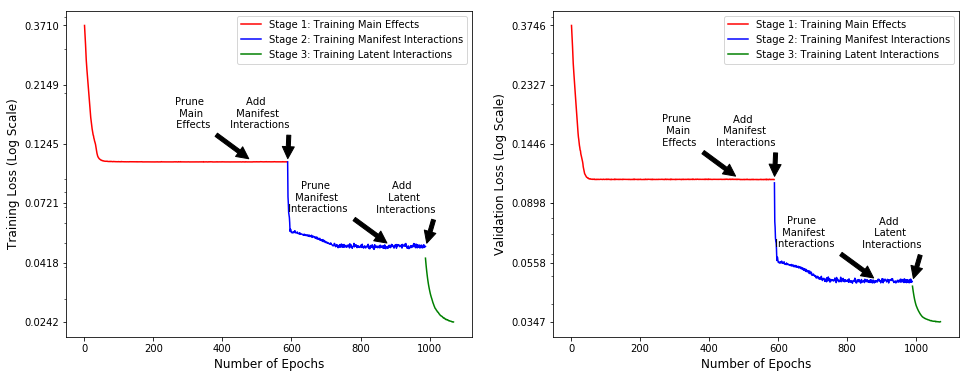

In [3]:
simu_dir = 'result'
data_dict_logs = model.final_gam_model.summary_logs(save_dict=False)
data_dict_logs.update({"err_train_mf":model.final_mf_model.mf_mae,
                       "err_val_mf":model.final_mf_model.mf_valmae})
plot_trajectory(data_dict_logs, folder=simu_dir, name="s1_traj_plot", log_scale=True, save_png=False, save_eps=True)
#plot_regularization(data_dict_logs, folder=simu_dir, name="s1_regu_plot", log_scale=True, save_png=False, save_eps=False)

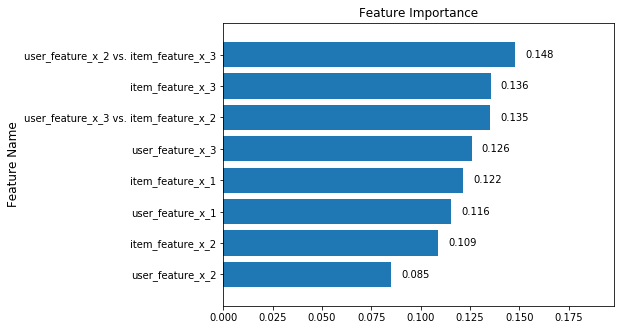

In [9]:
data_dict = model.final_gam_model.global_explain(0,save_dict=False,threshold=0.03)
feature_importance_visualize(data_dict, save_eps=True, folder=simu_dir, name='s1_feature')

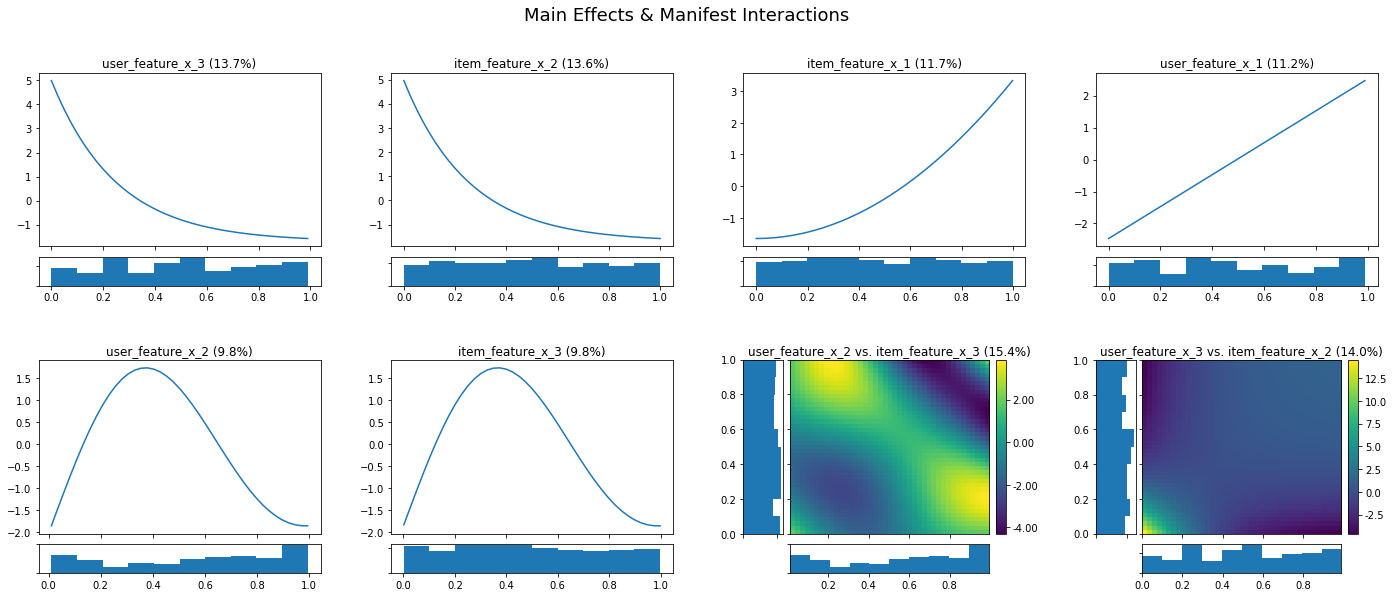

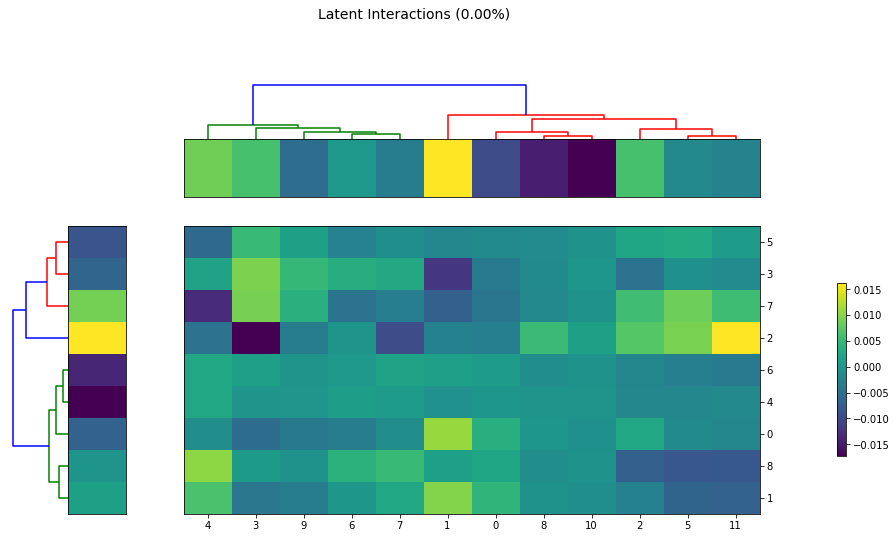

In [19]:
#importance = model.get_all_rank(tr_Xi)
model.dash_board(data_dict, importance,simu_dir,True)

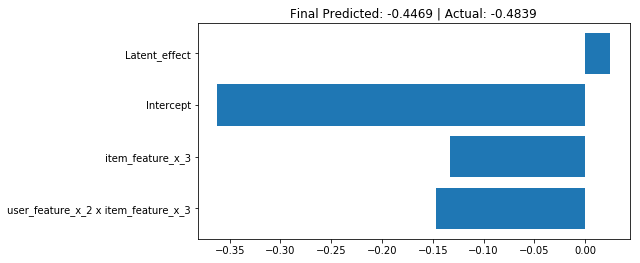

In [6]:
data_dict_local = model.local_explain(0,55,tr_x,tr_Xi,tr_y)
local_visualize(data_dict_local, save_eps=True, folder=simu_dir, name='s1_local',task_type="Regression")

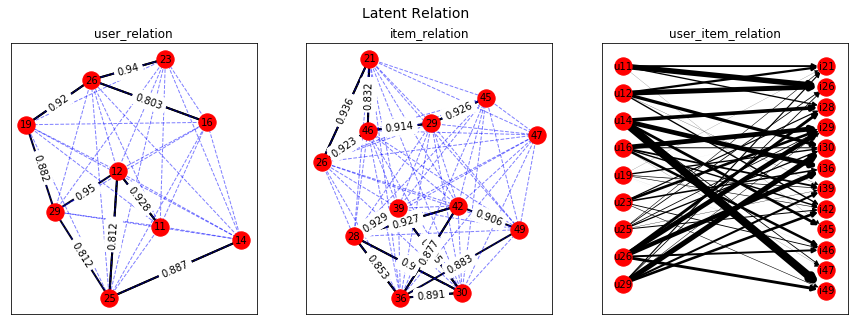

In [8]:
model.relation_plot(0.8,500,True)

In [9]:
new = te_x[100,:].reshape(1,-1)
_ = model.cold_start_analysis(new,'user',1.96)

The new user belong to group 28
 mean is [-0.074282   -0.03589288  0.00775704]
 and std is [0.03657689 0.04036326 0.0253481 ]
 the confidence interval is [[-0.1459727  -0.11500487 -0.04192524],[-0.00259131  0.04321911  0.05743932]]


## real image

In [18]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
from itertools import product

n_user = 100
n_item = 1000
n_rank = 10
n_user_group = 5
n_item_group = 10
n_user_feature = 5
n_item_feature = 5
noise_sigma = 0.01

## MF part
user_id, user_group = make_blobs(n_samples=n_user, centers=n_user_group, n_features=n_rank,
                  cluster_std=0.1, center_box=(-1, 1), random_state=0)
item_id, item_group = make_blobs(n_samples=n_item, centers=n_item_group, n_features=n_rank,
                  cluster_std=0.1, center_box=(-1, 1), random_state=1)
full_matrix_mf = np.tensordot(user_id, item_id, axes=[1, 1])

def uf23(x):
    x1,x2 = x
    y = 0.5 * np.exp(-4*(x1+x2)+4)
    return y

def if23(x):
    x1,x2 = x
    y = 5* np.sin(2*np.pi*x1*x2)
    return y

data_dict['user_feature_x_1']['outputs']=data_dict['user_feature_x_1']['inputs']*5-np.mean(data_dict['user_feature_x_1']['inputs']*5)
data_dict['item_feature_x_2']['outputs']=uf23(np.meshgrid(data_dict['user_feature_x_2']['inputs'], data_dict['user_feature_x_3']['inputs'])).mean(0)-uf23(np.meshgrid(data_dict['user_feature_x_2']['inputs'], data_dict['user_feature_x_3']['inputs'])).mean(0).mean()
data_dict['user_feature_x_3']['outputs']=uf23(np.meshgrid(data_dict['user_feature_x_2']['inputs'], data_dict['user_feature_x_3']['inputs'])).mean(1)-uf23(np.meshgrid(data_dict['user_feature_x_2']['inputs'], data_dict['user_feature_x_3']['inputs'])).mean(1).mean()

data_dict['item_feature_x_1']['outputs']=data_dict['item_feature_x_1']['inputs']**2*5-np.mean(data_dict['user_feature_x_1']['inputs']**2*5)
data_dict['user_feature_x_2']['outputs']=if23(np.meshgrid(data_dict['item_feature_x_2']['inputs'], data_dict['item_feature_x_3']['inputs'])).mean(0)-if23(np.meshgrid(data_dict['item_feature_x_2']['inputs'], data_dict['item_feature_x_3']['inputs'])).mean(0).mean()
data_dict['item_feature_x_3']['outputs']=if23(np.meshgrid(data_dict['item_feature_x_2']['inputs'], data_dict['item_feature_x_3']['inputs'])).mean(1)-if23(np.meshgrid(data_dict['item_feature_x_2']['inputs'], data_dict['item_feature_x_3']['inputs'])).mean(1).mean()

data_dict['user_feature_x_3 vs. item_feature_x_2']['outputs']= np.flip(uf23(np.meshgrid(data_dict['user_feature_x_2 vs. item_feature_x_3']['input1'], data_dict['user_feature_x_2 vs. item_feature_x_3']['input2']))- \
                                        uf23(np.meshgrid(data_dict['user_feature_x_2 vs. item_feature_x_3']['input1'], data_dict['user_feature_x_2 vs. item_feature_x_3']['input2'])).mean(0)- \
                                        uf23(np.meshgrid(data_dict['user_feature_x_2 vs. item_feature_x_3']['input1'], data_dict['user_feature_x_2 vs. item_feature_x_3']['input2'])).mean(1).reshape([-1,1])+ \
                                        uf23(np.meshgrid(data_dict['user_feature_x_2 vs. item_feature_x_3']['input1'], data_dict['user_feature_x_2 vs. item_feature_x_3']['input2'])).mean(),axis=0)

data_dict['user_feature_x_2 vs. item_feature_x_3']['outputs']= np.flip((if23(np.meshgrid(data_dict['item_feature_x_2']['inputs'], data_dict['item_feature_x_3']['inputs']))- \
                                        if23(np.meshgrid(data_dict['item_feature_x_2']['inputs'], data_dict['item_feature_x_3']['inputs'])).mean(0)- \
                                        if23(np.meshgrid(data_dict['item_feature_x_2']['inputs'], data_dict['item_feature_x_3']['inputs'])).mean(1).reshape([-1,1])+ \
                                        if23(np.meshgrid(data_dict['item_feature_x_2']['inputs'], data_dict['item_feature_x_3']['inputs'])).mean()),axis=0)

data_dict['user_feature_x_1']['std'] = np.std(data_dict['user_feature_x_1']['outputs'],ddof=1)
data_dict['user_feature_x_2']['std'] = np.std(data_dict['user_feature_x_2']['outputs'],ddof=1)
data_dict['user_feature_x_3']['std'] = np.std(data_dict['user_feature_x_3']['outputs'],ddof=1)
data_dict['item_feature_x_1']['std'] = np.std(data_dict['item_feature_x_1']['outputs'],ddof=1)
data_dict['item_feature_x_2']['std'] = np.std(data_dict['item_feature_x_2']['outputs'],ddof=1)
data_dict['item_feature_x_3']['std'] = np.std(data_dict['item_feature_x_3']['outputs'],ddof=1)
data_dict['user_feature_x_3 vs. item_feature_x_2']['std'] = np.std(data_dict['user_feature_x_3 vs. item_feature_x_2']['outputs'],ddof=1)
data_dict['user_feature_x_2 vs. item_feature_x_3']['std'] = np.std(data_dict['user_feature_x_2 vs. item_feature_x_3']['outputs'],ddof=1)

sum1 = data_dict['user_feature_x_1']['std']+data_dict['user_feature_x_2']['std']+data_dict['user_feature_x_3']['std']+data_dict['item_feature_x_1']['std']+data_dict['item_feature_x_2']['std']+data_dict['item_feature_x_3']['std']+data_dict['user_feature_x_3 vs. item_feature_x_2']['std']+data_dict['user_feature_x_2 vs. item_feature_x_3']['std']+np.std(0.1*full_matrix_mf,ddof=1)
data_dict['user_feature_x_1']['importance'] = data_dict['user_feature_x_1']['std']/sum1
data_dict['user_feature_x_2']['importance'] = data_dict['user_feature_x_2']['std']/sum1
data_dict['user_feature_x_3']['importance'] = data_dict['user_feature_x_3']['std']/sum1
data_dict['item_feature_x_1']['importance'] = data_dict['item_feature_x_1']['std']/sum1
data_dict['item_feature_x_2']['importance'] = data_dict['item_feature_x_2']['std']/sum1
data_dict['item_feature_x_3']['importance'] = data_dict['item_feature_x_3']['std']/sum1
data_dict['user_feature_x_3 vs. item_feature_x_2']['importance'] = data_dict['user_feature_x_3 vs. item_feature_x_2']['std']/sum1
data_dict['user_feature_x_2 vs. item_feature_x_3']['importance'] = data_dict['user_feature_x_2 vs. item_feature_x_3']['std']/sum1

importance = []
for i,j in data_dict.items():
    importance.append(data_dict[i]['importance'])
for i in range(3):
    importance.append(0)
importance = np.array(importance).ravel()



In [16]:
importance

array([0.11227966, 0.09784839, 0.13708543, 0.        , 0.        ,
       0.11705568, 0.13643697, 0.09762785, 0.        , 0.        ,
       0.15410758, 0.14047689, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [30]:
data_dict

{'uf_1': {'density': {'names': array([4.0203080e-04, 9.9195465e-02, 1.9798890e-01, 2.9678234e-01,
          3.9557576e-01, 4.9436921e-01, 5.9316266e-01, 6.9195610e-01,
          7.9074949e-01, 8.8954294e-01, 9.8833638e-01], dtype=float32),
   'scores': array([1.10640929, 1.24921831, 0.57412103, 1.36750478, 1.20305764,
          0.77174561, 1.00687558, 0.59575912, 0.904457  , 1.34298161])},
  'type': 'continuous',
  'importance': 0.10361566624727853,
  'inputs': array([4.02030798e-04, 2.51124555e-02, 4.98228802e-02, 7.45333049e-02,
         9.92437296e-02, 1.23954154e-01, 1.48664579e-01, 1.73375004e-01,
         1.98085428e-01, 2.22795853e-01, 2.47506278e-01, 2.72216703e-01,
         2.96927127e-01, 3.21637552e-01, 3.46347977e-01, 3.71058401e-01,
         3.95768826e-01, 4.20479251e-01, 4.45189676e-01, 4.69900100e-01,
         4.94610525e-01, 5.19320950e-01, 5.44031374e-01, 5.68741799e-01,
         5.93452224e-01, 6.18162649e-01, 6.42873073e-01, 6.67583498e-01,
         6.92293923e-01, 

In [32]:
interaction_norm = [model.final_gam_model.interact_blocks.interacts[i].moving_norm.numpy()[0] for i in range(model.final_gam_model.interact_num_added)]

In [3]:
from itertools import product
result = {}
name_i = {}
imp = model.final_mf_model.s
impp = imp/ imp.sum()
una = np.array(list(model.match_u.keys()))
for i in range(3):
    u1=np.array(list(model.match_u.values()))[:,i]
    i1=np.array(list(model.match_i.values()))[:,i]
    

    ina = np.array(list(model.match_i.keys()))
    
    res = []
    for a,b in product(u1, i1):
        res.append(a*b)
    res = np.array(res).reshape(u1.shape[0],-1)
    
    modd = []
    for j in range(res.shape[1]):
        modd.append(np.linalg.norm(res[:,j]))
    res = res[:,np.argsort(modd)[::-1]]
    ina = ina[np.argsort(modd)[::-1]]
    name_i[i]=ina
    result[i]=res

In [8]:
data1 = result[0]
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score
n_clusters = (4, 10)
rng = np.random.RandomState(0)
row_idx = rng.permutation(data1.shape[0])
col_idx = rng.permutation(data1.shape[1])
data1 = data1[row_idx][:, col_idx]
bimodel = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
bimodel.fit(data1)
score = consensus_score(bimodel.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.1f}".format(score))

fit_data = data1[np.argsort(bimodel.row_labels_)]
fit_data = fit_data[:, np.argsort(bimodel.column_labels_)]

NameError: name 'rows' is not defined

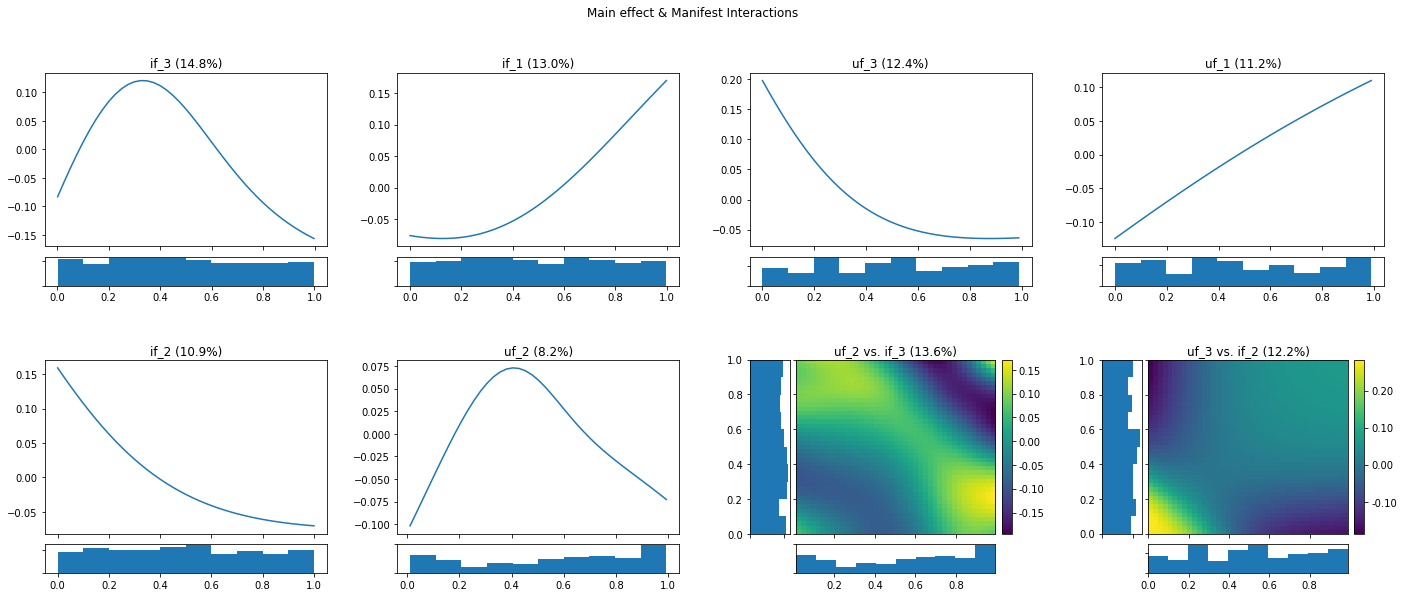

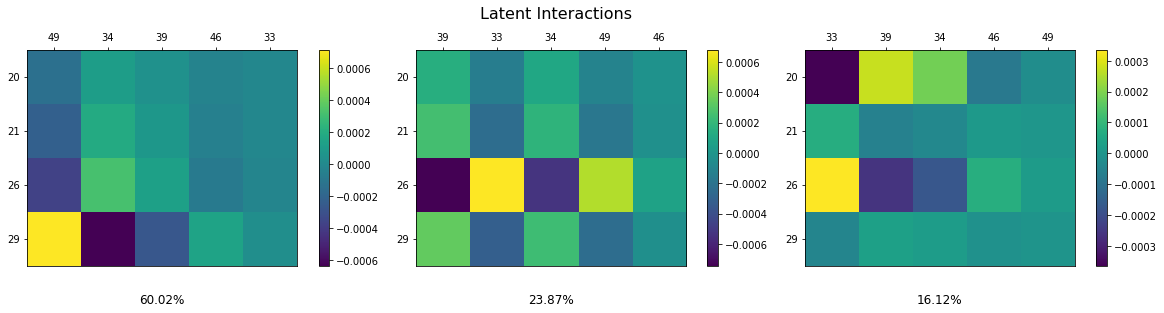

In [17]:
global_visualize_density(data_dict, save_png=False,save_eps=False, folder=simu_dir, name='s1_global')
from matplotlib import pyplot as plt
left_x,left_y=0.5,0.1
width,height=0.8,0.5
left_xh=left_x+width+0.1
left_xhh=left_xh+width+0.1
#left_yh = left_y + height + 0.1

scatter_area=[left_x,left_y,1,height]
hist_y=[left_xh,left_y,1,height]
hist_yy = [left_xhh,left_y,1,height]
#hist_g = [left_xh,left_yh,1,height]

plt.figure(figsize=(6, round(14 * 0.45)))
plt.suptitle('Latent Interactions',fontsize=16,x=1.9,y=0.7)

area_1=plt.axes(scatter_area)
area_2=plt.axes(hist_y)
area_3=plt.axes(hist_yy)

ax1 = area_1.matshow(result[0])
area_1.xaxis.set_ticks_position('top') #设置x轴刻度到上方
area_1.set_xticks(np.arange(result[0].shape[1])) #设置x轴刻度
area_1.set_yticks(np.arange(result[0].shape[0])) #设置y轴刻度
area_1.set_xticklabels(name_i[0]) #设置x轴刻度标签
area_1.set_yticklabels(una) #设置y轴刻度标签
#plt.colorbar(area_scatter,pad=0.03) #设置颜色条
area_1.set_title("%.2f%%" % (impp[0][0] * 100),y=-0.2) #设置标题以及其位置和字体大小 

ax2 = area_2.matshow(result[1])
area_2.xaxis.set_ticks_position('top') #设置x轴刻度到上方
area_2.set_xticks(np.arange(result[1].shape[1])) #设置x轴刻度
area_2.set_yticks(np.arange(result[1].shape[0])) #设置y轴刻度
area_2.set_xticklabels(name_i[1]) #设置x轴刻度标签
area_2.set_yticklabels(una) #设置y轴刻度标签
area_2.set_title("%.2f%%" % (impp[1][1] * 100),y=-0.2) #设置标题以及其位置和字体大小 

ax3 = area_3.matshow(result[2])
area_3.xaxis.set_ticks_position('top') #设置x轴刻度到上方
area_3.set_xticks(np.arange(result[2].shape[1])) #设置x轴刻度
area_3.set_yticks(np.arange(result[2].shape[0])) #设置y轴刻度
area_3.set_xticklabels(name_i[2]) #设置x轴刻度标签
area_3.set_yticklabels(una) #设置y轴刻度标签
#plt.colorbar(area_scatter,pad=0.03) #设置颜色条
area_3.set_title("%.2f%%" % (impp[2][2] * 100),y=-0.2) 
plt.colorbar(ax1,ax=area_1)
plt.colorbar(ax2,ax=area_2)
plt.colorbar(ax3,ax=area_3)

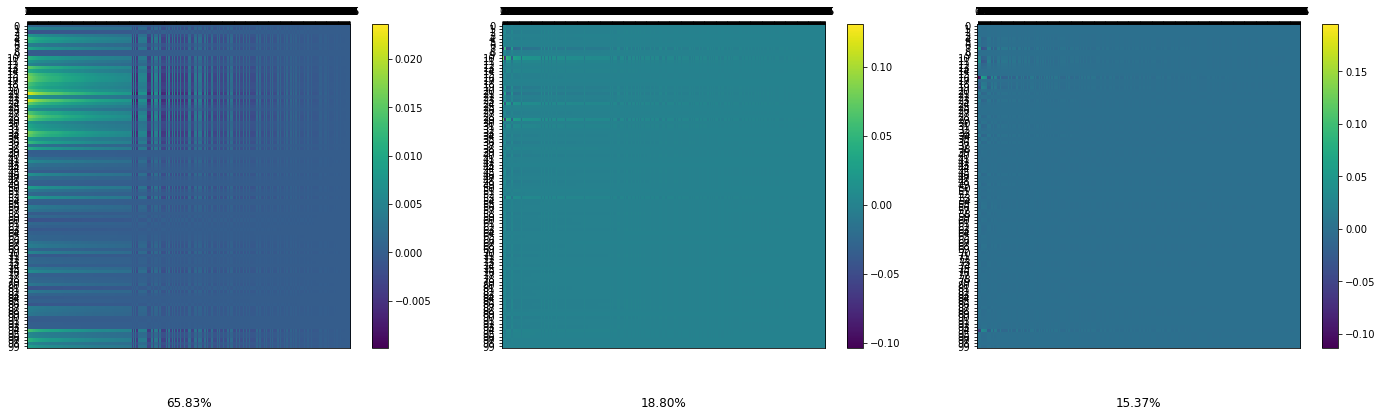

In [9]:
from matplotlib import pyplot as plt

left_x,left_y=0.1,0.1
width,height=1,0.5
left_xh=left_x+width+0.1
left_xhh=left_xh+width+0.1

scatter_area=[left_x,left_y,1,height]
hist_y=[left_xh,left_y,1,height]
hist_yy = [left_xhh,left_y,1,height]

plt.figure(figsize=(6, round(20 * 0.45)))

area_1=plt.axes(scatter_area)
area_2=plt.axes(hist_y)
area_3=plt.axes(hist_yy)

ax1 = area_1.imshow(result[0])
area_1.set_aspect(10)
area_1.xaxis.set_ticks_position('top') #设置x轴刻度到上方
area_1.set_xticks(np.arange(result[0].shape[1])) #设置x轴刻度
area_1.set_yticks(np.arange(result[0].shape[0])) #设置y轴刻度
area_1.set_xticklabels(range(result[0].shape[1])) #设置x轴刻度标签
area_1.set_yticklabels(range(result[0].shape[0])) #设置y轴刻度标签
#plt.colorbar(area_scatter,pad=0.03) #设置颜色条
area_1.set_title("%.2f%%" % (impp[0][0] * 100),y=-0.2) #设置标题以及其位置和字体大小 

ax2 = area_2.imshow(result[1])
area_2.set_aspect(10)
area_2.xaxis.set_ticks_position('top') #设置x轴刻度到上方
area_2.set_xticks(np.arange(result[1].shape[1])) #设置x轴刻度
area_2.set_yticks(np.arange(result[1].shape[0])) #设置y轴刻度
area_2.set_xticklabels(range(result[0].shape[1])) #设置x轴刻度标签
area_2.set_yticklabels(range(result[0].shape[0])) #设置y轴刻度标签
#plt.colorbar(area_scatter,pad=0.03) #设置颜色条
area_2.set_title("%.2f%%" % (impp[1][1] * 100),y=-0.2) #设置标题以及其位置和字体大小 

ax3 = area_3.imshow(result[2])
area_3.set_aspect(10)
area_3.xaxis.set_ticks_position('top') #设置x轴刻度到上方
area_3.set_xticks(np.arange(result[2].shape[1])) #设置x轴刻度
area_3.set_yticks(np.arange(result[2].shape[0])) #设置y轴刻度
area_3.set_xticklabels(range(result[0].shape[1])) #设置x轴刻度标签
area_3.set_yticklabels(range(result[0].shape[0])) #设置y轴刻度标签
#plt.colorbar(area_scatter,pad=0.03) #设置颜色条
area_3.set_title("%.2f%%" % (impp[2][2] * 100),y=-0.2) #设置标题以及其位置和字体大小 
plt.colorbar(ax1,ax=area_1)
plt.colorbar(ax2,ax=area_2)
plt.colorbar(ax3,ax=area_3)

In [5]:
model.s

array([11.14116513,  7.16574748,  5.10162425])

In [8]:
data_dict_local

{'active_indice': array([ 0,  1,  9, 12]),
 'scores': array([ 0.02643052, -0.36201355,  0.1016753 , -0.03402761,  0.17020436,
         0.        ,  0.        , -0.00592142, -0.01575141, -0.13333359,
        -0.        , -0.        , -0.14653082, -0.04060893, -0.        ,
        -0.00492528,  0.        , -0.        ,  0.00041986, -0.00071387,
         0.        ,  0.        ]),
 'effect_names': array(['Latent_effect', 'Intercept', 'uf_1', 'uf_2', 'uf_3', 'uf_4',
        'uf_5', 'if_1', 'if_2', 'if_3', 'if_4', 'if_5', 'uf_2 x if_3',
        'uf_3 x if_2', 'uf_5 x if_3', 'uf_2 x if_2', 'uf_1 x if_2',
        'uf_3 x if_3', 'uf_4 x if_2', 'uf_5 x if_2', 'uf_4 x if_3',
        'uf_2 x if_5'], dtype='<U13'),
 'predicted': array([[-0.47152698]], dtype=float32),
 'initial_predict': array([[-0.47152695]], dtype=float32),
 'actual': array([[-0.484]], dtype=float16)}